In [73]:
def dj_oracle(b_str):
    oracle_qc = QuantumCircuit(len(b_str)+1)
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
            
    for qubit in range(len(b_str)):
        oracle_qc.cx(qubit, len(b_str))
        
    for qubit in range(len(b_str)):
        if b_str[qubit] == '1':
            oracle_qc.x(qubit)
    
    return oracle_qc

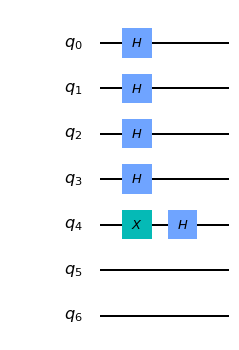

In [93]:
alice_start = QuantumCircuit(4+1+2, name="test")
alice_start.x(4)
alice_start.h(4)
for qubit in range(4):
    alice_start.h(qubit)
# oracle_alice = dj_oracle('0101')
# alice_start.append(tto.circuit, range(4+1+2))
alice_start.draw(output='mpl')

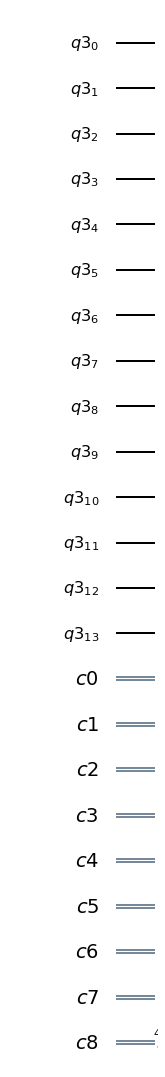

In [60]:
alice_bob_tele_qr = QuantumRegister(4+1+4+4+1)
c11,c12,c21,c22,c31,c32,c41,c42,c_m = ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(1), ClassicalRegister(4)
alice_bob_tele = QuantumCircuit(alice_bob_tele_qr,c11,c12,c21,c22,c31,c32,c41,c42,c_m)
alice_bob_tele.draw()

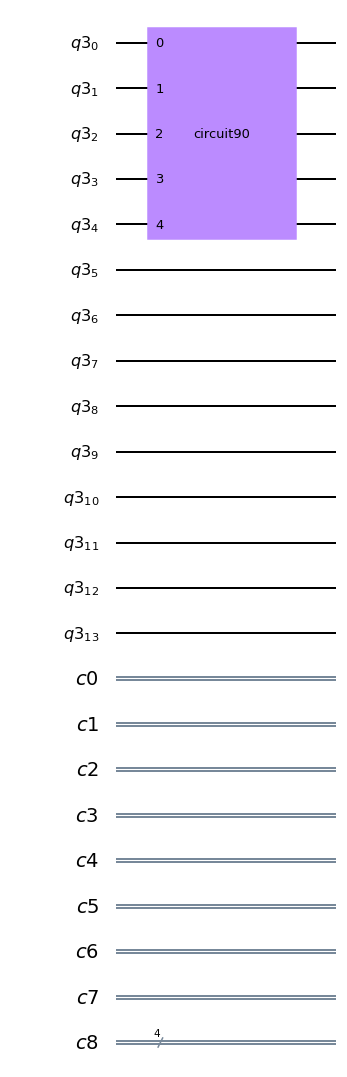

In [61]:
alice_bob_tele.append(alice_start,range(4+1))
alice_bob_tele.draw()

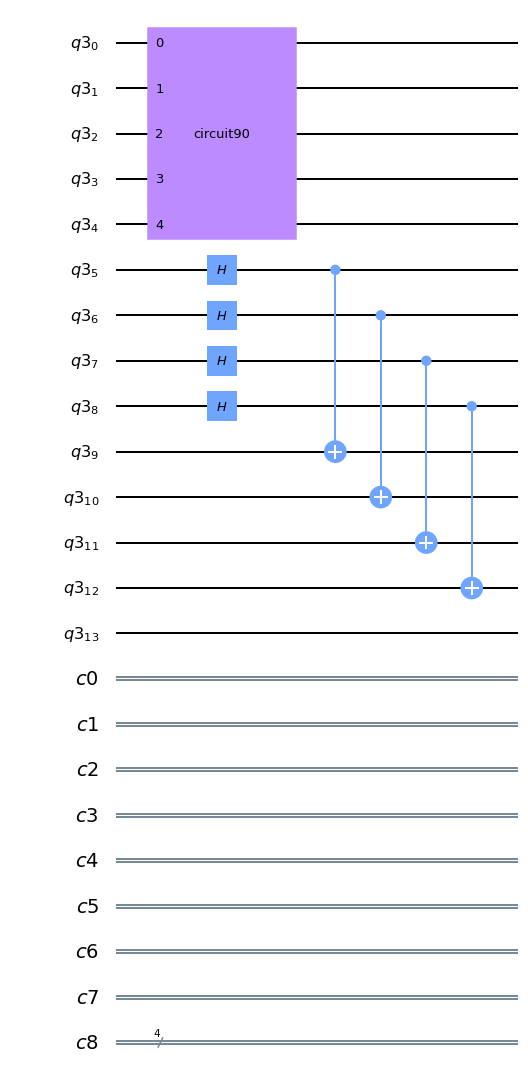

In [62]:
def create_bell_pair(qc, a, b):
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target
create_bell_pair(alice_bob_tele, 5, 9)
create_bell_pair(alice_bob_tele, 6, 10)
create_bell_pair(alice_bob_tele, 7, 11)
create_bell_pair(alice_bob_tele, 8, 12)
alice_bob_tele.draw()

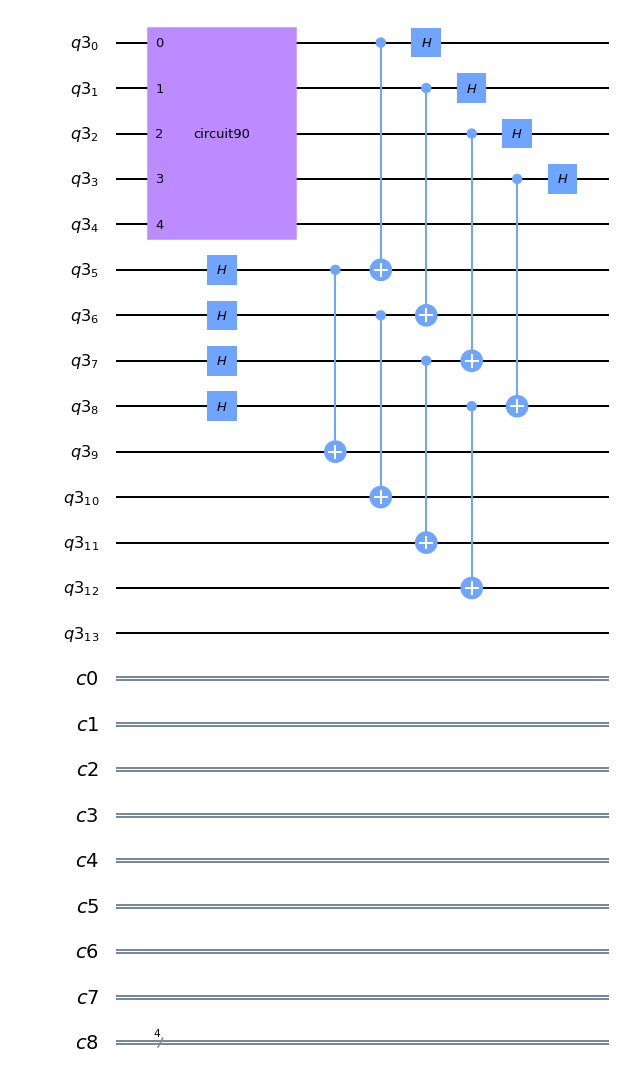

In [63]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
alice_gates(alice_bob_tele, 0, 5)
alice_gates(alice_bob_tele, 1, 6)
alice_gates(alice_bob_tele, 2, 7)
alice_gates(alice_bob_tele, 3, 8)
alice_bob_tele.draw()

In [64]:
def measure_and_send(qc, psi, a, c1, c2):
    qc.barrier()
    qc.measure(psi,c1)
    qc.measure(a,c2)
measure_and_send(alice_bob_tele,0,5,0,1)
measure_and_send(alice_bob_tele,1,6,2,3)
measure_and_send(alice_bob_tele,2,7,4,5)
measure_and_send(alice_bob_tele,3,8,6,7)

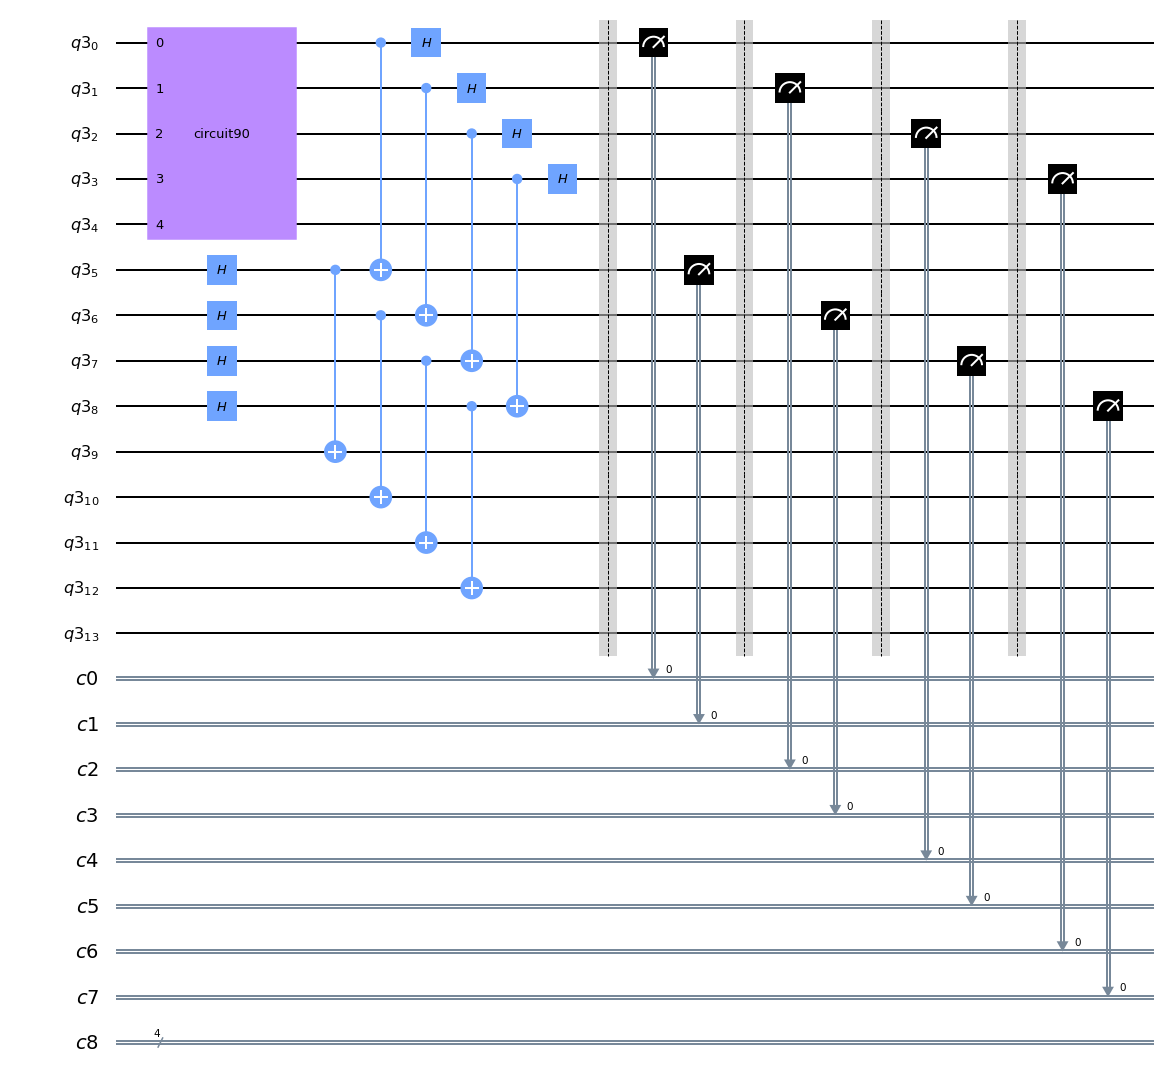

In [65]:
alice_bob_tele.draw()

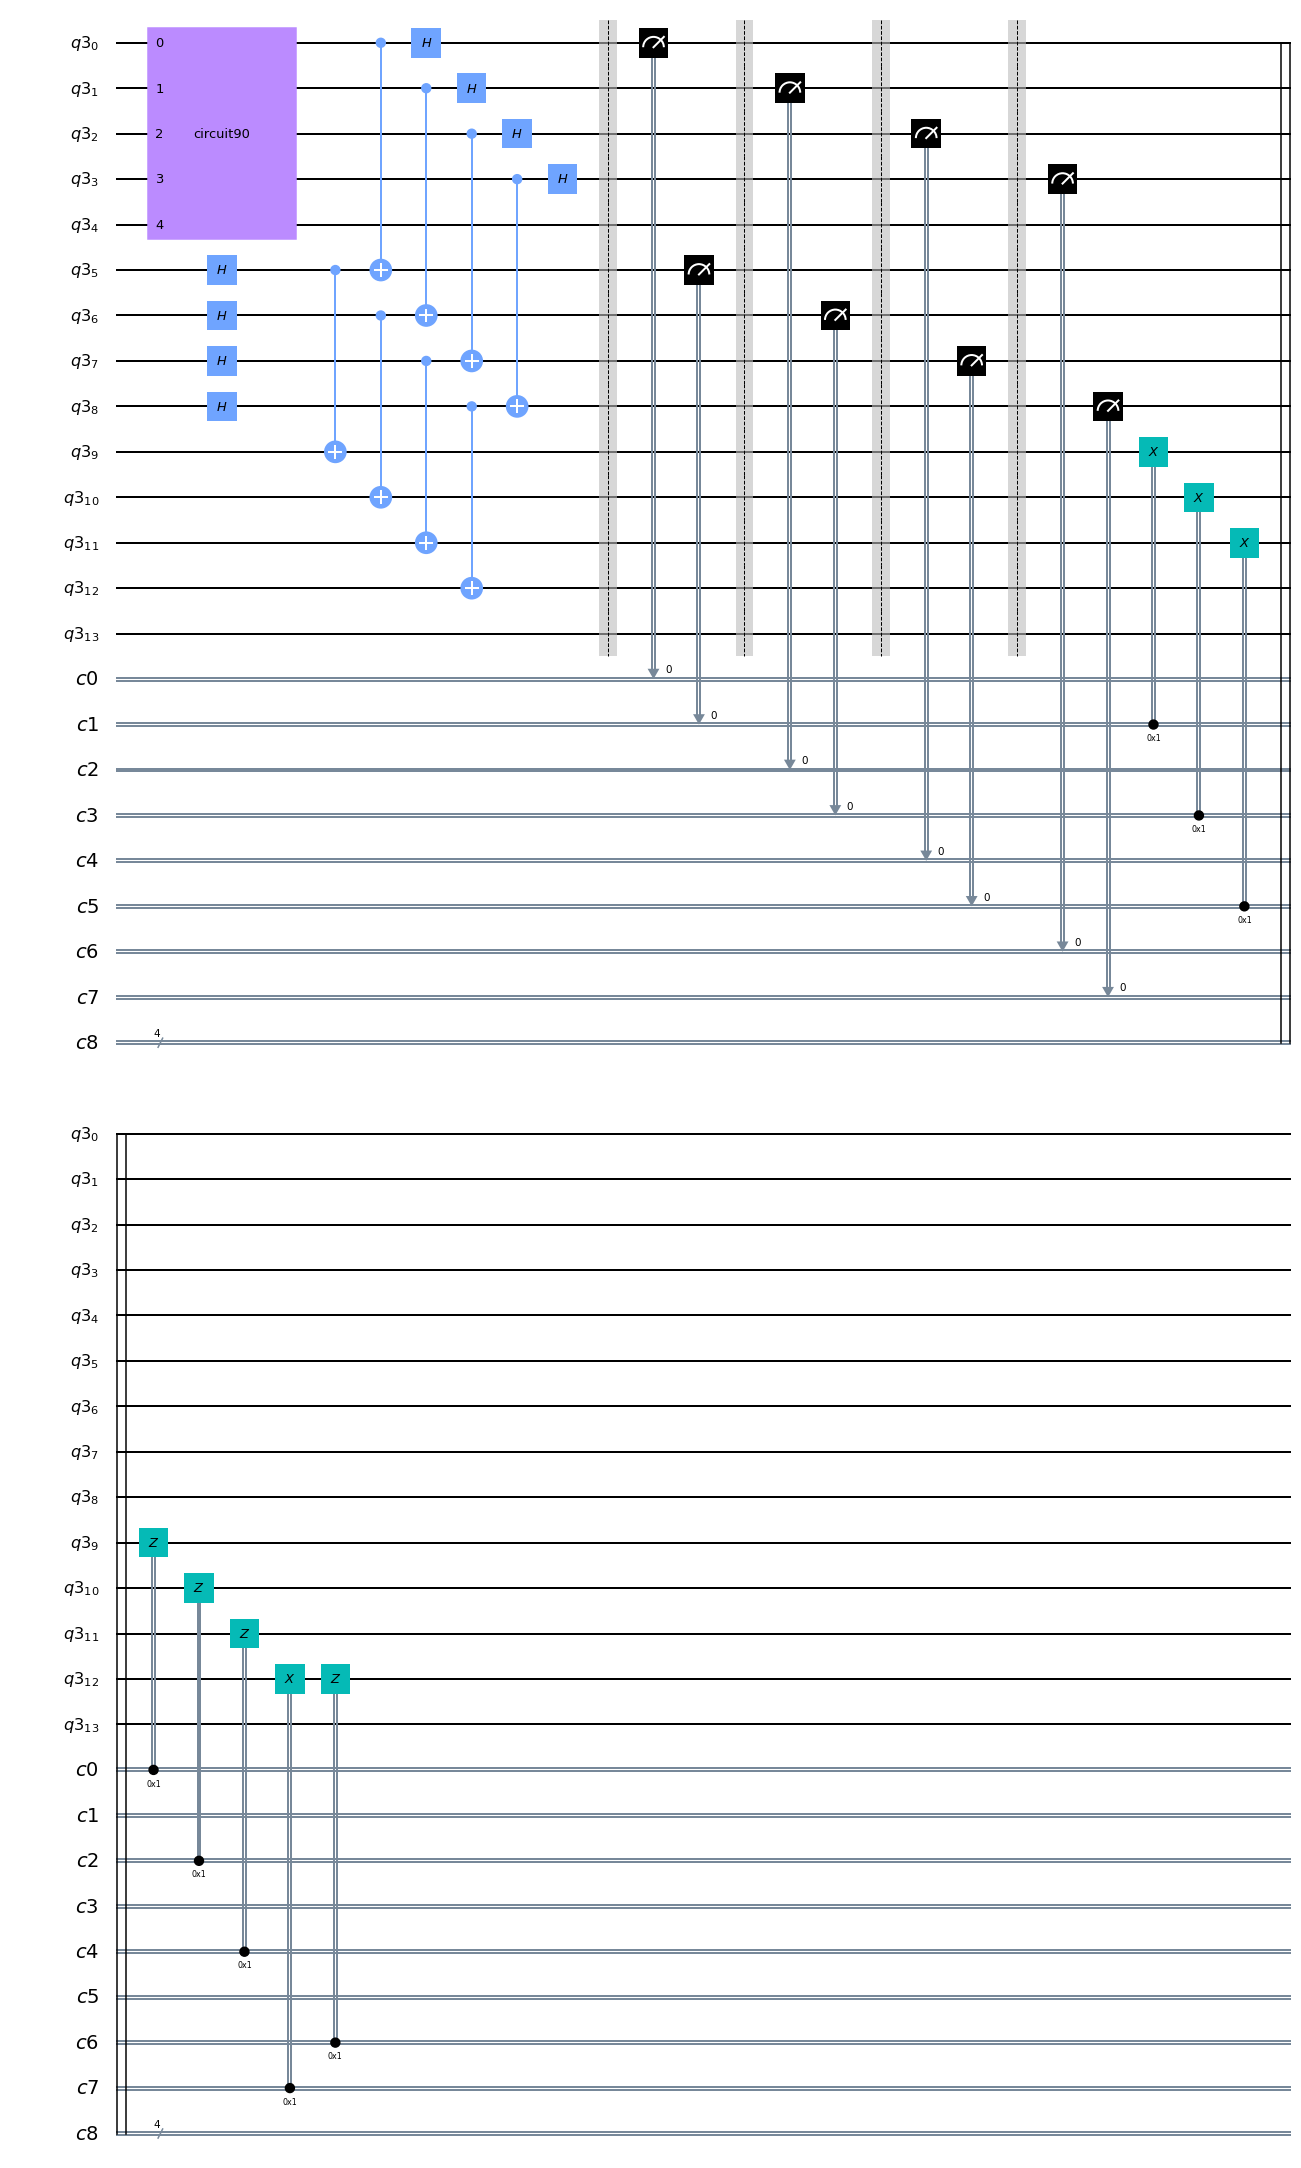

In [66]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'
bob_gates(alice_bob_tele, 9, c11, c12)
bob_gates(alice_bob_tele, 10, c21, c22)
bob_gates(alice_bob_tele, 11, c31, c32)
bob_gates(alice_bob_tele, 12, c41, c42)
alice_bob_tele.draw()

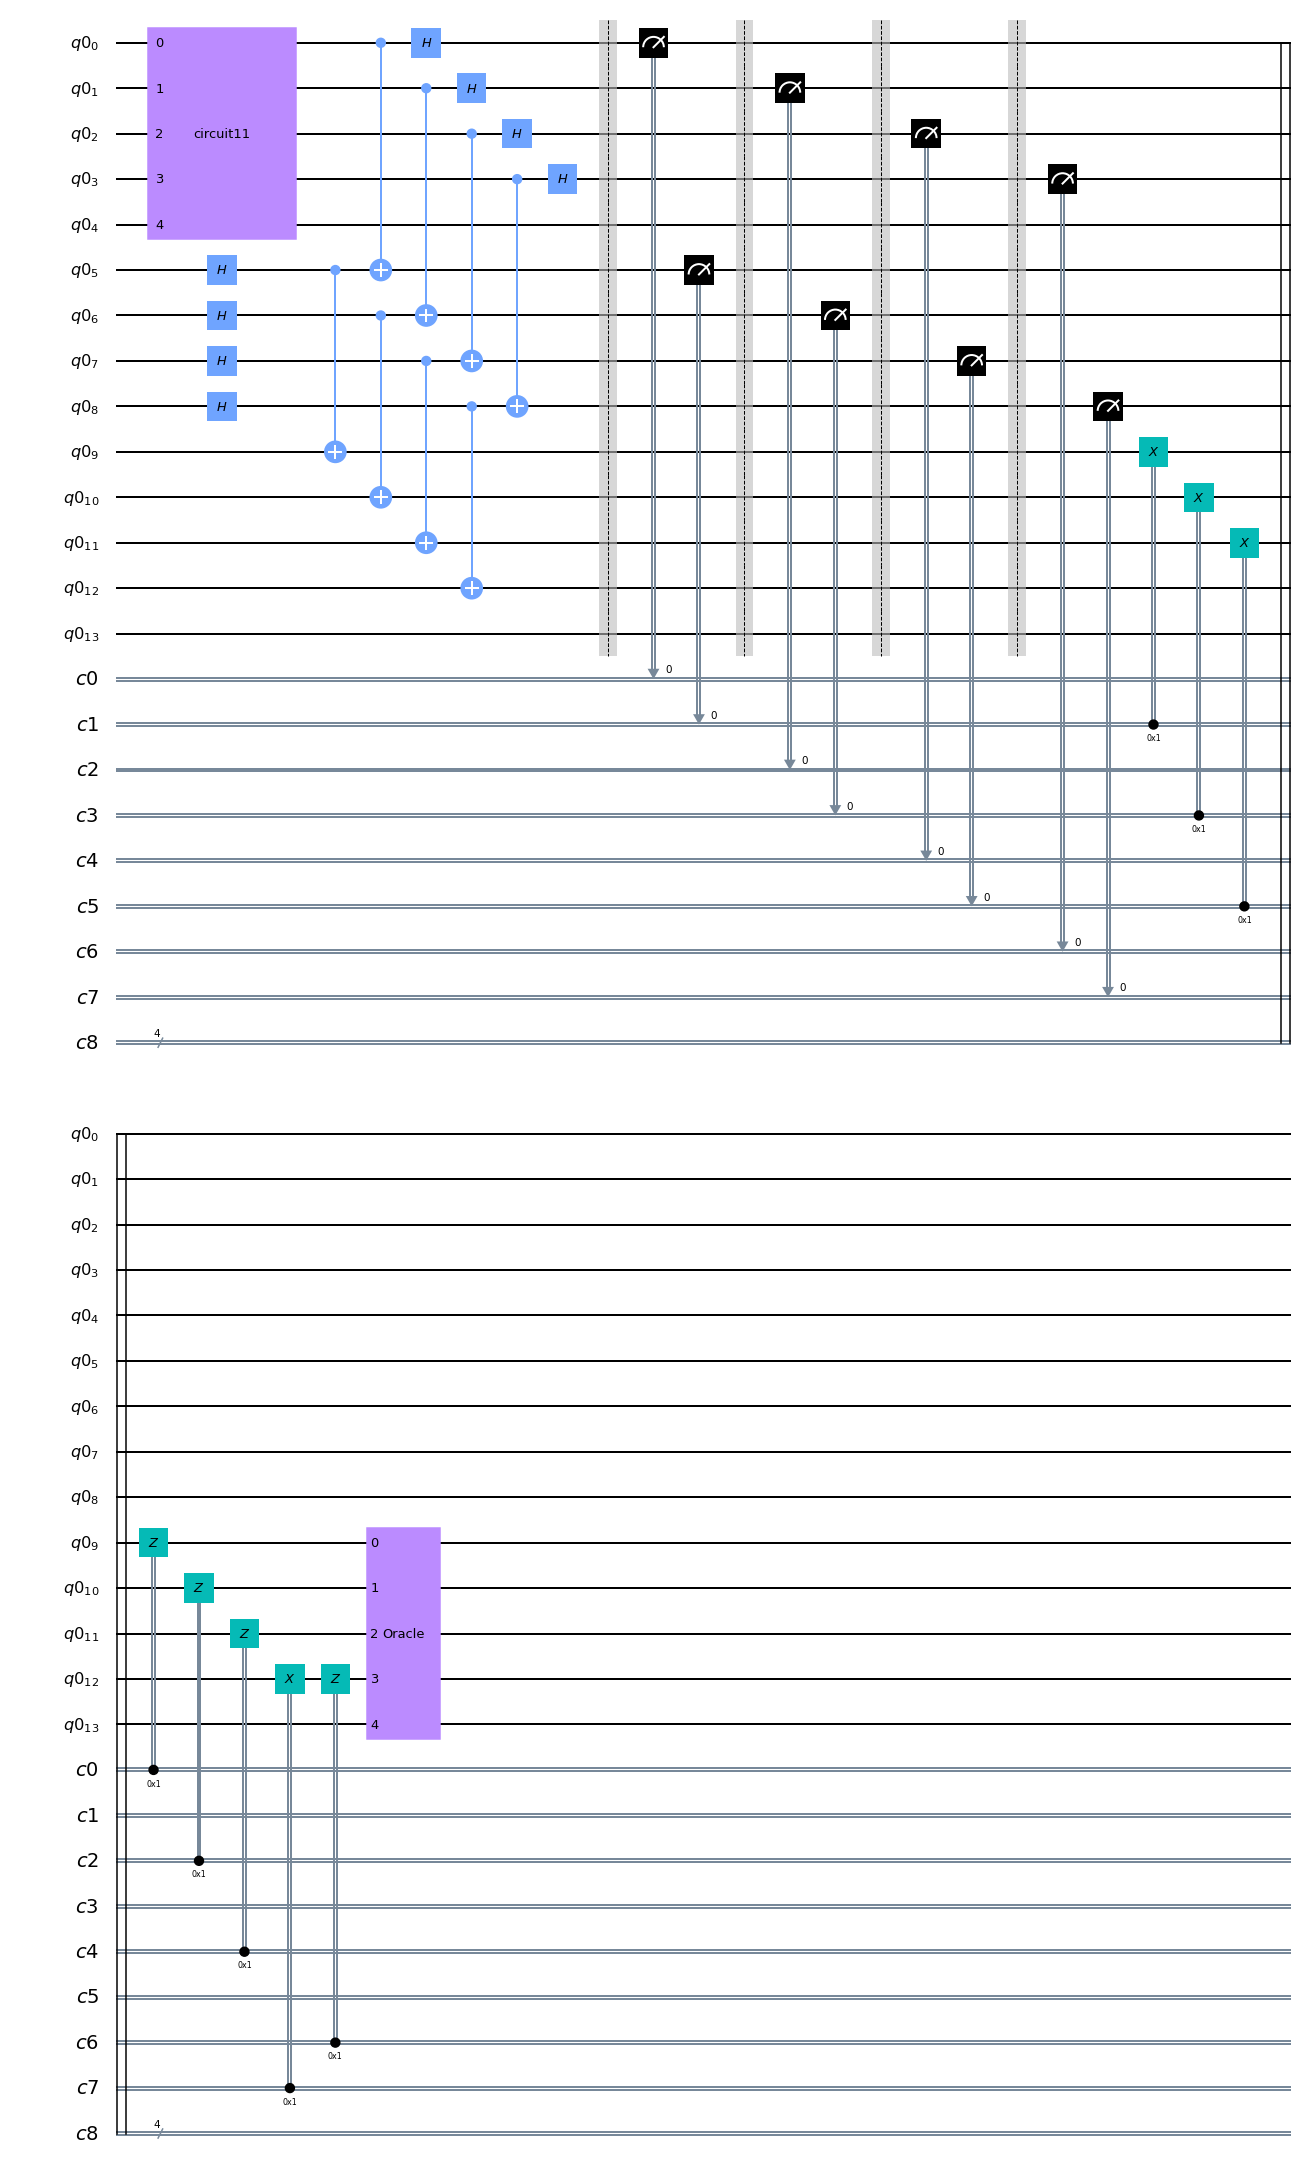

In [16]:
bob_oracle = dj_oracle('0101')
alice_bob_tele.append(bob_oracle, [9,10,11,12,13])
alice_bob_tele.draw()

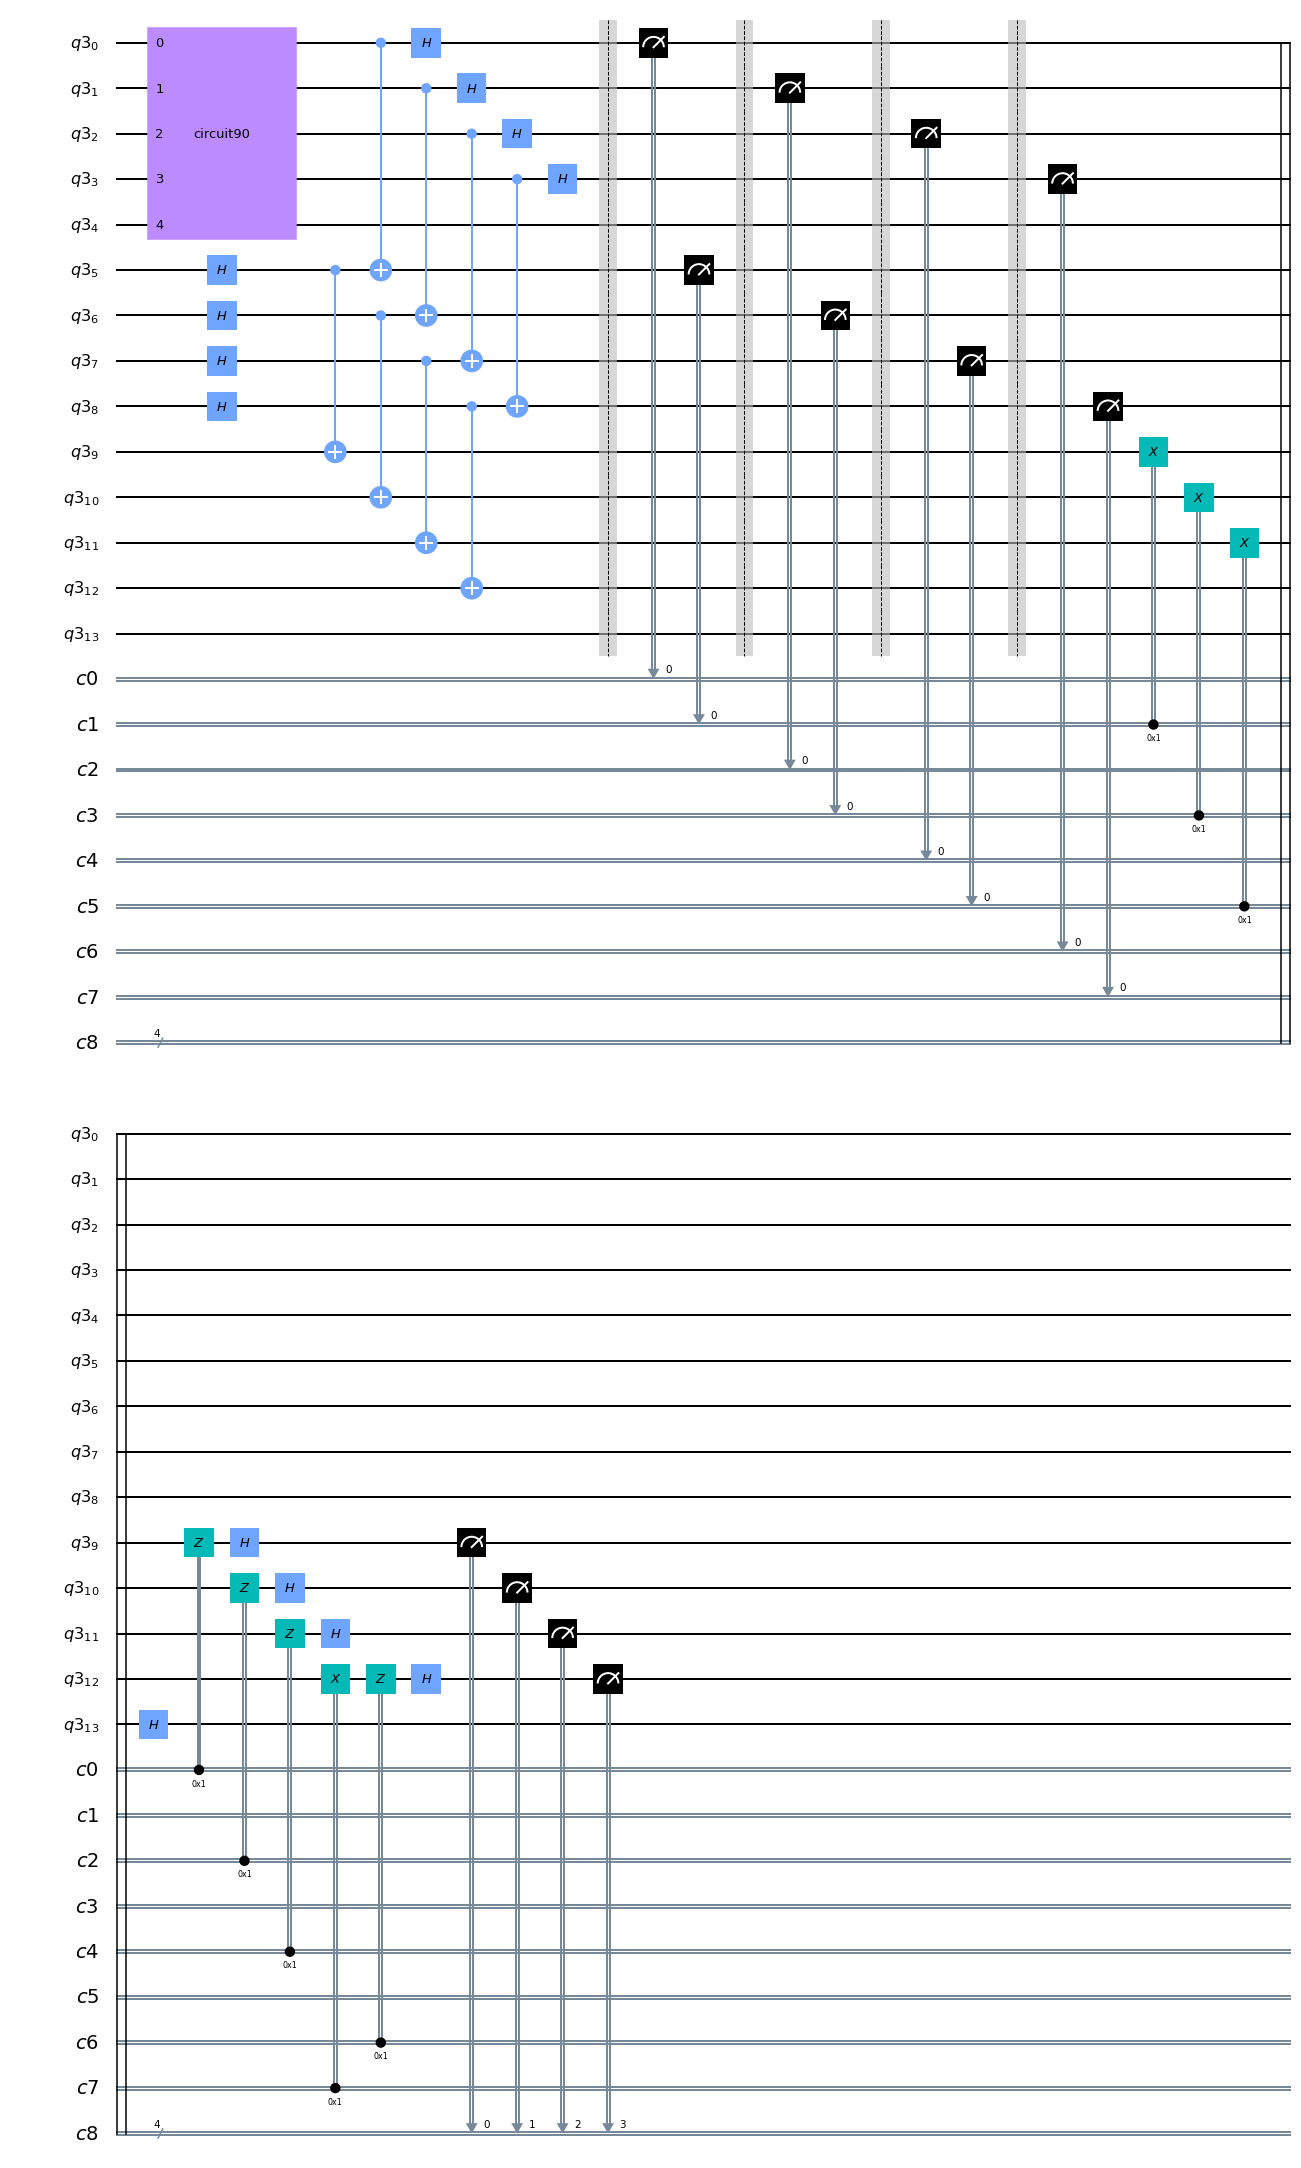

In [67]:
for qubit in [9,10,11,12,13]:
        alice_bob_tele.h(qubit)
    
alice_bob_tele.measure(9, 8)
alice_bob_tele.measure(10, 9)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABRUAAAh4CAYAAABfxVs3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeVxVdf7H8TeIG+BogKhlmriDYWk05gY6mlrj2GKkNWbqJC70K7MZLWc0c8ZfGYr9comyhppKR1xGxsHUSihbcTQbHR1ULKTMHQxzYbm/PxjQm3rOvQrnHOD1fDwsPJxz7xt5e4UP33OOj8vlcgkAAAAAAAAAPORrdwAAAAAAAAAAVQtDRQAAAAAAAABeYagIAAAAAAAAwCsMFQEAAAAAAAB4haEiAAAAAAAAAK8wVAQAAAAAAADgFYaKAAAAAAAAALzCUBEAAAAAAACAVxgqAgAAAAAAAPAKQ0UAAAAAAAAAXmGoCAAAAAAAAMArDBUBAAAAAAAAeIWhIgAAAAAAAACvMFQEAAAAAAAA4BWGigAAAAAAAAC8wlARAAAAAAAAgFcYKgIAAAAAAADwCkNFAAAAAAAAAF5hqAgAAAAAAADAK352BwAAAKhOdu/ebbrPggULFB8fb7hPhw4dKioSHMasI/SjZuM1BEboBwAnYaUiAACAxRYuXGh3BDgY/YAZOgIj9AOAVRgqAgAAAAAAAPAKQ0UAAAAAAAAAXmGoCAAAYLEVK1bYHQEORj9gho7ACP0AYBWGigAAAAAAAAC8wlARAADAYkOHDrU7AhyMfsAMHYER+gHAKn52B0D18Z8PpB8O250C1UmDUKl9X7tTAAAAAACAn2KoiArzw2EpL9fuFACc6PG37Xne+Q/a87yAk/n4+Fj+nC6Xy/LnBAAAQOXi9GcAAACLTZw40e4IcDD6ATN0BEboBwCrMFQEAACwWHx8vN0R4GD0A2boCIzQDwBWYagIAABgsd69e9sdAQ5GP2CGjsAI/QBgFYaKAAAAFjty5IjdEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMArDBUBAAAsFh4ebncEOBj9gBk6AiP0A4BVGCoCAABYbOXKlXZH8EpISIiuv/56NW7c2HTfW2+9VcHBwRakqr6qWj9gPToCI/QDgFUYKlag/Px8jRs3TqGhofL391ePHj20efNmu2MBAACHmT59ut0RDNWtW1cjRoxQWlqaDh06pCNHjignJ0eHDx/W4cOHtW7dOo0cOVL16tVzO65nz556//339f7776thw4Y2pa/6nN4P2I+OwAj9AGAVhooVxOVyaciQIVq9erUSEhKUmpqqkJAQ9e/fX9u2bbM7HoAazOWSvj4qfb5P+ud+6YfTdicCkJKSYneEyxoxYoQOHDigN998U4MGDVJoaKjy8/OVk5OjvLw8NW7cWAMHDlRycrJyc3M1evRoSaUDxXXr1ikwMFDbt2/XDz/8YPNHUnU5uR9wBjoCI/QDgFX87A5QXaxdu1YZGRlKS0vToEGDJEm9e/dWRESEpk2bprS0NJsTOkdxSbFeS5uqDVuSda7ojLq2vV2PD01Sw4AQu6MB1U72YSklUzqYd36br4/U9Qbp3iipXm3boplaEn+tut37rDr1+U35NpfLpZcfaaj+cW+oTdTdNqYDqh9/f3+99dZbuvvu0r9bW7du1eLFi/Xee+/p66+/Lt+vRYsW6tevn8aNG6eoqCi99tprGjNmjCIjIxUYGKg333xTo0aNUklJiU0fCQAAAKzASkUPlJSUKCEhQW3btlW9evXUuXNnZWRkqH379ho7dqwkac2aNQoODtbAgQPLj6tTp46GDRumjRs36tSpU3bFd5xlm57TJzvX6KVHP9fSabmSpOeXjrA5FVD97D8iLXxf+j7PfXuJS8rcLy1+XzpXZE82MwXHv9WpvINq3PImt+35h7N17swPahJ2i03JgOqpfv36SktL09133628vDyNHDlSXbt21ZIlS9wGipKUk5Oj119/XbfeeqseeOAB5efnq3v37goMDNQ777zDQBEAAKCGYKjogTFjxmjWrFmKi4vTunXrFBsbq+HDhys7O1tdu3aVJO3YsUMRERHy8fFxO7ZTp04qKirS7t277YjuSGmfvaL7+0xRs+AwBdRvqEfunKPM/7yrQye+sTsaUG24XNKKTKmkRHJdZp9vjkmZ2ZbG8tih7Ez5+NZScPNObtuP5myXf8MmahB8vU3JgIqRkZFhdwQ38+fPV3R0tHJzc3XrrbfqzTff9Oi4AwcOyM/v/IkvRUVFDBQrgNP6AeehIzBCPwBYhaGiiaVLlyo5OVmpqal68skn1adPH02bNk233XabioqK1KVLF0nS8ePHdc0111x0fFBQUPn7IRWcztPhvBy1va5r+bZrQ1rLv97PtO+77TYmA6qX3OPStycuP1CUJB9Jm/dYlcg7h7IzdU3TdvKr434TiCM52xXailWKqPp27txpd4Ry/fr109ixY3X27Fndcccd2rPHsxeGsmsoBgQEaM2aNTp9+rQeeugh3XHHHZWcuPpzUj/gTHQERugHAKtwTUUTs2fP1sCBAxUdHe22vU2bNqpdu7YiIyO9eryvv/5aI0eO1MGDB1W3bl0tWrRIvXr1qrC8P10paaWEcZvUuXWM4T4/ni29aHtAffc7QgbWa6Qfz5ysrGioojIy0hU1vI/dMaqk9t0f0MAJbxvu45KUe/ScfHzqVnqex94yGm9e7FB2pvIO7VXSOPdrrRaeLdAtg5/y+HHsfE1EzTVp0iTTfRITE033S0xMrKhIhmbOnFn+/3/9618eHXPhTVnKrqE4adIkJSQk6Nlnn73oWtL8XXTnyefeKf2A9araawisRT8AWMHl8uz7N1YqGsjNzdWOHTt03333XfS+nJwcRUREqG7d0m/Gg4KCdOLEiYv2K1uhWLZiMS4uTvfff7+ysrKUlJSkYcOG6dy5c5X4UTiLf90GkqRTp/PdthecyZN/vZ/ZEQmolooLz3i2X9HZSk5yZQ7t36Kf3/OMHvjTl26//GrXVxNWKgIVpnPnzurevbvy8vL04osvenTMpQaKJSUlWrhwoY4dO6auXbvq1ltvreTkAAAAsBsrFQ3k5pbeRKRp06Zu20+fPq2MjIzyuzxLUkREhFJTU+Vyudx+Gr9z5075+fmpQ4cOOnr0qDZv3qzU1FRJUvfu3XXttddq06ZNGjBgQIVk9nSaXBm2LJPyco33CazfSKGNWmjvt1vV5rrSGzAcPJatH8+cVFgz71Z9ovqLjo6Ra7F9na7KTp2Vpq+Sig0ubeYj6bYODbTIgteNx40XTbrJ+36vzp46oZaRA9QguLn79h/z1CQsyuPHsvM1ETWXJ9dRTkxMLL/Z2+XMmzevoiK5ufDrlLJTlZctW6Yff/zR9NjLDRQl6cyZM3rrrbf02GOPadCgQfriiy/Kj+PvojuzjtjZD9jP6a8hsBf9AHClYmJiJEnp6emm+3iKlYoGQkJKT7vLyspy2z5nzhwdPHiw/CYtkjRkyBAdPXpU69evL99WWFioZcuWqV+/fgoICFBOTo6aNGlSvrpRklq1aqVvvqlZNyi5o9tY/TX9eR08vl+nzpzUq2lTdEu7AWoadIPd0YBqI6Cu9PPWxvu4JPVqb0kcrxzKzpRfXX81btHZbfvBPZ8oMPh6+TcMtSkZUHHKTjm2W9nXMh9//LHpvkYDxTKffPKJ2+PiyjilH3AuOgIj9AOAVVipaCAsLEyRkZGaPXu2goKCdN1112nFihXl1wm68AvmwYMHq1evXho1apTmzJmjZs2aacGCBcrJydHSpUvt+hAcaVifqSr48YTiX4xSYfFZdWnbX1MfeMvuWEC1c1cX6XC+tPdw6arEsnVCZW/H3irdEHL54+1yKDtTTVpFybeW+z9RB/d+yqnPqDZiY2PtjiCp9GsdyXzliycDRUnatWuX2+PiyjilH3AuOgIj9AOAVRgqGvD19VVKSori4uI0fvx4BQcHa+TIkZo4caKefvppt5u0+Pj4KDU1VVOmTNETTzyhgoIC3XzzzdqwYUP58LFFixY6dOiQzp49W75acf/+/WrZsqUtH59davnWUtzgBMUNTrA7ClCt1fGTxvWV/vm19HGWlPPfm9Df0qp0hWKLYFvjXVbvX1/6dJy+oxZbnASoPB07diwfwNnpwQcfVKNGjUyzxMbGmg4UJWnv3r3q3r278vPzL/l+eMYp/YBz0REYoR8ArMJQ0US7du20adMmt20jRoxQeHi46tev77a9UaNGSkpKUlJS0iUfKyQkRD169NBrr72mCRMm6JNPPtG3336rPn24uy2AyuFXq/Q06J+3Pn9dwwe725sJgHN4+k3nY489pq1bt+rNN9+87EBRKr3u9KefflpR8QAAAOBgDBWvwJYtW9StW7crOvbll1/Www8/rPnz56tOnTpaunSp6tSpU8EJAQAAKo7L5VJycrLdMQAAAOAgDBW9VFBQoKysLE2YMOGKjg8LC9OHH35YwakAAEBV4u2d9VCz0A+YoSMwQj8AWIWhopcCAwNVXFxsdwwAAFCFLV7MNUJxefQDZugIjNAPAFbxtTsAAABATTN+/Hi7I8DB6AfM0BEYoR8ArMJQEQAAwGLp6el2R4CD0Q+YoSMwQj8AWIWhIgAAAAAAAACvMFQEAAAAAAAA4BWGigAAABbbtWuX3RHgYPQDZugIjNAPAFZhqAgAAGCx5cuX2x0BDkY/YIaOwAj9AGAVP7sDAACqv/kP2p0AcJYZM2YoNjbWlud2uVxe7T/1+VckSc9NGev2NiqPnf1A1UBHYIR+ALAKKxUBAAAAAAAAeIWhIgAAAAAAAACvMFQEAACw2KJFi+yOAAejHzBDR2CEfgCwCkNFAAAAi0VERNgdAQ5GP2CGjsAI/QBgFYaKAAAAFouOjrY7AhyMfsAMHYER+gHAKgwVAQAAAAAAAHiFoSIAAAAAAAAArzBUBAAAsFhUVJTdEeBg9ANm6AiM0A8AVmGoCAAAYLHMzEy7I8DB6AfM0BEYoR8ArMJQEQAAAAAAAIBXGCoCAAAAAAAA8ApDRQAAAIutWLHC7ghwMPoBM3QERugHAKswVAQAAAAAAADgFYaKAAAAFhs6dKjdEeBg9ANm6AiM0A8AVvGzOwAAAE71+NvWP+f8B61/TgAo4+PjY8vzulwuW54XAABcOVYqAgAAAAAAAPAKQ0UAAACLTZw40e4IcDD6ATN0BEboBwCrMFQEAACwWHx8vN0R4GD0A2boCIzQDwBWYagIAABgsd69e9sdAQ5GP2CGjsAI/QBgFYaKAAAAFjty5IjdEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMArDBUBAAAsFh4ebncEOFh174evL9+CXK3q3hFcHfoBwCp+dgcAAACoaVauXGl3BDhYVelHhw4d1LNnT918880KCQlRSUmJDhw4oC1btig9PV2HDx++6JgxY8bowQcf1ODBg3Xq1CkbUlcPVaUjsAf9AGAVfkxYgfLz8zVu3DiFhobK399fPXr00ObNm+2OBQAAHGb69Ol2R4CDOb0fd999tz766CPt2rVLr776qiZMmKDY2FgNGzZMv/3tb/XXv/5VBw4c0DvvvKPIyMjy48aMGaMlS5aoT58++uUvf2njR1D1Ob0jsBf9AGAVhooVxOVyaciQIVq9erUSEhKUmpqqkJAQ9e/fX9u2bbM7HgBUKd/nSylfSH9YKU35qzR3nfTZXqmw2O5kQMVISUmxOwIczKn9CA0N1apVq7Rq1Sr17NlT+fn5Wrp0qSZPnqz7779fDzzwgJ555hm9++67qlWrloYPH64tW7ZoxowZGjt2rJYsWSJJmjx5sv7617/a/NFUbU7tCJyBfgCwCqc/V5C1a9cqIyNDaWlpGjRokCSpd+/eioiI0LRp05SWlmZzQufY9OUypX6yUNnfbdeZwh+1/vkiuyMBcJAvv5He/FhyuSTXf7flHpeWfS59uk8a31eqV9vWiJe1JP5adbv3WXXq85vybS6XSy8/0lD9495Qm6i7bUwHAFeuZcuW+uCDDxQWFqaTJ0/q97//vV5//fXLnsLcvHlzTZkyRfHx8XrmmWfKt0+ePFnz5s2zKDUAAKhMrFT0QElJiRISEtS2bVvVq1dPnTt3VkZGhtq3b6+xY8dKktasWaPg4GANHDiw/Lg6depo2LBh2rhxI9eMuUBg/Ws0+LYJGv+r+XZHAeAwh/JLB4olFwwUpfNvf3O0dAWjExUc/1an8g6qccub3LbnH87WuTM/qEnYLTYlA4Cr07BhQ7333nsKCwtTZmamOnXqpJdeesnw69vc3Fw9+uijeuGFF8q3bd26lYEiAADVCENFD4wZM0azZs1SXFyc1q1bp9jYWA0fPlzZ2dnq2rWrJGnHjh2KiIiQj4+P27GdOnVSUVGRdu/ebUd0R4pqP0B9bx6uZsFhdkcB4DCbs0oHika2fiPl/WhNHm8cys6Uj28tBTfv5Lb9aM52+TdsogbB19uUDE6UkZFhdwQ4mNP6MW/ePLVp00bbtm1Tv379dODAAY+OGzNmjH77299Kks6cOaMuXbro/vvvr8yoNYbTOgJnoR8ArMLpzyaWLl2q5ORkpaenKzo6WpLUp08fbd26VatWrVKXLl0kScePH1d4ePhFxwcFBZW/3wo/HWpaKWHcJnVuHWPb86P6ychIV9TwPnbHqDYee6t0Wmfn64SZ0fO/UYOQFob7uFxSzzvGaGfG65Wep+zPzBOHsjN1TdN28qtTz237kZztCm3l+SpFJ39+4JlJkyaZ7rNv3z61bt3acJ/ExMSKinRVpjyXJKm0mxe+jStn1hEn9eO2227T6NGjdebMGQ0fPlwnT5706Liym7JIpac8nzx5Uq+++qpeeuklpaam6vTp027706nzqttrCCoW/QBwtSry31xWKpqYPXu2Bg4cWD5QLNOmTRvVrl3b7Y52npg+fbratWsnX19frVixoiKjAkCV51envkf71fJwPysdys5U3qG9ShoX4vbrn2ufV5OwKLvjwWFSU1PtjgAHc1I/4uPjJZUOIP7zn/94dMxPB4rz5s3TkiVLlJmZqcaNG7NasQI4qSNwHvoBwCqsVDSQm5urHTt2XPKnQTk5OYqIiFDdunUlla5IPHHixEX7la1QLFuxOHDgQD388MMaPXp0pWR2uTxfVVPRtiyT8nJte3pUQ9HRMXIttq/T1c3jb5f+387XCTP/t0Haf7R0NaKR5W8sUPtmCyo9T9mfmScO7d+in9/zjDr2fMht+9tP3agmXqxUdPLnB57x5JIniYmJ5ddlvhynXHtu6vOvSCrt5oVv48qZdcTOfly4eiEgIEBDhw5VcXGxFi9e7NHxlxoollm4cKGSk5M1cuRIJScnux1Hp86rbq8hqFj0A8CViomJkSSlp6eb7uMpVioayM0tnZA1bdrUbfvp06eVkZFRfuqzJEVEROjf//73RV8Q7dy5U35+furQoYMkqXv37goL41qCAHApPdoaDxR9JAUFSG2bXn4fO+R9v1dnT51Qy8gBahDcvPxXceEZnf0xj5WKAKqkm266SXXq1NFXX33l0XUUjQaKkvSPf/xDknTLLbfI15dvQwAAqOr419xASEiIJCkrK8tt+5w5c3Tw4MHym7RI0pAhQ3T06FGtX7++fFthYaGWLVumfv36KSAgwJrQVUBxSbHOFZ5RYdE5SdK5wjM6V3iGn1AD0E0tpbZNLv0+n//+Z2iU5OuwS28dys6UX11/NW7R2W37wT2fKDD4evk3DLUpGZxq5syZdkeAgzmlH2WX+dm2bZvpvmYDRUk6evSocnJyFBgYyA/Zr5JTOgJnoh8ArMLpzwbCwsIUGRmp2bNnKygoSNddd51WrFihtLQ0SXIbKg4ePFi9evXSqFGjNGfOHDVr1kwLFixQTk6Oli5dateH4Ejv/fMvSlg+qvz3dz5dem20vzy1X02DbrApFQAnqOUrPRIjrdoifZHtfifooMDSgWLHa22Ld1mHsjPVpFWUfGu5/7N6cO+nXp36jJojNjbW7ghwMKf0IycnR8uXLze9k+yAAQNMB4plVqxYoWuvvVaFhYUVmrWmcUpH4Ez0A4BVGCoa8PX1VUpKiuLi4jR+/HgFBwdr5MiRmjhxop5++mm3m7T4+PgoNTVVU6ZM0RNPPKGCggLdfPPN2rBhg9vwEdKAqIc1IOphu2MAcKg6ftKwbtIvb5J+v7J028RfSK2bOG+FYpnev770N9B9R3l2DTLUPB07dtSuXbvsjgGHcko//vGPf5Sfsmzkgw8+0Jo1a/Thhx+aXqdt8uTJFRWvRnNKR+BM9AOAVRgqmmjXrp02bdrktm3EiBEKDw9X/frudx9t1KiRkpKSlJSUZGVEAKiWAuudf9tp11AEAJxXWFiou+++m0vZAABQw3BNxSuwZcuWK159+Ic//EHNmzfXp59+qri4ODVv3lz79u2r4IQAAACAdRgoAgBQ8zBU9FJBQYGysrLc7vzsjVmzZik3N1dnz57VsWPHlJubq9atW1dwSgAA4GQxMTF2R4CD0Q+YoSMwQj8AWIXTn70UGBio4uJiu2MAAIAqbPFirreJy6MfMENHYIR+ALAKKxUBAAAsNn78eLsjwMHoB8zQERihHwCswlARAADAYunp6XZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAK8wVAQAAAAAAADgFYaKAAAAFtu1a5fdEeBg9ANm6AiM0A8AVuHuzwAAXMb8B+1OgOpq+fLlio2NtTsGHMrOfrhcLq/2n/r8K5Kk56aMdXsblYvXEBihHwCswkpFAAAAi82YMcPuCHAw+gEzdARG6AcAqzBUBAAAAAAAAOAVhooAAAAAAAAAvMJQEQAAwGKLFi2yOwIcjH7ADB2BEfoBwCoMFQEAACwWERFhdwQ4GP2AGToCI/QDgFUYKgIAAFgsOjra7ghwMPoBM3QERugHAKswVAQAAAAAAADgFYaKAAAAFouKirI7AhyMfsAMHYER+gHAKgwVAQAALJaZmWl3BDgY/YAZOgIj9AOAVRgqAgAAAAAAAPAKQ0UAAAAAAAAAXmGoCAAAYLEVK1bYHQEORj9gho7ACP0AYBWGigAAAAAAAAC8wlARAADAYkOHDrU7AhyMfsAMHYER+gHAKgwVAQAAAAAAAHjFz+4AAACg4jz+tj3PO/9Be54XAGAdHx8fW57X5XLZ8rwAAGOsVAQAALDYxIkT7Y4AB6MfMENHYIR+ALAKQ0UAAACLxcfH2x0BDkY/YIaOwAj9AGAVhooAAAAW6927t90R4GD0A2boCIzQDwBWYagIAABgsSNHjtgdAQ5GP2CGjsAI/QBgFYaKAAAAAAAAALzCUBEAAMBi4eHhdkeAg9EPmKEjMEI/AFiFoSIAAIDFVq5caXcEOBj9gJmq1JGgoCB17dpVt956q9q1aydfX+NvQUePHi0/Pz+L0lVPVakfAKo2hooVKD8/X+PGjVNoaKj8/f3Vo0cPbd682e5YAADAYaZPn253BDgY/YAZp3ckIiJCCxcu1P79+3Xs2DFt2bJFn3/+uf7zn/8oPz9f7733noYPH646deq4HffSSy/ptdde0xtvvGFT8urB6f0AUH0wVKwgLpdLQ4YM0erVq5WQkKDU1FSFhISof//+2rZtm93xcBXmrxynl1bHV9rjv7/1bcXN61xpjw/AOoXF0tavpQ07pPTd0tEf7E4Ep0pJSbE7AhyMfsCMUzsSEhKiZcuWaceOHZowYYJuuOEGnTp1Stu2bdMXX3yhAwcOKDAwUL/4xS/0zjvvaN++fRo0aJCk0oFifHy8zpw5ozfffNPmj6Rqc2o/AFQ/rCuvIGvXrlVGRobS0tLK/2Hs3bu3IiIiNG3aNKWlpdmc0Ble/ccUfb5rrY7kHVC9uoH6eYc79Zs7n9fP/IPsjnZZj9/7cqU+/i+6PKhfdHmw/Pdzlj2sWrX8NPm+JeXbjuZ/q/9bNUH7vvtSh/NyNGXYX9Sv66/dHufP7/5en+/6h745tFM3tuqtOXHvVWpuAO4+3yf9bat0+tz5bX/7p9T5emn4bVK92vZlM7Ik/lp1u/dZderzm/JtLpdLLz/SUP3j3lCbqLttTAcAqCq6d++u1atXKzQ0VKdOnVJycrJee+01bd++XSUlJeX7NW7cWHfddZceffRR3XjjjUpLS9NXX32lyMhInTlzRnfddZfWr19v40cCAPAUKxU9UFJSooSEBLVt21b16tVT586dlZGRofbt22vs2LGSpDVr1ig4OFgDBw4sP65OnToaNmyYNm7cqFOnTtkV31F8fWtp6vC3tHLmMSVN2q6j+bl64a8P2x3rirlcLhUXF1X68/j4+Kpru9v11APvqHHD5pfcp1lwa40c8Kzu+PnYSs8DwN0X2dLSz9wHimW2H5Be/kAqKrY+l5mC49/qVN5BNW55k9v2/MPZOnfmBzUJu8WmZACAqqRbt27asGGDQkND9cEHH6hTp06Kj4/Xtm3b3AaKknTkyBG9+uqruummmzR58mQVFRUpMjJSRUVFDBQBoIphqOiBMWPGaNasWYqLi9O6desUGxur4cOHKzs7W127dpUk7dixQxEREfLx8XE7tlOnTioqKtLu3bvtiO44YwbNVpvrbpZfrdpqFNhYd/d8TF/tS7c7liTp9NkCJf39SY343zD96vcNNOaFcP0r+yPNWfaw5qacX8HT/7c+WvXRi5rw4i365dP++k/ulsseK0mTF8fo7ff+6PZc/X/rox37S6+3uT4zWSOfayNJ+uumOfpg29vauOUNDZ4WqMHTAlVcUqzgnzXTkB4T1alVD/n61rpk/oFRo3Rb+GA1DAipjD8eAJdRVCyt2Wq8z9dHpe051uTxxqHsTPn41lJw805u24/mbJd/wyZqEHy9Tcmqv4yMDLsjwMHoB8w4qSONGjXSypUrFRAQoDfffFO33367vv76a9PjSkpK1KpVK/n5+cnlcsnPz08tWrSo/MA1gJP6AaB64/RnE0uXLlVycrLS09MVHR0tSerTp4+2bt2qVatWqUuXLpKk48ePKzw8/KLjg4KCyt+Pi23b+77CrnXG9QTnpozRsZPfaU7c+2p6zQ367ti+y+777lsMjRcAACAASURBVBev6ZmRq9Uk6AYVlxRpzrKHPD7WyP19fqdvDv37otOfATjXzm+lU2eN9/HxkT7ZK3VtZU0mTx3KztQ1TdvJr049t+1HcrYrtBWrFCvTzp07FRoaancMOBT9gBkndSQxMVHXXnutPv74Y40ePVrFxZ4tzb/wGorz58/X1KlTNXfuXK1bt065ubmVnLp6c1I/AFRvDBVNzJ49WwMHDiwfKJZp06aNateurcjISI8f68SJExoxYoSysrJUv359NWnSRIsWLVKbNm0qLO9PV0paKWHcJnVuHePx/h99tVJrP3tZc8fZ/5O0EwWHlbF9uV6dvEPNgkq/678u5PKfl/uin9S1Ia0lSSd/PObVsfBcRka6oob3sTtGtfHYWy5J9r5OeKsqZO5y55PqNfwFw31cLunLXTnyub1lpecp+zPzxKHsTOUd2qukce4rnAvPFuiWwU959bxO/hxZbdKkSab7JCYmmu6XmJhYUZGuypTnkiSVfo4vfBtXzpPPPf2ouarSa0jLli310EMP6dy5cxo1atQVDRTLTnnu0KGD7rrrLv3P//yPfve737ntT6fOq0r9AOBMFfmayunPBnJzc7Vjxw7dd999F70vJydHERERqlu3rqTSFYknTpy4aL+yFYpBQUHy8fHR448/rqysLG3fvl2//OUvNWrUqMr9IBwqY3uKElc8omcfTlXb5l3sjqNDx7+WJDVv3M6j/ZsE3XDFxwKoXgrPFJju43KVeLSf1Q7t36Kf3/OMHvjTl26//GrXVxNWKgIATDzyyCPy9fVVSkqK9uzZ49ExlxooStKf/vQnSdLo0aPLv8cCADgbKxUNlC27b9q0qdv206dPKyMjo/wuz5IUERGh1NRUuVwut6nvzp075efnpw4dOiggIED9+vUrf1/37t01Z86cCs3scnm+QqWibVkm5XlwpsK7mX/WK3+frGdH/V2dWvWo/GAeKBsSfnt0j1o2ufg09p/y9Tk/jzc71r9uA505d/5GPUfzvzN+bF9m/WWio2PkWmxfp6ubx98u/b+drxPeqgqZ836UZv6tdDXi5fj4+Gr4wHC9+bvK/zjK/szM5H2/V2dPnVDLyAFqENzcffuPeWoSFuXV8zr5c2Q1T66jnJiYWH6zt8uZN29eRUW6KlOff0VS6ef4wrdx5cw6Qj9qNie/hvx0dcvtt98uSXrjjTc8Ov5yA0VJ2rJli3bu3KmIiAh16dJFn376afn76NR5Tu4HAGeLiYmRJKWnp5vu4ymmFwZCQkpPB8vKynLbPmfOHB08eLD8Ji2SNGTIEB09etTtH8bCwkItW7ZM/fr1U0BAwEWPP3/+fN11112VlN6ZVm/+P72y9kn97yPrHTNQlKRrAkPVK3Ko/m/VBH1//Gu5XC59e3Svvj2696qPbdu8qz7e+TflFRzRj2d+0J/fnWb8eA2a6vtj2RfdKe9c4RmdKzwjl8ulopJCnSs843bn6aLi/24rKZLLVVK6f5HJhd4AXLVG/lJXg7OafSTV8ZNuc9hVEQ5lZ8qvrr8at3C/ru3BPZ8oMPh6+TfkWkyVaebMmXZHgIPRD5hxQkf8/PzKLwX1+eefm+5vNFAsU/Y4t9zCavmr4YR+AKgZWKloICwsTJGRkZo9e7aCgoJ03XXXacWKFUpLS5Mkt6Hi4MGD1atXL40aNUpz5sxRs2bNtGDBAuXk5Gjp0qUXPfbMmTO1d+9effDBB5Z9PE6waM1jquXrpydfdr9O3t//ZP9pgU/e97qS1/9BkxdH6+SPx9TkmpZ6/N6kqzr2upA2urfXJGUf/Eojn2uthgGN9Zs7n9eGLcmXfaw7bv2Nvtzzvu59Jlgul0srZx5TLd9auvPp+uX7zF0+WnOXj9aI/jP00O3PSJLmpTyijf88/1PiO5+urybXtNRbT399JX8cALxw38+l/NPSnkOlN2W5cEFFbT/pkZjS4aOTHMrOVJNWUfKt5f6lwMG9n3LqswViY2PtjgAHox8w44SOhIaGqm7duvr+++918uRJw309GShK5xdzNG/e/JLvh2ec0A8ANQNDRQNl1weJi4vT+PHjFRwcrJEjR2rixIl6+umn3W7S4uPjo9TUVE2ZMkVPPPGECgoKdPPNN2vDhg1uw0dJ+uMf/6i1a9dq48aN8vd32HeZlWzjC849dcG/XgNNGDJfE4bMd9veqVVPt99f6mO43LGSFFC/oZ4ZueqyjzEg6mENiHq4/PfNgsP00v9c/NNesz+73w1L1u+GJRvuA6By1PWTxvUtvRP0J3uk3QdLtw+KlLq1kRrWNz7eDr1/fenTnvqOWmxxkpqpY8eO2rVrl90x4FD0A2ac0JHvv/9e1157rfz8jL+lrFevnm666SbTgaIkJSUl6Z133rnkterhOSf0A0DNwFDRRLt27bRp0ya3bSNGjFB4eLjq13f/LrFRo0ZKSkpSUtLlV7fNnDlTaWlp2rhxoxo1alQpmQEA1qvlK0VeX/qr7LqGA260NxMAAJWlpKREBw8eNN3vzJkzGjRokDp37qyPP/7YcN+8vDzl5eVVVEQAQCVjqHgFtmzZom7dunl93M6dO/XMM8+odevWbhe//PLLLyswHQAAAAA4R0FBgelAEQBQ9TBU9FJBQYGysrI0YcIEr4+NiIjgzmUAAMDrO+uhZqEfMENHYIR+ALAKQ0UvBQYGqri42O4YAACgClu8mGtX4vLoB8zQERihHwCs4mt3AAAAgJpm/PjxdkeAg9EPmKEjMEI/AFiFoSIAAIDF0tPT7Y4AB6MfMENHYIR+ALAKQ0UAAAAAAAAAXmGoCAAAAAAAAMArDBUBAAAstmvXLrsjwMHoB8zQERihHwCswt2fAQCoRuY/aHcCeGL58uWKjY21OwYcin7AjF0dcblcXh8z9flXJEnPTRnr9jYqD68hAKzCSkUAAACLzZgxw+4IcDD6ATN0BEboBwCrMFQEAAAAAAAA4BWGigAAAAAAAAC8wlARAADAYosWLbI7AhyMfsAMHYER+gHAKgwVAQAALBYREWF3BDgY/YAZOgIj9AOAVRgqAgAAWCw6OtruCHAw+gEzdARG6AcAqzBUBAAAAAAAAOAVhooAAAAWi4qKsjsCHIx+wAwdgRH6AcAqDBUBAAAslpmZaXcEOBj9gBk6AiP0A4BVGCoCAAAAAAAA8ApDRQAAAAAAAABeYagIAABgsRUrVtgdAQ5GP2CGjsAI/QBgFYaKAAAAAAAAALzCUBEAAMBiQ4cOtTsCHIx+wAwdgRH6AcAqDBUBAAAAAAAAeMXP7gAAAACPv239c85/0PrnBACgOvPx8bH8OV0ul+XPCaAUKxUBAAAsNnHiRLsjwMHoB8zQERihHwCswlARAADAYvHx8XZHgIPRD5ihIzBCPwBYhaEiAACAxXr37m13BDgY/YAZOgIj9AOAVRgqAgAAWOzIkSN2R4CD0Q+YoSMwQj8AWIWhIgAAAAAAAACvMFQEAACwWHh4uN0R4GD0A2boCIzQDwBWYagIAABgsZUrV9odAQ5GP2CGjsBIde5H3bp15ePjY3cMAP/FULEC5efna9y4cQoNDZW/v7969OihzZs32x0LAAA4zPTp0+2OAAejHzBDR2CkKvQjICBA999/vxISEvTuu+/qo48+0nvvvaeXXnpJI0eOVHBw8EXH1K9fX2lpaVq8eDGDRcAhGCpWEJfLpSFDhmj16tVKSEhQamqqQkJC1L9/f23bts3ueAAAGCopkYqK7U5Rc6SkpNgdAQ5GP2CGjsCIk/sRFBSk+fPn69tvv9WyZcs0efJkDRgwQD179tQvfvELxcfHKzk5Wbm5uUpOTlaLFi0klQ4U165dq759++pXv/qVmjVrZvNHAkCS/OwOUF2sXbtWGRkZSktL06BBgyRJvXv3VkREhKZNm6a0tDSbEzrH6+umadO2d3Tyx2Oq41dPN4b11rjB8xR6TQu7owFAjbPzWyljt5T1fenvgwOlXu2k7m2lOg7+KmFJ/LXqdu+z6tTnN+XbXC6XXn6kofrHvaE2UXfbmA4AAPzUnXfeqSVLlqhp06aSpI8//ljr16/Xtm3blJeXp4CAAEVGRqpv3766/fbbNXLkSN1zzz166qmndM8996hv3746ePCgYmJi9N1339n80QCQWKnokZKSEiUkJKht27aqV6+eOnfurIyMDLVv315jx46VJK1Zs0bBwcEaOHBg+XF16tTRsGHDtHHjRp06dcqu+I7Tr+sIvTzpS63540n95emvFdqohf709jC7YwFAjbPuK+nVdGnPofPbjhdIf9sqLXxPOltoWzRDBce/1am8g2rc8ia37fmHs3XuzA9qEnaLTckAAMCl/OY3v1FqaqqaNm2qDz/8UJ07d1bPnj01a9YsrV27Vps3b9b69ev1wgsvaNCgQWrTpo1SUlLUoEEDLViwwG2gmJWVZfeHA+C/GCp6YMyYMZo1a5bi4uK0bt06xcbGavjw4crOzlbXrl0lSTt27FBERMRF13bo1KmTioqKtHv3bjuiO1KL0A4KqN9QkuSSSz4+vjpw5D82pwKAmmXXd9L6f5W+7XKd31725jfHSoeLTnQoO1M+vrUU3LyT2/ajOdvl37CJGgRfb1Myz2VkZNgdAQ5GP2CGjsCI0/px5513KikpSb6+vvrDH/6gmJgYffXVV4bH7N+/XyNHjtS///3v8m2vvfYaA0XAYRgqmli6dKmSk5OVmpqqJ598Un369NG0adN02223qaioSF26dJEkHT9+XNdcc81FxwcFBZW/H+d9sO0dDflDQ/1qWqBWb35RD/V/xu5IAFCjZOyWzK5x/kW29ONZa/J441B2pq5p2k5+deq5bT+Ss12hrarGKsWdO3faHQEORj9gho7AiJP6cc0112jJkiXlA8U//vGPcl3408zLKLuGYnh4uE6cOCFJmjx5stq1a1fZkQF4wcFXS3KG2bNna+DAgYqOjnbb3qZNG9WuXVuRkZFePd5dd92l7Oxs1apVS7Vr19bs2bPVr1+/Cstr512wEsZtUufWMR7t2/fmB9T35gd0/OT3Wpf5mlo1u7Fyw6FKyshIV9TwPnbHqDYee6v0C7iqdLe8qphZqhq5H32jUL61jL8MKC6ROt02WPu3ra30PGV/Zp44lJ2pvEN7lTQuxG174dkC3TL4KY8fp7I+P5MmTTLdJzEx0XS/xMTEiop0VaY8lySp9M/rwrdx5Tz53NOPmovXEBipav2YPn16+SnPf/rTnzw65sKbspSd8vzUU0/p4Ycf1ty5czV48GC3/ekT4J2K/DvDUNFAbm6uduzYcckX5JycHEVERKhu3bqSSlcklv0E5UJlKxTLViwmJyerUaNGkqRt27YpJiZGx48fV61atSrrw3C0oJ811R0/f0QP/W+Y3p6Wo5/5B9kdCQCqPx8f04FiGd9atSs5jPcO7d+in9/zjDr2fMht+9tP3agmVWSlIgAA1V1AQIBGjRolSXrssce8WqH402soPvnkkxo2bJjuuOMOtWrVSvv376/s+AA8wFDRQG5uriSV352qzOnTp5WRkVF+l2dJioiIUGpqqlwul9vUd+fOnfLz81OHDh0kqXygKEn5+fny8fHx6MXVUxX5WN7askzKy/X+uOLiIp05d0rHTn7HUBFuoqNj5FpsX6erm8ffLv2/na8T3qqKmaWqkfu5tdKh/PPXULycT99fpcY/q/w8ZX9mZvK+36uzp06oZeQANQhu7r79xzw1CYvy+Dkr6/PjyXWUExMTy2/2djnz5s2rqEhXZerzr0gq/fO68G1cObOO0I+ajdcQGHF6Py78XvjOO+9Uw4YN9cknn+jLL780PfZyA0VJOnbsmJYvX66HHnpIw4cP1+zZs8uPo0+AZ2JiYiRJ6enppvt4imsqGggJKT2t6qcXg50zZ44OHjxYfpMWSRoyZIiOHj2q9evXl28rLCzUsmXL1K9fPwUEBJRvnzhxosLCwnTvvfdq5cqV8vOrObPdkpIS/e3jBTpRcFiSdCQvVwtWT1TTa25Qi8YdbE4HADVHz3bGA0UfSe2aypKBojcOZWfKr66/Grfo7Lb94J5PFBh8vfwbhtqUzDszZ860OwIcjH7ADB2BEaf0Iyqq9Ad97777rum+RgPFMmWPU/a4AOxXc6ZZVyAsLEyRkZGaPXu2goKCdN1112nFihVKS0uTJLeh4uDBg9WrVy+NGjVKc+bMUbNmzbRgwQLl5ORo6dKlbo+7cOFCSaV35Zo0aZI+/PBDBQYGWveB2eyL3Wl6e+OzOnPulALqN1Ln1jF6fux7quXhqXgAgKvXrbX05TfS3sMXv8/HR6rnJ93jwDOJD2VnqkmrqItO3z6499MqdepzbGys3RHgYPQDZugIjDilH506dZIk01WKngwUpdLLh0nSjTdyPX7AKZjiGPD19VVKSori4uI0fvx4BQcHa+TIkZo4caKefvppt5u0+Pj4KDU1VVOmTNETTzyhgoIC3XzzzdqwYYPb8PFC0dHR8vX11ccff6wBAwZY9WHZytfXV7PHpNkdAwBqPL9a0tg+0tovpU/3SoXF59/Xvql0d1epSUP78l1O719f+nStvqMWW5zk6nTs2FG7du2yOwYcin7ADB2BEaf04+9//7v27t1rmmXu3LmmA0VJ+u6777Rw4UIdPnyJn4gCsAVDRRPt2rXTpk2b3LaNGDFC4eHhql+/vtv2Ro0aKSkpSUlJSZd8rIKCAh07dkwtW7aUVPqTln379qljx46VEx4AAAN1/rsa8Y7O0tTlpdv+MEQKrjmL5wEAQCVZtGiRR/vNmDFDrVu31qOPPnrZgaIknTx5UvHx8RUVD0AFYKh4BbZs2aJu3bp5fdypU6d0//33q6CgQH5+fqpXr57eeusttWjRohJSAgDgmXoX3OCZgSIAALDSkSNHasyZe0B1w1DRSwUFBcrKytKECRO8PrZJkyb67LPPKiEVAACoSry9sx5qFvoBM3QERugHAKswVPRSYGCgiouLzXcEAAC4jMWLq9Y1IGEt+gEzdARG6AcAq/jaHQAAAKCmGT9+vN0R4GD0A2boCIzQDwBWYagIAABgsfT0dLsjwMHoB8zQERihHwCswlARAAAAAAAAgFcYKgIAAAAAAADwCkNFAAAAi+3atcvuCHAw+gEzdARG6AcAqzBUBAAAsNjy5cvtjgAHox8wQ0dghH4AsIqf3QEAAADmP2h3AmvNmDFDsbGxdseAQ9EPmKEjMGJnP1wul1f7T33+FUnSc1PGur0NoGpgpSIAAAAAAAAArzBUBAAAAAAAAOAVhooAAAAWW7Rokd0R4GD0A2boCIzQDwBWYagIAABgsYiICLsjwMHoB8zQERihHwCswlARAADAYtHR0XZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAK8wVAQAAAAAAADgFYaKAAAAFouKirI7AhyMfsAMHYER+gHAKgwVAQAALJaZmWl3BDgY/YAZOgIj9AOAVRgqAgAAAAAAAPAKQ0UAAAAAAAAAXmGoCAAAYLEVK1bYHQEORj9gho7ACP0AYBWGigAAAAAAAAC8wlARAADAYkOHDrU7AhyMfsAMHYER+gHAKgwVAQAAAAAAAHiFoSIAAAAAAAAArzBUBAAAsNjEiRPtjgAHox8wQ0dghH4AsApDRQAAAIvFx8fbHQEORj9gho7ACP0AYBWGigAAABbr3bu33RHgYPQDZugIjNAPAFZhqAgAAGCxI0eO2B0BDkY/YIaOwAj9AGAVhooAAAAAAAAAvMJQEQAAwGLh4eF2R4CD0Q+YoSMwQj8AWIWhIgAAgMVWrlxpdwQ4GP2AGToCI/QDgFUYKlag/Px8jRs3TqGhofL391ePHj20efNmu2MBAACHmT59ut0R4GD0A2boCIzQDwBWYahYQVwul4YMGaLVq1crISFBqampCgkJUf/+/bVt2za74wEAAAdJSUmxOwIcjH7ADB2BEfoBwCoMFSvI2rVrlZGRoeTkZD300EPq16+fUlJS1Lx5c02bNs3ueI5UUlKixxZ0V//f+uhIXq7dcQAAAAAAAOAhhooeKCkpUUJCgtq2bat69eqpc+fOysjIUPv27TV27FhJ0po1axQcHKyBAweWH1enTh0NGzZMGzdu1KlTp+yK71grP0pU3dr+dscAAAAAAACAlxgqemDMmDGaNWuW4uLitG7dOsXGxmr48OHKzs5W165dJUk7duxQRESEfHx83I7t1KmTioqKtHv3bjuiO1bukSz9/ZNFGvvLBLujAABguYyMDLsjwMHoB8zQERihHwCs4md3AKdbunSpkpOTlZ6erujoaElSnz59tHXrVq1atUpdunSRJB0/flzh4eEXHR8UFFT+fpQqKSlRwvLRGvvLBAXWb2R3HAAALLdz506FhobaHQMORT9gho7ACP0AYBWGiiZmz56tgQMHlg8Uy7Rp00a1a9dWZGTkFT3uK6+8ori4OKWkpGjo0KEVEVWSLlopaaWEcZvUuXWM6X6rN7+ooAZN1fPGu/X98a8rPReqroyMdEUN72N3jGrjsbdckux9nfBWVcwsVc3cVTGzU02aNMl0n8TERNP9EhMTKyrSVZnyXJKk0m5c+DaunCefe/pRc/EaAiP0A8DVqsi/Y5z+bCA3N1c7duzQfffdd9H7cnJyFBERobp160oqXZF44sSJi/YrW6FYtmJRkvbs2aM///nP6tatWyUld65vj+7Vig/nKv6uBXZHAQAAAAAAwBVipaKB3NzSOxI3bdrUbfvp06eVkZGhQYMGlW+LiIhQamqqXC6X29R3586d8vPzU4cOHSRJRUVFGj16tBYvXqzHH3+8wjO7XK4Kf0xPbVkmmd3Eecf+zcovOKJH5naSJLlcJZKkuHmRenjgH/Wr7hMqOyaqkOjoGLkW29fp6ubxt0v/b+frhLeqYmapauauipmdypPrKCcmJpbf7O1y5s2bV1GRrsrU51+RVNqNC9/GlTPrCP2o2XgNgRH6AeBKxcTESJLS09NN9/EUQ0UDISEhkqSsrCzdcccd5dvnzJmjgwcPlt+kRZKGDBmi119/XevXry+/A3RhYaGWLVumfv36KSAgQJI0a9YsDRo0SDfddJOFH4lzRHeOVZe2/cp/fyQ/V48tuE3/+8gGtQjtYGMyAACsM3PmTLsjwMHoB8zQERihHwCswlDRQFhYmCIjIzV79mwFBQXpuuuu04oVK5SWliZJbkPFwYMHq1evXho1apTmzJmjZs2aacGCBcrJydHSpUslSZ9//rk++OADw6lwdVevjr/q1fEv/31xSZEkKahBU9WvG2hXLAAALBUbG2t3BDgY/YAZOgIj9AOAVbimogFfX1+lpKQoIiJC48eP16hRoxQSEqKJEyeqVq1abjdp8fHxUWpqqn71q1/piSee0ODBg3X48GFt2LChfPi4adMm7du3T61bt9YNN9ygzz77TBMmTNDcuXPt+hBt1zToBm18waXGjZrbHQUAAMt07NjR7ghwMPoBM3QERugHAKuwUtFEu3bttGnTJrdtI0aMUHh4uOrXr++2vVGjRkpKSlJSUtIlH2vq1KmaOnVq+e9jYmIUHx9foXd/BgAAAAAAACobKxWvwJYtW9xOfQYAAAAAAABqElYqeqmgoEBZWVmaMOHq71Jck6+tCABATebtnfVQs9APmKEjMEI/AFiFoaKXAgMDVVxcbHcMAABQhS1evNjuCHAw+gEzdARG6AcAq3D6MwAAgMXGjx9vdwQ4GP2AGToCI/QDgFUYKgIAAFiMS6DACP2AGToCI/QDgFUYKgIAAAAAAADwCkNFAAAAAAAAAF5hqAgAAGCxXbt22R0BDkY/YIaOwAj9AGAV7v6MCtMg1O4EqG7oFIDqavny5YqNjbU7BhyKfsAMHYER+gHAKgwVUWHa97U7AQAAVcOMGTP4hg+XRT9gho7ACP0AYBVOfwYAAAAAAADgFYaKAAAAAAAAALzCUBEAAMBiixYtsjsCHIx+wAwdgRH6AcAqDBUBAAAsFhERYXcEOBj9gBk6AiP0A4BVGCoCAABYLDo62u4IcDD6ATN0BEboBwCrMFQEAAAAAAAA4BWGigAAABaLioqyOwIcjH7ADB2BEfoBwCoMFQEAACyWmZlpdwQ4GP2AGToCI/QDgFUYKgIAAAAAAADwCkNFAAAAAAAAAF5hqAgAAGCxFStW2B0BDkY/YIaOwAj9AGAVhooAAAAAAAAAvMJQEQAAwGJDhw61OwIcjH7ADB2BEfoBwCoMFQEAAAAAAAB4xc/uAEBV9fjb9jzv/AfteV4AAOzi4+Njy/O6XC5bnhcAAKAqYKUiAACAxSZOnGh3BDgY/YAZOgIj9AOAVRgqAgAAWCw+Pt7uCHAw+gEzdARG6AcAqzBUBIBq7myhtP/I+d9/ny+VlNiXB4DUu3dvuyPAwegHzNARGKEfAKzCNRUBoBo6UyhlZkuf7ZO+OyFdeFWw59ZKdf2kDs2kHu2ktk0kmy5XBtRYR44cMd8JNRb9gBk6AiP0A4BVGCoCQDXicklbv5ZWbpF+PHf5/c4WSdsPlP5qHSoN7yaFNLAsJgAAAACgiuP0ZwCoJopLpHc+lf7yifFA8af2HZae/4f0rwOVlw2Au/DwcLsjwMHoB8zQERihHwCswlARAKqBEpf01idS5v4rO76wWPrzR9LO3IrNBeDSVq5caXcE/ERISIjdEcrRD5ihIzBCPwBYhaFiBcrPz9e4ceMUGhoqf39/9ejRQ5s3b7Y7FoAaYHOWtO0b433mP1j663JKXKWrHPN+rNhsAC42ffp0uyNUS7Vr19Y999yjF198UR999JH27NmjrKwspaena+7cubrzzjvl63vxl7/Tpk3Tv//9b3Xq1MmG1BejHzBDR2CEfgCwCkPFCuJyuTRkyBCtXr1aCQkJSk1N1f+zd+fhUdV3//9fkwQIYU8iiwjKEpZMWASpWCRAb9DQFviqmIIWagqy+1WxVW/xUJmvTgAAIABJREFUApGWnyAlfO8ii3YBXEASRFIKAiqJglqDIAKyGiUGwyaEfckyvz/mTmRYzsmQmXPOhOfjunIRTs6cvMZ5JZJ3Puec2NhY9enTR1u2bLE7HoAAOn1e+vG097qETvDjaelfAfo2c75QSvs8MMcCcG1paWl2R6hUIiIi9PTTT2v//v1atmyZ/u///b+6++671bJlS8XFxalHjx4aP368Vq5cqZycHI0ZM0au/71D1YQJE/SnP/1JMTExcrvdNj8TL/oBM3QERugHAKtwo5YAWblypbKysrRq1Sr17dtXkpSYmCi3260JEyZo1apVNieE3f427mZ1feBFJfQaXrbN4/Fo3qN11GfkQrXscp+N6VAeO3+QPtgh7Tvs/Xt4mNTpNuket3RTbftyfbTbe/pyoOw4IOUXSI3qBu6YABAscXFxWrx4sTp37ixJ2r59uxYvXqzPP/9c+/d7l3C3aNFCP/vZz/Tb3/5WcXFxeuWVV/Sb3/xG//nPf/THP/5RJSUlGjp0qN5++207nwoAAEBIYaViOZSUlGjGjBmKi4tTZGSkOnTooKysLLVu3VojRoyQJK1YsUIxMTFKSkoqe1zVqlU1aNAgrVu3TmfOnLErPhzg9LEDOlOQr5tu7eiz/cThHF08f0oNmt9hUzKU14Y90vz13pualCoukTblSH95Tzpw3J5chcXS598E/rif7A38MQEg0BISErRx40Z17txZ+/fvV9++fdWuXTtNnTpV77//vvbu3au9e/fqvffe04svvqjWrVtr4MCBOnjwoBITE30Gim+++abdTwcAACCkMFQsh2HDhmnKlCkaOXKkVq9ereTkZA0ePFg5OTk+vxV3u91lp9KUSkhIUFFRkXbt2mVHdDjEoZxsucLCFXOL77WajuZuVVSdBqoV08SmZCiPwyel9Gzv+57LPuaR9zTof37svSah1Q4cl84VBv64ew8F/pgAfpKVlWV3hJAXHR2tNWvW6KabbtLq1avVrl07vffee4aP8Xg8WrZsmf7xj3+UbTt8+LCWL18e7Lh+oR8wQ0dghH4AsApDRROLFy/WggULlJGRoT/84Q/q1auXJkyYoLvuuktFRUXq1KmTJOnYsWOqV6/eFY+Pjo4u+zhuXIdyslWvYStFVI302X4kd6vqN2OVotNtNFm15/FIR09Jew9ak+dS3/8YnOMeOumca0YCldGOHTvsjhDy/vrXv+rmm2/Wxo0bdd999+nUqVPletyECRP03HPPqaSkRLm5uWrYsKFeeumlIKf1D/2AGToCI/QDgFW4pqKJqVOnKikpST169PDZ3rJlS1WpUkXt27f363g9e/bU/v37VadOHUlSUlJSQP8he/lKSQTP42+Uf1naoZxsFRzap/mjYn22F144rTv6/bdfn5fX2HqDp2xS/WadTfd7ZNxkffbOC8EPdIm7HvyTfjZggs82ozs8G338iUvO/PN4pPo3N9PJI99VLGAFlX6dhVrvQzF3KGZ2qieffNJ0n9TUVNP9UlNTAxWpQp55ab4kbzcufd9Od955px566CGdOXNGQ4cO1YULF8r1uNKbspSe8rx9+3ZlZ2frscce0+zZs7Vnzx6f/YP1PMvz2tOPGxffQ2CEfgCoqEB+jTFUNJCXl6ft27df9Rtybm6u3G63qlWrJsm7IvH48Ssvqla6QrF0xaIkvfzyyxo4cGCQUsOJDn27SXfe/4La3j3UZ/ub/91ODVip6Hwu80XdHo9HsuEfQMH9Rxf/oAPgTGPGjJEkzZ49Wzk5OeV6zOUDxdJrKC5cuFDDhw/XqFGjNH78+KBlBgAAqGwYKhrIy8uTJDVs2NBn+7lz55SVlVV2l2dJcrvdysjIkMfj8fkhf8eOHYqIiFCbNm0syezx2HBRtxvUE+W8nnvBwX26cOa4bm1/r2rF3OK7/WyBGjTv4tfn5TW2Xtrn3huXGP2Xd7lc+tusiXKnT7QslyRl7ZKWf+G77VrdLF2hWJ7uuiQdOpCjyCoVildhpVlDrfehmDsUMztVea6jnJqaWnazt2uZOXNmoCJVyLPTXpXk7cal71vp0n9bhYeHl/1ydt68eeV6/LUGiqXHGD58uAYNGnTFUDFYz9OsI/Tjxsb3EBihHwCuV8+ePSVJmZmZpvuUF9dUNBAb6z1V9fJTYaZPn678/Pyym7RI0oABA3T06FGtWbOmbFthYaGWLFmi3r17q0aNGmXbJ0yYoHbt2mnAgAH66quvgvwsYLdDOdmKqBalm5p28Nmev/cT1Yxpoqg69W1KhvLqFmc2UJTqRkltb7YsUpkm0eb7XI+basv2gSJQmU2ePNnuCCGrbdu2ioqKUk5Ojr777jvT/Y0GipK0efNmFRQUqFGjRmrUqFGQUvuHfsAMHYER+gHAKqxUNNC8eXO1b99eU6dOVXR0tBo3bqz09HStWrVKknyGiv369VP37t2VkpKi6dOnq1GjRpo9e7Zyc3O1ePHisv0WLVqkJk2ayOVyacmSJbr33nu1b98+n6EjKpdDOdlq0KyLwsJ9v9zy933Kqc8h4uZ60q86SP/e6l3Bd+mA0eWSwsOkod2kMBt+TXNLtFQtIvA3VWnBrBsIquTkZLsjhKz4+HhJ0tatW033NRsoSt4VMV999ZUSExMVHx+v/Pz8gGf2F/2AGToCI/QDgFVYqWggLCxMaWlpcrvdGj16tFJSUhQbG6uxY8cqPDzc5yYtLpdLGRkZ6t+/v8aPH69+/frp8OHDWrt2rc/wsWnTpmWn8AwaNEhVq1bV7t27LX9usE7ib2dq4POZV2z/Rcpc/fqJd6wPhOvSJ0Ea8nOpQR3f7fE3S0/cIzW3aQhXNUK6o1ngj/vzuMAfE8BP2rZta3eEkLVt2zY988wzWrhwoeF+nTt3Nh0olpo7d66eeeaZcl+fMdjoB8zQERihHwCswkpFE61atdL69et9tg0ZMkTx8fGqXr26z/a6detq/vz5mj9//lWPdf78eZ0+fbrstOoPPvhAp06dUsuWLYMTHkBAdW4mdbpNevIt798n3y/VqW74EEsktpE++0YqLgnM8eIaBO+0agCoqJ07d2rnzp2m+33xxRcaN26cCgoKDAeKkrRkyZJAxQMAALhhMFS8Dps2bVLXrl39ftzJkyfVt29fXbx4UWFhYapdu7YyMjJUu3btIKQEEAyX3mzZCQNFSWpQW0pq5z09u6KqhEu/ubPixwEAJ3jllVfsjgAAAFBpMVT00+nTp7Vnzx6NGTPG78fWr19fX3zxhfmOAOCnX8RL3xyWdhlcCszsrs8uSYO6SrG1AhoNwFX4e2c93FjoB8zQERihHwCswlDRTzVr1lRxcbHdMQDAR3iY9PtEaeEGaccB/x8f5vIOFDvfFvBoAK5i7ty5dkeAg9EPmKEjMEI/AFiFG7UAQCVRNUIa1kO6/w7vaczldXM9aXyS9LPmwcsGwNfo0aPtjgAHox8wQ0dghH4AsAorFQGgEglzSYmtpQ5NpU/3SZ/tkwrOXrmfyyU1v0nq3kpq18S70hGAdTIzM+2OAAejHzBDR2CEfgCwCkNFAKiE6lT33rzl3gTpxDnpwDHpzEXv0DG6htQ4WqrG/wEAAAAAANeJHykBoBJzuaS6Ud43AAAAAAAChRPeAAAALLZz5067I8DB6AfM0BEYoR8ArMJQEQAAwGJLly61OwIcjH7ADB2BEfoBwCqc/gxcp1kP250AABCqJk2apOTkZLtjhAyPx+PX/s9Oe1WS9NIzI3zeDxX0A2boCIzQDwBWYaUiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAFpszZ47dEeBg9ANm6AiM0A8AVmGoCAAAYDG32213BDgY/YAZOgIj9AOAVRgqAgAAWKxHjx52R4CD0Q+YoSMwQj8AWIWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAABbr0qWL3RHgYPQDZugIjNAPAFZhqAgAAGCx7OxsuyPAwegHzNARGKEfAKzCUBEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAACLpaen2x0BDkY/YIaOwAj9AGAVhooAAAAAAAAA/MJQEQAAwGIDBw60OwIcjH7ADB2BEfoBwCoMFQEAAAAAAAD4JcLuAECoeuJNez7vrIft+bwAAABO5XK5LP+cHo/H8s8JAICTsFIRAADAYmPHjrU7AhyMfsAMHYER+gHAKgwVAQAALDZu3Di7I8DB6AfM0BEYoR8ArMJQEQDgKN8fk97bJv0t66dtqe9JS/8j/ecb6XyhfdmAQElMTLQ7AhyMfsAMHYER+gHAKlxTEQDgCLvzpVVbpf0/Xvmx/T963z7ZJ72zSbqzhdS3vVS9qvU5gUA4cuSI3RHgYPQDZugIjNAPAFZhqAgAsNXFImn5F9Kn+8q3/4Ui6aPd0lffSw/dJbVqGNx8AAAAAIArcfozAMA2F4uk1zLLP1C8VMFZaf6H3uEiEGri4+PtjgAHox8wQ0dghH4AsAorFQEAtvB4pLc+lfYeuv5jFHukhR9Lj98rNY0JXDYg2JYtW2Z3BDgY/Qiu2rVr6/bbb1dcXJwiIiJ06tQpbd26VTt37lRxcfEV+4eHh+vll1/WrFmzlJuba0PiK9ERGKEfAKzCSsUAOnHihEaNGqX69esrKipK3bp104YNG+yOBQCOtGW/9KXJz2azHva+GSn+3+Fk0ZU/BwKONXHiRLsjwMHoR+CFhYXp/vvv1/vvv68TJ04oMzNTr732mubOnas33nhD27Zt07Fjx/TKK6/I7XaXPS48PFxvvfWWnnzySa1YsUIul8vGZ/ETOgIj9AOAVRgqBojH49GAAQO0fPlyzZgxQxkZGYqNjVWfPn20ZcsWu+MBuIEdP+O9Aco/PpIWbZA2fSsV2jyAKy6R3t0cuOMdPCFt3Bu44wHBlpaWZncEOBj9CKw2bdpo48aNWrZsmf7rv/5LFy5cUHZ2thYsWKB58+YpPT1dOTk5ql27tsaMGaOvvvpKM2bMUI0aNfTWW28pOTlZJ06c0MiRI+XxeOx+OpLoCIzRDwBW4fTnAFm5cqWysrK0atUq9e3bV5KUmJgot9utCRMmaNWqVTYnhN3+Nu5mdX3gRSX0Gl62zePxaN6jddRn5EK17HKfjelQGXk80trt0ntfSR5JpYsrNu+XVmyWRvSSmkTbk23b99LJc4E95sa9UmLrn54nAAD9+/fX22+/rcjISOXl5WnatGlatGiRTp48ecW+8fHxeuyxx/Too4/qqaee0rBhw1S3bl2dOHFC99xzjz7//HMbngEAAM7FSsVyKCkp0YwZMxQXF6fIyEh16NBBWVlZat26tUaMGCFJWrFihWJiYpSUlFT2uKpVq2rQoEFat26dzpw5Y1d8OMDpYwd0piBfN93a0Wf7icM5unj+lBo0v8OmZKjMNuyRVv/vQFHyDhlLF1icPi/Ned+7itEOm/cH/piHT0oHjgf+uACA0HTPPfcoPT1dkZGRWrRokRISEjR79uyrDhQl6euvv9bo0aPVrVs3nTp1SnXr1lVxcbHuv/9+BooAAFwFQ8VyGDZsmKZMmaKRI0dq9erVSk5O1uDBg5WTk6POnTtLkrZv3y63233FdVYSEhJUVFSkXbt22REdDnEoJ1uusHDF3JLgs/1o7lZF1WmgWjFNbEqGyqq4RFqz7dof90g6V+gdPNrh+x+DdNxjwTkuEGhZWVl2R4CD0Y+Ki42N1euvv64qVapoxowZ+t3vfqcTJ06YPi48PFzjx49XrVq1VFxcrPDwcA0ZMsSCxP6hIzBCPwBYhdOfTSxevFgLFixQZmamevToIUnq1auXNm/erHfeeUedOnWSJB07dkzx8fFXPD46Orrs41ZwysWjbwSPv1H+a+ocyslWvYatFFE10mf7kdytqt/Mv1WKvMb2K33tnfxaNG13j+57Zo3hPh6PRxmfHFL/To0sSuUVUS1KY/9+Rh6Pp+y/odnNWK718Sfe9P37sy+k6qM3xwcgZcWEQkcuF4qZnerJJ5803eebb75RixYtDPdJTU0NVKQKeeal+ZK83bj0fSdzemazjtCPiktNTVX9+vX1wQcf6Omnny7XY0pvylJ6DcVhw4bp9ddf1yOPPKK33npL69at89k/WM+T7yEwQj8AVFQgv8ZYqWhi6tSpSkpKKhsolmrZsqWqVKmi9u3b+3W8ixcvavz48YqLi1O7du2UmJgYyLhwqEM52So4tE/zR8X6vH2xcpoaNO9idzxUQtVr32S6j8vlUmTNGAvS+IqoEln2+QMtvEqk+U6AA2RkZNgdAQ5GPyqmcePGGjx4sAoLCzV8+PBy3Vzl8oHiPffco2XLlmnKlCmSpKeeeirYsf1CR2CEfgCwCisVDeTl5Wn79u1X/W1Qbm6u3G63qlWrJsm7IvH48Ssv5lW6QrF0xeJzzz2nU6dOadeuXQoPD1d+fn5AMzvljnQ3gstXSBk59O0m3Xn/C2p791Cf7W/+dzs18HOlIq+x/Upfeye/FrvypXkfmu9Xr1YVy5/HhSLpmbd9t13r66l0hWJ5v94eGzdaH/5z9PWHC5BQ6MjlQjGzU5Xnkiepqall12W+lpkzZwYqUoU8O+1VSd5uXPq+kzk9s1lH6If/Lv1FVUpKisLDw5Wenq7vvvvO9LFXGyiWXkNx7ty5ev7553Xvvffqtttu8zlesJ4n30NghH4AuF49e/aUJGVmZpruU16sVDSQl5cnSWrYsKHP9nPnzikrK6vs1GdJcrvd+vrrr6/4Brhjxw5FRESoTZs2Onv2rObPn6+XX35Z4eHhkqRGjaw97RDWKzi4TxfOHNet7e9VrZhbyt6KC8/rwtkCVioiKOIaSLXKsWjvzubBz3K5ahFSvRrBOXajOsE5LgAgdJSeCbRkyRLTfY0GipJUUFCgNWu8lxO5++67gxMYAIAQxVDRQGxsrCRpzx7fOxlMnz5d+fn5ZTdpkaQBAwbo6NGjZf/okKTCwkItWbJEvXv3Vo0aNbRv3z7VqVNHM2fO1M9+9jN17dpVS5cutebJwDaHcrIVUS1KNzXt4LM9f+8nqhnTRFF16tuUDJVZeJiUZHB1BpekqKpSt1aWRfLRNDo4x21i/dncwHWZPHmy3RHgYPSjYkp/8Z+dnW24n9lAsdSmTZskyeff/najIzBCPwBYhdOfDTRv3lzt27fX1KlTFR0drcaNGys9PV2rVq2S5PsPi379+ql79+5KSUnR9OnT1ahRI82ePVu5ublavHixJKmoqEgHDhxQo0aN9Pnnn+u7777Tz3/+c8XFxen222+35Tki+A7lZKtBsy4KC/f9csvf96nfpz4D/ugWJ527KP17q3T5WSS1q0sjekl1o+zJ1uk2aev3gT1mg9rSzXUDe0wgWJKTk+2OAAejH9cvLCxMFy9e1LFjx3TgwAHD/cozUJS8N7348ccfFRHhnB+d6AiM0A8AVmGlooGwsDClpaXJ7XZr9OjRSklJUWxsrMaOHavw8HCfm7S4XC5lZGSof//+Gj9+vPr166fDhw9r7dq1ZcPHpk2bSpJ+97vfSZJuu+02devW7Zr/gEHlkPjbmRr4fOYV23+RMle/fuId6wPhhtLbLb3wf6RfXrJq8ZG7pYn/R2pcz75cCbdIdaoH9ph3t5K4WSBCRdu2be2OAAejH9evpKREN998s2JijJeul5SUaO/evaYDRUl6++23FRsbq8ceeyzQca8bHYER+gHAKgwVTbRq1Urr16/XmTNnlJubqylTpmjbtm2Kj49X9eq+PxHXrVtX8+fP15EjR3Tu3Dl98sknPnd3jo2NVVJSkv79739Lkn788Ud9/vnn6tDB97RYAAikOlHSPe1++nvHW72nR9spPEy6L4ALdRvVle5qGbjjAQAqv+eff14JCQn8gh8AgOvknDX8IWTTpk3q2rXrdT123rx5GjZsmF588UXvHa6effa6jwUAoaxjU6nzbdIX3117n/Lc9TkiTHroLikiPFDJAAA3itIbMwIAAP8xVPTT6dOntWfPHo0ZM+a6Hn/rrbfq/fffD3AqAAhNg7pKp89Luw9e3+PDw6RHuktNgnTjFyBYevbsaXcEOBj9gBk6AiP0A4BVGCr6qWbNmiouLrY7BgBUClXCpUd7Sis2Sx/v8e+x0TWkh38uteAG6ghBc+fOtTsCHIx+wAwdgRH6AcAqXFMRAGCriHDpgS7SuN7lGxBWryL9oq30zK8YKCJ0jR492u4IcDD6ATN0BEboBwCrsFIRAOAILRtIj/WRfjguff2D9P0x6cdTUrHHO0hsHC3dFiO1ayJV5f9eCHGZmZl2R4CD0Q+YoSMwQj8AWIUfywAAjnJzPe8bAAAAAMC5OP0ZAAAAAAAAgF8YKgIAAFhs586ddkeAg9EPmKEjMEI/AFiF05+B6zTrYbsTAABC1dKlS5WcnGx3DDgU/fCfx+Pxa/9np70qSXrpmRE+74cKOgIj9AOAVVipCAAAYLFJkybZHQEORj9gho7ACP0AYBWGigAAAAAAAAD8wlARAAAAAAAAgF8YKgIAAFhszpw5dkeAg9EPmKEjMEI/AFiFoSIAAIDF3G633RHgYPQDZugIjNAPAFZhqAgAAGCxHj162B0BDkY/YIaOwAj9AGAVhooAAAAAAAAA/MJQEQAAwGJdunSxOwIcjH7ADB2BEfoBwCoMFQEAACyWnZ1tdwQ4GP2AGToCI/QDgFUYKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAGCx9PR0uyPAwegHzNARGKEfAKzCUBEAAAAAAACAXxgqAgAAWGzgwIF2R4CD0Q+YoSMwQj8AWIWhIgAAAAAAAAC/RNgdAAhVT7xpz+ed9bA9nxcAAAAIRS6Xy/LP6fF4LP+cAGA1VioCAABYbOzYsXZHgIPRD5ihIzBCPwBYhaEiAACAxcaNG2d3BDgY/YAZOgIj9AOAVRgqAgAQACUe6dBJacv+n7blHJYuFNqXCc6VmJhodwQ4GP2AGToCI/QDgFW4piIAABVw5KS0Ya+UnSOdvej7sf9ZJ7kkxTWU7m4lJTSWwvh1HiQdOXLE7ghwMPoBM3QERugHAKswVAQA4DoUFUtrt0vv7/CuUrwWj6Q9B71vt8ZKD3WVGtSxLCYAAAAABAXrJQAA8NOZC95ViGu3Gw8UL7f/qPTyKmnb98HLhtAQHx9vdwQ4GP2AGToCI/QDgFUYKgIA4IcLhdLcD6XcH6/v8UUl0j8/lr4+ENhcCC3Lli2zOwIcjH7ADB1xlnr16ikmJsbuGGXoBwCrMFQMoBMnTmjUqFGqX7++oqKi1K1bN23YsMHuWACAAFqxRco7ZrzPrIe9b9dS4pHe/FQ6dT6w2RA6Jk6caHcEOBj9gBk6EhxxcXGaMmWK1qxZo/z8fJ05c0YFBQXKzs7WvHnzlJSUJJfL5fOYevXq6f3339eHH37omMEi/QBgFYaKAeLxeDRgwAAtX75cM2bMUEZGhmJjY9WnTx9t2bLF7ngAEHJKSrzDu2+PSCfP2Z3G65vD0id7A3OsMxekdzYF5lgIPWlpaXZHgIPRD5ihI4EVFxen1atXa8+ePXr++ed1zz33qGHDhoqKilKdOnV0xx13aOTIkVq9erX27t2rgQMHSvppoNipUydVr15d1apVs/mZeNEPAFbhRi0BsnLlSmVlZWnVqlXq27evJCkxMVFut1sTJkzQqlWrbE4Iu/1t3M3q+sCLSug1vGybx+PRvEfrqM/IhWrZ5T4b0wHOUeKRPtotZe6UCs56t7lc3jsn/6qj1NDGm5ys3xnY4325X+rXUYquGdjjAgCA8hk1apRmzpyp6tWr6+zZs1q8eLFWrlypzZs36+jRo4qMjFRCQoISExM1bNgwtWjRQmlpaVq+fLmaNWumjh07au/everZs6d++OEHu58OAFiKlYrlUFJSohkzZiguLk6RkZHq0KGDsrKy1Lp1a40YMUKStGLFCsXExCgpKanscVWrVtWgQYO0bt06nTlzxq74cIDTxw7oTEG+brq1o8/2E4dzdPH8KTVofodNyQBn8XiktM+ld7/4aaBYun17njRrjfTDcXuyFZyVduQF9pgeSZ99E9hjAgCA8nnuuec0d+5cVa9eXQsXLlSTJk00fPhwvfvuu8rNzdXZs2d17NgxffTRR/rTn/6kFi1aaNSoUTp16pTuu+8+dezYUfv27WOgCOCGxVCxHIYNG6YpU6aULXlPTk7W4MGDlZOTo86dO0uStm/fLrfbfcU1NhISElRUVKRdu3bZER0OcSgnW66wcMXckuCz/WjuVkXVaaBaMU1sSgY4y6586dN9V/+YR9KFIumtTy2NVObbI94MgfbN4SAcFI6XlZVldwQ4GP2AGTpScQ8++KD+/Oc/q7i4WI888ogeeeQRHTtmfNHkkpISLV26VLm5uWXbdu/e7biBIv0AYBWGiiYWL16sBQsWKCMjQ3/4wx/Uq1cvTZgwQXfddZeKiorUqVMnSdKxY8dUr169Kx4fHR1d9nHcuA7lZKtew1aKqBrps/1I7lbVb8YqRaDUhj3eU52vxeOR8o5f/52XK8Ls5iwVOa4nGNNKONqOHTvsjgAHox8wQ0cqpn79+pozZ44k6YknntDChQvL9bjSayi63W599913OnXqlH71q1/pN7/5TTDj+o1+ALAK11Q0MXXqVCUlJalHjx4+21u2bKkqVaqoffv25T5WQUGBevbsWfb3ixcvaufOnfrqq6/Url27gOS9fKUkgufxN8o/BTiUk62CQ/s0f1Ssz/bCC6d1R7//9uvz8hrbr/S1D7XXIhRyP/rKQUXVaWC6369/M1rbPphnQaKf9BnxD8UnpvhsM7rDs9HHn3jzp/cvFElVqlVXcaG9t4IOhX6EiieffNJ0n9TUVNP9UlNTAxWpQp55ab4kbzcufd/JnJ65PK89/QguJ+fme0jwPf3004qNjdW6des0e/bscj3m0puylF5D8Ze//KVee+01TZs2TWkZGW2yAAAgAElEQVRpaSopKSnbP1jPkX4AqKhAfo0xVDSQl5en7du3X/Ubcm5urtxud9kdvqKjo3X8+JUX+ipdoRgdHa26devqyy+/LPvYokWLNHPmzIANFOFch77dpDvvf0Ft7x7qs/3N/26nBqxUBMp4PCXmO/mxXyB5grqckKWKAABYoXr16kpJ8f6S8Nlnny3XY642UPzhhx/097//XU8//bTi4uL0y1/+UitXrgxmdABwHIaKBvLyvFfkb9iwoc/2c+fOKSsrq+wuz5LkdruVkZEhj8fjM/XdsWOHIiIi1KZNmyuO/9prr5Xd6CVQgvtDLy516UojIwUH9+nCmeO6tf29qhVzi+/2swVq0LyLX5+X19h+pa99qL0WoZD79Y3S5u/MR2zr3pmvhnXmWxGpzKqt0trtvtuu9X2gdIVieb5PRFWVCi+cNzzt2wqh0I9QUZ7rKKemppr+G2DmzJmBilQhz057VZK3G5e+72ROz2zWEfoRfE7OzfeQwLv057OePXsqOjpaX3zxhTZv3mz62GsNFCXv83jttdc0ffp0PfDAAz5DxWA9R/oB4HqVnjmbmZlpuk95cU1FA7Gx3lNV9+zZ47N9+vTpys/PL7tJiyQNGDBAR48e1Zo1a8q2FRYWasmSJerdu7dq1Kjhc4xdu3Zp8+bNevhhk3PnEPIO5WQrolqUbmrawWd7/t5PVDOmiaLq1LcpGeA8d7cyHii6JLWsLzWsY1Win9wSHZzjNok2vo4kKqfJkyfbHQEORj9gho5cv9Kf4Yx+qC5lNFAsVXpTlEt/NrQb/QBgFVYqGmjevLnat2+vqVOnKjo6Wo0bN1Z6erpWrVolyfd/HP369VP37t2VkpKi6dOnq1GjRpo9e7Zyc3O1ePHiK4796quvKjk5WXXq2PCTMSx1KCdbDZp1UVi475db/r5POfUZuEyzm6RfdvCuCnTpygFj7erSwz+3I5nU/CYpPEwqDvCZ13ENzfdB5ZOcnGx3BDgY/YAZOnL9WrduLUnatm2b4X7lGSheepzS4zoB/QBgFVYqGggLC1NaWprcbrdGjx6tlJQUxcbGauzYsQoPD/e5SYvL5VJGRob69++v8ePHq1+/fjp8+LDWrl17xW+tLly4oEWLFgX81Gc4U+JvZ2rg85lXbP9Fylz9+ol3rA8EONw9CdLvE6XbbvppW7UIqUcb6am+Ur0a135sMNWMlDo2Dewxw8OkO1sE9pgIDW3btrU7AhyMfsAMHbl+8+bNU0pKij7++GPD/UaNGmU6UJS8l8YaPnx42XUanYB+ALAKKxVNtGrVSuvXr/fZNmTIEMXHx6t69eo+2+vWrav58+dr/nzj63wtX75cjRo10l133RXwvABQGbRv4n0rvc7fnwdKEeH2ZpKkX8RLW/ZLJQG61M9dLaVakYE5FgAAMLdx40Zt3LjRdL+XXnpJkZGRmj9//jUHiqX+/ve/ByoeAIQUVipeh02bNlXomhmvvfaaHn300QAmAoDKzQkDRUlqXE/q7Q7MserVkH7dMTDHAgAAgeXxeDRp0iTTgSIA3MhYqein06dPa8+ePRozZsx1H+ODDz4IYCIAgJXuSZByf5R25V97H7O7PleLkFK6S5FVApsNocPfO+vhxkI/YIaOwAj9AGAVhop+qlmzpoqLi+2OAQCwSUS495qPizZK2/P8f3yNatKjPaWmMQGPhhAyd+5cuyPAwegHzNARGKEfAKzC6c8AAPipaoQ0LFH6zZ3eVYfl1aGp9Oyvpdtig5cNoWH06NF2R4CD0Q+YoSMwQj8AWIWVigAAXAeXy3ujlQ5NpOxvpf/kSPkFkueym7jUjJQSGkvdWklNou3JCufJzMy0OwIcjH7ADB2BEfoBwCoMFQEAqICoalKPNt63C0XeweL5QincJcXWkupGeQeQAAAAAFCZMFQEACBAqkVwajMAAACAGwPXVAQAALDYzp077Y4AB6MfMENHYIR+ALAKQ0UAAACLLV261O4IcDD6ATN0BEboBwCrcPozcJ1mPWx3AgBAqJo0aZKSk5PtjgGHoh8wQ0f847n8Lmomnp32qiTppWdG+LwfKugHAKuwUhEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAACLzZkzx+4IcDD6ATN0BEboBwCrMFQEAACwmNvttjsCHIx+wAwdgRH6AcAqDBUBAAAs1qNHD7sjwMHoB8zQERihHwCswlARAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAi3Xp0sXuCHAw+gEzdARG6AcAqzBUBAAAsFh2drbdEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAgMXS09PtjgAHox8wQ0dghH4AsApDRQAAAAAAAAB+YagIAABgsYEDB9odAQ5GP2CGjsAI/QBgFYaKAAAAAAAAAPwSYXcAIFQ98aY9n3fWw/Z8XgAAAACobFwuly2f1+Px2PJ5gUBipSIAAIDFxo4da3cEOBj9gBk6AiP0A4BVGCoCAABYbNy4cXZHgIPRD5ihIzBCPwBYhaEiAAA3oKJiact+afFn0vRVP22fskL6x0fS+p3S6fP25avsEhMT7Y4AB6MfMENHYIR+ALAK11QEAOAGUuKRNuyR3t8unbzK0PDH0963r76XVn4pdWkm9btdqlHN+qyV2ZEjR+yOAAejHzBDR2CEfgCwCkNFAABuECfOSos2St8cLt/+xSXSZ99IOw5ID/9catMouPkAAAAAhA5OfwYA4AZQcFb6n3XlHyhe6tR56dX13tWLCIz4+Hi7I8DB6AfM0BEYoR8ArMJKRQAAKrmiYum1TO9pzdcy62Hvn0+8efWPl3ikhRukp5Kkm+sFPOINZ9myZXZHgIPRD5ihIzBCP4KnatWqat++vTp37qxGjRrJ5XLp4MGD+uKLL7R161ZduHDhise0bdtWL7zwglJSUnT27FkbUgPBw0rFADpx4oRGjRql+vXrKyoqSt26ddOGDRvsjgUAuMGt2yEdOF7x4xSXSG996v0TFTNx4kS7I8DB6AfM0BEYoR+B17RpU02fPl0//PCDsrOzNW/ePE2aNEkTJ07UnDlz9J///EcHDx5UamqqmjVrVva4tm3b6sMPP1RycrKef/55G58BEBwMFQPE4/FowIABWr58uWbMmKGMjAzFxsaqT58+2rJli93xAABB5vFI3xyS3tgopb4nzflA+ni3dL7Q3lynzkvv7wjc8fKOS5u+DdzxblRpaWl2R4CD0Q+YoSMwQj8Cx+VyaezYsfr666/1xz/+UTExMdq9e7cWLVqkyZMn64UXXtCCBQv09ddfq27dunriiSe0Y8cOjR8/Xm63Wx9++KEaNmyodevW6cUXX7T76QABx+nPAbJy5UplZWVp1apV6tu3ryQpMTFRbrdbEyZM0KpVq2xOCLv9bdzN6vrAi0roNbxsm8fj0bxH66jPyIVq2eU+G9MBqIiiYun1jdLW7yWXJI+8f+45KL23TRrVS2oSY0+2/3wT+JWFG/dKd7YI7DEBAACcJCIiQosWLdLgwYMlSenp6Zo2bZo2bdp01f07duyoP/7xj3rooYf0l7/8RX/+858VGRmpdevWqX///jp//ryV8QFLsFKxHEpKSjRjxgzFxcUpMjJSHTp0UFZWllq3bq0RI0ZIklasWKGYmBglJSWVPa5q1aoaNGiQ1q1bpzNnztgVHw5w+tgBnSnI1023dvTZfuJwji6eP6UGze+wKRmAQHj3C+9AUfIOFC/98+wFae6H3hWDdtiaG/hj5v4oHed/awAAoBL7+9//rsGDB+vkyZN64IEH9OCDD15zoChJX375pR5++GGNGjVKJSUlioyM1KFDhxgoolJjqFgOw4YN05QpUzRy5EitXr1aycnJGjx4sHJyctS5c2dJ0vbt2+V2u+VyuXwem5CQoKKiIu3atcuO6HCIQznZcoWFK+aWBJ/tR3O3KqpOA9WKaWJTMgAVdeq89Mm+a3/cI+nsRekzg32CpahY+qEgOMf+/lhwjnujyMrKsjsCHIx+wAwdgRH6UXEPPfSQhg4dqtOnT6t379565513yvW40puyhIWFqbCwUA0aNNCQIUOCnBawD6c/m1i8eLEWLFigzMxM9ejRQ5LUq1cvbd68We+88446deokSTp27Jji4+OveHx0dHTZx61w+VATwfP4Gx7znf7XoZxs1WvYShFVI322H8ndqvrN/FulyGtsv9LXPtRei1DMHQqZ3T2Hq/fw1wz38XhKtHDldt3TroNFqbzqNozT72bs8dlWepfna7nWxy+/K/Swsc9q07+mVSBd5fXkk0+a7vPNN9+oRQvjc8hTU1MDFalCnnlpviTv1+Gl7zuZ0zObdYR+BJ+Tc/M9xH5Ozkw/gq927dr661//Kkl6/PHHlZ2dXa7Hld6UpfQaigsXLtQbb7yhv/zlL3r33Xd15MgRn/3tfp64cQWye6xUNDF16lQlJSWVDRRLtWzZUlWqVFH79u39Ol5mZqa6dOmijh07qm3btpoxY0Yg48KhDuVkq+DQPs0fFevz9sXKaWrQvIvd8QBUQLUadU33cbnCVC2qngVpfIVHVA3ascPCg3fsG0FGRobdEeBg9ANm6AiM0I+KGTp0qKKjo/Xxxx/rH//4R7kec/lAsX///nrzzTf13nvvqVatWvr9738f5NSAPVipaCAvL0/bt2+/6m+DcnNz5Xa7Va1aNUneFYnHjx+/Yr/SFYqlKxaHDBmihQsX6he/+IWOHDmi1q1b61e/+pXatm0bkMweT/lXz6FiLl+1Y+TQt5t05/0vqO3dQ322v/nf7dTAz5WKvMb2K33tQ+21CMXcoZD5i++8N2kx4pLUrnUTy5/Hj6elKSt8t13re1fpCsXyfm97aeqL6rWcuxheTXkueZKamlp2XeZrmTlzZqAiVciz016V5P06vPR9J3N6ZrOO0I/gc3JuvofYz8mZ6UfgXb5qa/hw7401Z82aVa7HX22gWHoNxVmzZikpKUmPPvqopk3zPcPDKZ3CjaNnz56SvIvdzPYpL1YqGsjLy5MkNWzY0Gf7uXPnlJWVVXbqsyS53W59/fXXV3xj2LFjhyIiItSmTRtJ3m9YBQXeC1ydPn1a1apVKxs4onIqOLhPF84c163t71WtmFvK3ooLz+vC2QJWKgIhrt0tUmQV4308krq2tCSOj3o1pGpB+vXhzeYLNAEAAEJKrVq11KFDB124cEH/+te/TPc3GihK0tq1a3Xy5Em1aNFC9evXD2Z0wBYMFQ3ExsZKkvbs8b0e1fTp05Wfn192kxZJGjBggI4ePao1a9aUbSssLNSSJUvUu3dv1ahRQ5K0dOlSPfbYY7r11lsVHx+vl19+WQ0aNLDg2cAuh3KyFVEtSjc19b2WWv7eT1Qzpomi6vA/FyCUVY2Q+hpcCcMlqVFdqdOtlkUqE+aSmsYE/rguSbfw+7AKmTx5st0R4GD0A2boCIzQj+vXoYP3Z7Zt27apsLDQcF+zgaLkXY24ZcsWSdLtt98enNCAjTj92UDz5s3Vvn17TZ06VdHR0WrcuLHS09O1atUqSfIZKvbr10/du3dXSkqKpk+frkaNGmn27NnKzc3V4sWLJUnFxcWaPHmyFixYoD59+mjfvn3q1auXOnbsqISEhKtmQOg7lJOtBs26KCzc98stf9+nfp/6DMCZEltLJR7p319KRSW+H2teX3qku3f4aIc7mkl7DwX2mPGNpRrVAnvMG01ycrLdEeBg9ANm6AiM0I/r53K5tHXrVtObszRr1sx0oFhq06ZNqlu3Lqc7o1JiqGggLCxMaWlpGjlypEaPHq2YmBj97ne/09ixY/Xcc8/53KTF5XIpIyNDzzzzjMaPH6/Tp0/r9ttv19q1a8uGj19++aV2796tPn36SPLe7KVr1676+OOPGSpWYom/vfr1Sn6RMtfiJACCxeWSerWV7mzuvcbisk3e7U8lSU2CsFLQH7ffKmVskc5cCNwx724VuGPdqNq2baudO3faHQMORT9gho7ACP24fh9//LE6duxoul9eXp4+//xzVa9e3XCgKEl/+MMfAhkRcBSGiiZatWql9evX+2wbMmSI4uPjVb16dZ/tdevW1fz58zV//vyrHqtJkyY6dOiQtm7dqg4dOujw4cP67LPP9PjjjwctPwDAOlHVpO6tfxoq2j1QlLwrJO/rLL3xSWCO176J1KZRYI4FAAAQigoLCzVw4ECFh4cbDhSByo6h4nXYtGmTunbt6vfj6tevr3/+858aOnSoXC6XLl68qPHjx+vuu+8OQkoAALw63yZty5O25l57n/Lc9bl2denBLt6VmQAAADeywsJC0+suApUdQ0U/nT59Wnv27NGYMWOu6/HJyclc4wIAYCmXS3r4Lul8obQ7//qOUStSGv0LqVZ1831hrmfPnnZHgIPRD5ihIzBCPwBYhaGin2rWrKni4mK7YwAA4JeqEdKjPaR/b5Uyd0r+XCq8RX3pobukmJpBi3fDmTuX6+ri2ugHzNARGKEfAKwSZncAAABgjYhwaUAn6fF7JXdjyews5oZ1pN/cKY3tzUAx0EaPHm13BDgY/YAZOgIj9AOAVVipCADADea2WOnRntKPp6U9B6Xvj0nHz0gejxRVVbolWmp2k3c/rp8YHJmZmXZHgIPRD5ihIzBCPwBYhaEiAAA3qJia0l0tpbvsDgIAAAAg5HD6MwAAAAAAAAC/MFQEAACw2M6dO+2OAAejHzBDR2CEfgCwCqc/A9dp1sN2JwAAhKqlS5cqOTnZ7hhwKPoBM3QERuiHfzwej9+PeXbaq5Kkl54Z4fM+cKNhpSIAAIDFJk2aZHcEOBj9gBk6AiP0A4BVGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAABgsTlz5tgdAQ5GP2CGjsAI/QBgFYaKAAAAFnO73XZHgIPRD5ihIzBCPwBYhaEiAACAxXr06GF3BDgY/YAZOgIj9AOAVRgqAgAAAAAAAPALQ0UAAACLdenSxe4IcDD6ATN0BEboBwCrMFQEAACwWHZ2tt0R4GD0A2boCIzQDwBWYagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAACAxdLT0+2OAAejHzBDR2CEfgCwCkNFAAAAAAAAAH5hqAgAAGCxgQMH2h0BDkY/YIaOwAj9AGAVhooAAAAAAAAA/BJhdwAAAAAAAACUX9V1qy3/nBf79LX8c8LZWKkIAABgsbFjx9odAQ5GP2CGjsAI/QBgFYaKAAAAFhs3bpzdEeBg9ANm6AiM0A8AVmGoCADl4PFIx05LW3N/2pa5U9pzUDp7wb5cAEJTYmKi3RHgYPQDZugIjNAPAFbhmooAYKCoWNr0rbRhr5R3zPdj7272/hnmkhJuke5uJbVqaH1GAKHnyJEjdkeAg9EPmKEjMEI/AFiFoSIAXMP3P0pvfSrlnzDer8QjffW99+32W6UH7pBqRlqTEQAAAAAAOzBUBICr2Pyd9MYn3oGhP7bsl749Io35L6l+7aBEA1AJxMfH2x0BDkY/YIaOwAj9AGAVrqkIAJfZkSe9vtH/gWKpgrPSK+97/wSAq1m2bJndEeBg9ANm6AiM0A8AVmGoGEAnTpzQqFGjVL9+fUVFRalbt27asGGD3bEA+OHUOe8pz0bzxFkPe9+MnDgnLfnMe4MXALjcxIkT7Y4AB6MfMENHYIR+ALAKQ8UA8Xg8GjBggJYvX64ZM2YoIyNDsbGx6tOnj7Zs2WJ3PADl9O5m6czFwBxrV773NGoAuFxaWprdEeBg9ANm6AiM0A8AVmGoGCArV65UVlaWFixYoKFDh6p3795KS0vTLbfcogkTJtgdD0A5FJz1XhMxkDJ3BfZ4AAAAAOAPz7lzKnxwkEo++ulMSs+FCyp64ikVvfhneUpKbEyHUMZQsRxKSko0Y8YMxcXFKTIyUh06dFBWVpZat26tESNGSJJWrFihmJgYJSUllT2uatWqGjRokNatW6czZ87YFR9AOX2ec/3XUbyW749JeccCe0wAAAAAKC9X9eoKG/iAit98Sx6PR57iYhX/6f+TqlRR+LNPyxXGaAjXh+aUw7BhwzRlyhSNHDlSq1evVnJysgYPHqycnBx17txZkrR9+3a53W65XC6fxyYkJKioqEi7drFcCXC6b4+E1nEBhK6srCy7I8DB6AfM0BEYoR+4mrD+/aRjx+X5eKOKZ/1VnqNHFf7CRLmqVrE7GkJYhN0BnG7x4sVasGCBMjMz1aNHD0lSr169tHnzZr3zzjvq1KmTJOnYsWOKj4+/4vHR0dFlHwfgbAeC9GWadzw4xwUQunbs2KH69evbHQMORT9gho7ACP3A1biqRyrswQdUPGOmVK+uImb9Ra4aUXbHQohjqGhi6tSpSkpKKhsolmrZsqWqVKmi9u3b+3W8tWvXasKECbpw4YIiIiI0a9YsJSYmBizv5SslAZTf2H+eV0SVamV/N7vD87U+/sSbvn9/8+3leuiu+yuYruIef8N7bncofZ8IxcxS6OZGYDz55JOm+6Smpprul5qaGqhIFfLMS/Mleft86ftO5vTM5Xnt6UdwOTk330Ps5+TM9MMZnJC7ytpV1/fA8+cV/ptkuerV8/uhofDawFwgX0dOfzaQl5en7du368EHH7ziY7m5uXK73apWzTuAiI6O1vHjVy5HKl2hGB0drYKCAg0aNEivvfaavvrqK73++usaMmSIzp8/H9wnAqB8PEG6QDEXPgYAAABgo5L3P1TJ20vluvceFS9fIY8nwBeTxw2JlYoG8vLyJEkNGzb02X7u3DllZWWpb9++ZdvcbrcyMjLk8Xh8pr47duxQRESE2rRpo507d6pu3brq2LFj2WNq166t1atX67777gtIZr4xANfvzxnSkVM//f3yFYelSlcoXuvjlxs29AGt/H/2f22W5g2l7xOhmFkK3dwIjPJcRzk1NbXsZm/XMnPmzEBFqpBnp70qydvnS993MqdnNusI/Qg+J+fme4j9nJyZfjiDE3JXXbe63PuWfJ6t4tmvKPzFF+SKi1PR0BR5PvpYrh7+nTUZCq8Nrq1nz56SpMzMTNN9youVigZiY2MlSXv27PHZPn36dOXn55fdpEWSBgwYoKNHj2rNmjVl2woLC7VkyRL17t1bNWrUUKtWrVRQUKD169dLkj755BPt3r1b3333XfCfDABTTaJD67gAQtfkyZPtjgAHox8wQ0dghH7gUiU7vlbx1JcU/senFNa+3U/XVnxjsTycUYUKYqWigebNm6t9+/aaOnWqoqOj1bhxY6Wnp2vVKu+1Cy4dKvbr10/du3dXSkqKpk+frkaNGmn27NnKzc3V4sWLJUm1a9fWu+++q0mTJumpp55Su3bt1L17d0VE8DIATtDmZmnz/sAeM8wlxTU03w/AjSU5OdnuCHAw+gEzdARG6AdKeb79TsUTX1D4yEcV1u3nZdvD+v9aJenveFcr9uxhcATAGCsVDYSFhSktLU1ut1ujR49WSkqKYmNjNXbsWIWHh/vcpMXlcikjI0P9+/fX+PHj1a9fPx0+fFhr1671GT4mJiZq/fr12rx5sxYuXKgDBw7I7Xbb8fQAXKZjUymqamCP2b6JVKd6YI8JIPS1bdvW7ghwMPoBM3QERugHSrma3aYqy5YqrG+S7/bISFVZ+pbCGCiiglgiZ6JVq1ZlpyuXGjJkiOLj41W9uu+koG7dupo/f77mz59/zePl5+erUaNGkqRXXnlFderUUa9evQIfHIDfqkZI/xUv/evLwBwvzCX15ncGAAAAAIBKiJWK12HTpk0+qw/98eKLL6p169Zq2bKlPvjgAy1fvpzbsgMO0rOt1DQmMMfq7ZZu4XqKAAAAAIBKiJWKfjp9+rT27NmjMWPGXNfj586dG+BEAAIpPExK6S79v7VSwdmr71Oeuz67G0v3tgtsNgCVh7931sONhX7ADB2BEfoBwCoMFf1Us2ZNFRcX2x0DQBDVqyE91kd6LVM6eML/x3e+TRrc1TugBICr4ZeMMEI/YIaOwAj9AGAVfuQFgKuIqSk91dd7jcWwcl6hoGY16Xd3S0O6SRHhwc0HILSNHj3a7ghwMPoBM3QERugHAKuwUhEArqFKuNTvdqlHG+mzb6SvvpfyC6Tikp/2iazivQZjl2ZSx1u9jwEAM5mZmXZHgIPRD5ihIzBCPwBYhaEiAJioXV26J8H7VlQs/XhGKi6WqlXxnipd3pWMAAAAAABUFgwVAcAPEeFSg9p2pwAAAAAAwF5cUxEAAMBiO3futDsCHIx+wAwdgRH6AcAqDBUBAAAstnTpUrsjwMHoB8zQERihHwCswunPAAAAFps0aZKSk5PtjgGHoh8wQ0dghH7cGC726evX/s9Oe1WS9NIzI3zeByqClYoAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAABYbM6cOXZHgIPRD5ihIzBCPwBYhaEiAACAxdxut90R4GD0A2boCIzQDwBWYagIAABgsR49etgdAQ5GP2CGjsAI/QBgFYaKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAWKxLly52R4CD0Q+YoSMwQj8AWIWhIgAAgMWys7PtjgAHox8wQ0dghH4AsApDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAACyWnp5udwQ4GP2AGToCI/QDgFUYKgIAAAAAAADwC0NFAAAAiw0cONDuCHAw+gEzdARG6AcAqzBUBAAAAAAAAOCXCLsDAAAAAAAAoHKrum61LZ/3Yp++tnzeGwErFQEAACw2duxYuyPAwegHzNARGKEfAKzCUBEAbgAlHrsTALjUuHHj7I4AB6MfMENHYIR+ALAKQ0UAqKTyC6TlX0ip70nPvP3T9onLpFfXSx/vls4X2pcPuJElJibaHQEORj9gho7ACP0AYBWuqQgAlczRU1JatrQ7/+ofP3le+voH79u/vpR6tZX6uKWIcGtzAjeyI0eO2B0BDkY/YHFoINoAACAASURBVIaOwAj9AGAVhooAUIn85xspPVsqLC7f/heLpDXbpG150u+7S7G1gpsPAAAAAFA5cPozAFQSH+2WFn9W/oHipX44Lv3POunIqcDnAnCl+Ph4uyPAwegHzNARGKEfAKzCUBEAKoE9B6V3NhnvM+th79u1nDwn/S3z+oaSAPyzbNkyuyPAwegHzNARGKEfAKzCUNFPJ06c0KhRo1S/fn1FRUWpW7du2rBhg92xANzAzhd6VygGwqGT0uqvAnMsANc2ceJEuyPAwegHzNARGKEfAKzCUNEPHo9HAwYM0PLlyzVjxgxlZGQoNjZWffr00ZYtW+yOB+AG9ek+6fiZwB0va5d06nzgjgfgSmlpaXZHgIPRD5ihIzBCPwBYhaGiH1auXKmsrCwtWLBAQ4cOVe/evZWWlqZbbrlFEyZMsDsegBtQiUfauCewxywukT7bF9hjAgAAAEB5ec6dU+GDg1Ty0U9nhnouXFDRE0+p6MU/y1NSYmM6lGKo+L9KSko0Y8YMxcXFKTIyUh06dFDW/8/evcdHVd/5H3/PJCEBggkhjVzCpYSbGeQuIkgSMEKo3AoYUJeuCBIRfAi4Xa2uIKWLSKlhWy/goqb7QEFCZAluEFBJAMUWivUHAaSAGIai3KGhKCQzvz8ikTEwkwkz55xJXs/HI4+dnHPm5D3D2yz98D1niorUsWNHTZ48WZK0Zs0aNWnSRBkZGZXPq1evnsaNG6eNGzfqwoUALhUCgGr45px0sjTw5919NPDnBAAAAIDqsNWvL/uY0Sp/62253W65y8tV/pvnpYgIhT3177LZGWdZAX8K35s4caLmzp2rrKwsrVu3TpmZmbrvvvt06NAh9ezZU5K0e/duORwO2Ww2j+d27txZZWVl2rdvnxnRAdRhR04H57xHz1SsWAQQHEVFRWZHgIXRD/hCR+AN/UBtYR8+TDp9Ru4tH6t80R/kPnlSYc/Nkq1ehNnR8L1wswNYwfLly5WTk6PCwkKlpqZKkgYMGKCdO3fq3XffVY8ePSRJp0+fVnJycpXnx8XFVe43248HngBqtz6j5+j2n3vejNvbJzx72z/9rR8el5VLjRNa6x+nSm4w4Y15fJlbUuj9bgvV3AiMGTNm+Dzm4MGDSkpK8npMdnZ2oCLdkCfnL5FU0eerH1uZ1TP76gj9CD4r5+Z3iPmsnJl+WEMo5rZC5ogNBX4db6sfJfu9o1W+8EWpcazCF/1OtoYN/P65Vv+zMVog3w9WKkqaN2+eMjIyKgeKV7Rr104RERHq0qWLX+ebNWuWOnToILvdrlWrVlXZf/jwYaWmpqpDhw669dZbtWXLlhvKD6DusocF71/p7OH8CyAQLPn5+WZHgIXRD/hCR+AN/UCt8+23ChubKVvjxmYnwY/U+ZWKTqdTu3fvvua/+JSUlMjhcCgyMlJSxYrEM2fOVDnuygrFKysWMzIy9OCDD+qhhx665s/MysrS2LFj9eijj+qTTz7Rvffeqy+//FL16tW74dfjdrtv+BwAQscHxdJ7f/XcdvWKw6tdWaF4vf0/5jx8QNFRNc8WCFeyhtrvtlDNjcCozu1QsrOzK+/ZfD0vvvhioCLdkKdeeE1SRZ+vfmxlVs/sqyP0I/isnJvfIeazcmb6YQ2hmNsKmettXOfX8a4PPpLrnZWyDR6k8tVrZBsyuEar7Kz+Z2OUtLQ0SVJhYaHPY6qrzq9UdDqdkqSmTZt6bL948aKKiooqL32WJIfDoT179lQpZHFxscLDw9WpUydJUt++fdW2bdtr/ryTJ09q69atmjhxYuWxzZs316ZNmwL2mgDUHc1jg3PemPoyfaAIAAAAoG5y/Xm7yl96WWGzn1XYo49IZ8/KvZmrPK2mzg8V4+PjJUn79+/32L5gwQIdO3as8kNaJGnEiBE6efKk1q9fX7nt8uXLWrFihdLT09WwYUOfP6+kpEQ333xz5epHSfrpT3+qr7766kZfCoA6qFUTKRi3CGkdH/hzAvjBnDlzzI4AC6Mf8IWOwBv6gVDnKt6j8nnzFfbLJ2TvcusP91ZctlxuF58maSV1/vLntm3bqkuXLpo3b57i4uLUokULrVq1SgUFFTcQvXqoOGzYMPXv318TJkzQggUL1KxZM7300ksqKSnR8uXLzXoJAOqw6CjJ0ULa7QzseXtfe7E1gADJzMw0OwIsjH7AFzoCb+gHQpn7y8Mqn/WcwrIelr1f38rt9uFD5Vr1rtybt8iWlurlDDBSnV+paLfblZubK4fDoSlTpmjChAmKj4/X1KlTFRYW5vEhLTabTfn5+Ro+fLhmzpypYcOG6fjx49qwYYPH8NGbVq1a6ZtvvtF3331Xue3LL79U69atA/7aANQNKR0De74m0VJy88CeE4CnW265xewIsDD6AV/oCLyhHwhltp+2UUTeStmHZHhuj4pSxMq3ZWegaCl1fqWiJHXo0KHKPQ3Hjx+v5ORk1a9f32N7bGyslixZoiVLltToZ8XHx6tfv356/fXXKz+o5ejRoxowYECN8wOo2zo0lXq0lnYG6C4Kmb0le53/JycAAAAAgDf8z8br2LFjR7VXH/7Ys88+q8TERG3btk1ZWVlKTEzUwYMHK/cvXrxYK1asUIcOHTR58mQtX748IJ/8DKDuGn2bFOfjtq7T3/L9yc+pnaSOzQKXCwAAAABQO7FS8RpKS0u1f/9+PfroozV6/ty5czV37tzr7m/btq02b95c03gAUEXDSOnRu6SXP5TOXKjZOW5Pkkb08H0cgBuXlpZmdgRYGP2AL3QE3tAPAEZhqHgN0dHRKi8vNzsGAPglvpE0c7CUu136f0eq/7yIMGl4d+nODsH5JGkAVb366qtmR4CF0Q/4QkfgDf0AYBQufwaAWqRRfWlCf2liitTuZu/HRoZL/dpLT94j9e/IQBEw0pQpU8yOAAujH/CFjsAb+gHAKKxUBIBaxmaTbm1Z8XXiH9LhE5LzjHTxUsW+uIZSyzipbYIUFWF2WqBuKiwsNDsCLIx+wBc6Am/oBwCjMFQEgFrsJ40qvm4zOwgAAAAAoFbh8mcAAAAAAAAAfmGoCAAAYLC9e/eaHQEWRj/gCx2BN/QDgFG4/BkAAMBgK1euVGZmptkxYFH0A77QEXhDP2BVl+4e4tfxT73wmiRp/pOTPR7DOlipCAAAYLDZs2ebHQEWRj/gCx2BN/QDgFEYKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAGCwV155xewIsDD6AV/oCLyhHwCMwlARAADAYA6Hw+wIsDD6AV/oCLyhHwCMwlARAADAYKmpqWZHgIXRD/hCR+AN/QBgFIaKAAAAAAAAAPzCUBEAAMBgt912m9kRYGH0A77QEXhDPwAYhaEiAACAwbZv3252BFgY/YAvdATe0A8ARmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAgMFWrVpldgRYGP2AL3QE3tAPAEZhqAgAAAAAAADALwwVAQAADDZmzBizI8DC6Ad8oSPwhn4AMApDRQAAAAAAAAB+CTc7AAAAAAAAAGBF9TauM/xnXrp7iOE/syZYqQgAAGCwqVOnmh0BFkY/4AsdgTf0A4BRGCoCAAAYbNq0aWZHgIXRD/hCR+AN/QBgFIaKAABLKSuXDh6XCvf9sG3tZ9LOw9LpUtNiAQGVkpJidgRYGP2AL3QE3tAPAEbhnooAAEv4x7dS0T7p0wNS6Xee+z7c88Pj9jdLqZ0kRwvJZjM2IxAoJ06cMDsCLIx+wBc6Am/oBwCjMFQEAJhu52Epb7t04ZLvY//2TcXXrYnSvb2lm+oHPR4AAAAA4EcYKgIATON2SwWfSxuL/X/uLqd05LT06F1Swk2BzwYEU3JystkRYGH0A77QEXhDPwAYhXsqAgBM89Gemg0Urzj7T+mVD6XzFwOXCTBCXl6e2RFgYfQDvtAReEM/ABiFoaKfzp07p0ceeUQJCQlq0KCB+vXrp61bt5odCwBCjvO09H+fez9m0QMVX96c/ae08s8Vqx6BUDFr1iyzI8DC6Ad8oSPwhn4AMApDRT+43W6NGDFCq1ev1sKFC5Wfn6/4+Hjdfffd+uyzz8yOBwAhw+2W3vmT5ArQIHC3Uyo+GphzAUbIzc01OwIsjH7AFzoCb+gHAKMwVPTDe++9p6KiIuXk5OgXv/iF0tPTlZubq8TERD3zzDNmxwOAkHH4ZMX9EAOpaF9gzwcAAAAA/nBfvKjL946Ta/MPV7S6v/tOZdOfUNmv/1Nul8vEdIHHUPF7LpdLCxcuVPv27RUVFaWuXbuqqKhIHTt21OTJkyVJa9asUZMmTZSRkVH5vHr16mncuHHauHGjLly4YFZ8AAgpfzoY+HP+7RvpVGngzwsAAAAA1WGrX1/2MaNV/tbbcrvdcpeXq/w3z0sREQp76t9ls9euMVztejU3YOLEiZo7d66ysrK0bt06ZWZm6r777tOhQ4fUs2dPSdLu3bvlcDhks9k8ntu5c2eVlZVp3z6WyQBAdRw+GZzzfhWk8wKBVlRUZHYEWBj9gC90BN7QD8Bc9uHDpNNn5N7yscoX/UHukycV9tws2epFmB0t4MLNDmAFy5cvV05OjgoLC5WamipJGjBggHbu3Kl3331XPXr0kCSdPn1aycnJVZ4fFxdXuR8A4F1ZufTN+eCc++gZqUeb4JwbCKTi4mIlJCSYHQMWRT/gCx2BN/QDMJetfpTs945W+cIXpcaxCl/0O9kaNjA7VlAwVJQ0b948ZWRkVA4Ur2jXrp0iIiLUpUsXv843a9YsrVixQgcOHNDKlSs1ZswYv/bfiB+vogQAq4mKjlPW4lMe23x9wvP19k9/y/P77N+/quE5j95AusB4fFnFJ9DwO7lumjFjhs9jsrOzfR6XnZ0dqEg35Mn5SyRV9Pnqx1Zm9czV+bOnH8Fl5dz8DjGflTPTD2sIxdxkrrmIDQU1e+K33ypsbKZsjRv7/dRgvs5AnrvOX/7sdDq1e/du3XvvvVX2lZSUyOFwKDIyUlLFisQzZ85UOe7KCsUrKxYzMjL0/vvvKyUl5Zo/09d+AKjNXOVlwTu3K3jnBgAAAABfXB98JNc7K2UbPEjlq9fI7XabHSlo6vxKRafTKUlq2rSpx/aLFy+qqKhIQ4YMqdzmcDiUn58vt9vtMdktLi5WeHi4OnXqJEnq27ev15/pa/+NqM1lBVA7uN3SM6ukf176YduPVxxecWWF4vX2/9hzv3pMaX987MYCBsCVvPxOrpuqc4/l7Ozsyg+Cu54XX3wxUJFuyFMvvCapos9XP7Yyq2f21RH6EXxWzs3vEPNZOTP9sIZQzE3mmqu3cV21j3X9ebvKX3pZYb9+Trb27VX2iwlyb94iW6p/i8qC8TrT0tIkSYWFhT6Pqa46v1IxPj5ekrR//36P7QsWLNCxY8cqP6RFkkaMGKGTJ09q/fr1ldsuX76sFStWKD09XQ0bNjQmNACEMJtNahkXnHMH67xAoM2ZM8fsCLAw+gFf6Ai8oR+AOVzFe1Q+b77CfvmE7F1u/eHeisuWy+1ymR0vKOr8SsW2bduqS5cumjdvnuLi4tSiRQutWrVKBQUV18xfPVQcNmyY+vfvrwkTJmjBggVq1qyZXnrpJZWUlGj58uVmvQQACDnJLaQvvg7sORtGSq2bBPacQLBkZmaaHQEWRj/gCx2BN/QDMJ77y8Mqn/WcwrIelr3fD1en2ocPlWvVuxWrFdNSvZwhNNX5lYp2u125ublyOByaMmWKJkyYoPj4eE2dOlVhYWEeH9Jis9mUn5+v4cOHa+bMmRo2bJiOHz+uDRs2eAwfAQDe3dZWqhcW2HP2SZLCA3xOIFhuueUWsyPAwugHfKEj8IZ+AMaz/bSNIvJWyj4kw3N7VJQiVr4tey0cKEqsVJQkdejQQZs2bfLYNn78eCUnJ6t+/foe22NjY7VkyRItWbLEyIgAUKs0qCcNTJbe3xWY8zWsJ6V1Csy5AAAAAAC+1fmVitezY8eOGq8+fPbZZ5WYmKht27YpKytLiYmJOnjwYLX3A0BdkO6QWjQOzLlG3yY1qu/7OAAAAABAYDBUvIbS0lLt379fPXr0qNHz586dK6fTqe+++06nTp2S0+lUUlJStfcDQF0QHiZNTJFiG1z/mOlv+f7k57sdUo82AY0GBJ2/n6yHuoV+wBc6Am/oBwCjcPnzNURHR6u8vNzsGABQ68VFS4/dLb2xWTp6xr/n2m3Sz7pKdyUHJxsQTK+++qrZEWBh9AO+0BF4Qz8AGIWVigAAUzWJlmZmSBldpHrV/KeulnEVz0l3SDZbcPMBwTBlyhSzI8DC6Ad8oSPwhn4AMAorFQEApguzSxm3Sqkdpe1fSsVHJedp6cJ3FfttNqnpTVLreOn2JKlNPMNEhLbCwkKzI8DC6Ad8oSPwhn4AMApDRQCAZdSvJ6V0rPhyu6VvL0vlLikqouIejAAAAAAAa2CoCACwJJutYsgIAAAAALAe7qkIAABgsL1795odARZGP+ALHYE39AOAURgqAgAAGGzlypVmR4CF0Q/4QkfgDf0AYBQufwYAADDY7NmzlZmZaXYMWBT9gC90BN7QDyCwLt09xK/jn3rhNUnS/CcnezyujVipCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAgMFeeeUVsyPAwugHfKEj8IZ+ADAKQ0UAAACDORwOsyPAwugHfKEj8IZ+ADAKQ0UAAACDpaammh0BFkY/4AsdgTf0A4BRGCoCAAAAAAAA8AtDRQAAAIPddtttZkeAhdEP+EJH4A39AGAUhooAAAAG2759u9kRYGH0A77QEXhDPwAYhaEiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAABlu1apXZEWBh9AO+0BF4Qz8AGIWhIgAAAAAAAAC/MFQEAAAw2JgxY8yOAAujH/CFjsAb+gHAKAwVAQAAAAAAAPiFoSIAAAAAAAAAvzBUBAAAMNjUqVPNjgALox/whY7AG/oBwCgMFQEAAAw2bdo0syPAwugHfKEj8IZ+ADAKQ0UAAAKo9NsfHpe7zMsBa0tJSTE7AiyMfsAXOgJv6AcAo4SbHQAAgFDmckl7/i79+ZB0+KR0/uIP+55cKbWIlTonSn2SpEb1zcsJazlx4oTZEWBh9AO+0BF4Qz8AGIWhIgAANbT/a+mdP0mnSq+9v6xc+upUxdf7u6TUTtKQLlJEmLE5AQAAACDQGCoCAOAnl1vK3ykV7qv+c8pd0kd7pGKn9HCaFN8oaPEQApKTk82OAAujH/CFjsAb+gHAKNxTEQAAP7jcFasT/RkoXu2b89LvN0on/xHYXAgteXl5ZkeAhdEP+EJH4A39AGAUhop+OnfunB555BElJCSoQYMG6tevn7Zu3Wp2LACAQT7eL/3poPdjFj1Q8XU95y9Kb2yuuDwaddOsWbPMjgALox/whY7AG/oBwCgMFf3gdrs1YsQIrV69WgsXLlR+fr7i4+N1991367PPPjM7HgAgyE6VSvkB+nX/97PSxuLAnAuhJzc31+wIsDD6AV/oCLyhHwCMwj0V/fDee++pqKhIBQUFGjJkiCQpJSVFDodDzzzzjAoKCkxOCAAIpo/2SJcDuLqwcK804BYpKiJw5wQAAAAAI7BS8Xsul0sLFy5U+/btFRUVpa5du6qoqEgdO3bU5MmTJUlr1qxRkyZNlJGRUfm8evXqady4cdq4caMuXLhgVnwAQJB9e1na8WVgz/ldWeDPCQAAAABGYKj4vYkTJ2ru3LnKysrSunXrlJmZqfvuu0+HDh1Sz549JUm7d++Ww+GQzWbzeG7nzp1VVlamfftqeNd+AIDlHTpeMQQMtL1/D/w5YX1FRUVmR4CF0Q/4QkfgDf0AYBQuf5a0fPly5eTkqLCwUKmpqZKkAQMGaOfOnXr33XfVo0cPSdLp06eVnJxc5flxcXGV+wEAtZMzSL/ij/D/Ouqk4uJiJSQkmB0DFkU/4AsdgTf0A4BRGCpKmjdvnjIyMioHile0a9dOERER6tKli1/nmzVrllasWKEDBw5o5cqVGjNmTOW+M2fOaPz48dq/f7/q16+vm2++Wa+88oratWsXkNfy41WUAIDASJ+0VI60iR7bvH3Cs7f909/64fH5i1J4RKTKyy7dYEJYxYwZM3wek52d7fO47OzsQEW6IU/OXyKp4u8YVz+2Mqtnrs6fPf0ILivn5neI+aycmX5YQyjmJrNxrJ47kFnq/OXPTqdTu3fv1r333ltlX0lJiRwOhyIjIyVVrEg8c+ZMleOurFC8smIxIyND77//vlJSUqoca7PZNH36dO3fv1+ff/65hg4dqgkTJgTyJQEAgsBmDwvJcwMAAABAMNT5lYpOp1OS1LRpU4/tFy9eVFFRUeWnPEuSw+FQfn6+3G63x2S3uLhY4eHh6tSpkySpb9++1/15sbGxSk9Pr/y+b9++WrBgQUBeiyS53e6AnQsA8IPVf5GKfnTr3KtXHF7tygrF6+2/WkSY9N23/5TdOv94iRtUnXssZ2dnV34Q3PW8+OKLgYp0Q5564TVJFX/HuPqxlVk9s6+O0I/gs3JufoeYz8qZ6Yc1hGJuMhvHqrnT0tIkSYWFhT6Pqa46v1IxPj5ekrR//36P7QsWLNCxY8cqP6RFkkaMGKGTJ09q/fr1ldsuX76sFStWKD09XQ0bNvT75y9atEgjR46sYXoAgFESGwfnvM0bi4FiHTRnzhyzI8DC6Ad8oSPwhn4AMEqdX6nYtm1bdenSRfPmzVNcXJxatGihVatWqaCgQJI8horDhg1T//79NWHCBC1YsEDNmjXTSy+9pJKSEi1fvtzvnz1nzhwdOHBAH330UcBeDwAgOH76kyCdNz4454W1ZWZmmh0BFkY/4AsdgTf0A4BR6vxKRbvdrtzcXDkcDk2ZMkUTJkxQfHy8pk6dqrCwMI8PabHZbMrPz9fw4cM1c+ZMDRs2TMePH9eGDRs8ho/V8Zvf/Ebvvfee3n//fTVo0CDQLwsAEGDxjaR2Nwf+vH0C8zldCDG33HKL2RFgYfQDvtAReEM/ABilzq9UlKQOHTpo06ZNHtvGjx+v5ORk1a9f32N7bGyslixZoiVLltT4582ZM0cFBQXauHGjYmNja3weAICxUjtKB74J3Pk6NpOaxgTufAAAAABglDq/UvF6duzY4ffqwyueffZZJSYmatu2bcrKylJiYqIOHjwoqeJDXZ577jmdOnVKaWlp6tatm7p16xbI6ACAIOmcKHVpGZhzRYRJ994WmHMBAAAAgNFYqXgNpaWl2r9/vx599NEaPX/u3LmaO3fuNfc5HA5LfOoPAMB/NlvFIPDIaenMhesfV51PfR5zW8Ul1aib/P1kPdQt9AO+0BF4Qz8AGIWh4jVER0ervLzc7BgAAAtqVF+aepf06kfSqdKanWNUL+n2pMDmQmh59dVXzY4AC6Mf8IWOwBv6AcAoXP4MAICf4htJMzOknm38e17jhtKjd0kpHYMSCyFkypQpZkeAhdEP+EJH4A39AGAUVioCAFADDSOl8f0qVhxu/kIqPipd7+4W8dFSvw7SHe2kqAhjc8KaCgsLzY4AC6Mf8IWOwBv6AcAoDBUBALgBHZpWfJV+K5Wcko6ekb69LIXZK1Y0toyTbo6R7DazkwIAAABA4DBUBAAgAKKjpOQWFV8AAAAAUNtxT0UAAACD7d271+wIsDD6AV/oCLyhHwCMwlARAADAYCtXrjQ7AiyMfsAXOgJv6AcAozBUBAAAMNjs2bPNjgALox/whY7AG/oBwCgMFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAADDYK6+8YnYEWBj9gC90BN7QDwBGYagIAABgMIfDYXYEWBj9gC90BN7QDwBGYagIAABgsNTUVLMjwMLoB3yhI/CGfgAwCkNFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAADHbbbbeZHQEWRj/gCx2BN/QDgFEYKgIAABhs+/btZkeAhdEP+EJH4A39AGAUhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAYbNWqVWZHgIXRD/hCR+AN/QBgFIaKAAAAAAAAAPzCUBEAAMBgY8aMMTsCLIx+wBc6Am/oBwCjMFQEAAAAAAAA4BeGigAAAAAAAAD8wlARAADAYFOnTjU7AiyMfsAXOgJv6AcAozBUBAAAMNi0adPMjgALox/whY7AG/oBwCgMFQEAAAyWkpJidgRYGP2AL3QE3tAPAEZhqAgAAGCwEydOmB0BFkY/4AsdgTf0A4BRGCoCAAAAAAAA8AtDRQAAAIMlJyebHQEWRj/gCx2BN/QDgFEYKgIAABgsLy/P7AiwMPoBX+gIvKEfAIzCUNFP586d0yOPPKKEhAQ1aNBA/fr109atW82OBQAAQsisWbPMjgALox/whY7AG/oBwCgMFf3gdrs1YsQIrV69WgsXLlR+fr7i4+N1991367PPPjM7HgAACBG5ublmR4CF0Q/4QkfgDf0AYJRwswOEkvfee09FRUUqKCjQkCFDJEkpKSlyOBx65plnVFBQYHJCAAAAAAAAIPhYqfg9l8ulhQsXqn379oqKilLXrl1VVFSkjh07avLkyZKkNWvWqEmTJsrIyKh8Xr169TRu3Dht3LhRFy5cMCs+AAAAAAAAYBiGit+bOHGi5s6dq6ysLK1bt06ZmZm67777dOjQIfXs2VOStHv3bjkcDtlsNo/ndu7cWWVlZdq3b58Z0QEAQIgpKioyOwIsjH7AFzoCb+gHAKNw+bOk5cuXKycnR4WFhUpNTZUkDRgwQDt37tS7776rHj16SJJOnz6t5OTkKs+Pi4ur3A8AAOBLcXGxEhISzI4Bi6If8IWOwBv6AcAoDBUlzZs3TxkZGZUDxSvatWuniIgIdenSxa/zzZo1SytWrNCBAwe0cuVKjRkzxmP/yJEjdejQIYWFhSkiIkLz5s1Tenr6Db8OSVVWUQIAAGPNmDHDgqBMjgAAIABJREFU5zHZ2dk+j8vOzg5UpBvy5Pwlkir+jnH1Yyuzeubq/NnTj+Cycm5+h5jPypnphzWEYm4yG8fquQOZpc4PFZ1Op3bv3n3NX7olJSVyOByKjIyUVLEi8cyZM1WOu7JC8cqKxYyMDD344IN66KGHrvkzc3JyFBsbK0n67LPPlJaWptOnTyssLCwgrwkAAAAAAAAIJoaKTqckqWnTph7bL168qKKiospPeZYkh8Oh/Px8ud1uj8lucXGxwsPD1alTJ0lS3759vf7MKwNFSTp37pxsNpvcbvcNvxZJATsPAAComercYzk7O7vyg+Cu58UXXwxUpBvy1AuvSar4O8bVj63M6pl9dYR+BJ+Vc/M7xHxWzkw/rCEUc5PZOFbNnZaWJkkqLCz0eUx11fkPaomPj5ck7d+/32P7ggULdOzYscoPaZGkESNG6OTJk1q/fn3ltsuXL2vFihVKT09Xw4YNq/1zp06dqrZt22r06NHKy8tTeHidn+8CAFBnzJkzx+wIsDD6AV/oCLyhHwCMUucnWW3btlWXLl00b948xcXFqUWLFlq1apUKCgokyWOoOGzYMPXv318TJkzQggUL1KxZM7300ksqKSnR8uXL/fq5L7/8sqSKT+aaMWOGNm/erOjo6MC9MAAAYFmZmZlmR4CF0Q/4QkfgDf0AYJQ6v1LRbrcrNzdXDodDU6ZM0YQJExQfH6+pU6cqLCzM40NabDab8vPzNXz4cM2cOVPDhg3T8ePHtWHDBo/hoz9SU1Nlt9v18ccfB+olAQAAi7vlllvMjgALox/whY7AG/oBwCh1fqWiJHXo0EGbNm3y2DZ+/HglJyerfv36HttjY2O1ZMkSLVmypEY/q7S0VKdOnVLr1q0lVXxQy8GDB/nFDwAAAAAAgJDBUPE6duzYoT59+tTouc8++6zefPNNnThxQrt27dL06dNVVFSkpKQkXbhwQWPHjlVpaanCw8MVFRWlZcuWqVWrVgF+BQAAAAAAAEBwMFS8htLSUu3fv1+PPvpojZ4/d+5czZ0795r7br75Zn366ac3Eg8AAIQ4fz9ZD3UL/YAvdATe0A8ARmGoeA3R0dEqLy83OwYAAKilXn31VbMjwMLoB3yhI/CGfgAwSp3/oBYAAACjTZkyxewIsDD6AV/oCLyhHwCMwlARAADAYIWFhWZHgIXRD/hCR+AN/QBgFIaKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAGGzv3r1mR4CF0Q/4QkfgDf0AYBSGigAAAAZbuXKl2RFgYfQDvtAReEM/ABiFoSIAAIDBZs+ebXYEWBj9gC90BN7QDwBGYagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAACAwV555RWzI8DC6Ad8oSPwhn4AMApDRQAAAIM5HA6zI8DC6Ad8oSPwhn4AMApDRQAAAIOlpqaaHQEWRj/gCx2BN/QDgFEYKgIAAAAAAADwS7jZAQAAAGqTTp06+Txm9uzZ1ToOtZOvP3v6UbfxOwTe0A8AVsJKRQAAAIM999xzZkeAhdEP+EJH4A39AGAUhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAEDQFBYWyuFwqF27dpo0aZLKy8vNjgQAAIAAYKgIAACAoHC5XJo0aZJyc3N14MABnT9/XsuWLTM7FgAAAAKAoSIAAACCYvv27WrevLmSk5MlSRMnTlReXp7JqQAAABAI4WYHAAAAgHWU/vOijp86W2X7oSPHrvk4IS5W0Q3rX/NcTqdTLVu2rPy+VatWOnLkSADTAgAAwCwMFQEAAFApPCxMb/3vRl3457ce2197e22Vx/WjIvXLyWOvey632x2ckAAAADAdlz8DAACgUlRkPQ3q36tax6bf2VMN6kddd3/Lli09ViaWlJQoMTHxhjMCAADAfAwVDbB9+3b97Gc/U2xsrBo2bKg+ffpo5cqVZscCAAC4pl5dOqnpT+K8HpPQJFZ9uiV7P0+vXnI6ndqzZ48k6fXXX9eoUaMClhMAAADmYagYZJs2bVK/fv20detWZWZm6pFHHtHXX3+tsWPH6ne/+53Z8QAAAKoIs9s19K47vB5zz8A7FBbm/a+SYWFhWrp0qcaMGaOkpCRFR0dr/PjxgYwKAAAAk3BPxSAqKyvTww8/LLvdrs2bN6tbt26SpFmzZql37956+umnNWbMGLVu3drkpAAAAJ7atW6h5PattedvX1XZ17FtS3Vs2/Iaz6pq4MCBlSsVAQAAUHuwUvEGrVmzRkOHDlVCQoIiIyPVunVr3X///dq1a5c++ugjHTx4UPfff3/lQFGSYmJi9PTTT+vSpUv64x//aGJ6AACA6/tZWh+F2T3/umi32XTPQO+rGAEAAFD7MVSsobKyMj3wwAMaOXKkdu3apVGjRunxxx9X9+7dlZeXp6NHj6qwsFCSNGjQoCrPHzx4sCSpqKjIyNgAAADVFh8Xo749O3ts69PDoYQmsSYlAgAAgFVw+XMNPfbYY3r77bc1bdo0ZWdnKzz8h7fS6XQqJiZGr7/+uiSpffv2VZ7ftGlTRUdH629/+5thmQEAAPx1V78e2lm8Xxf++a0aREUqvV8PsyMBAADAAmxut9ttdohQs2XLFqWkpCgjI0MFBQWy2WzXPG7QoEHauHGj/va3v6ldu3ZV9rdo0UKlpaU6d+5cwLI99cJrATsXAAAAAAAAQt/bSyo+LPj+rCd8HlNy6ItqnZPLn2tg0aJFkqT58+dfd6AIAAAAAAAA1FZc/lwDGzZsUJs2bdS1a1evx8XExEjSdVcinj9/Xo0bNw5otvlPTg7o+QAAACTJ5XbLHiL/mHrlyo35T072eIzAC9X3OlRzh6JQfK9DMXOoCtX3OhRzk9k4Vs396bq3JXnPcuWY6uLyZz+dPXtWjRs3VlpamjZt2uT12KefflrPP/+8li9frnHjxnns+/rrr9WsWTMNHDhQH374YcDycfkzAAAAAAAArsblzxZwZQZ7/Phxn8empqZKqljZ+GPr16/3OAYAAAAAAAAIFaxUrIGkpCR9+eWX2rBhg9LT0z32ffHFF+rYsaMkqaysTB07dtTRo0f16aefqlu3bpIqLofu3bu3Dh8+rC+++EJt2rQx+iUAAADUWla97Kg2CtX3OlRzh6JQfK9DMXOoCtX3OhRzk9k4Vs2dlpYmSSosLLyhY67GPRVr4Pnnn9fYsWM1ZMgQjRgxQklJSTp+/Lg++eQTJScna/Xq1ZKk8PBwLV26VIMHD1ZKSorGjRunRo0aKS8vT1999ZUWLlzIQBEAAAAAAAAhh6FiDWRmZiomJka//e1vtXHjRq1du1YJCQnq3bu3pk+f7nHsgAEDtHXrVs2ePVvvvPOOLl++rFtvvVUvvPCCxo4da9IrAAAAAAAAAGqOoWINDR48WIMHD67Wsb1799a6deuCnAgAAAAAAAAwBh/UAgAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAAAAAAAD8wlARAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAAAAAAAPiFoSIAAAAAAAAAvzBUBAAAAAAAAOAXhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAACAqxQWFsrhcKhdu3aaNGmSysvLzY4EAABgOQwVAQAAgO+5XC5NmjRJubm5OnDggM6fP69ly5aZHQsAAMByGCoCAAAA39u+fbuaN2+u5ORkSdLEiROVl5dncioAAADrCTc7AAAAAHCj8j/4WCVHj3tse+mPq6/5uMNPEzUo5bZrnsfpdKply5aV37dq1UpHjhwJcFoAAIDQx1ARAAAAIa9bcnt98pdij23Or09UeWy32zR26IDrnsftdgcnIAAAQC3D5c8AAAAIea2aJ6i7o53P4+7o4dBPmsRed3/Lli09ViaWlJQoMTExIBkBAABqE4aKBli2bJmysrLUq1cvRUZGymazKScnx+xYAAAAtUpGSm9FRFz/QpwGUZG6q19Pr+fo1auXnE6n9uzZI0l6/fXXNWrUqIDmBAAAqA0YKhrgP/7jP/Taa6/pq6++UrNmzcyOAwAAUCvF3BSt1Nu7Xnf/3f17qUFUpNdzhIWFaenSpRozZoySkpIUHR2t8ePHBzoqAABAyOOeigZYunSp2rdvr9atW2v+/Pn61a9+ZXYkAACAWimld1dt/3yfzv3jgsf2hCaN1bvbLdU6x8CBAytXKgIAUBt88/cj2vPXP2nCvm3a++UxOXr0MTsSagGGigGwZs0a/fd//7f+/Oc/69y5c2ratKn69eunX/3qV7r11luVnp5udkQAAIA6oV5EuIak3a4Vaz/y2D70rjsUZuciHQBA3VJaWqoHHnhA+fn5kmz6y8d2lZeX609F63Xh7/uUk5OjqKgos2MiRPE3qxtQVlamBx54QCNHjtSuXbs0atQoPf744+revbvy8vJ09OhRsyMCAADUOV1vSVKr5gmV33dKaqUOP+XDVgAAdYvb7VZmZqbWrl17ZYvKy8sr97/zzjv613/9V3PCoVawud1ut9khQtWUKVO0ePFiTZs2TdnZ2QoP/2Hhp9PpVExMjBo1auTxnCuXP7/55pt68MEHA57pqRdeC/g5AQAAAABAaHF+dVBvvbrA53EPTZ+lnzRtYUAimOntJb+TJN2f9YTPY0oOfVGtc7JSsYa2bNmixYsXKyMjQ7///e89BoqSlJiYWGWgCAAAAAAAYITdf9kmm83m4yibdu/cZkge1D7cU7GGFi1aJKli5aHv/0iNM//JyWZHAAAAsIRz/7igiIhwn5/4jJq7cpXM/Ccnezy2ulDNHYpC8b0OxcyhKlTf61DJvefj97TLZpO3C1TDwuxq3zLBkvlD5X3+Mavm/nTd25K8Z7lyTHVx+XMNNWrUSPHx8fryyy/9eh6XPwMAAAAAgGD7v9wcFe/81OtQUTabet4xQOnDxxoXDKbg8meLOHv2rEpLS9WmTRuzowAAAAAAAFSR3K2394GiJLndSu7e25hAqHW4/LkGrvxHefz4cZOTVGWFJbUAAACoG6x6iZcvoZo7FIXiex2KmUNVqL7XoZLb5XLpq92favv27XK5XFX222w23XXXXfrjH+ZZ6rZuV4TK+/xjVs0djMufWalYA40bN1bbtm21d+9effDBB1X2f/FF9ZaJAgAAAAAABIPdbtd7772nXr16VX5vs9lkt1eMglJTU7Vq1SpLDhQRGlipWEPPP/+8xo4dqyFDhmjEiBFKSkrS8ePH9cknnyg5OVmrV6+uPHbp0qXaunWrJGnXrl2V2woLCyVJd955pyZNmmT4awAAAAAAALVXfHy8tm3bpo0bN+qtt97SiRMn1LRpU/3iF79QWloaA0XcEIaKNZSZmamYmBj99re/1caNG7V27VolJCSod+/emj59usexW7du1R//+EePbR9//LE+/vjjyu8ZKgIAAAAAgECz2+0aPHiwBg8ebHYU1DIMFW9Adf+jzMnJUU5OTvADAQAAAAAAAAbgnooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAADUMjNmzFD//v31+OOPX3P/unXr1KlTJ915550GJ0NtwVARAAAAAACgFtm5c6dKS0u1ZcsWXbp0Sdu3b69yTJ8+ffT555+bkA61BUNFAAAAAACAWuTTTz/V3XffLUlKT0/Xtm3b9Mtf/lIul0sZGRkqKSlR48aNFRkZaXJShDKGigAAAAAAALXI2bNnddNNN0mSYmJidPbsWX3zzTeaPHmyhg0bplatWpmcELVBuNkBAAAAAAAAEDgxMTE6f/68JOn8+fOKjY1VVlaWhgwZopdfftnkdKgtWKkIAAAAAABQi9xxxx368MMPJUkffPCB+vTpo7lz52r27NmaP3++yelQWzBUBAAAAAAAqEV69OihqKgo9e/fX2FhYfrkk0/085//XE888YR27dql4uJi7dixQ+np6dq9e7fS09P17bffmh0bIYbLnwEAAAAAAGqZ//qv/7rm9lWrVlU+/uCDD4yKg1qIlYoAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAAABTFBYWyuFwqF27dpo0aZLKy8vNjgQAAKqJoSIAAAAAw7lcLk2aNEm5ubk6cOCAzp8/r2XLlpkdCwAAVBNDRQAAAACG2759u5o3b67k5GRJ0sSJE5WXl2dyKgAAUF3hZgcAAAAAEBrcbreK9x9Wucvlsf3zvQev+TimUUO1SWx6zXM5nU61bNmy8vtWrVrpyJEjAU4MAACChaEiAAAAgGqx2Ww6dOSYPvnLbo/ty/M/vObjB8dkXPdcbrc78AEBAIBhuPwZAAAAQLWl9+uhBlGRPo9r3yZRHdu2vO7+li1beqxMLCkpUWJiYkAyAgCA4GOoGGRHjx7VokWLNGjQILVq1Ur16tVT06ZNNXr0aP3pT38yOx4AAADglwb1o5R+Z0+vx9htNg0d2Ec2m+26x/Tq1UtOp1N79uyRJL3++usaNWpUQLMCAIDgYagYZH/4wx80Y8YMHTp0SIMGDdITTzyhO++8U2vWrFHfvn21cuVKsyMCAAAAfrm9W7ISmsRef3/3W3TzT+K8niMsLExLly7VmDFjlJSUpOjoaI0fPz7QUQEAQJBwT8Ug6927tzZv3qz+/ft7bN+yZYvuuusuTZkyRSNGjFBkpO9LSAAAAAArCAuza+jAO/RG7roq+6Ii6ym9X69qnWfgwIGVKxUBAEBoYaViAKxZs0ZDhw5VQkKCIiMj1bp1a91///3atWuXRo0aVWWgKEn9+/fXgAEDdPr0ae3atcuE1AAAAEDNdWjb8pr3TEzv11MNG0SZkAgAABiJoeINKCsr0wMPPKCRI0dWDhAff/xxde/eXXl5eTp69KjX54eHh3v8XwAAACCU3DPwDtntP9w38SdxMbqjh8PERAAAwChMs27AY489prffflvTpk1Tdna2x3DQ6XQqJibmus8tKSnRhx9+qGbNmunWW281Ii4AAAAQUAlNYnVHd4c+/stuSRVDxrAw1i0AAFAX2Nxut9vsEKFoy5YtSklJUUZGhgoKCrx+st2PXb58Wenp6dq8ebP+53/+J6A3pH7qhdcCdi4AAAAAAACEvreX/E6SdH/WEz6PKTn0RbXOyT8j1tCiRYskSfPnz/droOhyufTQQw9p8+bNevjhh/mEOwAAAAAAAIQchoo1tGHDBrVp00Zdu3at9nPcbrcefvhhLVu2TP/yL/+ixYsXBzEhAAAAAAAAEBwMFWvg7NmzKi0tVZs2bar9HJfLpYkTJ+qNN97Qfffdp5ycHNntvP0AAAAAAAAIPdxTsQbOnDmjuLg4JScnq7i42OfxLpdLkyZN0ptvvqmxY8fqrbfeUlhYmAFJAQAAAPzYlfuQz39yssdjBF4ovtehmDlUhep7Haq5Q02ovs9WzZ2WliZJKiwsvKFjrsZSuRpo3Lix2rZtq7179+qDDz6osv+LL364oeWVFYpvvvmm7r33Xi1btoyBIgAAAAAAAEJauNkBQtXzzz+vsWPHasiQIRoxYoSSkpJ0/PhxffLJJ0pOTtbq1aslSb/+9a+Vk5Oj6OhodejQQb/5zW+qnGvkyJHq1q2b0S8BAAAAAAAAqBGGijWUmZmpmJgY/fa3v9XGjRu1du1aJSQkqHfv3po+fXrlcYcPH5YklZaW6j//8z+vea42bdowVAQAAAAAAEDIYKh4AwYPHqzBgwd7PSYnJ0c5OTnGBAIAAAAAAAAMwD0VAQAAAAAAAPiFoSIAAAAAAAAAvzBUBAAAAAAAAOAXhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAAAAAAAD8wlARAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAAAAAAAPiFoSIAAAAAVFNhYaEcDofatWunSZMmqby83OxIAACYgqEiAAAAAFSDy+XSpEmTlJubqwMHDuj8+fNatmyZ2bEAADAFQ0UAAAAAqIbt27erefPmSk5OliRNnDhReXl5JqcCAMAc4WYHAAAAAIBg2nPgK/3v+q1Vts97+a0qjxvUj9SUfxmhyHoRVY53Op1q2bJl5fetWrXSkSNHgpAYAADrY6gIAAAAoFbrlNRKN0U3kPPrEx7bz5deqPI49fau1xwoSpLb7Q5eSAAAQgyXPwMAAACo1ew2m4bedYfP434SF6M+3ZOvu79ly5YeKxNLSkqUmJgYkIwAAIQahopB9O2332rmzJlKSUlR8+bNFRUVpaZNm6pfv3568803dfnyZbMjAgAAAHVCm8Sm6tKprddj7hl4h8LCrv8/kXr16iWn06k9e/ZIkl5//XWNGjUqoDkBAAgVDBWDqLS0VK+++qpsNpvuuecezZw5Uz//+c919OhRPfTQQxo6dKhcLpfZMQEAAIA6YUja7QoPD7vmvg4/balOSa28Pj8sLExLly7VmDFjlJSUpOjoaI0fPz4YUQEAsDzuqRhEcXFxOnfunOrVq+exvaysTIMGDdKGDRu0bt063XPPPSYlBAAAAOqOxjGNlHJbF3207TOP7XabTfcM7FOtcwwcOLBypSIAIHjOnz2tz/+8VT8r+l/t/9KpVm076vTDYxQXF2d2NHyPlYo3aM2aNRo6dKgSEhIUGRmp1q1b6/7779euXbtkt9urDBQlKTw8XCNHjpQkHThwwOjIAAAAQJ2V2qebGkU38Nh2e/dk3Rzf2KREAIAfe+mll7T4haf1yUf/p/Xr1+vQF7u1qWCVWrRoobVr15odD99jqFhDZWVleuCBBzRy5Ejt2rVLo0aN0uOPP67u3bsrLy9PR48eve5zXS6X3n//fUlS586djYoMAAAA1HmR9SKUkdK78vv6UZFKv7OniYkAAFfLzc3VY489JrfbLalihnLl8aVLlzR69Gjt2LHDzIj4ns195U8GfpkyZYoWL16sadOmKTs7W+HhP1xJ7nQ6FRMTo0aNGkmqKP28efPkdrt16tQpffjhh9q3b58mTJigN954I6C5nnrhtYCeDwAAAAAAwAhut1tvLPq1Th0/puuNq2w2mzp07q6RD2QZnC60vb3kd5Kk+7Oe8HlMyaEvqnVO7qlYA1u2bNHixYuVkZGh3//+97LZbB77ExMTPb6/dOmS5syZU/m9zWbTv/3bv+n55583JC8AAAAAAIDVnTx+TCe/+bvXY9xut/YX/1WXL11SxDVuOQfjsFKxBkaPHq13331Xf/3rX9W1a9dqP8/lcunvf/+71q5dq6effloOh0MFBQW66aabgpgWAAAAwLWcPV+q2JuizY5Rq125kmr+k5M9HltZKGYOVaH6Xodq7lCwefNmpaamVuvYY8eOqWnTpkFO9P/Zu/cwL+t6X/jvYZAREAaQRiVOAibOGBgiCw8oKAq0UQwNzBWpGzZo2ZNa7Wq3t7aWj4eUtNytFpWu5d651UdFAluwEqwhDC3MQ4AHxEM46RJTEfEAAvP80YYlaxC4h5n5gb5e1+V1/ea+v/fd+0fj5eXbz/e+i9tTfz+GDx+eJKmtrd2tNe+nVGyEDh06pGvXrnnuuecafY8777wzEyZMyH/9r/813/3ud5ssm+3PAAAAwN7otVdezk+/d+lO15WXt85F3/l+Wu+zTwuk+nBoju3PXtRS0Jo1a7Ju3br07t17t+5zyimnJNn19hcAAADgw6zLxw7IQT16N3jM3PuVlZXlsCOOUijuATxTsaAtg52rV6/erfu8+OJfnxGwTxP/TbAnjNQCAAAke+42wB3ZGzPvrfbWP+u9Nffe4sRP9c6YMWOSpMHLWlq1apW2bdvmjp/dlMMOO6wU8XZqT/39eHDerUl2nGXLml1lUrGgzp07p0+fPnniiSeyYMGCBuefeurfR0Qff/zxvP322w3WvP3227nkkkuSJJ/+9KebLywAAADAXuSUU07J7bffnnbt2iVJysvL06rVX+urrl275pe//OUeWyh+1JhUbISrrroqEydOzJgxYzJu3Lj07ds3q1evzuLFi1NdXZ1Zs2YlSe64445cd911Oe6449K7d+907Ngxf/7znzNv3ry8+uqrGTZsWC6++OISfxsAAACAPcdnP/vZjB49Ov/n//yf/OEPf0h5eXmGDx+e8ePHp403Pu8xlIqNMGHChFRWVubaa6/N/Pnzc88996SqqipDhgzJRRddtHXd2LFj8+KLL2bx4sV54IEHsm7dulRWVmbAgAE566yz8p//839O69b+LwAAAAB4vw4dOuT8888vdQx2QKPVSKNGjcqoUaN2uGbw4MEZPHhwCyUCAAAAgJbhmYoAAAAAQCFKRQAAAACgEKUiAAAAACV38cUXZ9iwYfnKV76sL1+NAAAgAElEQVSy3fPz5s1L//79c9xxx7VwMrZHqQgAAABAST388MNZt25dFi1alA0bNmTJkiUN1gwdOjSPPfZYCdKxPUpFAAAAAErqwQcfzMknn5wkGTlyZB544IF8/etfz+bNmzN69OisWrUqnTt3TkVFRYmTsoVSEQAAAICSWrNmTTp27JgkqayszJo1a/Lyyy9n6tSpOfXUU9OzZ88SJ+Q/al3qAAAAAAB8tFVWVmbt2rVJkrVr16ZTp06ZNm1axowZk3/4h38ocTq2x6QiAAAAACV19NFH57777kuSLFiwIEOHDs3ll1+eyy67LFdffXWJ07E9SkUAAAAASmrQoEHZd999M2zYsJSXl2fx4sX5zGc+k69+9atZunRpli9fnoceeigjR47MsmXLMnLkyLz77ruljv2RZvszAAAAACX3gx/8YLvH77rrrq2fFyxY0FJx2AmTigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAsMepra1NTU1N+vXrlylTpmTTpk2ljgTA+ygVAQAA2KNs3rw5U6ZMyZ133pmVK1dm7dq1ueWWW0odC4D3USoCAACwR1myZEm6deuW6urqJMnkyZMzc+bMEqcC4P1alzoAAAAAHw7PrHoxL738aoPj9y9Z2uBzWauyDP1UdcpbNZx1qaurS48ePbb+3LNnz7zwwgvNkBiAxlIqAgAA0CTat903//LrB1NfX7/N8V/86oEGn//miMO2WygmaXA9AHse258BAABoEgd+rEv+5ojDdrquos0+OXnY4A8836NHj20mE1etWpXu3bs3SUYAmoZSsYV997vfTVlZWcrKyvLggw+WOg4AAECTOvm4wdm3os0O15x07JHZr13bDzw/ePDg1NXV5fHHH0+S3HTTTRk/fnyT5gRg9ygVW9CyZcty2WWXpX379qWOAgAA0Czat9s3Jx076APP79+5Y445smaH9ygvL8+NN96YM888M3379s1+++2XSZMmNXVUAHaDZyq2kPfeey/nnHNOjjjiiBxyyCG55ZZbSh0JAACgWRw9qCa/e/SJ/OW1Nxqc+08jhqZ1eflO73HiiSdunVQEYM9jUnE3zZ49O2PHjk1VVVUqKirSq1evnH322Vm6dOk266644oosX748//RP/5TyXfgHKAAAwN6qdXl5/tOIoQ2O9+v18RzWr1cJEgHQ1JSKjbRx48b87d/+bU4//fQsXbo048ePz1e+8pV86lOfysyZM/PnP/9569qHH344V1xxRS677LJUV1eXMDUAAEDL6N+3Zw7p/fGtP5eVlWXsSUenrKyshKkAaCpl9fX19aUOsTe64IILMmPGjFx44YW5/vrr07r1v+8kr6urS2VlZTp06JD169fnyCOPTNu2bfPggw+mvLw85557bv7X//pfeeCBBzJ0aMP/erc7vvndnzTp/QAAAADYu9364+8lSc6e9tWdrln17FO7dE/PVGyERYsWZcaMGRk9enRuuOGGBv+lrXv37ls/X3rppXn66afzhz/8wbZnAAAAAD4UlIqN8P3vfz9JcvXVV+9wdP+BBx7I9OnT853vfCeHH354i2S7+htTW+R/BwAAYFe89fa7Wf708xkysH+po+ySLbu/rv7G1G0+0/T21j/rvTU3LWNP/f14cN6tSXacZcuaXWX7cyN06NAhXbt2zXPPPfeBazZu3Jjq6uq0b98+v//977PPPvtsPWf7MwAAAAAtxfbnPcCaNWuybt26DB48eIfr1q1bl6effjpJ0qZNm+2uOfroo5Mks2bNyumnn960QQEAAACgmSgVC9oy2Ll69eodrquoqMjkyZO3e+43v/lNnn766Zx22mn52Mc+lt69ezdZvj1hpBYAAGBvtaduXfww2lv/rPfW3LSMPfX3ozm2PysVC+rcuXP69OmTJ554IgsWLMjIkSO3Of/UU0/l0EMPTdu2bXPjjTdu9x7nnntunn766XzrW99q8u3PAAAAANDclIqNcNVVV2XixIkZM2ZMxo0bl759+2b16tVZvHhxqqurM2vWrFJHBAAAAIBmo1RshAkTJqSysjLXXntt5s+fn3vuuSdVVVUZMmRILrroolLHAwAAAIBmpVRspFGjRmXUqFGNuvbmm2/OzTff3LSBAAAAAKCFtCp1AAAAAABg76JUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAgCZSW1ubmpqa9OvXL1OmTMmmTZtKHQmgWSgVAQAAoAls3rw5U6ZMyZ133pmVK1dm7dq1ueWWW0odC6BZKBUBAACgCSxZsiTdunVLdXV1kmTy5MmZOXNmiVMBNI/WpQ4AAAAApbJ+/YZMv/GOrHvrnW2Of+uan2738zlnjEr/vj23e6+6urr06NFj6889e/bMCy+80MSJAfYMJhUBAAD4yKqoaJOTjxuc+vr61NfXbz3+Hz/X19enX69uObRPj+3dpsE1AB92SkUAAAA+0gZ/8hM5qGr/Ha4pKyvLfzrx6JSVlX3gmh49emwzmbhq1ap07969yXIC7EmUii2gd+/eKSsr2+5fw4cPL3U8AACAj7RWrVpl7ElH73DN3xxxWA78WJcdrhk8eHDq6ury+OOPJ0luuummjB8/vslyAuxJPFOxhVRWVuaiiy5qcLx3794tHwYAAIBt9O3ZLTWf6J3lK55vcG7f/7tFemfKy8tz44035swzz8z69etzwgknZNKkSc2QFqD0lIotpFOnTvnOd75T6hgAAAB8gE+PGJonn1mVTZs2b3P8pGMHpX27fXfpHieeeOLWSUXgo2Xt2rX5w+Jf58k/PpRf/OyGvLOxVQYedWw2btyY1q0/fBWc7c9NYPbs2Rk7dmyqqqpSUVGRXr165eyzz87SpUtLHQ0AAIBdtH+njjlu8Ce3Oda1c2WOHlRTokTA3mLZsmX5xCc+kQVzbk/d889k+fLleW7Fssy6ZUZOOOGEvPHGG6WO2OQ+fDVpC9q4cWPOOeec3HrrrenZs2fGjx+fjh07ZsWKFZk5c2a+8IUv5JOf/Os/kNavX5///b//d+rq6tKxY8ccddRR+Zu/+ZsSfwMAAADeb8TRn8oflq7IurffSZJ8+sShaV1eXuJUwJ7szTffzMiRI/PKK6/83yN/fRP8ljfCP/DAA5k0aVLmzJlTooTNo6zeO+8b7YILLsiMGTNy4YUX5vrrr99mlLWuri6VlZXp0KFDevfunT/96U8Nrj/qqKNy2223pW/fvk2W6Zvf/UmT3QsAAACAHXvkwYW59+e37nTd5Eu+k65VB7VAooZu/fH3kiRnT/vqTtesevapXbqn7c+NtGjRosyYMSOjR4/ODTfc0GBvfPfu3dOhQ4ckyXnnnZf77rsvL7/8ct5666088sgjmTRpUpYsWZKTTjopb775Zim+AgAAAAC76cmlf0hZWdlO161Y+nALpGk5JhUb6Ywzzsjdd9+dRx99NAMHDmzUPb7whS/kZz/7Wb73ve/lkksuaeKEAAAANNZb77yb9m137eUsNM6WnXZXf2PqNp/3dHtrbprPkUcemYcf3nFhWFZWlq997Wu55pprWijVtoYPH54kqa2t3a0176dUbKQOHTqka9euee655xp9j9/+9rc57rjjMn78+MycObNJctn+DAAAANByZt3y4zy9/JHsrGIbedpZOfKYES2Ualu2P+8h1qxZk3Xr1qV37967dZ+uXbsmSd56660mSAUAAABASxtw1LE7LRTLy1un+oghLZSoZXj7cyNs+UVZvXr1bt3nd7/7XZLsdjn5fkauAQAA2BvsrduI99bcNJ/Nmzdn1AtPZMGCBR+45jvfuSz//b9f3IKptvXgvL++SGZHv6tb1uwqk4qN0Llz5/Tp0ydPPLH9X5innvr3MdEnn3wyb7/9doM1Tz75ZL7xjW8kSc4+++zmCwsAAABAs2nVqlV+/vOfZ+LEiQ1e2FJRUZErrrgi3/72t0uUrvmYVGykq666KhMnTsyYMWMybty49O3bN6tXr87ixYtTXV2dWbNmJUluv/32XHfddTn++OPTq1evtG/fPitWrMjcuXPz3nvv5Vvf+laOP/74En8bAAAAABqrffv2uf3223PllVdm5syZWbNmTXr27JmJEyemU6dOpY7XLJSKjTRhwoRUVlbm2muvzfz583PPPfekqqoqQ4YMyUUXXbR13YgRI/LEE0/kkUceyaJFi/L222+na9eu+fSnP50vfvGLOeWUU0r4LQAAAABoKn369MnXv/71UsdoEUrF3TBq1KiMGjVqh2tOOOGEnHDCCS2UCAAAAACan2cqAgAAAACFKBUBAAAAgEKUigAAAADQSBdffHGGDRuWr3zlK9s9P2/evPTv3z/HHXdcCydrXkpFAAAAAGiEhx9+OOvWrcuiRYuyYcOGLFmypMGaoUOH5rHHHitBuualVAQAAACARnjwwQdz8sknJ0lGjhyZBx54IF//+tezefPmjB49OqtWrUrnzp1TUVFR4qRNT6kIAAAAAI2wZs2adOzYMUlSWVmZNWvW5OWXX87UqVNz6qmnpmfPniVO2HxalzoAAAAAAOyNKisrs3bt2iTJ2rVr06lTp0ybNi1jxozJP/zDP5Q4XfMyqQgAAAAAjXD00UfnvvvuS5IsWLAgQ4cOzeWXX57LLrssV199dYnTNS+lIgAAAAA0wqBBg7Lvvvtm2LBhKS8vz+LFi/OZz3wmX/3qV7N06dIsX748Dz30UEaOHJlly5Zl5MiReffdd0sdu0nY/gwAAAAAjfSDH/xgu8fvuuuurZ8XLFjQUnFajElFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAACAvU5tbW1qamrSr1+/TJkyJZs2bSp1JPhIUSoCAAAAe5XNmzdnypQpufPOO7Ny5cqsXbs2t9xyS6ljwUeKUhEAAADYqyxZsiTdunVLdXV1kmTy5MmZOXNmiVPBR0vrUgcAAAAAPvzWvvlWfvuHZQ2Oz6v93XY/f6rmkBz4sS7bvVddXV169Oix9eeePXvmhRdeaMK0wM4oFQEAAIBm12G/dnnhpdV5dtVL2xxf+LvHGnzu0qlDTj5u8Afeq76+vnlCArvM9mcAAACg2ZWVlWXsiUenbBfWfnrE0LRuXf6B53v06LHNZOKqVavSvXv3JkgJ7CqlYguZNWtWTj755Oy///7Zd999c/DBB+dzn/uc8WwAAAA+Mrod0DWDB/Tf4Zo+PQ9KzSG9d7hm8ODBqaury+OPP54kuemmmzJ+/PimignsAtufm1l9fX3OP//8/OQnP0nfvn1z1llnpUOHDnnxxRezcOHC/OlPf9rmORAAAADwYXbK8YPzxyefyfoN7zU4V5Zk7EnHpKxsx/OM5eXlufHGG3PmmWdm/fr1OeGEEzJp0qRmSgxsj1Kxmf3P//k/85Of/CRf/OIXc8MNN6S8fNvx7Y0bN5YoGQAAALS8Du3b5cRjPpV5tb9vcO6ogf3TrWr/XbrPiSeeuHVSEWh5tj/vptmzZ2fs2LGpqqpKRUVFevXqlbPPPjtLly7NO++8k7/7u79Lnz598oMf/KBBoZgkrVvrdQEAAPhoOfbIT6ZLpw7bHKtos09OHvbBL2cB9iwarUbauHFjzjnnnNx6663p2bNnxo8fn44dO2bFihWZOXNmvvCFL+S5557La6+9lnPPPTebNm3KnDlzsmLFinTq1CkjR45Mv379Sv01AAAAoMW1bl2eTw8fmlt+Pn/rsROPGZQO7duVMBVQhFKxkb785S/n1ltvzYUXXpjrr79+m4nDurq6VFZW5tprr03y12c9DBgwICtWrNi6plWrVrn44oszffr0Js31ze/+pEnvBwAAAC1hXu3vMq/2d6WOscve/+/f/l2cPd2zq15KsuPf1S1rdpXtz42waNGizJgxI6NHj84NN9zQYAtz9+7d06FDh6xevTpJct1116WysjK///3v8+abb+Y3v/lNPvGJT+R73/te/vEf/7EUXwEAAAAAGq2svr6+vtQh9jZnnHFG7r777jz66KMZOHDgB66bOnVqfvrTn6Zt27ZZuXJlunXrtvXc8uXLM2DAgBx88MFZuXJlS8QGAACAPc4flq7IoMMP2ekbn/cUWya9rv7G1G0+w55s+PDhSZLa2trdWvN+tj83wr333pvevXvvsFBMksrKyiTJ4MGDtykUk6SmpiZ9+vTJypUrs2bNmnTq1KlJshm5BgAAYG9z59zaUkcozPZn9ia2P+8B1qxZk3Xr1qV37947XXvooYcmyQcWhluOv/POO02WDwAAAACam+3PBb3++uvp0qVLqqurs3z58h2ufeaZZ9KvX7/069cvTz/99Dbn3nvvvVRVVeW9997LmjVrGjyXEQAAANjz2P7M3qg5tj+bVCyoc+fO6dOnT5544oksWLCgwfmnnnpq6+e+ffvmlFNOycqVK3PjjTdus+7qq6/OmjVr8pnPfEahCAAAAMBeRZvVCFdddVUmTpyYMWPGZNy4cenbt29Wr16dxYsXp7q6OrNmzdq69kc/+lGOOeaY/Jf/8l/y85//PP37988jjzySX/3qV+nVq1euvfbaEn4TAAAAAChOqdgIEyZMSGVlZa699trMnz8/99xzT6qqqjJkyJBcdNFF26zt27dvHnrooVx66aX513/919x777058MAD86UvfSmXXnppqqqqSvQtAAAAAKBxlIqNNGrUqIwaNWqX1vbo0SP//M//3MyJAAAAAKBleKYiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAQAuora1NTU1N+vXrlylTpmTTpk2ljgSNplQEAAAAaGabN2/OlClTcuedd2blypVZu3ZtbrnlllLHgkZTKgIAAAA0syVLlqRbt26prq5OkkyePDkzZ84scSpovNalDgAAAACwp3rrnXdTv7m+wfF1b73T4HNZWVnat9t3u/epq6tLjx49tv7cs2fPvPDCC02cFlqOUhEAAADgA/x68SO5/6GlDY7/vz/8WYPPQwb2z/jRx2/3PvX1DYtJ2JvZ/gwAAADwAU48dlData3Y6bqKNvvklGFHfeD5Hj16bDOZuGrVqnTv3r1JMkIpKBUBAAAAPkC7fSt2WBZucdIxg7Jf+7YfeH7w4MGpq6vL448/niS56aabMn78+CbLCS1NqdjMbr755pSVle3wr5NOOqnUMQEAAIAPcNTA/jmga+cPPL9/p4455sjDd3iP8vLy3HjjjTnzzDPTt2/f7Lfffpk0aVJTR4UW45mKzeyII47IZZddtt1zd911V5YvX55Ro0a1cCoAAABgV5W3apWxJx6dm+6Yu93znx4xNK1bl+/0PieeeOLWSUXY2ykVm9kRRxyRI444osHxDRs25Ic//GFat26dc845pwTJAAAAgF11yMHdc1i/nnli5aptjvft1S3Vh/QqUSooHdufm8Ds2bMzduzYVFVVpaKiIr169crZZ5+dpUsbvh1qi5///Od59dVXM3bs2BxwwAEtmBYAAABojE+PGJpWrcq2/lxWVpaxJx6dsrKyHVwFH05Kxd2wcePG/O3f/m1OP/30LF26NOPHj89XvvKVfOpTn8rMmTPz5z//+QOvvfHGG5MkU6ZMaam4AAAAwG74WJdOOWbQvz878agBh+agqv1LmAhKx/bn3fDlL385t956ay688MJcf/31ad363/846+rqUllZud3r/vSnP+W+++5L9+7dM3r06CbN9M3v/qRJ7wcAAABs3+8fezK/f+zJUseAnXp21UtJdtwbbVmzq5SKjbRo0aLMmDEjo0ePzg033NBg1Ll79+4feO0///M/Z/PmzTn33HNTXr7zB7kCAAAAwJ6krL6+vr7UIfZGZ5xxRu6+++48+uijGThw4C5ft3nz5hx88MF54YUX8swzz+Tggw9uxpQAAABAU9u0eXPqN9fv0hufYU8wfPjwJEltbe1urXk/k4qNdO+996Z3796FCsUkWbBgQVatWpWTTjqpWQpF258BAAAAeL/m2P7sRS2NsGbNmqxbty69e/cufK0XtAAAAACwt7P9uRFef/31dOnSJdXV1Vm+fPkuX/fqq6+mW7du2W+//fLiiy+moqKiGVMCAAAAQPNsfzap2AidO3dOnz598sQTT2TBggUNzj/11FPbve5nP/tZNmzYkM9//vMKRQAAAAD2Wp6p2EhXXXVVJk6cmDFjxmTcuHHp27dvVq9encWLF6e6ujqzZs1qcM1NN92UxNZnAAAAAPZuSsVGmjBhQiorK3Pttddm/vz5ueeee1JVVZUhQ4bkoosuarD+97//fZYtW5YhQ4bkk5/8ZAkSAwAAAEDTUCruhlGjRmXUqFG7tHbIkCHx+EoAAAAAPgw8UxEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUpEW96UvfSmtW7cudQwAAAAAGkmpSItatGhR1q1bV+oYAAAAAOwGpSItZv369fnmN7+Z6dOnlzoKAAAAALtBqUiL+fu///tMnjw5H/vYx0odBQAAAIDdoFSkRfzxj3/M7373u5x33nmljgIAAADAblIq0iJ++9vf5vHHH8/BBx+c3r17Z9OmTendu3fWrl1b6mgAAAAAFKRUbGb19fW5++67M2LEiBx00EFp165dDj300EybNi3PPvtsqeO1mAsuuCAvvvhinn/++Tz//PMpLy/P888/n44dO5Y6GgAAAAAFKRWb2de+9rWcccYZeeqpp3L66afny1/+cg4++OD89Kc/zRFHHJFly5aVOiIAAAAAFNK61AE+zP7t3/4t3//+99OrV6889thjqays3Hru+uuvzyWXXJLrrrsu//RP/1TClKWxcePGrZ83bd6cu+bW5uhBh6dnt6oSpgIAAABgV5hU3E2zZ8/O2LFjU1VVlYqKivTq1Stnn312li5dmueffz6bN2/Occcdt02hmCRjx45NkrzyyiuliL1HefTxlXlk+cq8+dbbpY4CAAAAwC4wqdhIGzduzDnnnJNbb701PXv2zPjx49OxY8esWLEiM2fOzBe+8IUcddRRadOmTX7729/mzTffTIcOHbZeP3fu3CTJSSedVKqvsEfYtHlzfrX44RxUtX+q+/UqdRwAAAAAdoFSsZG+/OUv59Zbb82FF16Y66+/Pq1b//sfZV1dXSorK9OhQ4dcccUV+frXv57DDjssp512Wjp06JClS5dmwYIFOf/883PhhRc2aa5vfvcnTXq/lvSta35a6ggAAAAAHzrPrnopyY57oy1rdpVSsREWLVqUGTNmZPTo0bnhhhtSVla2zfnu3btv/fy1r30t3bt3z9SpU/OP//iPW48fd9xx+fznP79NGQkAAAAAe4Oy+vr6+lKH2NucccYZufvuu/Poo49m4MCBO1x7xRVX5O/+7u/y93//9/n85z+fTp065dFHH83FF1+cRx99NDNnzsxpp53WQsn3LH9YtiJ3/kttJo0/JTWH9C51HAAAAIAPpeHDhydJamtrd2vN+ykVG6FDhw7p2rVrnnvuuR2u+9WvfpWTTjopF198ca677rptzv3bv/1b+vTpk+7du2fFihVNlm1v3v4MAAAAQNNbcM//lyQZeerEna556P77dume9t4WtGbNmqxbty6DBw/e6dp/+Zd/SZKMGDGiwbkDDzww/fv3zyOPPJJ169Zlv/32a/KsAAAAALCjMrHImvdTKha0ZbBz9erVO127YcOGJMkrr7yy3fOvvPJKWrVqlX322afJ8l39jalNdq/msmnz5lx34x1ps88++X/OHd/gmZQAAAAA7NlalTrA3qZz587p06dPnnjiiSxYsKDB+aeeemrr52OPPTZJct111+WNN97YZt2MGTNSV1eXo48+OhUVFc0beg/z6OMr8+rrazPyuCMVigAAAAB7Ic9UbIQ77rgjEydOTOvWrTNu3Lj07ds3q1evzuLFi1NdXZ1Zs2YlSTZt2pQTTzwxv/nNb1JVVZXTTjstnTp1ysMPP5xf/epXadu2bWprazNkyJASf6OWdevsBXnltTdMKQIAAADspZSKjfTLX/4y1157bZYsWZJ33303VVVVGTJkSC666KIMGzZs67r169fn+uuvzx133JGnnnoqG+YnEYIAACAASURBVDZsyAEHHJARI0bkv/23/5bDDjushN+iNOrr6/PWO+9mv3ZtSx0FAAAAgEZQKgIAAAAAhXimIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFZvQG2+8kfPPPz9VVVVp165djj322Nx///2ljgUAAAAATUqp2ETq6+szbty4zJo1K9OnT8+cOXPStWvXnHzyyXnkkUdKHQ8AAAAAmkxZfX19falDfBjcc889Oe200zJ37tyMGTMmSbJhw4bU1NTkkEMOydy5c0ucEAAAAACahknFXbB58+ZMnz49hxxySPbdd98MHDgwCxcuzKGHHpqpU6cmSWbPnp39998/o0eP3npdmzZtctZZZ2X+/Pl56623ShUfAAAAAJqUUnEXTJ48OZdffnmmTZuWefPmZcKECfnc5z6XZ599NkceeWSSZNmyZampqUlZWdk21x5++OHZuHFjnnzyyVJEBwAAAIAm17rUAfZ0t912W26++ebU1tbmhBNOSJKMGDEiDz/8cO6+++4MGjQoSfLaa6+lurq6wfVdunTZeh4AAAAAPgyUijtx5ZVXZvTo0VsLxS369euXffbZJwMGDCh0v+effz7nnHNOXnrppVRUVORHP/pRhg0b1mR5/+OkJAAAAADsql19/YrtzztQV1eXZcuW5bOf/WyDc6tWrUpNTU0qKiqS/HUi8fXXX2+wbsuE4paJxWnTpmXixIlZsWJFfvzjH+ess87Khg0bmvFbAAAAAEDTMqm4A3V1dUmSAw88cJvj77zzThYuXLj1Lc9JUlNTkzlz5qS+vn6bacHly5endevW6d+/f/7yl7/k/vvvz5w5c5IkxxxzTLp165Zf//rXGTVqVJNk3jJRWVtb+4Frhg8fvtM1AAAAAPBBTCruQNeuXZMkK1as2Ob4Nddck5deemnrS1qSZNy4cfnLX/6SX/7yl1uPvffee7n99tszcuTItG/fPqtWrcoBBxywdboxSQ4++OD86U9/auZvAgAAAABNx6TiDvTp0ycDBgzIlVdemS5duuTjH/947rrrrsydOzdJtikVTz311AwbNiznnXderrnmmhx00EH54Q9/mFWrVuW2224r1VcAAAAAgCZnUnEHWrVqlTvvvDM1NTW54IILct5556Vr16750pe+lPLy8m1e0lJWVpY5c+bktNNOyyWXXJJTTz01q1evzr333ru1fOzZs2defvnlrF+/fut1zz33XHr16tXi3w0AAAAAGqusfldf6cJWkyZNymOPPZY//vGPha895ZRTcvrpp+eLX/xiFi9enDPPPDPPP/982rRp0yTZduV5iZ6pCAAAAMDusP25ER566KEMHTq0UdfOmDEj5557br7//e+nTZs2ue2225qsUAQAAACAlqBULGjdunVZsWJFvvjFLzbq+j59+uQ3v/lNE6cCAAAAgJajVCxov/32y6ZNm0odAwAAAABKxotaAAAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESp2ITeeOONnH/++amqqkq7du1y7LHH5v777y91LAAAAABoUkrFJlJfX59x48Zl1qxZmT59eubMmZOuXbvm5JNPziOPPFLqeAAAAADQZFqXOsCHxS9+8YssXLgwc+fOzZgxY5Ikxx9/fGpqavLtb387c+fOLXFCAAAAAGgaJhV3webNmzN9+vQccsgh2XfffTNw4MAsXLgwhx56aKZOnZokmT17dvbff/+MHj1663Vt2rTJWWedlfnz5+ett94qVXwAAAAAaFJKxV0wefLkXH755Zk2bVrmzZuXCRMm5HOf+1yeffbZHHnkkUmSZcuWpaamJmVlZdtce/jhh2fjxo158sknSxEdAAAAAJqc7c87cdttt+Xmm29ObW1tTjjhhCTJiBEj8vDDD+fuu+/OoEGDkiSvvfZaqqurG1zfpUuXrecBAAAA4MNAqbgTV155ZUaPHr21UNyiX79+2WeffTJgwIBC97v00ktz++23Z+XKlbnjjjty5plnNmXcLFy4MEkaTExuz66sAQAAAOCjo76+fpfW2f68A3V1dVm2bFk++9nPNji3atWq1NTUpKKiIslfJxJff/31Buu2TChumVgcPXp0/vVf/zXHH398MyYHAAAAgOZjUnEH6urqkiQHHnjgNsffeeedLFy4cOtbnpOkpqYmc+bMSX19/TYTgMuXL0/r1q3Tv3//JMkxxxzTrJm3TFTW1tZ+4Jrhw4fvdA0AAAAAfBCTijvQtWvXJMmKFSu2OX7NNdfkpZde2vqSliQZN25c/vKXv+SXv/zl1mPvvfdebr/99owcOTLt27dvmdAAAAAA0MxMKu5Anz59MmDAgFx55ZXp0qVLPv7xj+euu+7K3Llzk2SbUvHUU0/NsGHDct555+Waa67JQQcdlB/+8IdZtWpVbrvttlJ9BQAAAABociYVd6BVq1a58847U1NTkwsuuCDnnXdeunbtmi996UspLy/f5iUtZWVlmTNnTk477bRccsklOfXUU7N69erce++925SPAAAAALC3M6m4E5/4xCfy61//eptjkyZNSnV1ddq2bbvN8U6dOuXHP/5xfvzjH7dkRAAAAABoUSYVG+Ghhx5q9PTh//gf/yPdu3fPAw88kGnTpqV79+555plnmjghAAAAADQfpWJB69aty4oVKzJo0KBGXX/55Zenrq4u69evz6uvvpq6urr07du3iVMCAAAAQPOx/bmg/fbbL5s2bSp1DAAAAAAoGZOKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSo2oTfeeCPnn39+qqqq0q5duxx77LG5//77Sx0LAAAAAJqUUrGJ1NfXZ9y4cZk1a1amT5+eOXPmpGvXrjn55JPzyCOPlDoeAAAAADSZ1qUO8GHxi1/8IgsXLszcuXMzZsyYJMnxxx+fmpqafPvb387cuXNLnBAAAAAAmoZJxV2wefPmTJ8+PYccckj23XffDBw4MAsXLsyhhx6aqVOnJklmz56d/fffP6NHj956XZs2bXLWWWdl/vz5eeutt0oVHwAAAACalFJxF0yePDmXX355pk2blnnz5mXChAn53Oc+l2effTZHHnlkkmTZsmWpqalJWVnZNtcefvjh2bhxY5588slSRAcAAACAJmf7807cdtttufnmm1NbW5sTTjghSTJixIg8/PDDufvuuzNo0KAkyWuvvZbq6uoG13fp0mXreQAAAAD4MFAq7sSVV16Z0aNHby0Ut+jXr1/22WefDBgwYJfv9frrr2fSpElZsWJF2rZtmwMOOCA/+tGP0q9fvybLu3DhwiRpMDG5PbuyBgAAAICPjvr6+l1aZ/vzDtTV1WXZsmX57Gc/2+DcqlWrUlNTk4qKiiR/nUh8/fXXG6zbMqHYpUuXlJWV5aKLLsqKFSvy2GOPZezYsTnvvPOa90sAAAAAQBMzqbgDdXV1SZIDDzxwm+PvvPNOFi5cuPUtz0n+f/buPzirw77z/UdI/KY2KzTElCTOEn6VB4vEtLsklF8ZqEUzWNnZlMDdYbMst4Ch7QbSjrOh7TZLR5Moam/uvaSJkm1D09wVaygUDRUBmqCny6ZpLoU4Aw3W2jRRlcsNIdg0EMeA0P3DRTcqNnBswRPj12uGGXyecx59zyT2H+/5Hp2USqW0t7enr69vwAbgyZMnU1NTk+nTp2f06NFZvHhx/2fvfOc709zcPKgzX9+o7OzsfNlzFi5ceMtzAAAAAODl2FS8ibq6uiRJV1fXgOPNzc05c+ZM/0takqSxsTHnzp3LgQMH+o9duXIlO3bsyOLFizN69Ogbvv8Tn/hE3vOe99yh6QEAAADgzrCpeBOTJk1KfX19mpqaUltbm4kTJ2bXrl3p6OhIkgFRcdmyZZk3b15Wr16d5ubmTJgwIdu2bUt3d3fa2tpu+O6PfOQjefrpp/PlL3/5rt0PAAAAAAwGm4o3MWTIkOzcuTOlUimPPfZYVq9enbq6umzcuDHV1dUDXtJSVVWV9vb2PProo9m8eXOWLVuWs2fP5uDBgwPiY5L87u/+bvbt25cvfvGLGTVq1N2+LQAAAAB4Var6bveVLvRbtWpVnnzyyXzjG98ofO1HPvKRdHR05MCBAxk7duygz3Y7vy/R71QEAAAA4NXw+PMrcPTo0cyZM6fwdSdPnszv/M7v5K1vfWt/2EuSr3/964M4HQAAAADcWaJiQRcvXkxXV1c2bNhQ+NpSqRSLoQAAAAC81omKBY0ZMya9vb2VHgMAAAAAKsaLWgAAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJExUF04cKFrF+/PuPHj8+oUaMyd+7cHDlypNJjAQAAAMCgEhUHSV9fXxobG7Nnz560tLSkvb09dXV1WbJkSY4fP17p8QAAAABg0NRUeoB7xb59+1Iul9PR0ZGlS5cmSebPn59SqZQtW7ako6OjwhMCAAAAwOCwqXgbrl27lpaWlkyZMiUjRozIrFmzUi6XM23atKxduzZJsnfv3owbNy4NDQ391w0bNiwrVqzIoUOHcunSpUqNDwAAAACDSlS8DWvWrMnWrVuzbt267N+/P8uXL8/KlStz+vTpzJ49O0ly4sSJlEqlVFVVDbh25syZuXr1ak6dOlWJ0QEAAABg0Hn8+Rba2tqyffv2dHZ2ZsGCBUmSRYsW5dixY9m9e3cefvjhJMn58+czY8aMG66vra3t/xwAAAAA7gWi4i00NTWloaGhPyheN3ny5AwdOjT19fWFvu8973lPTp8+nerq6gwdOjRNTU1ZvHjxoM1bLpeT5IaNyZdyO+cAAAAA8PrR19d3W+eJijfR09OTEydOZNOmTTd81t3dnVKplOHDhyd5cSPx2WefveG86xuK1zcWt2/fnrFjxyZJjh8/noULF+b8+fOprq6+U7cBAAAAAINKVLyJnp6eJMkDDzww4Pjzzz+fcrnc/5bnJCmVSmlvb09fX9+ADcCTJ0+mpqYm06dPT5L+oJgkFy5cSFVV1W0X4NtxfaOys7PzZc9ZuHDhLc8BAAAAgJfjRS03UVdXlyTp6uoacLy5uTlnzpzpf0lLkjQ2NubcuXM5cOBA/7ErV65kx44dWbx4cUaPHt1/fOPGjZk0aVL+9b/+1/nTP/3T1NRouwAAAAC8dqhZNzFp0qTU19enqakptbW1mThxYnbt2pWOjo4kGRAVly1blnnz5mX16tVpbm7OhAkTsm3btnR3d6etrW3A937yk59M8uLvP9y0aVP+8i//MmPGjLl7NwYAAAAAr4JNxZsYMmRIdu7cmVKplMceeyyrV69OXV1dNm7cmOrq6gEvaamqqkp7e3seffTRbN68OcuWLcvZs2dz8ODBAfHxxy1YsCBDhgzJ//gf/+Nu3RIAAAAAvGo2FW9h6tSpOXz48IBjq1atyowZMzJy5MgBx8eOHZvW1ta0tra+5HddvHgx3//+9/Pggw8mefFFLc8880x+5md+5s4MDwAAAAB3gKj4Chw9ejRz5swpfN2lS5fyvve9LxcvXkxNTU1GjBiRL3zhC3nzm998B6YEAAAAgDtDVCzo4sWL6erqyoYNGwpf+4Y3vCFf/epX78BUAAAAAHD3iIoFjRkzJr29vZUeAwAAAAAqxotaAAAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUXEQXbhwIevXr8/48eMzatSozJ07N0eOHKn0WAAAAAAwqETFQdLX15fGxsbs2bMnLS0taW9vT11dXZYsWZLjx49XejwAAAAAGDQ1lR7gXrFv376Uy+V0dHRk6dKlSZL58+enVCply5Yt6ejoqPCEAAAAADA4bCrehmvXrqWlpSVTpkzJiBEjMmvWrJTL5UybNi1r165Nkuzduzfjxo1LQ0ND/3XDhg3LihUrcujQoVy6dKlS4wMAAADAoBIVb8OaNWuydevWrFu3Lvv378/y5cuzcuXKnD59OrNnz06SnDhxIqVSKVVVVQOunTlzZq5evZpTp05VYnQAAAAAGHQef76Ftra2bN++PZ2dnVmwYEGSZNGiRTl27Fh2796dhx9+OEly/vz5zJgx44bra2tr+z+/G8rlcpLcEDdfyu2cAwAAAMDrR19f322dZ1PxFpqamtLQ0NAfFK+bPHlyhg4dmvr6+lf0vZ/5zGdSVVWVXbt2DcaYAAAAAHDX2FS8iZ6enpw4cSKbNm264bPu7u6USqUMHz48yYsbic8+++wN513fULy+sZgk//N//s987nOfy5w5cwZ95uvxs7Oz82XPWbhw4S3PAQAAAICXY1PxJnp6epIkDzzwwIDjzz//fMrlcv+jz0lSKpXyt3/7tzesiJ48eTI1NTWZPn16kuTq1av59//+3+dTn/pUf5AEAAAAgNcSUfEm6urqkiRdXV0Djjc3N+fMmTP9L2lJksbGxpw7dy4HDhzoP3blypXs2LEjixcvzujRo5MkW7duzdKlS/O2t73tLtwBAAAAAAw+jz/fxKRJk1JfX5+mpqbU1tZm4sSJ2bVrVzo6OpJkQFRctmxZ5s2bl9WrV6e5uTkTJkzItm3b0t3dnba2tiTJX//1X+fLX/6yx44BAAAAeE2zqXgTQ4YMyc6dO1MqlfLYY49l9erVqaury8aNG1NdXT3gJS1VVVVpb2/Po48+ms2bN2fZsmU5e/ZsDh482B8fDx8+nGeeeSZvfetb85a3vCVf/epXs2HDhvze7/1epW4RAAAAAAqr6rvd90TTb9WqVXnyySfzjW9841V9z8KFC/Mrv/Iree973ztIk93eS1i8qAUAAACAV8Om4itw9OjRAY8+AwAAAMDrid+pWNDFixfT1dWVDRs2vOrvsikIAAAAwGuRqFjQmDFj0tvbW+kxAAAAAKBiPP4MAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQiKgIAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQiKgIAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioOogsXLmT9+vUZP358Ro0alblz5+bIkSOVHgsAAAAABpWoOEj6+vrS2NiYPXv2pKWlJe3t7amrq8uSJUty/PjxSo8HAAAAAIOmptID3Cv27duXcrmcjo6OLF26NEkyf/78lEqlbNmyJR0dHRWeEAAAAAAGh03F23Dt2rW0tLRkypQpGTFiRGbNmpVyuZxp06Zl7dq1SZK9e/dm3LhxaWho6L9u2LBhWbFiRQ4dOpRLly5VanwAAAAAGFSi4m1Ys2ZNtm7dmnXr1mX//v1Zvnx5Vq5cmdOnT2f27NlJkhMnTqRUKqWqqmrAtTNnzszVq1dz6tSpSowOAAAAAIPO48+30NbWlu3bt6ezszMLFixIkixatCjHjh3L7t278/DDDydJzp8/nxkzZtxwfW1tbf/nAAAAAHAvEBVvoampKQ0NDf1B8brJkydn6NChqa+vL/R9CxcuzLe//e3cf//9SZKGhoZ89KMfHbR5y+VyktywMflSbuccAAAAAF4/+vr6bus8UfEmenp6cuLEiWzatOmGz7q7u1MqlTJ8+PAkL24kPvvsszecd31D8frGYpJ8/OMfz3vf+947NDUAAAAA3Fmi4k309PQkSR544IEBx59//vmUy+X+tzwnSalUSnt7e/r6+gZsAJ48eTI1NTWZPn36XZn5+kZlZ2fny56zcOHCW54DAAAAAC/Hi1puoq6uLknS1dU14Hhzc3POnDnT/5KWJGlsbMy5c+dy4MCB/mNXrlzJjh07snjx4owePbr/+JYtW/LQQw+lsbEx3/jGN+7wXQAAAADA4LKpeBOTJk1KfX19mpqaUltbm4kTJ2bXrl3p6OhIkgFRcdmyZZk3b15Wr16d5ubmTJgwIdu2bUt3d3fa2tr6z/v85z+fN73pTamqqsqOHTvyyCOP5Omnnx4QHQEAAADgJ5lNxZsYMmRIdu7cmVKplMceeyyrV69OXV1dNm7cmOrq6gEvaamqqkp7e3seffTRbN68OcuWLcvZs2dz8ODBAfHxzW9+c//j0StWrMiwYcPy1FNP3fV7AwAAAIBXyqbiLUydOjWHDx8ecGzVqlWZMWNGRo4cOeD42LFj09ramtbW1pf8rh/96Ee5ePFi/2PVX/rSl/KDH/wgkydPvjPDAwAAAMAdICq+AkePHs2cOXMKX/cP//APWbp0aS5fvpwhQ4bkvvvuS3t7e+677747MCUAAAAA3BmiYkEXL15MV1dXNmzYUPja8ePH52/+5m/uwFQAAAAAcPeIigWNGTMmvb29lR4DAAAAACrGi1oAAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBRcRBduHAh69evz/jx4zNq1KjMnTs3R44cqfRYAAAAADCoRMVB0tfXl8bGxuzZsyctLS1pb29PXV1dlixZkuPHj1d6PAAAAAAYNDWVHuBesW/fvpTL5XR0dGTp0qVJkvnz56dUKmXLli3p6Oio8IQAAAAAMDhsKt6Ga9eupaWlJVOmTMmIESMya9aslMvlTJs2LWvXrk2S7N27N+PGjUtDQ0P/dcOGDcuKFSty6NChXLp0qVLjAwAAAMCgEhVvw5o1a7J169asW7cu+/fvz/Lly7Ny5cqcPn06s2fPTpKcOHEipVIpVVVVA66dOXNmrl69mlOnTlVidAAAAAAYdB5/voW2trZs3749xwCJqgAAIABJREFUnZ2dWbBgQZJk0aJFOXbsWHbv3p2HH344SXL+/PnMmDHjhutra2v7P78byuVyktwQN1/K7ZwDAAAAwOtHX1/fbZ1nU/EWmpqa0tDQ0B8Ur5s8eXKGDh2a+vr6Qt93+fLlbN68OVOmTMlDDz2U+fPnD+a4AAAAAHDH2VS8iZ6enpw4cSKbNm264bPu7u6USqUMHz48yYsbic8+++wN513fULy+sfjhD384P/jBD3Lq1KlUV1fnzJkzgzrz9fjZ2dn5sucsXLjwlucAAAAAwMsRFW+ip6cnSfLAAw8MOP7888+nXC73v+U5SUqlUtrb29PX1zfgseKTJ0+mpqYm06dPzw9/+MO0trbm7//+71NdXZ0kmTBhwl24EwAAAAAYPB5/vom6urokSVdX14Djzc3NOXPmTP9LWpKksbEx586dy4EDB/qPXblyJTt27MjixYszevToPP3007n//vvz+7//+/kX/+JfZM6cOXniiSfuzs0AAAAAwCCxqXgTkyZNSn19fZqamlJbW5uJEydm165d6ejoSJIBUXHZsmWZN29eVq9enebm5kyYMCHbtm1Ld3d32trakiRXr17Nd77znUyYMCFf+9rX8q1vfSvvfOc7M2XKlLz97W+vyD0CAAAAQFE2FW9iyJAh2blzZ0qlUh577LGsXr06dXV12bhxY6qrqwe8pKWqqirt7e159NFHs3nz5ixbtixnz57NwYMH++Pjm9/85iTJ+9///iTJW97ylsydOzdf+9rX7v7NAQAAAMArZFPxFqZOnZrDhw8POLZq1arMmDEjI0eOHHB87NixaW1tTWtr60t+V11dXRoaGvLnf/7n+aVf+qV8//vfz9e+9rV88IMfvGPzAwAAAMBgs6n4Chw9enTAo89FfPrTn05ra2seeuihLFiwIB/60IcyZ86cQZ4QAAAAAO4cm4oFXbx4MV1dXdmwYcMruv7BBx/MX/zFXwzyVAAAAABw94iKBY0ZMya9vb2VHgMAAAAAKsbjzwAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQiKgIAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQiKgIAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGi4iC6cOFC1q9fn/Hjx2fUqFGZO3dujhw5UumxAAAAAGBQiYqDpK+vL42NjdmzZ09aWlrS3t6eurq6LFmyJMePH6/0eAAAAAAwaGoqPcC9Yt++fSmXy+no6MjSpUuTJPPnz0+pVMqWLVvS0dFR4QkBAAAAYHDYVLwN165dS0tLS6ZMmZIRI0Zk1qxZKZfLmTZtWtauXZsk2bt3b8aNG5eGhob+64YNG5YVK1bk0KFDuXTpUqXGBwAAAIBBJSrehjVr1mTr1q1Zt25d9u/fn+XLl2flypU5ffp0Zs+enSQ5ceJESqVSqqqqBlw7c+bMXL16NadOnarE6AAAAAAw6Dz+fAttbW3Zvn17Ojs7s2DBgiTJokWLcuzYsezevTsPP/xwkuT8+fOZMWPGDdfX1tb2fw4AAAAA9wJR8RaamprS0NDQHxSvmzx5coYOHZr6+vrb/q7nnnsuCxcu7P/ny5cv55vf/Ga+8Y1v5KGHHhqUecvlcpLcsDH5Um7nHAAAAABeP/r6+m7rPFHxJnp6enLixIls2rTphs+6u7tTKpUyfPjwJC9uJD777LM3nHd9Q7G2tjZjx47N17/+9f7PPv/5z+f3f//3By0oAgAAAMDdICreRE9PT5LkgQceGHD8+eefT7lc7n/Lc5KUSqW0t7enr69vwAbgyZMnU1NTk+nTp9/w/Z/97Gf7X/QyWK5vVHZ2dr7sOde3JW92DgAAAAC8HC9quYm6urokSVdX14Djzc3NOXPmTP9LWpKksbEx586dy4EDB/qPXblyJTt27MjixYszevToAd9x6tSpHDt2LP/m3/ybO3gHAAAAADD4bCrexKRJk1JfX5+mpqbU1tZm4sSJ2bVrVzo6OpJkQFRctmxZ5s2bl9WrV6e5uTkTJkzItm3b0t3dnba2thu++zOf+UyWL1+e+++//67dDwAAAAAMBpuKNzFkyJDs3LkzpVIpjz32WFavXp26urps3Lgx1dXVA17SUlVVlfb29jz66KPZvHlzli1blrNnz+bgwYMD4mOSvPDCC/n85z8/6I8+AwAAAMDdYFPxFqZOnZrDhw8POLZq1arMmDEjI0eOHHB87NixaW1tTWtr602/c8+ePZkwYULe8Y53DPq8AAAAAHCn2VR8BY4ePXrD9mERn/3sZ/PLv/zLgzgRAAAAANw9NhULunjxYrq6urJhw4ZX/B1f+tKXBnEiAAAAALi7RMWCxowZk97e3kqPAQAAAAAV4/FnAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFFxEF24cCHr16/P+PHjM2rUqMydOzdHjhyp9FgAAAAAMKhExUHS19eXxsbG7NmzJy0tLWlvb09dXV2WLFmS48ePV3o8AAAAABg0NZUe4F6xb9++lMvldHR0ZOnSpUmS+fPnp1QqZcuWLeno6KjwhAAAAAAwOGwq3oZr166lpaUlU6ZMyYgRIzJr1qyUy+VMmzYta9euTZLs3bs348aNS0NDQ/91w4YNy4oVK3Lo0KFcunSpUuMDAAAAwKASFW/DmjVrsnXr1qxbty779+/P8uXLs3Llypw+fTqzZ89Okpw4cSKlUilVVVUDrp05c2auXr2aU6dOVWJ0AAAAABh0Hn++hba2tmzfvj2dnZ1ZsGBBkmTRokU5duxYdu/enYcffjhJcv78+cyYMeOG62tra/s/BwAAAIB7gah4C01NTWloaOgPitdNnjw5Q4cOTX19faHv6+zszG/8xm/kypUreeGFF7JmzZr8+q//+qDNWy6Xk+SGjcmXcjvnAAAAAPD60dfXd1vniYo30dPTkxMnTmTTpk03fNbd3Z1SqZThw4cneXEj8dlnn73hvOsbitc3FletWpU//uM/zrve9a5873vfy7Rp0/Lud787P/MzP3MH7wQAAAAABo+oeBM9PT1JkgceeGDA8eeffz7lcrn/Lc9JUiqV0t7enr6+vgEbgCdPnkxNTU2mT5+e5MXtwOeeey5JcvHixQwfPrw/OA6G6xuVnZ2dL3vOwoULb3kOAAAAALwcL2q5ibq6uiRJV1fXgOPNzc05c+ZM/0takqSxsTHnzp3LgQMH+o9duXIlO3bsyOLFizN69OgkyRNPPJFf/dVfzYMPPpgZM2bk4x//eN7whjfchbsBAAAAgMFhU/EmJk2alPr6+jQ1NaW2tjYTJ07Mrl270tHRkSQDouKyZcsyb968rF69Os3NzZkwYUK2bduW7u7utLW1JUl6e3vzkY98JNu3b8+SJUvy9NNPZ9GiRXnb296WmTNnVuQeAQAAAKAom4o3MWTIkOzcuTOlUimPPfZYVq9enbq6umzcuDHV1dUDXtJSVVWV9vb2PProo9m8eXOWLVuWs2fP5uDBg/3x8etf/3qeeuqpLFmyJMmLL3uZM2dO/vt//+8VuT8AAAAAeCVsKt7C1KlTc/jw4QHHVq1alRkzZmTkyJEDjo8dOzatra1pbW19ye9605velO9+97t58sknM2vWrJw9ezZf/epX8x/+w3+4Y/MDAAAAwGATFV+Bo0ePZs6cOYWvGz9+fD73uc/l3/7bf5uqqqpcvnw5mzdvzs///M/fgSkBAAAA4M4QFQu6ePFiurq6smHDhld0/fLly7N8+fJBngoAAAAA7h5RsaAxY8akt7e30mMAAAAAQMV4UQsAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQiKgIAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQSE2lBwCgmKe+nPzgbKWn+Mn3U+OTae+q9BQAAAD3JlGR2zbs0P67/jMvL1l6138m/KT7wdnkuZ5KTwEAAMDrmcefAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUHEQXLlzI+vXrM378+IwaNSpz587NkSNHKj0WAAAAAAwqUXGQ9PX1pbGxMXv27ElLS0va29tTV1eXJUuW5Pjx45UeDwAAAAAGTU2lB7hX7Nu3L+VyOR0dHVm6dGmSZP78+SmVStmyZUs6OjoqPOHdde3AwfR+8tM3fnD5cpKkZs/OVI0ceZengntb77Xe/GHHh3Lw6PZcvvqjzJ7yC/nAe1tz/+i6So8GAADAPcam4m24du1aWlpaMmXKlIwYMSKzZs1KuVzOtGnTsnbt2iTJ3r17M27cuDQ0NPRfN2zYsKxYsSKHDh3KpUuXKjV+RQx55BcytH33gD/VH/xAUl2d6k2/JijCHbDj8EfzlZN783/+6l+nbUtPkuRjbasqPBUAAAD3IlHxNqxZsyZbt27NunXrsn///ixfvjwrV67M6dOnM3v27CTJiRMnUiqVUlVVNeDamTNn5urVqzl16lQlRv+Jce0vvpTe5t9L9Qc/kCGP/EKlx4F7UsdXP5P3LXo8E8ZNyuiR9+eX392c//upL+a7z3670qMBAABwj/H48y20tbVl+/bt6ezszIIFC5IkixYtyrFjx7J79+48/PDDSZLz589nxowZN1xfW1vb//nr1bWOL6b3k59K9Yd+I0Pm/Xylx4F70sXnn8vZ57ozZeLs/mM/XffWjBpxX575f57MG/7ZgxWcDgAAgHuNqHgLTU1NaWho6A+K102ePDlDhw5NfX19oe87ePBgtmzZkhdeeCE1NTX5xCc+kfnz5w/avOVyOUlu2Jh8Kbdzzo8berD474Xs/bP2XPsvf5Tq3/xwhrzjXxa+vuiM8HrQsv5wZr114YBjP3zhB0mS0SPvH3B8zIix+eGP/uFujfYTpVzuzM+tXFTpMQAAAF5T+vr6bus8UfEmenp6cuLEiWzatOmGz7q7u1MqlTJ8+PAkL24kPvvsszecd31Dsba2Ns8991xWrFiRL3/5y3nb296WkydP5hd/8Rfz1FNPZcSIEXf2Ziqg94ldufYn/1eqf+e3M+RnH670OHBPGzX8p5Ikl56/MOD4xR89l1Ej7qvESAAAANzDRMWb6Ol58UUHDzzwwIDjzz//fMrlcv9bnpOkVCqlvb09fX19A7brTp48mZqamkyfPj3f/OY3M3bs2LztbW/rv+a+++7L/v3786/+1b8alJmvb1R2dna+7DkLFy685TkvZdih/bd9bu8X/muu7fzTVP/uRzJkVrFtzh93u3UcXk+O7kie6xl4bMzIsRk/9s15+jvHMnnii/+NOfP90/nhj/4hkya88n8HX8sWLFiYvk/5bwgAAMCd4EUtN1FXV5ck6erqGnC8ubk5Z86c6X9JS5I0Njbm3LlzOXDgQP+xK1euZMeOHVm8eHFGjx6dqVOn5rnnnsvhw4eTJF/5ylfy1FNP5Vvf+tadv5m7qPePtufart2pbtr6qoIiUMwvzlmb/9b5sZw5/3e59KN/yGc7Hs/PTn0kD9S+pdKjAQAAcI+xqXgTkyZNSn19fZqamlJbW5uJEydm165d6eh48XcL/nhUXLZsWebNm5fVq1enubk5EyZMyLZt29Ld3Z22trYkyX333Zc/+7M/y3/6T/8pH/zgB/PQQw9l3rx5qam5d/5n6HvmmVzb8URSXZ3e//ib6f0nnw9pXJbqNasrMhvc61Ys+lAu/vDZ/Mr//nO50vtCHp6yJB/6X75Q6bEAAAC4B1X1eb70prq6urJu3bp87Wtfy7hx4/L+978/P/VTP5UPf/jD+cEPfpCRI0f2n/vcc8/l8ccfz+7du3Px4sW8/e1vz0c/+tGbvohl+vTp+YM/+IO8613vGpR5b+fR5rvx+PNgubxk6a1PgteZl3r8mRuNfWPysysqPQUAAMC96d5ZkbtDpk6d2v+48nWrVq3KjBkzBgTFJBk7dmxaW1vT2tr6st935syZTJgwIUnyyU9+Mvfff38WLfJ2UgAAAABeO0TFV+Do0aOZM2fOK7r2P//n/5wvf/nL6e3tTX19ffbs2TPgxS4AAAAA8JNOVCzo4sWL6erqyoYNG17R9Z/61KcGeSIAAAAAuLtExYLGjBmT3t5/+voRAAAAAHj9GFLpAQAAAACA1xZREQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQb3/mtl1esrTQ+R/62GeSJB99fO2AvwMAAADw2mZTEQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJERQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQEAAACAQmoqPQDcScMO7a/Iz728ZGlFfi4AAADA3WBTEQAAAAAoRFQEAAAAAAoRFQEAAACAQkRFAAAAAKAQUREAAAAAKERUBAAAAAAKERUBAAAAgEJExYIuXLiQ9evXZ/z48Rk1alTmzp2bI0eOVHosAAAAALhrRMUC+vr60tjYmD179qSlpSXt7e2pq6vLkiVLcvz48UqPBwAAAAB3RU2lB3gt2bdvX8rlcjo6OrJ06dIkyfz581MqlbJly5Z0dHRUeEJejWsHDqb3k5++8YPLl5MkNXt2pmrkyLs8Fdy+w1/fkfavfDKn/58n86MrP8yBj12t9EgAAADco2wq/qNr166lpaUlU6ZMyYgRIzJr1qyUy+VMmzYta9euTZLs3bs348aNS0NDQ/91w4YNy4oVK3Lo0KFcunSpUuMzCIY88gsZ2r57wJ/qD34gqa5O9aZfExT5iTdm5D/LsndsyGOPfqLSowAAAHCPs6n4j9asWZPdu3fnt37rtzJ79ux85StfycqVK/O9730vmzdvTpKcOHEipVIpVVVVA66dOXNmrl69mlOnTmX27NmVGJ874NpffCm9/9v/keoPfiBD3rWo0uPALf3ctEeSJE8+01nZQQAAALjniYpJ2trasn379nR2dmbBggVJkkWLFuXYsWPZvXt3Hn744STJ+fPnM2PGjBuur62t7f+ce8O1ji+m95OfSvWHfiND5v18pccBAAAA+IkiKiZpampKQ0NDf1C8bvLkyRk6dGjq6+sLfd9v//ZvZ8eOHXn66afzxBNP5L3vfe+Az7/1rW/l/e9/f86cOZPhw4fnD/7gDzJv3rxXfR9JUi6Xk+SGbcqXcjvnvBqPf7S1/+f8+N/vpqEHi/+ey94/a8+1//JHqf7ND2fIO/7lK/q5d/s+eX1pWX84s966sNJj/MQrlzvzcyttGQMAABTR19d3W+e97n+nYk9PT06cOJFf+qVfuuGz7u7ulEqlDB8+PMmLG4nPPvvsDedd31C8vrHY0NCQL37xi5k/f/5L/sx169blfe97X7q6utLa2poVK1bk8j++DITK6n1iV6794edS/Tu//YqDIgAAAMC97nW/qdjT05MkeeCBBwYcf/7551Mul/vf8pwkpVIp7e3t6evrG7CJdvLkydTU1GT69OlJkne+850v+/POnTuXI0eOpL29vf/cn/7pn87hw4fzyCOPvOr7ub5t2dnZ+bLnLFy48JbnDIYPfewzSV4s3D/+97tp2KH9t31u7xf+a67t/NNU/+5HMmRWse3Uf+pu3yevL0d3JM/1VHqKn3wLFixM36f8uwgAAHAnvO43Fevq6pIkXV1dA443NzfnzJkzA1680tjYmHPnzuXAgQP9x65cuZIdO3Zk8eLFGT169C1/Xnd3d97whjf0bz8myT//5/883/72t1/trfAq9P7R9lzbtTvVTVtfdVCESum91pvLV36UK1df3Hy+fOVHuXzlRyI3AAAAg+51v6k4adKk1NfXp6mpKbW1tZk4cWJ27dqVjo4Xfxffj0fFZcuWZd68eVm9enWam5szYcKEbNu2Ld3d3Wlra6vULfAq9T3zTK7teCKprk7vf/zN9P6Tz4c0Lkv1mtUVmQ2K+Iu/+ZO0PPH//3/13R8emST5k//4d3mg9i0VmgoAAIB70es+Kg4ZMiQ7d+7MunXr8thjj2XcuHF5//vfn40bN+bDH/7wgJe0VFVVpb29PY8//ng2b96cixcv5u1vf3sOHjw4ID7ezJvf/OZ897vfzQsvvNC/rfh3f/d3efDBB+/I/XFrVW996yt6oQv8pHnk5/5dHvm5f1fpMQAAAHgdeN1HxSSZOnVqDh8+PODYqlWrMmPGjIwcOXLA8bFjx6a1tTWtra2v6GfV1dVl7ty5+cM//MNs2LAhX/nKV/Kd73wnixZ5QykAAAAArw2v+9+p+HKOHj1629uH/9Rv/dZv5Y1vfGP+6q/+KuvWrcsb3/jGPPPMM/2ff/rTn86OHTsyderUrF27Nm1tbRk2bNhgjQ4AAAAAd5RNxZdw8eLFdHV1ZcOGDa/o+q1bt2br1q0v+/mkSZPyl3/5l690PAAAAACoKFHxJYwZMya9vf/0dR0AAAAAQOLxZwAAAACgIFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAopKbSA8CddHnJ0sLXfOhjnxnwzx99fO1gjQMAAABwT7CpCAAAAAAUIioCAAAAAIWIigAAAABAIaIiAAAAAFCIqAgAAAAAFCIqAgAAAACFiIoAAAAAQCGiIgAAAABQiKgIAAAAABQiKgIAAAAAhYiKAAAAAEAhoiIAAAAAUIioCAAAAAAUIioCAAAAAIWIigAAAABAITWVHgC40bBD++/6z7y8ZOld/5kAAADAa5NNRQAAAACgEFERAAAAAChEVAQAAAAAChEVAQAAAIBCREUAAAAAoBBREQAAAAAoRFQEAAAAAAoRFQu6cOFC1q9fn/Hjx2fUqFGZO3dujhw5UumxAAAAAOCuERUL6OvrS2NjY/bs2ZOWlpa0t7enrq4uS5YsyfHjxys9HsBPvP/3/Ley5Deq8r3neio9CgAAAK9CTaUHeC3Zt29fyuVyOjo6snTp0iTJ/PnzUyqVsmXLlnR0dFR4Ql6Prh04mN5PfvrGDy5fTpLU7NmZqpEj7/JU3G2f/fPH89ff3JfvPff3GTF8TP7l9Hfnf333x3LfqNqbXve33/qr/Mmhj+Rvu/8q13qv5k3jp+c9P/9r+YWfff9dmhwAAIDXIpuK/+jatWtpaWnJlClTMmLEiMyaNSvlcjnTpk3L2rVrkyR79+7NuHHj0tDQ0H/dsGHDsmLFihw6dCiXLl2q1Pi8jg155BcytH33gD/VH/xAUl2d6k2/Jii+TgwZUp0PrfxC/vQj30/rpidz7kJPPv7f/t1Nrzn61MH8euuizHjwHfmTD53Ozt/5Xt636PF8qv0D+eMD/x979x7mZVngj/89MxxVjhJhskjgKTDPa6iguKFASagpqK0HtEDS/XrKUNc0pRBPaa6uYK7i5qopSKIrKZggBq6S5gKpqFmEZXgCf2Mqh5nfHyyTE6A8wzgfBl6v6+rqmee+n8/n/RkGrmve3vfzXLLOa1auWvEppAcAAKCxsVLx/5x66qm577778r3vfS/77LNPZs+eneOOOy5vvPFGzjnnnCTJ/Pnz07Nnz5SVldW6drfddsvKlSvzwgsvZJ999ilFfKhRNf3RrLr2+lSce1bK/+mQUsehgZw6cEzNcdttPpMje5+ZH9wx5GOv+befn55D9jwuJxz2twLx4D2G5IPlf82PJn4z/f9xWP7zke9nVdWKVJQ3zZO/nZKD9xiaEYOuydi7/jm//f3sfLjir/lchx3zza9ckX12PrTmdZ57ZWYmPHxR/vD6gpSVledLXzg83z12wjpz/Gr+z/Nf00fnT2+9kvatt8s3vnxRvrz3NzbuGwIAAMCnSqmY5K677sqECRMyY8aMHHzwwUmSQw45JM8880zuu+++7L333kmSt99+Oz169Fjr+vbt29eMQylVPfSLrLrxplScf17K+/QudRxK6NmXH023z+2x3vHFbyzMn958OWcetfbW+X/a6/j86N5T88xL05Ikj//vvRl17E9z7pD/yIqVH6a6uiq9dzsq3x16e5o1bZH7Zl2Xy/7z67n9/FfSdpvP5Hd/+t9ccEv/nHnUuByy13Gprq7KC4v+Z505fr1wWq6599RcetLP07PrgVm4eG4uuKV/PtP2H7J7t4Pq55sBAABAvVMqJhkzZkwGDBhQUyiuseOOO6Zp06bZfffdC73exRdfnLvvvjsvv/xy7rnnnhx99NGFxjfGzJkzk2St1ZTrsiFzNsaoseNr3uejx5u6NVnXKEXmpo8Uvz/nqp9PSdUtt6biogtTvv+XCl/fGP5sWO3q0x7LHt37rnd81v9OyoNPjss1p81c75yllW8kSTq02X6tsaZNmqX11h3WTeAXAAAgAElEQVTyTuWSJMluXXun755DkyQVzbZKkvTb559r5g/pe15+9tgVefGPT+dLX/hKHnxyXHr1GJT+/3hyzZz15Z38xI9zZO8z88VufZIku3bZL1/e+58z7df/udGl4syZM/KPx1mtCwAAUER1dfUGzdviS8XFixdn/vz5Ofvss9caW7RoUXr27JnmzZsnWb0i8Z133llr3poVimtWLA4YMCAnn3xyTjnllHW+5yeNQ1Gr7pmYqp/+Vyq+f3HK99271HEooZnP3ZsfTxqRy06ekp06r/9noe02n0mSvLnstXTpuGutsRUrl+fd995M260/k9feeCmfbd+11viHK97PzQ+el6deeCjvvvdmysrK8/6H/1+Wvbe6qHz9nd9nx8/ttUF5X3/71Tz38mOZ9PiPas5VVa/Kbp/vs0HXAwAAUBpKxcWLkySdOnWqdf7999/PzJkza57ynCQ9e/bMlClTUl1dXWtV14IFC9KkSZPsuuvqX8wPOOCAj33PTxrfGGtWW86YMWO9c/r27fuJc+rD+VfcnGR1w/3R403dmqxrlCJzs2lTN3juqjvuTNW9k1Lxg0tTvkexVbUf1Rj+bFht7t3J0sVrn//F07fl5gfOzWXDHshunz/wY19j+w47Zbv23fLYs3dm752+XGtsxm/uTsrKsvfOh2bB72enrKz2M70mPv6jzPvd47lyxKPp1K5rysrK8vVLOtT8DHVq1zWvvfnSBn2Wju12yGH7npwhfc/boPlFHHxw31Tf5OcaAADg07DFP/25Q4cOSZKFCxfWOn/llVfmz3/+c60HrwwePDhvvvlmHn744ZpzK1asyN13351+/fpl6623bpjQ8H9W3TohVRPvS8WY0RtVKNL4TX7i+tz84Hdy+bce/sRCMVm93f2MI2/Io8/ckf+a/oO8+9e38+GK9/P4/07MTVPOytC+o7Jd+8+v89q/fvBumjZpntZbbZsVq5bnp9MuS+UHS2vGv9prROb8dkqm/fqnWb7yw3y44v0898qMdb7WUb3PyqRZ12be72ZlVdWqrFi5PAsX/zov/nFunb4PAAAANIwtfqVit27dsvvuu2fMmDFp3759tt9++0ycODEPPbT6nnYfLRUHDRqUPn36ZNiwYbnyyiuz3Xbb5YYbbsiiRYty1113leojsIWqfuWVVN19T1JRkVUXXJRVfzdePnhQKk4dVpJsNLx/v//MVJQ3yXfG1b6H4AM/rFzvNfvtOjBXjng0P512We6ZcWWqqlZl+8/snOGHX50B+63/9gxHH3ROXn7tmRw7+nPZpmXbHNX7rHRq17VmvPvn9sgPT30oE35xUW78+b+kSUXT7N/ja+u8r+K+uxyWc47+SW7+7/Oy+I0XU1ZWnq6f7ZmT+l9W+HsAAABAw9niS8Xy8vLce++9GTFiREaOHJltt902J510Uk4//fRceOGFtR7SUlZWlilTpmTUqFE555xzUllZmb322iuPPPJIrfIRGkJZ9+51eqALm6dpV9Vtm+9un++dK4Y/st7x7x47Ya1z7Vp9NlcMn1br3DF9v1Pr6712/Kfsdcbsta7t1L7rWlm/9IWv5ktf+GqB1AAAAJTaFl8qJsnOO++cxx57rNa5E044IT169EjLli1rnW/btm3Gjx+f8eNrPyEYAAAAALYUW/w9Fddn7ty5dV59+L3vfS+dO3fOnDlzMmLEiHTu3DmvvPLKBo8DAAAAwKZMqbgOlZWVWbhwYfbee+86XT969OgsXrw4H374Yd56660sXrw43bt33+BxAAAAANiU2f68Dttss01Wrfr7x14AAAAAAImVigAAAABAQUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABTi6c+wCVp+6MBC88+/4uYkydhRw2sdAwAAAHwarFQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKKRJqQMAm4dm06aW5H2XHzpwo64vRe6NzQwAAAClZqUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKxYKWLVuW0047LR07dsxWW22VAw88ME888USpYwEAAABAg1EqFlBdXZ3Bgwdn8uTJufrqqzNlypR06NAhhx56aJ599tlSxwMAAACABtGk1AEakwcffDAzZ87MQw89lIEDByZJDjrooPTs2TP/+q//moceeqjECaFxqH7//aw8cVgq/uWMlB/Ue/W5Dz/MqlEXJu3bp+KiC1JWvun9N4+qhx/JqhvHrT2wfHmSpMnke1PWsmUDp/qbW6f+ax579s68+9e30qxJi3yx20E5bdCP0rFdl5JlAgAAYPO06f3WXiJVVVW5+uqrs9NOO6VFixbZY489MnPmzOyyyy4ZPnx4kuT+++/PtttumwEDBtRc16xZsxx77LGZNm1a3nvvvVLFh0alrGXLlB/99az6rztTXV2d6lWrsuoHlydNm6bi/O9ukoVikpT3PyxNp9xX638V556VVFSk4uz/V9JCMUn67XNCxp39m9z/g3fz0wt/n45tu+SH/3VsSTMBAACwedo0f3MvgVNPPTWjR4/OiBEjMnXq1AwZMiTHHXdcfve732WfffZJksyfPz89e/ZMWVlZrWt32223rFy5Mi+88EIpokOjVP61Qcnb76R61q+y6rp/S/Wbb6bi+xenrFnTUkfbYFXTH82qK69Jxblnpbz/YaWOky4dd83WLdskSapTnbKy8vzxjRdLnAoAAIDNke3PSe66665MmDAhM2bMyMEHH5wkOeSQQ/LMM8/kvvvuy957750kefvtt9OjR4+1rm/fvn3NOLBhylq2SPkxX8+qq3+UtGubJtddk7Kttyp1rA1W9dAvsurGm1Jx/nkp79O71HFq/PLZO/Pj+0bmrx+8m4ryJjlt0I9KHQkAAIDNkFIxyZgxYzJgwICaQnGNHXfcMU2bNs3uu+9e6PUuvvji3H333Xn55Zdzzz335Oijj64Ze+edd3LCCSdk4cKFadmyZT772c/m3//937PjjjvWy2eZOXNmkqy1mnJdNmTOxhg1dnzN+3z0eFO3JusajSlzKb/XTR+p4z1FP/ggFUOHpKxduzpdvrGfsy65V/18SqpuuTUVF12Y8v2/VPj6jc189WmPZY/ufdc59k97HZ9/2uv4vP3u65n69H/k89t9caPeqzGbOXNG/vG4Q0odAwAAoFGprq7eoHlb/PbnxYsXZ/78+TnmmGPWGlu0aFF69uyZ5s2bJ1m9IvGdd95Za96aFYprViwOGDAgv/jFL3LQQQetNbesrCxnnXVWFi5cmOeeey6HH354hg0bVp8fCRqFqum/TNXP7klZ/8OyavL9G/yPVqmtumdiqv7jtlR8/+I6FYoNpX3rTvnKl76Vi249PO/+1SpqAAAA6tcWv1Jx8eLFSZJOnTrVOv/+++9n5syZNU95TpKePXtmypQpqa6urrXSaMGCBWnSpEl23XXXJMkBBxyw3vdr27Zt+vXrV/P1AQcckCuvvLJePkuSmtWWM2bMWO+cvn37fuKc+nD+FTcnWd1wf/R4U7cm6xqNKXMpv9fNpk3d4LlVTz2dVTfcmIrLvp+ynXbKyhOHpfrxWSk7eO0i/pNs7OcsknvVHXem6t5JqfjBpSnfo9gK5o/a2Mxz706WLv7keatWrcwHy9/LW+/+Ka23ar9R79kYHXxw31TftOn//QUAAGiMtviVih06dEiSLFy4sNb5K6+8Mn/+859rHtKSJIMHD86bb76Zhx9+uObcihUrcvfdd6dfv37ZeuutC7//ddddlyOOOKKO6aHxqVrw26waMzYV552b8t2/+Ld7K95xV6qrqkodb71W3TohVRPvS8WY0RtVKH5aqqqq8vNf3ZB3KpckSd5Yujg3TD49ndp1TZfP7FridAAAAGxutviVit26dcvuu++eMWPGpH379tl+++0zceLEPPTQ6vusfbRUHDRoUPr06ZNhw4blyiuvzHbbbZcbbrghixYtyl133VX4vS+99NK8/PLL+eUvf1lvnwc2ZdWv/j6rLv5+KkZ8K+UH/m1Fb/nXDk/VxPtWr1bse/DHvEJpVL/ySqruviepqMiqCy7Kqr8bLx88KBWnlv42Bk+98FD+a9pl+WD5e9m6Zdvs0b1vrhg+PRUVW/w/9QAAANSzLf43zfLy8tx7770ZMWJERo4cmW233TYnnXRSTj/99Fx44YW1HtJSVlaWKVOmZNSoUTnnnHNSWVmZvfbaK4888kit8nFD/OAHP8iDDz6YadOmZautGs8Tb2FjlH2+a5pOumft8y1apOk9dzZ4ng1V1r173R9E00DKy8sz5tRNOyMAAACbjy2+VEySnXfeOY899litcyeccEJ69OiRli1b1jrftm3bjB8/PuPH135CcBGXXnppHnrooUybNi1t27at8+sAAAAAQCls8fdUXJ+5c+cWXn24xve+97107tw5c+bMyYgRI9K5c+e88sorSVY/1OX73/9+3nrrrfTt2zd77rln9txzz/qMDgAAAACfKisV16GysjILFy7Mt7/97TpdP3r06IwePXqdYz179mwUTxMGAAAAgPVRKq7DNttsk1Wr/v5RDAAAAABAYvszAAAAAFCQUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBCmpQ6ALB5WH7owELzz7/i5iTJ2FHDax03tMaaGwAAAErJSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKBS1btiynnXZaOnbsmK222ioHHnhgnnjiiVLHAgAAAIAGo1QsoLq6OoMHD87kyZNz9dVXZ8qUKenQoUMOPfTQPPvss6WOBwAAAAANQqlYwIMPPpiZM2dmwoQJOfHEE9OvX7/ce++96dy5c/71X/+11PEAkiRVVVU584YDcuh5ZXlj6eJSxwEAAGAzpFT8P1VVVbn66quz0047pUWLFtljjz0yc+bM7LLLLhk+fHiS5P7778+2226bAQMG1FzXrFmzHHvssZk2bVree++9UsUHqDFp1rVp3nSrUscAAABgM6ZU/D+nnnpqRo8enREjRmTq1KkZMmRIjjvuuPzud7/LPvvskySZP39+evbsmbKyslrX7rbbblm5cmVeeOGFUkQHqLH4jYV5YPa/Z/jhV5c6CgAAAJuxJqUOsCm46667MmHChMyYMSMHH3xwkuSQQw7JM888k/vuuy977713kuTtt99Ojx491rq+ffv2NeOlNnPmzCRZq/hclw2ZszFGjR1f8z4fPd7Urcm6RmPK3Ji+140xc7Jp5L76tMeyR/e+a52vqqrK1feckuGHX51tWrZt0EybopkzZ+Qfjzuk1DEAAAAalerq6g2aZ6VikjFjxmTAgAE1heIaO+64Y5o2bZrdd9+90OtdfPHF2XnnnVNeXp6JEyeuNX7EEUdk9913z1577ZX99tsv06dP36j8AEky+Ykfp32rTun9xSNLHQUAAIDN3Ba/UnHx4sWZP39+zj777LXGFi1alJ49e6Z58+ZJVq9IfOedd9aat2aF4poViwMGDMjJJ5+cU045ZZ3vOWHChLRtu3oV0bPPPpu+ffvm7bffTkVFxUZ/njXF6IwZM9Y7p2/fvp84pz6cf8XNSVY33B893tStybpGY8rcmL7XjTFzsmnknnt38vfPX3ntzZcz8fFrcuP/m9ugWTZlBx/cN9U3bfo/UwAAAI2RUnHx6t/MO3XqVOv8+++/n5kzZ2bgwIE153r27JkpU6akurq61nbHBQsWpEmTJtl1112TJAcccMDHvueaQjFJli1blrKyskZRpgCbrvmvPpFllW/kW9fsliSprq5Kkoz40e45ecAP8rUDvl3KeAAAAGxmtvhSsUOHDkmShQsX5itf+UrN+SuvvDJ//vOfax7SkiSDBw/OrbfemocffrjmCdArVqzI3XffnX79+mXrrbfe4Pc9/fTTM3Xq1CxbtiyTJk1KkyZb/B8FsBEO3mNI9t6pX83XbyxbnDNv2D+Xf+uRdOm4awmTAQAAsDna4pusbt26Zffdd8+YMWPSvn37bL/99pk4cWIeeuihJKlVKg4aNCh9+vTJsGHDcuWVV2a77bbLDTfckEWLFuWuu+4q9L433nhjktUPVjn77LPz+OOPZ5tttqm/DwZsUVo02yotmm1V8/WqqpVJkvatOqVlc/+2AAAAUL+2+Ae1lJeX5957703Pnj0zcuTIDBs2LB06dMjpp5+eioqKWg9pKSsry5QpU/K1r30t55xzTgYNGpQlS5bkkUceqVU+FnHwwQenvLw8v/rVr+rrIwGkU/uumXZVdT7TtnOpowAAALAZ2uJXKibJzjvvnMcee6zWuRNOOCE9evRIy5Yta51v27Ztxo8fn/Hjx9fpvSorK/PWW29lhx12SLL6QS2vvPJKvvCFL9QtPAAAAAA0MKXiesydOze9evWq07Xf+973ctttt+WNN97IvHnzctZZZ2XmzJnp3r173nvvvQwdOjSVlZVp0qRJWrRokTvuuCNdunSp508AAAAAAJ8OpeI6VFZWZuHChfn2t+v2tNTRo0dn9OjR6xz77Gc/myeffHJj4gEAAABASSkV12GbbbbJqlWrSh0DAAAAADZJW/yDWgAAAACAYpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAACjE058BGplWHUudoHHwfQIAAPj0KBUBGpld/qnUCQAAANjS2f4MAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUrFBvD000/nK1/5Stq2bZutt946vXr1yj333FPqWAAAAABQJ01KHWBz99hjj6V///5p0aJFjj322LRq1SqTJk3K0KFD88c//jHnnntuqSMCAAAAQCFWKn6KVq5cmW9961spLy/P448/nptvvjnXXHNNnnvuuey888658MIL84c//KHUMT9Vb7/xl8ycOTNvvP5aqqurSx0HAAAAgHqgVNxI999/fw4//PB07NgxzZs3zw477JDjjz8+8+bNyy9/+cu88sorOf7447PnnnvWXNOmTZtceOGFWb58eW6//fYSpv/0PPLII/nPGy/PT665OH379s2t112WW6+91LZvAAAAgM2A7c91tHLlypx00km5884706VLlxx11FFp3bp1Fi5cmEmTJuXEE0/M448/niQ57LDD1rq+f//+SZKZM2c2aO6GcO+99+bYY49da2XiW2+8nqFDh+Yvf/lL/uVf/qVE6QAAAADYWGXV9qTWyciRIzNu3LicccYZufbaa9Okyd/62cWLF6dNmzY55ZRTMnHixMydOzf77LPPWq/RqlWrtGvXLosWLaq3XF267ZIkOX7E+u/VeOf4az5xTl19+OEHufGH52XF8uXrnVNWVpbTRo1J67bt6/39AQAAAKi7saOGb9A825/rYNasWRk3blwGDBiQ66+/vlahmCSdO3dOq1atsmzZsiSrtzuvS+vWrWvmbC5+++z/fGyhmCTV1dV57qknGigRAAAAAPXN9uc6uO6665IkY8eOTVlZWYnT1Naty3ZJPr5VfnLqnZ84p66++c2nUlFRkVWrVq13Tnl5edq2qP5U3r8+nH/FzbW+3lRzftSazGNHDa91vClrjJmTxpsbAAAA6pPtz3XQqlWrdOjQIa+++urHzjvmmGO2uO3Pv7jvjvzv00987JOey8rK0n3XL+brJ51e7+8PAAAAQN3Z/vwpWbp0aSorK9O1a9dPnLvTTjslSV566aW1xl5//fVUVlbWzNlcdOm+y8cWisnq7c//0G3nBkoEAAAAQH2z/bmgNYXZkiVLPnHuwQcfnMsvvzyPPPJIjj322FpjDz/8cM2c+lTq7c/Ll5+cf3h0St58881UVVWtNV5eXp7mzZtn4n+OT/v2m+aDWmx/bhiNMXPSeHMDAABAfbJSsaB27dqlW7duef755zN9+vS1xl988cWa4y9/+cvp1q1b7rzzzvzmN7+pOb9s2bKMGTMmzZo1y4knntgguRtKs2bNMnny5LRs2TLl5bV/vMrLy1NRUZGf/exnm2yhCAAAAMAnUyrWweWXX57q6uoMHDgwRx99dEaNGpVhw4Zll112yfnnn18zr0mTJrnllltSVVWVgw46KMOHD8+5556bPfbYIwsXLsyYMWM2aBt1Y3PAAQdk7ty5Oemkk9K8efMkSUVFRY4++ujMnj07gwYNKnFCAAAAADaG7c91MGTIkLRp0yZXXXVVpk2blgceeCAdO3bMfvvtl7POOqvW3EMOOSRPPPFELrnkkvzsZz/LihUr8sUvfjFXXHFFhg4dWqJP8Onbddddc+utt+amm27K0qVL07p167Rs2bLUsQAAAACoB0rFOurfv3/69++/QXP322+/TJ069VNOtGlq3rx5PvvZz5Y6BgAAAAD1yPZnAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKlIvTr77LPTp0+fnHnmmescnzp1anbdddf07t27gZMBAAAAUF+UitSbZ555JpWVlZk1a1aWL1+ep59+eq05vXr1ynPPPVeCdAAAAADUF6Ui9ebJJ5/MoYcemiTp169f5syZk/POOy9VVVUZMGBAFi1alHbt2qV58+YlTgoAAADAxlAqUm+WLl2a1q1bJ0natGmTpUuX5i9/+UuGDx+eQYMGpUuXLiVOCAAAAEB9aFLqAGw+2rRpk3fffTdJ8u6776Zt27YZMWJEBg4cmBtvvLHE6QAAAACoL1YqUm/233//PProo0mS6dOnp1evXhk9enQuueSSjB07tsTpAAAAAKgvSkXqzd57750WLVqkT58+qaioyOzZs3PkkUfm3HPPzbx587JgwYLMnTs3/fr1y/z589OvX7988MEHpY4NAAAAQEG2P1OvfvzjH6/z/MSJE2uOp0+f3lBxAAAAAPgUWKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUig3gjjvuyIgRI7LvvvumefPmKSsry4QJE0odCwAAAADqpEmpA2wJLrroovzhD39Ihw4dst122+UPf/hDqSMBAAAAQJ1ZqdgAbrnllvz+97/PG2+8kdNOO63UcQAAAABgoygV68H999+fww8/PB07dkzz5s2zww475Pjjj8+8efOSJP369csOO+xQ4pQAAAAAUD+Uihth5cqV+cY3vpEjjjgi8+bNy1FHHZUzzzwze+21VyZNmpTXXnut1BEBAAAAoN6VVVdXV5c6RGM1cuTIjBs3LmeccUauvfbaNGnyt1tULl68OG3atEmrVq1qXTN27NhccMEFue2223LyySfXe6Yu3XZJkhw/4tz1zrlz/DWfOAcAAACALc/YUcM3aJ4HtdTRrFmzMm7cuAwYMCDXX399ysrKao137ty5RMkAAAAA4NOlVKyj6667LsnqlYd/XyiWUrcu2yX5+Fb5yal3fuKcLdn5V9xc6+vG8H1ak3nsqOG1jjdljTFz0nhzAwAAQH2y/bmOWrVqlQ4dOuTVV18tdJ3tzwAAAABsqjZ04YwHtdTB0qVLU1lZma5du5Y6CgAAAAA0ONuf62DN4s4lS5aUOMnabH/eeLY/N4zGmDlpvLkBAACgPlmpWAft2rVLt27d8vzzz2f69Olrjb/44oslSAUAAAAADcNKxTq6/PLLM3To0AwcODCDBw9O9+7ds2TJksyePTs9evTI5MmTa+becssteeKJJ5Ik8+bNqzk3Y8aMJEnv3r3zzW9+s8E/AwAAAADUhVKxjoYMGZI2bdrkqquuyrRp0/LAAw+kY8eO2W+//XLWWWfVmvvEE0/k9ttvr3XuV7/6VX71q1/VfK1UBAAAAKCxUCpuhP79+6d///6fOG/ChAmZMGHCpx8IAAAAABqAeyoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqfgpe+2113LdddflsMMOS5cuXdKsWbN06tQpX//61/M///M/pY4HAAAAAIUpFT9l//Zv/5azzz47v/vd73LYYYfl3HPPTe/evXP//ffngAMOyDXxMssAACAASURBVD333FPqiAAAAABQSJNSB9jc7bfffnn88cfTp0+fWudnzZqVL3/5yxk5cmQGDx6c5s2blyghf+/dpW/nT398NUnyuX/4fInTAAAAAGx6lIr14P77789PfvKTPPXUU1m2bFk6deqUAw88MBdccEGOOuqodV7Tp0+fHHLIIXnkkUcyb9687Lvvvg2cmr/32muv5dvf/namPPBAUl29+mRZWRYvmJ2bbrop22+/fWkDAgAAAGwibH/eCCtXrsw3vvGNHHHEEZk3b16OOuqonHnmmdlrr70yadKkvPbaax97fZMmTWr9P6Xz+uuv54ADDsiDDz74t0IxSaqr89///d/Zf//98/rrr5cuIAAAAMAmpKy6+qMNCkWMHDky48aNyxlnnJFrr722Vjm4ePHitGnTJq1atVrntYsWLcrOO++c9u3b549//GMqKirqJVOXbrskSY4fce5659w5/ppPnLOleeTnd+bZJx9Psp6/DmVl2etLB+WwI45v0FwAAAAADWnsqOEbNM9KxTqaNWtWxo0blwEDBuT6669fa7Vh586d11sorlixIieccEI+/PDDXHHFFfVWKFI3y5d/mHm/npP1FopJUl2deb+ek+UfftBguQAAAAA2VVYq1tHXv/713HffffnNb36TPfbYY4Ovq6qqykknnZQ77rgj3/rWt3LzzTfXa66+ffsmSWbMmLFRc7YkL7zwQr7whS9s0NwFCxakR48en3Ki4s6/YvXP0dhRw2sdb8oaY+ak8eYGAACA+qRUrKNWrVqlQ4cOefXVVzf4murq6nzzm9/Mrbfemn/+53/O7bffnvLy+l0savtzcUvfeiPjr7pog+YO/87otOvQ8VNOBAAAAFAatj9/ipYuXZrKysp07dp1g6+pqqrKqaeemltvvTXHHXdcJkyYUO+FInXTpt22abvtZ5KUfcyssrRt3yFt23doqFgAAAAAmyyPHa6DNYs7lyxZskHzq6qq8s1vfjO33XZbhg4dmp/+9Kef2n0Uu3XZLsnHt8pPTr3zE+dsabq0XpUzzjjjY2ZUZ/Sll+SMM05rsExFNMYtuY0xc9J4cwMAAEB9slSuDtq1a5du3brl+eefz/Tp09caf/HFF2uO16xQvO2223LMMcfkjjvu8GCWTdDIkSNzyimnJEmtFaRrjocNG5Zvf/vbJckGAAAAsKmxUrGOLr/88gwdOjQDBw7M4MGD07179yxZsiSzZ89Ojx49Mnny5CTJZZddlgkTJmSbbbbJzjvvnB/84AdrvdYRRxyRPffcs6E/Ah9RXl6eW265JQMGDMgNN9yQOXPmJEl69eqVM844I8ccc0zKyj5uezQAAADAlkOpWEdDhgxJmzZtctVVV2XatGl54IEH0rFjx+y3334566yzaub9/ve/T5JUVlbmhz/84Tpfq2vXrkrFTUBZWVmOOeaYHHPMMTVb3BWJAAAAAGtTKm6E/v37p3///h87Z8KECZkwYULDBKLeKBMBAAAA1s89FQEAAACAQpSKAAAAAEAhSkW2eGeffXb69OmTM888c53jU6dOza677prevXs3cDIAAACATZNSkS3aM888k8rKysyaNSvLly/P008/vdacXr165bnnnitBOgAAAIBNk1KRLdqTTz6ZQw89NEnSr1+/zJkzJ+edd16qqqoyYMCALFq0KO3atUvz5s1LnBQAAABg06FUZIu2dOnStG7dOknSpk2bLF26NH/5y18yfPjwDBo0KF26dClxQgAAAIBNT5NSB4BSatOmTd59990kybvvvpu2bdtmxIgRGThwYG688cYSpwMAAADYNFmpyBZt//33z6OPPpokmT59enr16pXRo0fnkksuydixY0ucDgAAAGDTpFRki7b33nunRYsW6dOnTyoqKjJ79uwceeSROffcczNv3rwsWLAgc+fOTb9+/TJ//vz069cvH3zwQaljAwAAAJSU7c9s8X784x+v8/zEiRNrjqdPn95QcQAAAAA2eVYqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhS8VP0wQcf5JxzzslBBx2Uz33uc2nRokU6deqUAw88MLfddltWrFhR6ogAAAAAUJhS8VNUWVmZm266KWVlZfnqV7+ac845J0ceeWRee+21nHLKKTn88MNTVVVV6pgAAAAAUEiTUgfYnLVv3z7Lli1Ls2bNap1fuXJlDjvssDzyyCOZOnVqvvrVr5YoIQAAAAAUZ6XiRrr//vtz+OGHp2PHjmnevHl22GGHHH/88Zk3b17Ky8vXKhSTpEmTJjniiCOSJC+//HJDRwYAAACAjaJUrKOVK1fmG9/4Ro444ojMmzcvRx11VM4888zstddemTRpUl577bX1XltVVZVf/OIXSZLddtutoSIDAAAAQL0oq66uri51iMZo5MiRGTduXM4444xce+21adLkbzvJFy9enDZt2qRVq1ZJkuXLl2fMmDGprq7OW2+9lUcffTQvvPBChg0blltvvbVec3XptkuS5PgR5653zp3jr/nEOQAAAABsecaOGr5B89xTsQ5mzZqVcePGZcCAAbn++utTVlZWa7xz5861vl6+fHkuvfTSmq/Lysryne98J5dffnmD5AUAAACA+mSlYh18/etfz3333Zff/OY32WOPPTb4uqqqqvzpT3/KAw88kAsvvDA9e/bMQw89lNatW9dbtr59+yZJZsyYsVFzaFzOv+LmJKv/a8JHjzdljTFz0nhzAwAAQH1SKtZBq1at0qFDh7z66qt1fo177703Q4YMyXe/+91cccUV9ZbN9mcAAAAA6mpDF854UEtBS5cuTWVlZbp27bpRr3PYYYclsVoQAAAAgMbHPRULWrOwc8mSJRv1On/605+SJE2bNt3oTB/Vrct2ST6+VX5y6p2fOIfGpTFuyW2MmZPGmxsAAADqk5WKBbVr1y7dunXL888/n+nTp681/uKLL9Yc//a3v81f//rXteb89a9/zTnnnJMk+cpXvvLphQUAAACAT4GVinVw+eWXZ+jQoRk4cGAGDx6c7t27Z8mSJZk9e3Z69OiRyZMnJ0nuueee/OhHP0rv3r3TtWvXtG7dOq+99lqmTp2at956K3369MnZZ59d4k8DAAAAAMUoFetgyJAhadOmTa666qpMmzYtDzzwQDp27Jj99tsvZ511Vs28ww8/PH/6058ye/bszJkzJ5WVlWnTpk123333HHvssTnllFPSpIk/AgAAAAAaF41WHfXv3z/9+/f/2Dn77rtv9t133wZKBAAAAAANwz0VAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolRsYFdccUXKyspSVlaWJ598stRxAAAAAKAwpWIDmj9/fi655JJsvfXWpY4CAAAAAHWmVGwgK1asyEknnZQ999wzRx55ZKnjsJn54P2/Zv6v5+Taa6/Nb3/zVJYv/7DUkQAAAIDNWJNSB2js7r///vzkJz/JU089lWXLlqVTp0458MADc8EFF+SLX/xizbwf/vCHWbBgQZ555plceeWVJUzM5mTVqlW56KKLcuPV12TlyhX573tXn2/WvHk6NX8/5513XsrKykobEgAAANjsKBXraOXKlTnppJNy5513pkuXLjnqqKPSunXrLFy4MJMmTcqJJ55YUyo+88wz+eEPf5jLLrssPXr0KHFyNienn356xo8fv9b55R9+mFGjRuW9997LpZdeWoJkAAAAwOasrLq6urrUIRqjkSNHZty4cTnjjDNy7bXXpkmTv/WzixcvTps2bdKqVat8+OGH2WeffdKyZcs8+eSTqaioyMknn5zbb789c+bMSa9eveo1V5duuyRJjh9x7nrn3Dn+mk+cw6bvjddfy63XXfaxc8rKyjPygsvTqnXbBkoFAAAANGZjRw3foHnuqVgHs2bNyrhx4zJgwIBcf/31tQrFJOncuXNatWqVJLn44ovz0ksv5bbbbktFRUUp4rKZeu6pWcknbG2urq7K/F/PbqBEAAAAwJbC9uc6uO6665IkY8eO/dj71c2ZMydXX311vv/972e33XZrkGzdumy3OtvHtMpPTr3zE+ew6Rs4Y3LKy8pS9TGLjSsqKtL9c+03yT/r86+4Ocnqn8OPHm/qGmtuAAAAqE+2P9dBq1at0qFDh7z66qvrnbNy5cr06NEjW2+9dZ566qk0bdq0Zsz2Z+rD5DvG56UFz+bj/gqXlZVlr14H59DBxzVgMgAAAKCx2tCFM1YqFrR06dJUVlZm3333/dh5lZWVeemll5IkzZo1W+ec/fffP0kyefLkHHHEEfUblM3ezj33yML5z3zsnOrq6uzUY88GSgQAAABsKZSKBa1ZFbZkyZKPnde8efOceuqp6xx7/PHH89JLL+VrX/taPvOZz6Rr1671ls/25y3HBx+cmO6zHs7rr7+eqqqqtcbLy8vTs2fP3HnzNSkv3/Run9pYtxE31twAAABQn5SKBbVr1y7dunXL888/n+nTp6dfv361xl988cXssssuadmyZW655ZZ1vsbJJ5+cl156KRdccEG9b39my9GiRYs8/PDD+fKXv5wlS5akrKws1dXVKS8vT1VVVXbYYYc88MADm2ShCAAAADRuSsU6uPzyyzN06NAMHDgwgwcPTvfu3bNkyZLMnj07PXr0yOTJk0sdkS3EbrvtlgULFuTWW2/N7bffnrfeeiuf+9znMmzYsJx00klp3bp1qSMCAAAAmyGlYh0MGTIkbdq0yVVXXZVp06blgQceSMeOHbPffvvlrLPOKnU8tjAdOnTId7/73Xz3u98tdRQAAABgC6FUrKP+/funf//+dbp2woQJmTBhQv0GAgAAAIAG4mZrAAAAAEAhSkUAAAAAoBClIjRSZ599dvr06ZMzzzxzneNTp07Nrrvumt69ezdwMgAAAGBzp1SERuiZZ55JZWVlZs2aleXLl+fpp59ea06vXr3y3HPPlSAdAAAAsLlTKkIj9OSTT+bQQw9NkvTr1y9z5szJeeedl6qqqgwYMCCLFi1Ku3bt0rx58xInBQAAADZHSkVohJYuXZrWrVsnSdq0aZOlS5fmL3/5S4YPH55BgwalS5cuJU4IAAAAbM6alDoAUFybNm3y7rvvJknefffdtG3bNiNGjMjAgQNz4403ljgdAAAAsLmzUhEaof333z+PPvpokmT69Onp1atXRo8enUsuuSRjx44tcToAAABgc6dUhEZo7733TosWLdKnT59UVFRk9uzZOfLII3Puuedm3rx5WbBgQebOnZt+/fpl/vz56devXz744INSxwYAAAA2E7Y/QyP14x//eJ3nJ06cWHM8ffr0hooDAAAAbEGsVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAv9/e3cf5GVZtw38WKFQcvlB0apFsIJ3EKWSKWmCgqwBDWpij5Y5oGmopSNoPr40ReqUNBioZZIvWXlHb6Khk5quipIo6iPYSshGYYaGkLniZrrA7vNHI/fNIC/Xvv0gP58ZZn5c5/faOS5e/jn2PPcCAAAAKESpCAAAAAAUolQEAAAAAApRKnaC6urqVFRUvOWvESNGlDseAAAAABTStdwB3i5KpVImT5682fXq6urODwMAAAAAbaBU7CQ9e/bMN77xjXLHAAAAAIA2c/y5HcydOzfjxo1LVVVVunXrln79+uXEE09MXV1duaMBAAAAQLuzU7EN1q9fn4kTJ2b27Nnp27dvxo8fnx49eqS+vj5z5szJhAkTsu+++yZJ3njjjfzkJz/JypUr06NHjxx00EH5+Mc/XuYnAAAAAIDilIptcPbZZ2f27Nk566yzMnPmzHTt+j9/nCtXrkypVNr4+1WrVmXixImb3H/QQQflZz/7WQYMGNBpmQEAAACgrSpaWlpayh1iZzR//vwcdthhGTNmTO68885UVFRscfaSSy7J8OHD85GPfCS777576uvrM2PGjNx8883p169f6urqUllZ2S65+vYfmCQ58fTztjgz+wff2eYMAAAAAG8/0y6YtF1zdiq20pVXXpkkmTZt2lYLxSSZOnXqJr8fMmRIfvKTnyRJbr755lx//fU599xzOyYoAAAAALQzOxVbqbKyMr17986KFSta/TUefvjhDBs2LOPHj8+cOXPaJdeIESOSJPPmzWvTDHS0C799XZJ/fwfkf3/e0e2suQEAAKA9KRVboaGhIb169cqIESPywAMPtPrrLFu2LIMGDcro0aNz9913t0s2x58BAAAAaK3t3TizSwfn+I/0Zg+7evXqNn2dhQsXJkmqq6vbGgkAAAAAOo2diq00YMCArFixIvfcc09qamo2WVu2bFkGDvz3jsFnnnkmffv2Tffu3TeZeeaZZzJy5MisWrUqDz74YA477LB2yeX4MzuLnfUY8c6aGwAAANqTF7W00uWXX54TTjghY8eOzTHHHJMBAwZk9erVWbBgQQYPHpzbbrstSfLzn/88M2bMyGGHHZZ+/frlXe96V+rr63PnnXdm3bp1ueiii9qtUAQAAACAzqBUbKXjjz8+pVIp06dPz7333ps77rgjVVVVGTp0aCZPnrxxbuTIkVm6dGkWLVqU+fPn57XXXkvv3r3zqU99Kl/60pfyyU9+soxPAQAAAADFKRXbYPTo0Rk9evRWZw4//PAcfvjhnZQIAAAAADqeF7UAAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJU7CS33XZbjjzyyLznPe/Jrrvumr333juf+9zn8te//rXc0QAAAACgkK7lDvCfrqWlJWeccUauu+66DBgwIJ/97GdTWVmZF154IQ8++GD+8pe/5AMf+EC5YwIAAADAdlMqdrDvfve7ue666/KlL30pV199dbp06bLJ+vr168uUDGiNl1avyrK6/5f/+9LyLFr21wweMrTckQAAAKDTKRXbaO7cubn++uvz2GOP5ZVXXsmee+6ZQw89NBdddFH22WefXHLJJenfv3+uuuqqzQrFJOna1V8B7AxeeeWVTJgwIbfffnuS5He1FWlpackDv7kl733HP/PVr341FRUVZU4JAAAAnUOj1Urr16/PxIkTM3v27PTt2zfjx49Pjx49Ul9fnzlz5mTChAlZsWJF/vGPf+Tkk0/Ohg0bcvvtt6e+vj49e/ZMTU1N9tlnn3I/BrAd1q9fn3HjxuXhhx/eeK2lpSVJsmHD+nzta19LRUVFvvrVr5YrIgAAAHQqpWIrnX322Zk9e3bOOuuszJw5c5MdhytXrkypVMr06dOTJF26dMl+++2X+vr6jTO77LJLpkyZkiuuuKJdc/35ub8lSS789nVtmoHO8r//He6o/ybrlyzO7373u63OTP3GN7KmqXt27f6uTkoFAAAA7W/aBZO2a87bn1th/vz5mTVrVsaMGZOrr756syPMffr0SWVlZVavXp0kmTFjRkqlUh577LG8+uqreeihh/LBD34w3/nOd3LttdeW4xGAAn7/+O+2ebR5w/r1Wfr7JzopEQAAAJRXRcubZ/jYbscdd1xuvfXWLF68OPvvv/8W5yZNmpTrr78+u+22W5YvX573ve99G9eWLFmS/fbbL3vvvXeWL1/ebtlGjBiRJJk3b16bZqCjvbkrcdoFkzb5vCPab7/9UldXt825iy66KN/61rc6IREAAACUl+PPrXDPPfekurp6q4VikpRKpSTJgQceuEmhmCQf/vCH079//yxfvjwNDQ3p2bNnu2Rz/Jmdzc5w/PnlV/+VVFQk2/gezIJFz+ywzwAAAADbw/HnDtLQ0JDGxsZUV1dvc3bgwIFJssXC8M3r//rXv9otH9D+PrT/gdssFJNk4L4f64Q0AAAAUH6OPxf08ssv593vfncGDx6cJUuWbHX2T3/6U/bZZ5/ss88++eMf/7jJ2rp161JVVZV169aloaFhs5/L2FqOP7Oz2JmOP69duzYf/OAH8/e//z0bNmx4y5njjz8+v/jFLzo5GQAAAJSHnYoF9erVK/3798/SpUtTW1u72fqyZcs2fh4wYEA++clPZvny5bnhhhs2mZs2bVoaGhpy7LHHtluhCHSMHj16pLa2Nr17907y77e3J/9+s3uSjBo1KjfeeGPZ8gEAAEBn02a1wuWXX54TTjghY8eOzTHHHJMBAwZk9erVWbBgQQYPHpzbbrtt4+z3v//9fOITn8gXv/jF/PrXv86gQYOyaNGi3H///enXr1+mT59exicBttdHPvKR/PGPf8xPf/rT/OpXv0pDQ0Oqq6tz2mmnZfTo0RuLRgAAAHg7UCq2wvHHH59SqZTp06fn3nvvzR133JGqqqoMHTo0kydP3mR2wIABeeKJJ/L1r389d999d+65557sueee+fKXv5yvf/3rqaqqKtNTAEVVVlbmjDPOyBlnnFHuKAAAAFBWSsVWGj16dEaPHr1dsx/4wAdy0003dXAiAAAAAOgczusBAAAAAIUoFQEAAACAQpSKAFsxZcqUDB8+POecc85brt91110ZNGhQhg0b1snJAAAAoHyUigBb8OSTT6axsTHz589PU1NTHn/88c1mDj744Dz11FNlSAcAAADlo1QE2IJHH300Rx55ZJKkpqYmjzzySM4///w0NzdnzJgxee6559KrV69069atzEkBAACgcykVAbagoaEhPXr0SJKUSqU0NDTkxRdfzKRJk3LUUUelb9++ZU4IAAAA5dG13AEAdlSlUilr165NkqxduzY9e/bM6aefnrFjx+aaa64pczoAAAAoHzsVAbbgkEMOyX333Zckqa2tzcEHH5zLLrssU6dOzbRp08qcDgAAAMpHqQiwBQcccEB23XXXDB8+PF26dMmCBQty7LHH5rzzzktdXV2WLFmSJ554IjU1NXn66adTU1OT119/vdyxAQAAoMM5/gywFVddddVbXr/llls2fq6tre2sOAAAALBDsFMRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFTvYj370o1RUVGz116hRo8odEwAAAAC2W9dyB/hPN2TIkEydOvUt12655ZYsWbIko0eP7uRUAAAAANB6SsUONmTIkAwZMmSz601NTfne976Xrl27ZuLEiWVIBuXX0tycNWvW5PXX/pluu3UvdxwAAABgOzn+3A7mzp2bcePGpaqqKt26dUu/fv1y4oknpq6ubov3/PrXv85LL72UcePGZY899ujEtFB+r732Wh554M58f9pFqaqqylWXnpubrrosN954Y5qbm8sdDwAAANgGpWIbrF+/Pp///Ofz6U9/OnV1dRk/fnzOOeecfPSjH82cOXPy/PPPb/HeG264IUly2mmndVZc2CE0NjbmiCOOyEO/nZvGtQ0br//9xRdy2mmn5dRTT1UsAgAAwA7O8ec2OPvsszN79uycddZZmTlzZrp2/Z8/zpUrV6ZUKr3lfX/5y19y3333pU+fPhkzZkxnxYUdwsUXX5yFCxdudr2lpSXJv19udPjhh+fkk0/u5GQAAADA9lIqttL8+fMza9asjBkzJldffXUqKio2We/Tp88W773pppvS3Nyck08+OV26dGnXXH9+7m9Jkgu/fV2bZqAjNL3xemb94AdbnamoqMgFF38tS1e9sdn/KwAAAKBjTbtg0nbNOf7cSldeeWWSZNq0aYWKj+bm5tx0002pqKjIF77whY6KBzukF59/LuuamrY609LSktV/W5mmpjc6KRUAAABQVEXLm2cOKaSysjK9e/fOihUrCt13zz33ZPTo0Rk1alRqa2vbPdeIESOSJPPmzWvTDHSEBx54IEccccR2zb788svp2bNnBycCAAAAWsPx51ZoaGhIY2NjDjzwwML3dvQLWhx/Zkf2WuOr2WWXLmlu3rDVuVKv9+TyWb9w/BkAAAA6mePPHejNzZ2rV68udN9LL72UuXPn5t3vfneOPfbYjogGA8/vfgAACQBJREFUO7Tuu1dm0H4f22ZZeMAhIxWKAAAAsAOzU7EVevXqlf79+2fp0qWpra1NTU3NJuvLli3LwIEDN7vv5ptvTlNTU0466aR069atQ7L177tXkq23yo/eNXubM9BRzplwVD7+8Y/n+eefT3Nz82brhx12WO669b877P8IAAAA0HZ2KrbS5ZdfnpaWlowdOzaf+cxncsEFF+SUU07JwIEDc+GFF77lPTfeeGOSjjv6DDuDvfbaKwsXLsxJJ52Ud77znRuvl0qlnH/++bn77rsVigAAALCDs1OxlY4//viUSqVMnz499957b+64445UVVVl6NChmTx58mbzjz32WJ5++ukMHTo0++67bxkSw45jr732yo9//OPMmDEjS5cuTZcuXbL//vune/fu5Y4GAAAAbAdvf/4P4+3PAAAAAHQ0x58BAAAAgEKUigAAAABAIUpFAAAAAKAQpSLQaaZMmZLhw4fnnHPOecv1u+66K4MGDcqwYcM6ORkAAABQhFIR6BRPPvlkGhsbM3/+/DQ1NeXxxx/fbObggw/OU089VYZ0AAAAQBFKRaBTPProoznyyCOTJDU1NXnkkUdy/vnnp7m5OWPGjMlzzz2XXr16pVu3bmVOCgAAAGyLUhHoFA0NDenRo0eSpFQqpaGhIS+++GImTZqUo446Kn379i1zQgAAAGB7dS13AODtoVQqZe3atUmStWvXpmfPnjn99NMzduzYXHPNNWVOBwAAABRhpyLQKQ455JDcd999SZLa2tocfPDBueyyyzJ16tRMmzatzOkAAACAIpSKQKc44IADsuuuu2b48OHp0qVLFixYkGOPPTbnnXde6urqsmTJkjzxxBOpqanJ008/nZqamrz++uvljg0AAAC8hYqWlpaWcoeg/YwYMSJJMm/evDbNAAAAAMCW2KkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSKd7stf/nK6du1a7hgAAAAAtJJSkU41f/78NDY2ljsGAAAAAG2gVKTTvPHGG7nwwgtzxRVXlDsKAAAAAG2gVKTTXHrppTn11FPz3ve+t9xRAAAAAGgDpSKd4ve//30WLlyYU045pdxRAAAAAGgjpSKd4uGHH84f/vCH7L333qmurs6GDRtSXV2dtWvXljsaAAAAAAUpFTtYS0tLbr311owcOTJ77bVXunfvnoEDB+b000/Pn//853LH6zRnnnlmXnjhhTz77LN59tln06VLlzz77LPp0aNHuaMBAAAAUJBSsYN95StfyXHHHZdly5bl05/+dM4+++zsvffeuf766zNkyJA8/fTT5Y64Q2hpaSl3BAAAAAC2U9dyB/hPtmrVqlx55ZXp169fnnrqqZRKpY1rM2fOzLnnnpsZM2bkhz/8YRlTlsf69es3fm5qWpdrf3p7jhz2sQz+r+ryhQIAAABgu9ip2EZz587NuHHjUlVVlW7duqVfv3458cQTU1dXl2effTbNzc0ZNmzYJoVikowbNy5JsmbNmnLE3qE8sugP+dvql/Ku3XYtdxQAAAAAtoOdiq20fv36TJw4MbNnz07fvn0zfvz49OjRI/X19ZkzZ04mTJiQgw46KO985zvz8MMP59VXX01lZeXG+++8884kyahRo8r1CDuEpqZ1eWjhU/mv6j7p12fPcscBAAAAYDtUtPhhdq1y5plnZtasWTnrrLMyc+bMdO36P/3sypUrUyqVUllZmSuuuCLnn39+3v/+9+foo49OZWVl6urqUltbm1NPPTXf/e53N7m3rfr2H5gkOfH087Y4M/sH39nmDAAAAABvP9MumLRdc3YqtsL8+fMza9asjBkzJldffXUqKio2We/Tp8/Gz1/5ylfSp0+fTJo0Kddee+3G68OGDctJJ53UroUiAAAAAHQGOxVb4bjjjsutt96axYsXZ//999/q7De/+c1ccsklufTSS3PSSSelZ8+eWbx4caZMmZLFixdnzpw5Ofroo9st24gRI5Ik8+bNa9NMZ3hw4VO5a97CnPn5ox19BgAAANiJKBVbobKyMr17986KFSu2Onf//fdn1KhRmTJlSmbMmLHJ2qpVq9K/f//06dMn9fX17ZbtwGH//hmNNUedsMWZ2jt+sc0ZAAAAAN5+HH/uIA0NDWlsbMyBBx64zdnf/OY3SZKRI0dutrbnnntm0KBBWbRoURobG7P77ru3S77tKQqViQAAAAC0hVKxoDc3dq5evXqbs01NTUmSNWvWvOX6mjVrsssuu+Qd73hHu+Xb3ja5nJqa1uXbs36W9+3RO6ee8KlyxwEAAACgoF3KHWBn06tXr/Tv3z9Lly5NbW3tZuvLli3b+PnQQw9NksyYMSOvvPLKJnOzZs3KypUrc8ghh6Rbt24dG3oH88iiP+Sf/3o9NYceUO4oAAAAALSCn6nYCr/85S9zwgknpGvXrjnmmGMyYMCArF69OgsWLMjgwYNz2223JUk2bNiQI444Ig899FCqqqpy9NFHp2fPnnnyySdz//33Z7fddsu8efMydOjQMj9R57rzgUfz4t9fzin/Z2y5owAAAADQCkrFVvrtb3+b6dOn5/HHH8/rr7+eqqqqDB06NJMnT87w4cM3zr3xxhuZOXNmfvnLX2bZsmVpamrKHnvskZEjR+biiy/Ohz70oTI+Rfk0Nzdnl11slAUAAADYGSkVAQAAAIBCbBUDAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBC/j+JKO4idvmxQwAAAABJRU5ErkJggg==
alice_bob_tele.measure(11, 10)
alice_bob_tele.measure(12, 11)

alice_bob_tele.draw()

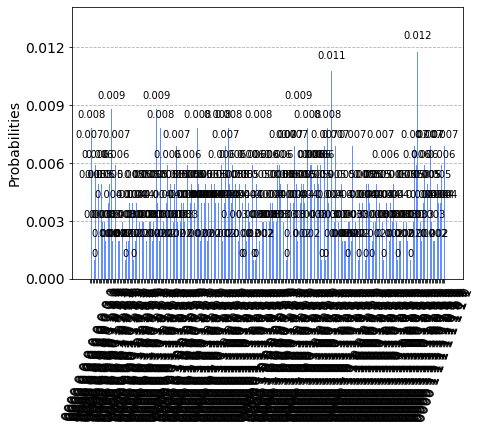

In [108]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(alice_bob_tele, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABRUAAAh4CAYAAABfxVs3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdf3zO9f7H8ed+sGEObZghMkOozcE67Dg2P06adFI5W05Hwsmw9ZWbjtQ5kZzjlGQ7OhH5VadSxjonNeUoW/lRzZd0+HLEZCb5lY1hzHZ9/9jZdIXPZxfb5/PZ9rjfbtXl4/25rudlT1f28vnh5XK5XAIAAAAAAACACvK2OwAAAAAAAACA6oWhIgAAAAAAAACPMFQEAAAAAAAA4BGGigAAAAAAAAA8wlARAAAAAAAAgEcYKgIAAAAAAADwCENFAAAAAAAAAB5hqAgAAAAAAADAIwwVAQAAAAAAAHiEoSIAAAAAAAAAjzBUBAAAAAAAAOARhooAAAAAAAAAPMJQEQAAAAAAAIBHGCoCAAAAAAAA8AhDRQAAAAAAAAAeYagIAAAAAAAAwCMMFQEAAAAAAAB4hKEiAAAAAAAAAI8wVAQAAAAAAADgEV+7AwAAANQku3fvNl3zt7/9TUlJSYZrbr755sqKBIcx6wj9qN34DIER+gHASThSEQAAwGIvvfSS3RHgYPQDZugIjNAPAFZhqAgAAAAAAADAIwwVAQAAAAAAAHiEoSIAAIDFVq5caXcEOBj9gBk6AiP0A4BVGCoCAAAAAAAA8AhDRQAAAIsNHTrU7ghwMPoBM3QERugHAKv42h0ANcd/PpZOH7U7BWqShs2kjv3sTgEAAAAAAH6MoSIqzemjUl6u3SkAONGjb9jzuikP2PO6gJN5eXlZ/poul8vy1wQAAEDV4vRnAAAAiyUmJtodAQ5GP2CGjsAI/QBgFYaKAAAAFktKSrI7AhyMfsAMHYER+gHAKgwVAQAALNanTx+7I8DB6AfM0BEYoR8ArMJQEQAAwGLHjh2zOwIcjH7ADB2BEfoBwCoMFQEAAAAAAAB4hKEiAACAxTp37mx3BDgY/YAZOgIj9AOAVRgqAgAAWGzVqlV2R/BIkyZNdOONN6pp06ama2+77TYFBQVZkKrmqm79gPXoCIzQDwBWYahYSdatW6f+/fsrJCREfn5+CgkJ0eDBg7V582a7owEAAIeZOnWq3REM+fn5afjw4UpPT9eRI0d07Ngx5eTk6OjRozp69KjWrFmjESNGyN/f322/3r1766OPPtJHH32kRo0a2ZS++nN6P2A/OgIj9AOAVRgqVpITJ04oIiJCc+fO1dq1a5WSkqLjx4+rT58+2rRpk93xANRiLpf0zXHp833S/+6XTp+zOxGA1NRUuyNc1fDhw3Xw4EG99tprio2NVbNmzZSfn6+cnBzl5eWpadOmuuOOO7Rs2TLl5uZq1KhRkkoHimvWrFFAQIC2b9+u06dP2/xOqi8n9wPOQEdghH4AsIqv3QFqivj4eMXHx7tti42NVdOmTbV06VJFRUXZlMx5ikuKtTh9itZuWaYLFwvVvf3tenToAjVq0MTuaECNk31USs2SDudd2ubtJXW/SbovUvKvY1s0U4uSWqjnfc/olr6/K9/mcrn08sON9MuEVxUWeY+N6YCap379+nr99dd1zz2lv7e2bt2q+fPna926dfrmm2/K17Vu3VoDBgzQ2LFjFRkZqcWLF2v06NEKDw9XQECAXnvtNY0cOVIlJSU2vRMAAABYgSMVK6CkpESzZ89W+/bt5e/vr4iICGVmZqpjx44aM2bMVfcLCAiQn5+f6tRx8HftNnhr/bPatPOfevGRz7X8D7mSpOeWD7c5FVDz7D8mvfSR9F2e+/YSl5S1X5r/kXThoj3ZzBR8f0hn8g6raZuubtvzj2brQuFpBYf2sCkZUDPVq1dP6enpuueee5SXl6cRI0aoe/fuWrRokdtAUZJycnK0ZMkS3XbbbfrNb36j/Px8RUVFKSAgQG+++SYDRQAAgFqCoWIFjB49WjNmzFBCQoLWrFmjuLg4DRs2TNnZ2erevbvb2uLiYhUVFenAgQNKTEyUy+XS2LFjbUruTOmfLVR838cVEhSqBvUa6eE7ZynrPx/oyMkDdkcDagyXS1qZJZWUSK6rrDlwQsrKtjRWhR3JzpKXt4+CWt3itv14znbVbxSshkE32pQMqByZmZl2R3CTkpKi6Oho5ebm6rbbbtNrr71Wof0OHjwoX99LJ75cvHiRgWIlcFo/4Dx0BEboBwCrMFQ0sXz5ci1btkzvvvuuHnvsMfXt21d/+MMf1KtXL128eFHdunVzWx8dHa26devqpptu0jvvvKP09HSFh4fblN55Cs7l6Whejtq3vDSMbdGkner7/0T7vt1uYzKgZsn9Xjp08uoDRUnykrTha6sSeeZIdpZuaN5BvnXdbwJxLGe7mrXlKEVUfzt37rQ7QrkBAwZozJgxOn/+vAYNGqSvv67YB0PZNRQbNGigf/7znzp37pwefPBBDRo0qIoT13xO6geciY7ACP0AYBWuqWhi5syZuuOOOxQdHe22PSwsTHXq1LlsYLh48WLl5+fr0KFDWrRokQYNGqTVq1crJiZGkvTNN99oxIgROnz4sPz8/DRv3jz94he/qLS8Xl5elfZcnpo9dr0i2sUYrjl7vvSi7Q3qud8RMsC/sc4WnqqqaKimMjMzFDmsr90xqqWOUb/RHePfMFzjkpR7/IK8vPyqPM+E143Gm5c7kp2lvCN7tWCs+7VWi84XqMddT1T4eez8TETtNXHiRNM1ycnJpuuSk5MrK5Kh6dOnl//33//+d4X2+eFNWcquoThx4kTNnj1bzzzzjNLT093W83vRXUW+9k7pB6xX3T5DYC36AcAKLlfFvn9jqGggNzdXO3bsuOIHck5Ojrp06SI/P/dvxjt27Fj++O6771avXr00YcIEbd9eehReQkKC4uPjNX78eG3atEm//vWvtX//ftWtW7dq34xD1PdrKEk6cy7fbXtBYZ7q+//EjkhAjVRcVFixdRfPV3GSa3Nk/xb97N6n1an3g27b33jiVgVzpCJQaSIiIhQVFaW8vDz99a9/rdA+VxoolpSU6KWXXtITTzyh7t2767bbbtMXX3xRxekBAABgJ4aKBnJzS28i0rx5c7ft586dU2ZmpmJjYw339/b2Vo8ePbRkyRJJ0vHjx7Vhwwa9++67kqSoqCi1aNFC69ev18CBAyslc0WnyVVhy1tSXq7xmoB6jdWscWvtPbRVYS1Lb8Bw+ES2zhaeUmgIp4nDXXR0jFzz7et0dXbmvDQ1TSo2uLSZl6ReNzfUPAs+Nx41PmjSTd53e3X+zEm1CR+ohkGt3LefzVNwaGSFn8vOz0TUXrt37zZdk5ycbHizN0maM2dOZUVy88OjBstOVX7rrbd09uxZ032vNlCUpMLCQr3++uuaMGGCYmNj3YaK/F50Z9YRO/sB+zn9MwT2oh8ArlXZGbQZGRmmayqKayoaaNKk9LS7PXv2uG2fNWuWDh8+fNlNWn6sqKhIGzZsUFhYmKTSoxuDg4Pdjm5s27atDhyoXTcoGdRzjN7OeE6Hv9+vM4Wn9Er64+rRYaCaB95kdzSgxmjgJ/2snfEal6RfdDReY4cj2Vny9auvpq0j3LYf/nqTAoJuVP1GzWxKBlSeslOO7Vb2Z5mNGzearjUaKJbZtGmT2/Pi2jilH3AuOgIj9AOAVThS0UBoaKjCw8M1c+ZMBQYGqmXLllq5cmX5dYJ++AfmIUOGqGvXroqIiFBgYKBycnK0cOFC7dixQ2lpaXa9BUe6v+8UFZw9qaS/Rqqo+Ly6tf+lpvzmdbtjATXOkG7S0Xxp79HSoxLLjhMqexx3m3RTk6vvb5cj2VkKbhspbx/3/0Ud3ruZU59RY8TFxdkdQVLpn3Uk8yNfKjJQlKRdu3a5PS+ujVP6AeeiIzBCPwBYhaGiAW9vb6WmpiohIUHjxo1TUFCQRowYocTERD355JNuN2mJiopSamqq5s6dq9OnTyswMFC9evVSZmamevfuLUlq3bq1jhw5ovPnz5cfrbh//361adPGlvdnFx9vHyXcNVsJd822OwpQo9X1lcb2k/73G2njHinn+9LtPdqWHqHYOsjWeFfV57dXPh2n38j5FicBqk6nTp3KB3B2euCBB9S4cWPTLHFxcaYDRUnau3evoqKilJ+ff8WfR8U4pR9wLjoCI/QDgFUYKpro0KGD1q9f77Zt+PDh6ty5s+rVq1e+bfLkyZo8ebLhczVp0kQ///nPtXjx4vIbtRw6dEh9+3J3WwBVw9en9DTon7W7dF3DB6LszQTAOSr6TeeECRO0detWvfbaa1cdKEql153evHlzZcUDAACAgzFUvAZbtmxRz549r2nfl19+WQ899JBSUlJUt25dLV++vNbc+RkAAFRPLpdLy5YtszsGAAAAHIShoocKCgq0Z88ejR8//pr2Dw0N1SeffFLJqQAAQHXi6Z31ULvQD5ihIzBCPwBYhaGihwICAlRcXGx3DAAAUI3Nn881QnF19ANm6AiM0A8AVvG2OwAAAEBtM27cOLsjwMHoB8zQERihHwCswlARAADAYhkZGXZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAI8wVAQAAAAAAADgEYaKAAAAFtu1a5fdEeBg9ANm6AiM0A8AVmGoCAAAYLEVK1bYHQEORj9gho7ACP0AYBVfuwMAAGq+lAfsTgA4y7Rp0xQXF2fLa7tcLo/WT3luoSTp2cfHuD1G1bGzH6ge6AiM0A8AVuFIRQAAAAAAAAAeYagIAAAAAAAAwCMMFQEAACw2b948uyPAwegHzNARGKEfAKzCUBEAAMBiXbp0sTsCHIx+wAwdgRH6AcAqDBUBAAAsFh0dbXcEOBj9gBk6AiP0A4BVGCoCAAAAAAAA8AhDRQAAAAAAAAAeYagIAABgscjISLsjwMHoB8zQERihHwCswlARAADAYllZWXZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAI8wVAQAAAAAAADgEYaKAAAAFlu5cqXdEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMAjDBUBAAAsNnToULsjwMHoB8zQERihHwCs4mt3AAAAnOrRN6x/zZQHrH9NACjj5eVly+u6XC5bXhcAAFw7jlQEAAAAAAAA4BGGigAAABZLTEy0OwIcjH7ADB2BEfoBwCoMFQEAACyWlJRkdwQ4GP2AGToCI/QDgFUYKgIAAFisT58+dkeAg9EPmKEjMEI/AFiFoSIAAIDFjh07ZncEOBj9gBk6AiP0A4BVGCoCAAAAAAAA8AhDRQAAAIt17tzZ7ghwsJreD29vvgW5XjW9I7g+9AOAVXztDgAAAFDbrFq1yu4IcLDq0o+bb75ZvXv31k9/+lM1adJEJSUlOnjwoLZs2aKMjAwdPXr0sn1Gjx6tBx54QHfddZfOnDljQ+qaobp0BPagHwCswl8TVpJ169apf//+CgkJkZ+fn0JCQjR48GBt3rzZ7mgAAMBhpk6dancEOJjT+3HPPffo008/1a5du/TKK69o/PjxiouL0/3336/f//73evvtt3Xw4EG9+eabCg8PL99v9OjRWrRokfr27avBgwfb+A6qP6d3BPaiHwCswlCxkpw4cUIRERGaO3eu1q5dq5SUFB0/flx9+vTRpk2b7I4HANXKd/lS6hfSU6ukx9+WXlgjfbZXKiq2OxlQOVJTU+2OAAdzaj+aNWumtLQ0paWlqXfv3srPz9fy5cs1adIkxcfH6ze/+Y2efvppffDBB/Lx8dGwYcO0ZcsWTZs2TWPGjNGiRYskSZMmTdLbb79t87up3pzaETgD/QBgFU5/riTx8fGKj4932xYbG6umTZtq6dKlioqKsimZ86z/8i29u+klZX+7XYVFZ/XhcxftjgTAQb48IL22UXK5JNd/t+V+L731ubR5nzSun+Rfx9aIV7UoqYV63veMbun7u/JtLpdLLz/cSL9MeFVhkffYmA4Arl2bNm308ccfKzQ0VKdOndIf//hHLVmy5KqnMLdq1UqPP/64kpKS9PTTT5dvnzRpkubMmWNRagAAUJU4UrECSkpKNHv2bLVv317+/v6KiIhQZmamOnbsqDFjxlx1v4CAAPn5+alOHYd+92uTgHo36K5e4zXuVyl2RwHgMEfySweKJT8YKEqXHh84XnoEoxMVfH9IZ/IOq2mbrm7b849m60LhaQWH9rApGQBcn0aNGmndunUKDQ1VVlaWbrnlFr344ouG10TMzc3VI488oueff75829atWxkoAgBQgzBUrIDRo0drxowZSkhI0Jo1axQXF6dhw4YpOztb3bt3d1tbXFysoqIiHThwQImJiXK5XBo7dqxNyZ0psuNA9fvpMIUEhdodBYDDbNhTOlA0svWAlHfWmjyeOJKdJS9vHwW1usVt+/Gc7arfKFgNg260KRmcKDMz0+4IcDCn9WPOnDkKCwvTtm3bNGDAAB08eLBC+40ePVq///3vJUmFhYXq1q3bZWf24No4rSNwFvoBwCqc/mxi+fLlWrZsmTIyMhQdHS1J6tu3r7Zu3aq0tDR169bNbX10dLQ2btwoSQoODlZ6errbBaqrmpeXl2Wv9WOzx65XRLsY214fNU9mZoYih/W1O0aNMeH10mmdnZ8TZkalHFDDJq0N17hcUu9Bo7Uzc0mV5yn7NauII9lZuqF5B/nW9Xfbfixnu5q1rfhRik7++qBiJk6caLpm3759ateuneGa5OTkyop0XR5/doGk0m7+8DGunVlHnNSPXr16adSoUSosLNSwYcN06tSpCu1XdlMWqfSU51OnTumVV17Riy++qHfffVfnzp1zW0+nLqlpnyGoXPQDwPWqzP/ncqSiiZkzZ+qOO+4oHyiWCQsLU506dS4bGC5evFiff/650tLS1L17dw0aNEgZGRnlPz916lR16NBB3t7eWrlypRVvAQCqDd+69Sq0zqeC66x0JDtLeUf2asHYJm7//O97zyk4NNLueHCYd9991+4IcDAn9SMpKUlS6QDiP//5T4X2+fFAcc6cOVq0aJGysrLUtGlTjlasBE7qCJyHfgCwipfL5ar4YRi1TG5urm688UYtXrxYo0aNcvu5YcOGaffu3dq2bdtV9y8pKVGvXr1UWFio7du3S5I2bdqk5s2ba9SoUUpKStLQoUOr9D1YactbUl5uxddv35ehyQsHcKMWXFXjVlKP++1OUXM8+kbpf1MesDeHkblrpf3HS49GNDKun9QxpOrzlP2aVcTLCYHqNugxder9oNv2N564VQPHva62P72zQs/j5K8PKmb37t2mazp16qRdu3YZrrn55psrK9J1mfLcQknSs4+PcXuMa2fWETv78cOjFxo0aKDvv/9ePj4+atu2bYVOe77SQLHMiBEjys8A6tvX/UwEviW5pKZ9hqBy0Q8A1yomJkaS3A58u5Y1P8SRigZyc0snZM2bN3fbfu7cOWVmZl526vOPeXt7q0ePHtqzZ0/5tqioKIWGci1BALiSn7c3Hih6SQpsILVvfvU1dsj7bq/OnzmpNuED1TCoVfk/xUWFOn82jyMVAVRLXbt2Vd26dfXVV19d90BRkt5//31JUo8ePeTtzbchAABUd/zf3ECTJk0kyW0oKEmzZs3S4cOHL7tJy48VFRVpw4YNCgsLq7KM1VFxSbEuFBWq6OIFSdKFokJdKCrkb6gBqGsbqX3wlX/O67//GhopeTvs0ltHsrPk61dfTVtHuG0//PUmBQTdqPqNmtmUDE41ffp0uyPAwZzSj7LL/BidmVPGbKAoScePH1dOTo4CAgL4S/br5JSOwJnoBwCrcKMWA6GhoQoPD9fMmTMVGBioli1bauXKlUpPT5ckt6HikCFD1LVrV0VERCgwMFA5OTlauHChduzYobS0NLvegiOt+9+/a/aKkeU/vvPJ0muj/f2J/WoeeJNNqQA4gY+39HCMlLZF+iLb/U7QgQGlA8VOLWyLd1VHsrMU3DZS3j7u/1s9vHezgj24SQtqj7i4OLsjwMGc0o+cnBytWLHC9E6yAwcONB0ollm5cqVatGihoqKiSs1a2zilI3Am+gHAKgwVDXh7eys1NVUJCQkaN26cgoKCNGLECCUmJurJJ590u0lLVFSUUlNTNXfuXJ0+fVqBgYHq1auXMjMz1bt3bxvfhfMMjHxIAyMfsjsGAIeq6yvd31Ma3FX646rSbYn9pXbBzjtCsUyf3175G+h+I+dbnATVRUWud4Xayyn9eP/998tPWTby8ccf65///Kc++eQTw4GiVDp0xPVzSkfgTPQDgFUYKpro0KGD1q9f77Zt+PDh6ty5s+rVu3T30cmTJ2vy5MlWxwOAGivA/9Jjp11DEQBwSVFRke655x4uZQMAQC3DNRWvwZYtW0yvp3g1Tz31lFq1aqXNmzcrISFBrVq10r59+yo5IQAAAGAdBooAANQ+DBU9VFBQoD179pje+flqZsyYodzcXJ0/f14nTpxQbm6u2rVrV8kpAQCAk8XExNgdAQ5GP2CGjsAI/QBgFU5/9lBAQICKi4vtjgEAAKqx+fO53iaujn7ADB2BEfoBwCocqQgAAGCxcePG2R0BDkY/YIaOwAj9AGAVhooAAAAWy8jIsDsCHIx+wAwdgRH6AcAqDBUBAAAAAAAAeIShIgAAAAAAAACPMFQEAACw2K5du+yOAAejHzBDR2CEfgCwCnd/BgDgKlIesDsBaqoVK1YoLi7O7hhwKDv74XK5PFo/5bmFkqRnHx/j9hhVi88QGKEfAKzCkYoAAAAWmzZtmt0R4GD0A2boCIzQDwBWYagIAAAAAAAAwCMMFQEAAAAAAAB4hKEiAACAxebNm2d3BDgY/YAZOgIj9AOAVRgqAgAAWKxLly52R4CD0Q+YoSMwQj8AWIWhIgAAgMWio6PtjgAHox8wQ0dghH4AsApDRQAAAAAAAAAeYagIAABgscjISLsjwMHoB8zQERihHwCswlARAADAYllZWXZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAI8wVAQAAAAAAADgEYaKAAAAFlu5cqXdEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMAjDBUBAAAsNnToULsjwMHoB8zQERihHwCswlARAAAAAAAAgEd87Q4AAAAqz6Nv2PO6KQ/Y87oAAOt4eXnZ8roul8uW1wUAGONIRQAAAIslJibaHQEORj9gho7ACP0AYBWGigAAABZLSkqyOwIcjH7ADB2BEfoBwCoMFQEAACzWp08fuyPAwegHzNARGKEfAKzCUBEAAMBix44dszsCHIx+wAwdgRH6AcAqDBUBAAAAAAAAeIShIgAAgMU6d+5sdwQ4GP2AGToCI/QDgFUYKgIAAFhs1apVdkeAg9EPmKlOHQkMDFT37t112223qUOHDvL2Nv4WdNSoUfL19bUoXc1UnfoBoHpjqFhJ1q1bp/79+yskJER+fn4KCQnR4MGDtXnzZrujAQAAh5k6dardEeBg9ANmnN6RLl266KWXXtL+/ft14sQJbdmyRZ9//rn+85//KD8/X+vWrdOwYcNUt25dt/1efPFFLV68WK+++qpNyWsGp/cDQM3BULGSnDhxQhEREZo7d67Wrl2rlJQUHT9+XH369NGmTZvsjofrkLJqrF58J6nKnv+jrW8oYU5ElT0/AOsUFUtbv5HW7pAydkvHT9udCE6VmppqdwQ4GP2AGad2pEmTJnrrrbe0Y8cOjR8/XjfddJPOnDmjbdu26YsvvtDBgwcVEBCg/v37680339S+ffsUGxsrqXSgmJSUpMLCQr322ms2v5Pqzan9AFDzcFx5JYmPj1d8fLzbttjYWDVt2lRLly5VVFSUTcmc5ZX3H9fnu97TsbyD8vcL0M9uvlO/u/M5/aR+oN3RrurR+16u0ufv3+0B9e/2QPmPZ731kHx8fDXp14vc1q3e/LJWfTJHJ059q5ZN2mvcr5IV0S6m/OcPHd+rv64aq10HNiug/g269xcT9evoSVWaHcAln++T/rFVOnfh0rZ//K8UcaM0rJfkX8e+bEYWJbVQz/ue0S19f1e+zeVy6eWHG+mXCa8qLPIeG9MBAKqLqKgovfPOO2rWrJnOnDmjZcuWafHixdq+fbtKSkrK1zVt2lRDhgzRI488oltvvVXp6en66quvFB4ersLCQg0ZMkQffvihje8EAFBRHKlYASUlJZo9e7bat28vf39/RUREKDMzUx07dtSYMWOuul9AQID8/PxUp45Dv5O0gbe3j6YMe12rpp/QgonbdTw/V8+//ZDdsa6Zy+VScfHFKn+dzO2pevXDp/TH367QP2bk686eCfrj4jt19GSOJKm4pFhPLb1LrYM7KfXpY3rmoXe1Yv1zyvjy7SrPBkD6Ilta/pn7QLHM9oPSyx9LF4utz2Wm4PtDOpN3WE3bdHXbnn80WxcKTys4tIdNyQAA1UnPnj21du1aNWvWTB9//LFuueUWJSUladu2bW4DRUk6duyYXnnlFXXt2lWTJk3SxYsXFR4erosXLzJQBIBqhqFiBYwePVozZsxQQkKC1qxZo7i4OA0bNkzZ2dnq3r2729ri4mIVFRXpwIEDSkxMlMvl0tixY21K7jyjY2cqrOVP5etTR40Dmuqe3hP01b4Mu2NJks6dL9CC1Y9p+F9C9as/NtTo5zvr39mfatZbD+mF1EtH8Pzy915K+/SvGv/XHhr8ZH39J3fLVfeVpEnzY/TGuj+5vdYvf++lHfs3SJI+zFqmEc+GSZLeXj9LH297Q//a8qru+kOA7vpDgIpLivXJV6nq3+23CmvZVT7ePrqr11g1DmimD7cskyT9O/sTHT15QKNj/yL/uvXVvlU33dkzQe99VrVHWQIoHRb+c6vxmm+OS9tzrMnjiSPZWfLy9lFQq1vcth/P2a76jYLVMOhGm5LVfJmZmXZHgIPRD5hxUkcaN26sVatWqUGDBnrttdd0++2365tvvjHdr6SkRG3btpWvr69cLpd8fX3VunXrqg9cCzipHwBqNk5/NrF8+XItW7ZMGRkZio6OliT17dtXW7duVVpamrp16+a2Pjo6Whs3bpQkBQcHKz09XeHh4dvWz2AAACAASURBVJbnri627f1IoS2ccT3BF1JH68SpbzUr4SM1v+EmfXti31XXfvDFYj094h0FB96k4pKLmvXWgxXe10h838k6cOT/Ljv92SWXXC6X21qXXNr37ZeSpOzD29WySQfV8wso//mwlt307qaXrikHgIrbeUg6c954jZeXtGmv1L2tNZkq6kh2lm5o3kG+df3dth/L2a5mbTlKsSrt3LlTzZo1szsGHIp+wIyTOpKcnKwWLVpo48aNGjVqlIqLK3Zo/g+voZiSkqIpU6bohRde0Jo1a5Sbm1vFqWs2J/UDQM3GUNHEzJkzdccdd5QPFMuEhYWpTp06lw0MFy9erPz8fB06dEiLFi3SoEGDtHr1asXExOjkyZMaPny49uzZo3r16ik4OFjz5s1TWFhYpeX18vKqtOfy1Oyx692u8Wfm069W6b3PXtYLY+3/m7STBUeVuX2FXpm0QyGBpd/1t2xy9a/Lr6MfU4sm7SRJp86e8Gjfa9Gz02AtWD1J/bv9Vu1aROi9zxboaF6OWgSVvs7ZwtNqUK+R2z4B9RrrzPlTlZrDapmZGYoc1tfuGDXGhNdLB9N2fk54qjpk7nbnY/rFsOcN17hc0pe7cuR1e5sqz1P2a1YRR7KzlHdkrxaMbeK2veh8gXrc9YRHr+vkr5HVJk6caLomOTnZdF1ycnJlRboujz+7QFLp1/iHj3HtKvK1px+1V3X6DGnTpo0efPBBXbhwQSNHjrymgWLZKc8333yzhgwZov/5n//R5MmT3dbTqUuqUz8AOFNlfqYyVDSQm5urHTt2XPEDOScnR126dJGfn5/b9o4dO5Y/vvvuu9WrVy9NmDBB27dvl5eXlx599FENGDBAkjR37lyNHDlSn376adW+EQfK3J6qv65K0DMPvav2rbqZ71DFjnz/jSSpVdMOFVofHHjTNe97LX7Z/UF9f/o7Pbv8AeWfOa6fdxmin4YNKL/BTX3/hjpzLt9tn4JzeWrg95MqywSgVFFhgekal6ukQuusdmT/Fv3s3qfVqfeDbtvfeOJWBXOkIgDAxMMPPyxvb2+lpqbq66+/rtA+VxooStKf//xnDRkyRKNGjdJTTz2l8+dNTgMAANiOoaKBssPumzdv7rb93LlzyszMVGxsrOH+3t7e6tGjh5YsWSKp9HojZQNFqfQOabNmzarUzD8+RdZKW96S8ipwpsIHWUu1cPUkPTNytW5p+/OqD1YBZUPCQ8e/Vpvgzqbrvb0uXY7UbN/6fg1VeOFM+Y+P539r/Nzel1/q1MvLS/f3fVz3931cklR08YKG/6WtHhjwlCQpNCRCh47v0bkLZ1SvbgNJ0t5vtznm1PJrFR0dI9d8+zpd0zz6Rul/7fyc8FR1yJx3Vpr+j9KjEa/Gy8tbw+7orNcmV/37KPs1M5P33V6dP3NSbcIHqmFQK/ftZ/MUHBrp0es6+Wtktd27d5uuSU5ONrzZmyTNmTOnsiJdlynPLZRU+jX+4WNcO7OO0I/azcmfIT8+uuX222+XJL366qsV2v9qA0VJ2rJli3bu3KkuXbqoW7du2rx5c/nP0alLnNwPAM4WExMjScrIyDBdU1HcqMVAkyalp4Pt2bPHbfusWbN0+PDhy27S8mNFRUXasGHDVU9vTklJ0ZAhQyonbDXxzoa5WvjeY/rLwx86ZqAoSTcENNMvwodqbtp4fff9N3K5XDp0fK8OHd973fu2b9VdG3f+Q3kFx3S28LSWfvAH4+dr2Fzfnch2u1PemXP5OnBkl1wul/IKjmlu2jg18G+k23uMkCTdGtpHzW5ooyVrntT5onPae+hLvf/ZAt3ZM+E6flUAVETj+lJ3g7OavSTV9ZV6Ve5VEa7bkews+frVV9PW7n/5cPjrTQoIulH1G3Etpqo0ffp0uyPAwegHzDihI76+vuWXgvr8889N1xsNFMuUPU+PHhwtfz2c0A8AtQNHKhoIDQ1VeHi4Zs6cqcDAQLVs2VIrV65Uenq6JLkNFYcMGaKuXbsqIiJCgYGBysnJ0cKFC7Vjxw6lpaVd9tzTp0/X3r179fHHH1v2fpxg3j8nyMfbV4+97H6dvNV/tv+0wMd+vUTLPnxKk+ZH69TZEwq+oY0evW/Bde3bskmY7vvFRGUf/kojnm2nRg2a6nd3Pqe1/71r85UMuu13+vLrj3Tf00FyuVxaNf2Ezpw/pT/9/df67uQ3quNTV7d1ulOzx66XX516kiQfbx/NGLlaKasSdN+0IDWo11hx0b9X3673V8YvDQATv/6ZlH9O+vpI6U1ZfnhARR1f6eGY0uGjkxzJzlJw20h5+7j/UeDw3s2c+myBuLg4uyPAwegHzDihI82aNZOfn5++++47nTplfB3vigwUpUsHc7Rq1eqKP4+KcUI/ANQODBUNlF0fJCEhQePGjVNQUJBGjBihxMREPfnkk243aYmKilJqaqrmzp2r06dPKzAwUL169VJmZqZ69+7t9rx/+tOf9N577+lf//qX6td32HeZVexfzzv31IX6/g01/u4Ujb87xW37LW3dv35Xeg9X21eSGtRrpKdHuA+Wf/gcAyMf0sDIh8p/HBIUqhf/x/1ve5s1vlGvPLbDMH/LJmF6PuEjwzUAqoafrzS2X+mdoDd9Le0+XLo9NlzqGSY1qmdvvivp89srn/bUb+R8i5PUTp06ddKuXbvsjgGHoh8w44SOfPfdd2rRooV8fY2/pfT391fXrl1NB4qStGDBAr355ps6efJkZcetVZzQDwC1A0NFEx06dND69evdtg0fPlydO3dWvXqXvkucPHnyZXcpu5Lp06crPT1d//rXv9S4ceNKzwsAsIePtxR+Y+k/Zdc1HHirvZkAAKgqJSUlOnz4sOm6wsJCxcbGKiIiQhs3bjRcm5eXp7y8vMqKCACoYgwVr8GWLVvUs2dPj/fbuXOnnn76abVr187t4pdffvllJaYDAAAAAOcoKCgwHSgCAKofhooeKigo0J49ezR+/HiP9+3SpQt3LgMAAB7fWQ+1C/2AGToCI/QDgFUYKnooICBAxcXFdscAAADV2Pz5XLsSV0c/YIaOwAj9AGAVb7sDAAAA1Dbjxo2zOwIcjH7ADB2BEfoBwCoMFQEAACyWkZFhdwQ4GP2AGToCI/QDgFUYKgIAAAAAAADwCENFAAAAAAAAAB5hqAgAAGCxXbt22R0BDkY/YIaOwAj9AGAV7v4MAEANkvKA3QlQEStWrFBcXJzdMeBQ9ANm7OqIy+XyeJ8pzy2UJD37+Bi3x6g6fIYAsApHKgIAAFhs2rRpdkeAg9EPmKEjMEI/AFiFoSIAAAAAAAAAjzBUBAAAAAAAAOARhooAAAAWmzdvnt0R4GD0A2boCIzQDwBWYagIAABgsS5dutgdAQ5GP2CGjsAI/QBgFYaKAAAAFouOjrY7AhyMfsAMHYER+gHAKgwVAQAAAAAAAHiEoSIAAIDFIiMj7Y4AB6MfMENHYIR+ALAKQ0UAAACLZWVl2R0BDkY/YIaOwAj9AGAVhooAAAAAAAAAPMJQEQAAAAAAAIBHGCoCAABYbOXKlXZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAI8wVAQAALDY0KFD7Y4AB6MfMENHYIR+ALAKQ0UAAAAAAAAAHvG1OwAAAMCjb1j/mikPWP+aAADUZF5eXpa/psvlsvw1AZTiSEUAAACLJSYm2h0BDkY/YIaOwAj9AGAVhooAAAAWS0pKsjsCHIx+wAwdgRH6AcAqDBUBAAAs1qdPH7sjwMHoB8zQERihHwCswlARAADAYseOHbM7AhyMfsAMHYER+gHAKgwVAQAAAAAAAHiEoSIAAIDFOnfubHcEOBj9gBk6AiP0A4BVGCoCAABYbNWqVXZHgIPRD5ihIzBSk/vh5+cnLy8vu2MA+C+GipVk3bp16t+/v0JCQuTn56eQkBANHjxYmzdvtjsaAABwmKlTp9odAQ5GP2CGjsBIdehHgwYNFB8fr9mzZ+uDDz7Qp59+qnXr1unFF1/UiBEjFBQUdNk+9erVU3p6uubPn89gEXAIhoqV5MSJE4qIiNDcuXO1du1apaSk6Pjx4+rTp482bdpkdzwAAAyVlEgXi+1OUXukpqbaHQEORj9gho7AiJP7ERgYqJSUFB06dEhvvfWWJk2apIEDB6p3797q37+/kpKStGzZMuXm5mrZsmVq3bq1pNKB4nvvvad+/frpV7/6lUJCQmx+JwAkydfuADVFfHy84uPj3bbFxsaqadOmWrp0qaKiomxK5jxL1vxB67e9qVNnT6iur79uDe2jsXfNUbMbWtsdDQBqnZ2HpMzd0p7vSn8cFCD9ooMU1V6q6+A/JSxKaqGe9z2jW/r+rnyby+XSyw830i8TXlVY5D02pgMAAD925513atGiRWrevLkkaePGjfrwww+1bds25eXlqUGDBgoPD1e/fv10++23a8SIEbr33nv1xBNP6N5771W/fv10+PBhxcTE6Ntvv7X53QCQOFKxQkpKSjR79my1b99e/v7+ioiIUGZmpjp27KgxY8Zcdb+AgAD5+fmpTp06FqZ1vgHdh+vliV/qn386pb8/+Y2aNW6tP79xv92xAKDWWfOV9EqG9PWRS9u+L5D+sVV6aZ10vsi2aIYKvj+kM3mH1bRNV7ft+UezdaHwtIJDe9iUDAAAXMnvfvc7vfvuu2revLk++eQTRUREqHfv3poxY4bee+89bdiwQR9++KGef/55xcbGKiwsTKmpqWrYsKH+9re/uQ0U9+zZY/fbAfBfDBUrYPTo0ZoxY4YSEhK0Zs0axcXFadiwYcrOzlb37t3d1hYXF6uoqEgHDhxQYmKiXC6Xxo4da1NyZ2rd7GY1qNdIkuSSS15e3jp47D82pwKA2mXXt9KH/y597HJd2l728MCJ0uGiEx3JzpKXt4+CWt3itv14znbVbxSshkE32pSs4jIzM+2OAAejHzBDR2DEaf248847tWDBAnl7e+upp55STEyMvvrqK8N99u/frxEjRuj//u//yrctXryYgSLgMA4+sckZli9frmXLlikjI0PR0dGSpL59+2rr1q1KS0tTt27d3NZHR0dr48aNkqTg4GClp6crPDzc8txO9/G2N/XXtHE6W3hKPt6+GnvXHLsjAUCtkrlb8vJyHyj+2BfZ0l1dpfp+1uWqiCPZWbqheQf51vV3234sZ7uata0eRynu3LlTzZo1szsGHIp+wAwdgREn9eOGG27QokWLygeKf/rTnyq0X9k1FDt37qyTJ0/qhhtu0KRJk/T3v/+dwSLgIAwVTcycOVN33HFH+UCxTFhYmOrUqXPZwHDx4sXKz8/XoUOHtGjRIg0aNEirV69WTEyMJGnIkCHKzs6Wj4+P6tSpo5kzZ2rAgAGVltfOu2DNHrteEe1iKrS2309/o34//Y2+P/Wd1mQtVtuQW6s2HKqlzMwMRQ7ra3eMGmPC66XTo+p0t7zqmFmqHrkfebVI3j7GfwwoLpFu6XWX9m97r8rzlP2aVcSR7CzlHdmrBWObuG0vOl+gHnc9UeHnqaqvz8SJE03XJCcnm65LTk6urEjX5fFnF0gq/fX64WNcu4p87elH7cVnCIxUt35MnTq1/JTnP//5zxXa54c3ZSk75fmJJ57QQw89pBdeeEF33XWX23r6BHimMn/PMFQ0kJubqx07dlzxAzknJ0ddunSRn5/74RsdO3Ysf3z33XerV69emjBhgrZv3y5JWrZsmRo3bixJ2rZtm2JiYvT999/Lx8enCt+JcwX+pLkG/exhPfiXUL3xhxz9pH6g3ZEAoObz8jIdKJbx9nHedYGP7N+in937tDr1ftBt+xtP3KrganKkIgAANV2DBg00cuRISdKECRPkMjo94r+uNFDcs2ePHnvsMd1///0aNGiQ2rZtq/3791d1fAAVwFDRQG5uriSV352qzLlz55SZmanY2FjD/b29vdWjRw8tWbKkfFvZQFGS8vPz5eXlVaEP14qqzOfy1Ja3pLxcz/crLr6owgtndOLUtwwV4SY6Okau+fZ1uqZ59I3S/9r5OeGp6phZqh65n31POpJ/6RqKV7P5ozQ1/UnV5yn7NTOT991enT9zUm3CB6phUCv37WfzFBwaWeHXrKqvz+7du03XJCcnG97sTZLmzHHGpUGmPLdQUumv1w8f49qZdYR+1G58hsCI0/vxwyOg7rzzTjVq1EibNm3Sl19+abrv1QaKknTixAmtWLFCDz74oIYNG6aZM2eW70efgIopO4M2IyPDdE1FcaMWA02alJ5W9eNrNsyaNUuHDx++7CYtP1ZUVKQNGzYoLCzMbXtiYqJCQ0N13333adWqVfL1rT2z3ZKSEv1j4990suCoJOlYXq7+9k6imt9wk1o3vdnmdABQe/TuYDxQ9JLUobksGSh64kh2lnz96qtp6wi37Ye/3qSAoBtVv5EzriFlZvr06XZHgIPRD5ihIzDilH5ERpb+Rd8HH3xgutZooFim7HnKnheA/WrPNOsahIaGKjw8XDNnzlRgYKBatmyplStXKj09XZLchopDhgxR165dFRERocDAQOXk5GjhwoXasWOH0tLS3J73pZdeklR6V66JEyfqk08+UUBAgHVvzGZf7E7XG/96RoUXzqhBvcaKaBej58ask08FT8UDAFy/nu2kLw9Ie49e/nNeXpK/r3SvA88kPpKdpeC2kZedvn147+ZqdepzXFyc3RHgYPQDZugIjDilH7fccoskmR6lWJGBolR6+TBJuvVWrscPOAVTHAPe3t5KTU1VQkKCxo0bp6CgII0YMUKJiYl68skn3W7SEhUVpdTUVM2dO1enT59WYGCgevXqpczMTPXu3fuKzx8dHS1vb29t3LhRAwcOtOpt2crb21szR6fbHQMAaj1fH2lMX+m9L6XNe6Wi4ks/17G5dE93KbiRffmups9vr3y6Vr+R8y1Ocn06deqkXbt22R0DDkU/YIaOwIhT+rF69Wrt3bvXNMsLL7xgOlCUpG+//VYvvfSSjh69wt+IArAFQ0UTHTp00Pr16922DR8+XJ07d1a9evXKt02ePFmTJ082fK6CggKdOHFCbdq0kVT6Ny379u1Tp06dKj84AAAm6v73aMRBEdKUFaXbnrpbCqo9B88DAIAqMm/evAqtmzZtmtq1a6dHHnnkqgNFSTp16pSSkpIqKx6ASsBQ8Rps2bJFPXv29Hi/M2fOKD4+XgUFBfL19ZW/v79ef/11tW7dugpSAgBQMf4/uMEzA0UAAGClY8eO1Zoz94CahqGihwoKCrRnzx6NHz/e432Dg4P12WefVUEqAABQnXh6Zz3ULvQDZugIjNAPAFZhqOihgIAAFRcXmy8EAAC4ivnzq9c1IGEt+gEzdARG6AcAq3jbHQAAAKC2GTdunN0R4GD0A2boCIzQDwBWYagIAABgsYyMDLsjwMHoB8zQERihHwCswlARAAAAAAAAgEcYKgIAAAAAAADwCENFAAAAi+3atcvuCHAw+gEzdARG6AcAqzBUBAAAsNiKFSvsjgAHox8wQ0dghH4AsIqv3QEAAABSHrA7gbWmTZumuLg4u2PAoegHzNARGLGzHy6Xy6P1U55bKEl69vExbo8BVA8cqQgAAAAAAADAIwwVAQAAAAAAAHiEoSIAAIDF5s2bZ3cEOBj9gBk6AiP0A4BVGCoCAABYrEuXLnZHgIPRD5ihIzBCPwBYhaEiAACAxaKjo+2OAAejHzBDR2CEfgCwCkNFAAAAAAAAAB5hqAgAAAAAAADAIwwVAQAALBYZGWl3BDgY/YAZOgIj9AOAVRgqAgAAWCwrK8vuCHAw+gEzdARG6AcAqzBUBAAAAAAAAOARhooAAAAAAAAAPMJQEQAAwGIrV660OwIcjH7ADB2BEfoBwCoMFQEAAAAAAAB4hKEiAACAxYYOHWp3BDgY/YAZOgIj9AOAVRgqAgAAAAAAAPAIQ0UAAAAAAAAAHmGoCAAAYLHExES7I8DB6AfM0BEYoR8ArMJQEQAAwGJJSUl2R4CD0Q+YoSMwQj8AWIWhIgAAgMX69OljdwQ4GP2AGToCI/QDgFUYKgIAAFjs2LFjdkeAg9EPmKEjMEI/AFiFoSIAAAAAAAAAjzBUBAAAsFjnzp3tjgAHox8wQ0dghH4AsApDRQAAAIutWrXK7ghwMPoBM3QERugHAKswVKwk69atU//+/RUSEiI/Pz+FhIRo8ODB2rx5s93RAACAw0ydOtXuCHAw+gEzdARG6AcAqzBUrCQnTpxQRESE5s6dq7Vr1yolJUXHjx9Xnz59tGnTJrvjAQAAB0lNTbU7AhyMfsAMHYER+gHAKr52B6gp4uPjFR8f77YtNjZWTZs21dKlSxUVFWVTMucqKSnRxHm99X8HNuvNPxxU08at7I4EAAAAAACACuBIxQooKSnR7Nmz1b59e/n7+ysiIkKZmZnq2LGjxowZc9X9AgIC5Ofnpzp16liYtvpY9Wmy/OrUtzsGAAAAAAAAPMRQsQJGjx6tGTNmKCEhQWvWrFFcXJyGDRum7Oxsde/e3W1tcXGxioqKdODAASUmJsrlcmns2LE2JXeu3GN7tHrTPI0ZPNvuKAAAWC4zM9PuCHAw+gEzdARG6AcAq3D6s4nly5dr2bJlysjIUHR0tCSpb9++2rp1q9LS0tStWze39dHR0dq4caMkKTg4WOnp6QoPD7c8t5OVlJRo9opRGjN4tgLqNbY7DgAAltu5c6eaNWtmdww4FP2AGToCI/QDgFUYKpqYOXOm7rjjjvKBYpmwsDDVqVPnsoHh4sWLlZ+fr0OHDmnRokUaNGiQVq9erZiYGLd1CxcuVEJCglJTUzV06NBKy+vl5VVpz+Wp2WPXK6JdjOm6dzb8VYENm6v3rffou++/qfJcqL4yMzMUOayv3TFqjAmvuyTZ+znhqeqYWaqeuatjZqeaOHGi6Zrk5GTTdcnJyZUV6bo8/uwCSaXd+OFjXLuKfO3pR+3FZwiM0A8A16syf48xVDSQm5urHTt2XPEDOScnR126dJGfn5/b9o4dO5Y/vvvuu9WrVy9NmDBB27dvL9/+9ddfa+nSperZs2fVhXeoQ8f3auUnL+il/9lidxQAAAAAAABcI4aKBnJzcyVJzZs3d9t+7tw5ZWZmKjY21nB/b29v9ejRQ0uWLCnfdvHiRY0aNUrz58/Xo48+WumZXS5XpT9nRW15S8rLNV6zY/8G5Rcc08Mv3CJJcrlKJEkJc8L10B1/0q+ixld1TFQj0dExcs23r9M1zaNvlP7Xzs8JT1XHzFL1zF0dMzvV7t27TdckJycb3uxNkubMmVNZka7LlOcWSirtxg8f49qZdYR+1G58hsAI/QBwrcrOoM3IyDBdU1EMFQ00adJEkrRnzx4NGjSofPusWbN0+PDhy27S8mNFRUXasGGDwsLCyrfNmDFDsbGx6tq1a9WEdrjoiDh1az+g/MfH8nM14W+99JeH16p1s5ttTAYAgHWmT59udwQ4GP2AGToCI/QDgFUYKhoIDQ1VeHi4Zs6cqcDAQLVs2VIrV65Uenq6JLkNFYcMGaKuXbsqIiJCgYGBysnJ0cKFC7Vjxw6lpaVJkj7//HN9/PHHhlPhms6/bn35161f/uPikouSpMCGzVXPL8CuWAAAWCouLs7uCHAw+gEzdARG6AcAq3jbHcDJvL29lZqaqi5dumjcuHEaOXKkmjRposTERPn4+LjdpCUqKkrvv/++Ro8erQEDBuixxx5TUFCQMjMzdffdd0uS1q9fr3379qldu3a66aab9Nlnn2n8+PF64YUX7HqLtmseeJP+9bxLTRu3sjsKAACW6dSpk90R4GD0A2boCIzQDwBW4UhFEx06dND69evdtg0fPlydO3dWvXr1yrdNnjxZkydPNnyuKVOmaMqUKeU/jomJUVJSUqXe/RkAAAAAAACoahypeA22bNliej1FAAAAAAAAoKbiSEUPFRQUaM+ePRo//vrvUlybr60IAEBt5umd9VC70A+YoSMwQj8AWIWhoocCAgJUXFxsdwwAAFCNzZ8/3+4IcDD6ATN0BEboBwCrcPozAACAxcaNG2d3BDgY/YAZOgIj9AOAVRgqAgAAWIxLoMAI/YAZOgIj9AOAVRgqAgAAAAAAAPAIQ0UAAAAAAAAAHmGoCAAAYLFdu3bZHQEORj9gho7ACP0AYBXu/oxK07CZ3QlQ09ApADXVihUrFBcXZ3cMOBT9gBk6AiP0A4BVGCqi0nTsZ3cCAACqh2nTpvENH66KfsAMHYER+gHAKpz+DAAAAAAAAMAjDBUBAAAAAAAAeIShIgAAgMXmzZtndwQ4GP2AGToCI/QDgFUYKgIAAFisS5cudkeAg9EPmKEjMEI/AFiFoSIAAIDFoqOj7Y4AB6MfMENHYIR+ALAKQ0UAAAAAAAAAHmGoCAAAYLHIyEi7I8DB6AfM0BEYoR8ArMJQEQAAwGJZWVl2R4CD0Q+YoSMwQj8AWIWhIgAAAAAAAACPMFQEAAAAAAAA4BGGigAAABZbuXKl3RHgYPQDZugIjNAPAFZhqAgAAAAAAADAIwwVAQAALDZ06FC7I8DB6AfM0BEYoR8ArMJQEQAAAAAAAIBHfO0OAFRXj75hz+umPGDP6wIAYBcvLy9bXtflctnyugAAANUBRyoCAABYLDEx0e4IcDD6ATN0BEboBwCrMFQEAACwWFJSkt0R4GD0A2boCIzQDwBWYagIADXc+SJp/7FLP/4uXyopsS8PAKlPnz52R4CD0Q+YoSMwQj8AWIVrKgJADVRYJGVlS5/tk749Kf3wqmDPvif5+Uo3h0g/7yC1D5ZsulwZUGsdO3bMfBFqLfoBM3QERugHAKswVASAGsTlkrZ+I63aIp29cPV15y9K2w+W/tOumTSsp9SkoWUxAQAAAADVHKc/A0ANUVwivblZ+vv/s3fncVnV+f//nxeLoLmCG5nmho6gQi6TmgM6tqg52eLgWKPlaG7YVM0A+QAAIABJREFUx7LGmuqrmTP+0hzx45SaZS5TOQlq06JllpBbiVmm5holYWQu4b4gXL8/rg/o5XIOF17XOQd83G83buLhXIfn1fWE5MX7nLPOeKB4se9+kSZ9IG35MXDZAHiLiYmxOwIcjH7ADB2BEfoBwCoMFQGgHCh0S2+skzK/L93j8wukuaulbTn+zQXg8hYvXmx3BFykZs2adkcoRj9gho7ACP0AYBWGin6ycuVKdevWTVFRUQoLC1NUVJR69eql9evX2x0NwDVgzS7pq73G+0x7wPN2JYVuzyrHvJP+zQbgUmPHjrU7QrkUGhqqe++9V//7v/+r1atXa/fu3dq1a5fS09P1z3/+U3feeaeCgi795+8zzzyjb7/9Vi1btrQh9aXoB8zQERihHwCswlDRTw4dOqS4uDhNnz5dK1as0LRp03Tw4EElJCRo3bp1dscD4EfHT0uHjnuuS+gEh45L733ln2OdzpdSN/jnWACuLDU11e4I5UpISIjGjBmjvXv3avHixfqf//kfde7cWU2bNlV0dLQSExM1evRovf/++8rKytKIESPk+r87VD3zzDP6+9//rsjISMXGxtr8TDzoB8zQERihHwCswo1a/KRv377q27ev17YePXqoVq1amjt3rjp16mRTMjjFayOvV4f7nlfLroOLt7ndbs16uJpuGzpfTdvfY2M6lMT2n6RPtkl7fvH8PThIatNQuj1WqlXVvlyf7fScvuwv2/ZJuXlSVHX/HRMAAiU6OloLFy5U27ZtJUlbt27VwoULtWHDBu3d61nC3aRJE/32t7/Vn//8Z0VHR+vll19W37599cUXX+ivf/2rCgsLNWDAAL399tt2PhUAAIAyhZWKJVBYWKgpU6YoOjpa4eHhiouLU0ZGhpo3b64hQ4Zc8XGVK1dWWFiYQkNDLUwLJzp+eJ9O5OWq1o3xXtuP/JKls6ePqU7jdjYlQ0mt2SW9sspzU5MiBYXSxizpnx9K+361J1d+gbThO/8fd91u/x8TAPytZcuWWrt2rdq2bau9e/eqR48eatWqlSZOnKiVK1dq9+7d2r17tz788EM9//zzat68ufr06aOff/5ZCQkJXgPFN9980+6nAwAAUKYwVCyBQYMGacKECRo6dKiWL1+upKQk9evXT1lZWcW/FS9SUFCg/Px87d27V8nJyXK73Ro2bJhNyeEU+7My5QoKVuQN3tdqOpi9WZWq1VGVyPo2JUNJ/HJUSsv0vO++6GNueU6Dnrvac01Cq+37VTqV7//j7t7v/2MCOC8jI8PuCGVeRESEPvroI9WqVUvLly9Xq1at9OGHHxo+xu12a/HixXr99deLt/3yyy9aunRpoOP6hH7ADB2BEfoBwCoMFU0sXLhQ8+bN07vvvqsnnnhCXbt21TPPPKOOHTvq3LlzatOmjdf+iYmJqlChgho2bKilS5dq2bJlat26tU3p4RT7szJVo24zhVQI99p+IHuzajdilaLTrTVZted2SwePSbt/tibPhX48FJjj7j/qnGtGAuXRtm3b7I5Q5v3rX//S9ddfr7Vr1+qee+7RsWPHSvS4Z555Rk8//bQKCwuVnZ2tunXr6oUXXghwWt/QD5ihIzBCPwBYhWsqmpg4caK6d++uxMREr+1NmzZVaGjoJQPDOXPm6MiRI9q3b59ee+019ezZU++99566dOkiSerSpYv27t2ratWqSZK6d+/u13/IFl10HIE36o2SL0vbn5WpvP179Mqwml7b888cV7s//M2nz8trbL1+EzaqdqO2pvs9NHK8Pl/yXOADXaDjH/+u3/Z+xmub0R2ejT7+6AVn/rndUu3rG+nogR+uLuBVKvo6K2u9L4u5y2Jmp3rsscdM90lJSTHdLyUlxV+RrsqTL7wiydONC9+3080336z7779fJ06c0IABA3TmzJkSPa7opixFpzxv3bpVmZmZeuSRR/TSSy9p165dXvsH6nmW5LWnH9cuvofACP0AcLX8+TXGUNFATk6Otm7detlvyNnZ2YqNjVVYWJjX9ubNmxe/37t3b3Xs2FGjRo3S5s2bi7e/+OKL6tOnT+CCw3H2f79RN9/7nFp0HuC1/c2/tVIdVio6n8t8Ubfb7ZZs+AdQYP/RxT/oADjTiBEjJEkvvfSSsrKySvSYiweKRddQnD9/vgYPHqxhw4Zp9OjRAcsMAABQ3jBUNJCTkyNJqlu3rtf2U6dOKSMjQz169DB8fFBQkNq1a+d13Z5Ac7ttuKjbNerREl7PPe/nPTpz4lfd2PoOVYm8wXv7yTzVadzep8/La2y91A2eG5cY/Zd3uVx6bdpYxaaNtSyXJGXskJZ+6b3tSt0sWqFYku66JO3fl6Vwm+8zVZS1rPW+LOYui5mdaseOHab7pKSkGN7sTZKmTp3qr0hX5alJsyV5unHh+1a68BcowcHBxb+cnTVrVokef6WBYtExBg8erD/96U+XDBUD9TzNOkI/rm18D4ER+gGgtIrOoE1PTzfdp6S4pqKBmjU9p6pefCrM5MmTlZube8lNWi6Wn5+vNWvWqGnTpl7bn3nmGbVq1Uq9e/fWN99849/QcJz9WZkKCaukWg3ivLbn7l6nypH1ValabZuSoaRuiTYbKErVK0ktrrcsUrH6EYE5bq2qsn2gCJRn48ePtztCmdWiRQtVqlRJWVlZ+uGHH0z3NxooStKmTZuUl5enqKgoRUVFBSi1b+gHzNARGKEfAKzCSkUDjRs3VuvWrTVx4kRFRESoXr16SktL07JlyyTJa6h49913Kz4+XnFxcYqIiFB2drZmz56trVu3asmSJcX7LViwQPXr15fL5dJ//vMf3XHHHdqzZ4+uu+46y58frLE/K1N1GrVXULD3l1vunvWc+lxGXF9DujNO+mCzZwXfhQNGl0sKDpIG3CIF2fBrmhsipLAQ/99UpQmzbiCgkpKS7I5QZsXExEiS16VlrsRsoCh5VsR88803SkhIUExMjHJzc/2e2Vf0A2boCIzQDwBWYaWigaCgIKWmpio2NlbDhw/XwIEDVbNmTSUnJys4ONjrJi2dOnXSBx98oEGDBunWW2/VE088ocjISGVkZKh3797F+zVo0KD4FJ4//elPqlChgnbu3Gn5c4N1Ev48VX2eTb9k++8HzlSvR5dc+gA40m0tpf6dpDrVvLfHXC89ervU2KYhXIUQqV0j/x+3U7T/jwngvBYtWtgdoczasmWLnnzySc2fP99wv7Zt25oOFIvMnDlTTz75ZImvzxho9ANm6AiM0A8AVmGloolmzZpp1apVXtv69++vmJgYVaxYsXjbmDFjNGbMGMNjnT59WsePHy8+rfqTTz7RsWPHLjk9GoAztW0ktWkoPfaW5+/j75WqVTR8iCUSfiN9/p1UUOif40XXCdxp1QBwtbZv367t27eb7vfll19q5MiRysvLMxwoStJ//vMff8UDAAC4ZjBULIWNGzeqQ4cOPj/u6NGj6tGjh86ePaugoCBVrVpV7777rqpWrRqAlAAC4cKbLTthoChJdapK3Vt5Ts++WqHBUt+br/44AOAEL7/8st0RAAAAyi2Gij46fvy4du3apREjRvj82Nq1a+vLL7803xEAfPT7GOm7X6QdBpcCM7vrs0vSnzpINav4NRqAy/D1znq4ttAPmKEjMEI/AFiFoaKPKleurIKCArtjAICX4CDpLwnS/DXStn2+Pz7I5Rkotm3o92gALmPmzJl2R4CD0Q+YoSMwQj8AWIUbtQBAOVEhRBqUKN3bznMac0ldX0Ma3V36bePAZQPgbfjw4XZHgIPRD5ihIzBCPwBYhZWKAFCOBLmkhOZSXANp/R7p8z1S3slL93O5pMa1pN81k1rV96x0BGCd9PR0uyPAwegHzNARGKEfAKzCUBEAyqFqFT03b7mjpXTklLTvsHTirGfoGHGdVC9CCuP/AAAAAACAUuJHSgAox1wuqXolzxsAAAAAAP7CCW8AAAAW2759u90R4GD0A2boCIzQDwBWYagIAABgsUWLFtkdAQ5GP2CGjsAI/QBgFU5/Bkpp2gN2JwAAlFXjxo1TUlKS3THKDLfb7dP+T02aLUl64ckhXu+XFfQDZugIjNAPAFZhpSIAAAAAAAAAnzBUBAAAAAAAAOAThooAAAAWmzFjht0R4GD0A2boCIzQDwBWYagIAABgsdjYWLsjwMHoB8zQERihHwCswlARAADAYomJiXZHgIPRD5ihIzBCPwBYhaEiAAAAAAAAAJ8wVAQAAAAAAADgE4aKAAAAFmvfvr3dEeBg9ANm6AiM0A8AVmGoCAAAYLHMzEy7I8DB6AfM0BEYoR8ArMJQEQAAAAAAAIBPGCoCAAAAAAAA8AlDRQAAAIulpaXZHQEORj9gho7ACP0AYBWGigAAAAAAAAB8wlARAADAYn369LE7AhyMfsAMHYER+gHAKgwVAQAAAAAAAPgkxO4AQFn16Jv2fN5pD9jzeQEAAJzK5XJZ/jndbrflnxMAACdhpSIAAIDFkpOT7Y4AB6MfMENHYIR+ALAKQ0UAAACLjRw50u4IcDD6ATN0BEboBwCrMFQEADjKj4elD7dIr2Wc35byobToC+mL76TT+fZlA/wlISHB7ghwMPoBM3QERugHAKtwTUUAgCPszJWWbZb2Hrr0Y3sPed7W7ZGWbJRubiL1aC1VrGB9TsAfDhw4YHcEOBj9gBk6AiP0A4BVGCoCAGx19py09Etp/Z6S7X/mnPTZTumbH6X7O0rN6gY2HwAAAADgUpz+DACwzdlz0qvpJR8oXijvpPTKp57hIlDWxMTE2B0BDkY/YIaOwAj9AGAVVioCAGzhdktvrZd27y/9MQrc0vzV0qg7pAaR/ssGBNrixYvtjgAHox+BVbVqVd10002Kjo5WSEiIjh07ps2bN2v79u0qKCi4ZP/g4GC9+OKLmjZtmrKzs21IfCk6AiP0A4BVWKnoJytXrlS3bt0UFRWlsLAwRUVFqVevXlq/fr3d0QDAkb7aK31t8rPZtAc8b0YK/m84ee7SnwMBxxo7dqzdEeBg9MP/goKCdO+992rlypU6cuSI0tPT9eqrr2rmzJl64403tGXLFh0+fFgvv/yyYmNjix8XHByst956S4899pj++9//yuVy2fgszqMjMEI/AFiFoaKfHDp0SHFxcZo+fbpWrFihadOm6eDBg0pISNC6devsjgfgGvbrCc8NUF7/TFqwRtr4vZRv8wCuoFB6Z5P/jvfzEWntbv8dDwi01NRUuyPAweiHf/3mN7/R2rVrtXjxYnXr1k1nzpxRZmam5s2bp1mzZiktLU1ZWVmqWrWqRowYoW+++UZTpkzRddddp7feektJSUk6cuSIhg4dKrfbbffTkURHYIx+ALAKpz/7Sd++fdW3b1+vbT169FCtWrU0d+5cderUyaZkcIrXRl6vDvc9r5ZdBxdvc7vdmvVwNd02dL6atr/HxnQoj9xuacVW6cNvJLekosUVm/ZK/90kDekq1Y+wJ9uWH6Wjp/x7zLW7pYTm558nAAB33XWX3n77bYWHhysnJ0eTJk3SggULdPTo0Uv2jYmJ0SOPPKKHH35Yjz/+uAYNGqTq1avryJEjuv3227VhwwYbngEAAM7FSsUSKCws1JQpUxQdHa3w8HDFxcUpIyNDzZs315AhQ674uMqVKyssLEyhoaEWpoUTHT+8TyfyclXrxniv7Ud+ydLZ08dUp3E7m5KhPFuzS1r+fwNFyTNkLFpgcfy0NGOlZxWjHTbt9f8xfzkq7fvV/8cFAJRNt99+u9LS0hQeHq4FCxaoZcuWeumlly47UJSkb7/9VsOHD9ctt9yiY8eOqXr16iooKNC9997LQBEAgMtgqFgCgwYN0oQJEzR06FAtX75cSUlJ6tevn7KystS2bVuvfQsKCpSfn6+9e/cqOTlZbrdbw4YNsyk5nGJ/VqZcQcGKvKGl1/aD2ZtVqVodVYmsb1MylFcFhdJHW678cbekU/mewaMdfjwUoOMeDsxxAX/LyMiwOwIcjH5cvZo1a+rf//63QkNDNWXKFD344IM6cuSI6eOCg4M1evRoValSRQUFBQoODlb//v0tSOwbOgIj9AOAVTj92cTChQs1b948paenKzExUZLUtWtXbdq0SUuWLFGbNm289k9MTNTatWslSXXq1NGyZcvUunVry/I65eLR14JRb5T8mjr7szJVo24zhVQI99p+IHuzajfybZUir7H9il57J78WDVrdrnue/MhwH7fbrXfX7dddbaIsSuURElZJyXNOyO12F/83NLsZy5U+/uib3n9/6rkUffbmaD+kvDploSMXK4uZneqxxx4z3ee7775TkyZNDPdJSUnxV6Sr8uQLr0jydOPC953M6ZnNOkI/rl5KSopq166tTz75RGPGjCnRY4puylJ0DcVBgwbp3//+tx566CG99dZb+vjjj732D9Tz5HsIjNAPAFfLn19jrFQ0MXHiRHXv3r14oFikadOmCg0NvWRgOGfOHH3xxRdasmSJ2rZtq549eyo9Pb3442fPntXo0aMVHR2tVq1aKSEhwYqnAZvtz8pU3v49emVYTa+3L9+fpDqN29sdD+VQxaq1TPdxuVwKrxxpQRpvIaHhxZ/f34JDw813Ahzg3XfftTsCHIx+XJ169eqpX79+ys/P1+DBg0t0c5WLB4q33367Fi9erAkTJkiSHn/88UDH9gkdgRH6AcAqrFQ0kJOTo61bt172t0HZ2dmKjY1VWFiY1/bmzZsXv9+7d2917NhRo0aN0ubNmyVJTz/9tI4dO6YdO3YoODhYubm5fs3slDvSXQsuXiFlZP/3G3Xzvc+pRecBXtvf/Fsr1fFxpSKvsf2KXnsnvxY7cqVZn5rvV6NKqOXP48w56cm3vbdd6eupaIViSb/eHhk5XJ/OHV76cH5SFjpysbKY2al27Nhhuk9KSorhdZklaerUqf6KdFWemjRbkqcbF77vZE7PbNYR+uG7C39RNXDgQAUHBystLU0//PCD6WMvN1AsuobizJkz9eyzz+qOO+5Qw4YNvY4XqOfJ9xAYoR8ASqtLly6S5LXw7Ur7lBQrFQ3k5ORIkurWreu1/dSpU8rIyLjk1OeLBQUFqV27dtq1y3PRspMnT+qVV17Riy++qODgYElSVJS1px3Cenk/79GZE7/qxtZ3qErkDcVvBfmndeZkHisVERDRdaQqJVi0d3PjwGe5WFiIVOO6wBw7qlpgjgsAKDuKzgT6z3/+Y7qv0UBRkvLy8vTRR57LiXTu3DkwgQEAKKMYKhqoWbOmJBUPBYtMnjxZubm5l9yk5WL5+flas2aNmjZtKknas2ePqlWrpqlTp+q3v/2tOnTooEWLFgUmPBxjf1amQsIqqVaDOK/tubvXqXJkfVWqVtumZCjPgoOk7gaXc3VJqlRBuqWZZZG8NIgIzHHrW382N1Aq48ePtzsCHIx+XJ2iX/xnZmYa7mc2UCyyceNGSTL9t7+V6AiM0A8AVuH0ZwONGzdW69atNXHiREVERKhevXpKS0vTsmXLJHn/w+Luu+9WfHy84uLiFBERoezsbM2ePVtbt27VkiVLJEnnzp3Tvn37FBUVpQ0bNuiHH35Qp06dFB0drZtuusmW54jA25+VqTqN2iso2PvLLXfPep9PfQZ8cUu0dOqs9MFm6eKzSKpWlIZ0lapXsidbm4bS5h/9e8w6VaXrq/v3mECgJCUl2R0BDkY/Si8oKEhnz57V4cOHtW/fPsP9SjJQlDw3vTh06JBCQpzzoxMdgRH6AcAqzvk/owMFBQUpNTVVQ4cO1fDhwxUZGakHH3xQycnJevrpp71u0tKpUyelpqZq+vTpOnbsmCIiItSxY0dlZGQUnyrRoEEDSdKDDz4oSWrYsKFuueUWbdiwgaFiOZbw58tfr+T3A2danATXoltjpfaNpC++k5Z949n2UGepVX3Paka7tLxBqlZROnLKf8fs3EziZoEoK1q0aKHt27fbHQMORT9Kr7CwUNdff32J9tu9e7fpQFGS3n77bb399ttX/Lgd6AiM0A8AVuH0ZxPNmjXTqlWrdOLECWVnZ2vChAnasmWLYmJiVLFixeL9xowZo8zMTB0+fFj5+fnav3+/3nnnHa9rr9SsWVPdu3fXBx98IEk6dOiQNmzYoLi4uEs+LwD4S7VK0u2tzv89/kZ7B4qS5/Pf48eFulHVpY5N/Xc8AED59+yzz6ply5aGA0UAAHBlrFQshY0bN6pDhw6leuysWbM0aNAgPf/88547XD31VKmPBQBlWXwDqW1D6csfrrxPSe76HBIk3d9RCgn2VzIAwLWi6MaMAADAdwwVfXT8+HHt2rVLI0aMKNXjb7zxRq1cudLPqQCgbPpTB+n4aWnnz6V7fHCQ9NDvpPoBuvELEChdunSxOwIcjH7ADB2BEfoBwCoMFX1UuXJlFRQU2B0DAMqF0GDp4S7SfzdJq3f59tiI66QHOklNuIE6yqCZM7muLq6MfsAMHYER+gHAKlxTEQBgq5Bg6b720shbSzYgrBgq/b6F9OSdDBRRdg0fPtzuCHAw+gEzdARG6AcAq7BSEQDgCE3rSI/cJv30q/TtT9KPh6VDx6QCt2eQWC9CahjpuXN1Bf7vhTIuPT3d7ghwMPoBM3QERugHAKvwYxkAwFGur+F5AwAAAAA4F6c/AwAAAAAAAPAJQ0UAAACLbd++3e4IcDD6ATN0BEboBwCrcPozUErTHrA7AQCgrFq0aJGSkpLsjgGHoh++c7vdPu3/1KTZkqQXnhzi9X5ZQUdghH4AsAorFQEAACw2btw4uyPAwegHzNARGKEfAKzCUBEAAAAAAACATxgqAgAAAAAAAPAJQ0UAAACLzZgxw+4IcDD6ATN0BEboBwCrMFQEAACwWGxsrN0R4GD0A2boCIzQDwBWYagIAABgscTERLsjwMHoB8zQERihHwCswlARAAAAAAAAgE8YKgIAAFisffv2dkeAg9EPmKEjMEI/AFiFoSIAAIDFMjMz7Y4AB6MfMENHYIR+ALAKQ0UAAAAAAAAAPmGoCAAAAAAAAMAnDBUBAAAslpaWZncEOBj9gBk6AiP0A4BVGCoCAAAAAAAA8AlDRQAAAIv16dPH7ghwMPoBM3QERugHAKswVAQAAAAAAADgkxC7AwBl1aNv2vN5pz1gz+cFAAAAyiKXy2X553S73ZZ/TgCwGisVAQAALJacnGx3BDgY/YAZOgIj9AOAVRgqAgAAWGzkyJF2R4CD0Q+YoSMwQj8AWIWhIgAAflDolvYflb7ae35b1i/SmXz7MsG5EhIS7I4AB6MfMENHYIR+ALAK11QEAOAqHDgqrdktZWZJJ896f2z6x5JLUnRdqXMzqWU9KYhf50HSgQMH7I4AB6MfMENHYIR+ALAKQ0UAAErhXIG0Yqu0cptnleKVuCXt+tnzdmNN6f4OUp1qlsUEAAAAgIBgvQQAAD46ccazCnHFVuOB4sX2HpReXCZt+TFw2VA2xMTE2B0BDkY/YIaOwAj9AGAVhooAAPjgTL4081Mp+1DpHn+uUJq7Wvp2n39zoWxZvHix3RHgYPQDZuiIs9SoUUORkZF2xyhGPwBYhaGin6xcuVLdunVTVFSUwsLCFBUVpV69emn9+vV2RwMA+NF/v5JyDhvvM+0Bz9uVFLqlN9dLx077NxvKjrFjx9odAQ5GP2CGjgRGdHS0JkyYoI8++ki5ubk6ceKE8vLylJmZqVmzZql79+5yuVxej6lRo4ZWrlypTz/91DGDRfoBwCoMFf3k0KFDiouL0/Tp07VixQpNmzZNBw8eVEJCgtatW2d3PAAocwoLPcO77w9IR0/Zncbju1+kdbv9c6wTZ6QlG/1zLJQ9qampdkeAg9EPmKEj/hUdHa3ly5dr165devbZZ3X77berbt26qlSpkqpVq6Z27dpp6NChWr58uXbv3q0+ffpIOj9QbNOmjSpWrKiwsDCbn4kH/QBgFW7U4id9+/ZV3759vbb16NFDtWrV0ty5c9WpUyebksEpXht5vTrc97xadh1cvM3tdmvWw9V029D5atr+HhvTAc5R6JY+2ymlb5fyTnq2uVyeOyffGS/VtfEmJ6u2+/d4X++V/hAvRVT273EBAEDJDBs2TFOnTlXFihV18uRJLVy4UO+//742bdqkgwcPKjw8XC1btlRCQoIGDRqkJk2aKDU1VUuXLlWjRo0UHx+v3bt3q0uXLvrpp5/sfjoAYClWKpZAYWGhpkyZoujoaIWHhysuLk4ZGRlq3ry5hgwZcsXHVa5cWWFhYQoNDbUwLZzo+OF9OpGXq1o3xnttP/JLls6ePqY6jdvZlAxwFrdbSt0gvfPl+YFi0fatOdK0j6SffrUnW95JaVuOf4/plvT5d/49JgAAKJmnn35aM2fOVMWKFTV//nzVr19fgwcP1jvvvKPs7GydPHlShw8f1meffaa///3vatKkiYYNG6Zjx47pnnvuUXx8vPbs2cNAEcA1i6FiCQwaNEgTJkwoXvKelJSkfv36KSsrS23btvXat6CgQPn5+dq7d6+Sk5Pldrs1bNgwm5LDKfZnZcoVFKzIG1p6bT+YvVmVqtVRlcj6NiUDnGVHrrR+z+U/5pZ05pz0lk2Xqv3+gCeDv333SwAOCsfLyMiwOwIcjH7ADB25en/84x/1j3/8QwUFBXrooYf00EMP6fBh44smFxYWatGiRcrOzi7etnPnTscNFOkHAKswVDSxcOFCzZs3T++++66eeOIJde3aVc8884w6duyoc+fOqU2bNl77JyYmqkKFCmrYsKGWLl2qZcuWqXXr1jalh1Psz8pUjbrNFFIh3Gv7gezNqt2IVYpAkTW7PKc6X4nbLeX8Wvo7L18Ns5uzXM1x3YGYVsLRtm3bZncEOBj9gBk6cnVq166tGTNmSJIeffRRzZ8/v0SPK7qGYmxsrH744QcdO3ZMd9555yWXwbIb/QBgFa6paGLixInq3r27EhPign/pAAAgAElEQVQTvbY3bdpUoaGhlwwM58yZoyNHjmjfvn167bXX1LNnT7333nvq0qWL8vLy1KVLl+J9z549q+3bt+ubb75Rq1at/JL34ruRIXBGvVHyKcD+rEzl7d+jV4bV9Nqef+a42v3hbz59Xl5j+xW99mXttSgLuR9++WdVqlbHdL9efYdryyezLEh03m1DXldMwkCvbUZ3eDb6+KNvnn//zDkpNKyiCvLtvRV0WehHWfHYY4+Z7pOSkmK6X0pKir8iXZUnX3hFkqcbF77vZE7PXJLXnn4ElpNz8z0k8MaMGaOaNWvq448/1ksvvVSix1x4U5aiayj27NlTr776qiZNmqTU1FQVFhYW7x+o50g/AFwtf36NMVQ0kJOTo61bt172G3J2drZiY2MvucNX8+bNi9/v3bu3OnbsqFGjRmnz5s2qXr26vv766+KPL1iwQFOnTvXbQBHOtf/7jbr53ufUovMAr+1v/q2V6rBSESjmdhea7+TDfv7kDuhyQpYqAgBghYoVK2rgQM8vCZ966qkSPeZyA8WffvpJc+bM0ZgxYxQdHa2ePXvq/fffD2R0AHAchooGcnI8V+SvW7eu1/ZTp04pIyNDPXr0MHx8UFCQ2rVrp9dff/2yH3/11VcNb/RSGoH9oRcXunClkZG8n/fozIlfdWPrO1Ql8gbv7SfzVKdxe58+L6+x/Ype+7L2WpSF3P9eK236wXzE9vGSV1S32itWRCq2bLO0Yqv3tit9HyhaoViS7xOVKkj5Z04bnvZthbLQj7Jix44dpvukpKSY/htg6tSp/op0VZ6aNFuSpxsXvu9kTs9s1hH6EXhOzs33EP+7cFVOly5dFBERoS+//FKbNm0yfeyVBoqS53m8+uqrmjx5su677z6voWKgniP9AFBaRWfOpqenm+5TUlxT0UDNmp5TVXft2uW1ffLkycrNzb3kJi0Xy8/P15o1a9S0adNLPrZjxw5t2rRJDzxgcu4cyrz9WZkKCaukWg3ivLbn7l6nypH1ValabZuSAc7TuZnxQNElqWltqW41qxKdd0NEYI5bP8L4OpIon8aPH293BDgY/YAZOlJ6RT/DGf1QXcRooFik6KYoZj8bWol+ALAKKxUNNG7cWK1bt9bEiRMVERGhevXqKS0tTcuWLZPk/T+Ou+++W/Hx8YqLi1NERISys7M1e/Zsbd26VUuWLLnk2LNnz1ZSUpKqVbPhJ2NYan9Wpuo0aq+gYO8vt9w96zn1GbhIo1pSzzjPqkCXLh0wVq0oPdDJjmRS41pScJBU4Oczr6Prmu+D8icpKcnuCHAw+gEzdKT0ii5XtWXLFsP9SjJQvPA4F14Gy270A4BVGCoaCAoKUmpqqoYOHarhw4crMjJSDz74oJKTk/X000973aSlU6dOSk1N1fTp03Xs2DFFRESoY8eOysjIUOfOnb2Oe+bMGS1YsEDvvfee1U8JNkj48+VPLfj9wJkWJwHKhttbelYirtoufX/Asy0sROrQVOoW4xks2qFyuBTfQPryB/8dMzhIurmJ/46HsqNFixbavn273THgUPQDZuhI6c2aNUuffPKJVq9ebbjfsGHDTAeKkufSWIMHD9apU6cCEbdU6AcAqzBUNNGsWTOtWrXKa1v//v0VExOjihXP/2Q7ZswYjRkzpkTHXLp0qaKiotSxY0e/ZgWA8qJ1fc9b0XX+/tFHCgm2N5Mk/T5G+mqvVOinS/10bCpVCffPsQAAgLm1a9dq7dq1pvu98MILCg8P1yuvvHLFgWKROXPm+CseAJQpXFOxFDZu3HhV18x49dVX9fDDD/sxEQCUb04YKEpSvRrSrbH+OVaN66Re8f45FgAA8C+3261x48aZDhQB4FrGSkUfHT9+XLt27dKIESNKfYxPPvnEj4kAAFa6vaWUfUjakXvlfczu+hwWIg38nRQe6t9sKDt8vbMeri30A2boCIzQDwBWYajoo8qVK6ugoMDuGAAAm4QES39JkBaslbbm+P7468Kkh7tIDSL9Hg1lyMyZXFcXV0Y/YIaOwAj9AGAVTn8GAMBHFUKkQQlS35s9qw5LKq6B9FQvqWHNwGVD2TB8+HC7I8DB6AfM0BEYoR8ArMJKRQAASsHl8txoJa6+lPm99EWWlJsnuS+6iUvlcKllPemWZlL9CHuywnnS09PtjgAHox8wQ0dghH4AsApDRQAArkKlMCnxN563M+c8g8XT+VKwS6pZRapeyTOABAAAAIDyhKEiAAB+EhbCqc0AAAAArg1cUxEAAMBi27dvtzsCHIx+wAwdgRH6AcAqDBUBAAAstmjRIrsjwMHoB8zQERihHwCswunPQClNe8DuBACAsmrcuHFKSkqyOwYcin7ADB3xjfviu6iZeGrSbEnSC08O8Xq/rKAfAKzCSkUAAAAAAAAAPmGoCAAAAAAAAMAnDBUBAAAsNmPGDLsjwMHoB8zQERihHwCswlARAADAYrGxsXZHgIPRD5ihIzBCPwBYhaEiAACAxRITE+2OAAejHzBDR2CEfgCwCkNFAAAAAAAAAD5hqAgAAAAAAADAJwwVAQAALNa+fXu7I8DB6AfM0BEYoR8ArMJQEQAAwGKZmZl2R4CD0Q+YoSMwQj8AWIWhIgAAAAAAAACfMFQEAAAAAAAA4BOGigAAABZLS0uzOwIcjH7ADB2BEfoBwCoMFQEAAAAAAAD4hKEiAACAxfr06WN3BDgY/YAZOgIj9AOAVRgqAgAAAAAAAPBJiN0BgLLq0Tft+bzTHrDn8wIAAABAeeNyuWz5vG6325bPC/gTKxUBAAAslpycbHcEOBj9gBk6AiP0A4BVGCoCAABYbOTIkXZHgIPRD5ihIzBCPwBYhaEiAADXoHMF0ld7pYWfS5OXnd8+4b/S659Jq7ZLx0/bl6+8S0hIsDsCHIx+wAwdgRH6AcAqXFMRAIBrSKFbWrNLWrlVOnqZoeGh4563b36U3v9aat9I+sNN0nVh1mctzw4cOGB3BDgY/YAZOgIj9AOAVRgqAgBwjThyUlqwVvrul5LtX1Aoff6dtG2f9EAn6TdRgc0HAAAAoOzg9GcAAK4BeSel6R+XfKB4oWOnpdmrPKsX4R8xMTF2R4CD0Q+YoSMwQj8AWIWVigAAlHPnCqRX0z2nNV/JtAc8fz765uU/XuiW5q+RHu8uXV/D7xGvOYsXL7Y7AhyMfsAMHYER+hE4FSpUUOvWrdW2bVtFRUXJ5XLp559/1pdffqnNmzfrzJkzlzymRYsWeu655zRw4ECdPHnShtRA4LBS0U9Wrlypbt26KSoqSmFhYYqKilKvXr20fv16u6MBAK5xH2+T9v169ccpKJTeWu/5E1dn7NixdkeAg9EPmKEjMEI//K9BgwaaPHmyfvrpJ2VmZmrWrFkaN26cxo4dqxkzZuiLL77Qzz//rJSUFDVq1Kj4cS1atNCnn36qpKQkPfvsszY+AyAwGCr6yaFDhxQXF6fp06drxYoVmjZtmg4ePKiEhAStW7fO7ngAgABzu6Xv9ktvrJVSPpRmfCKt3imdzrc317HT0spt/jtezq/Sxu/9d7xrVWpqqt0R4GD0A2boCIzQD/9xuVxKTk7Wt99+q7/+9a+KjIzUzp07tWDBAo0fP17PPfec5s2bp2+//VbVq1fXo48+qm3btmn06NGKjY3Vp59+qrp16+rjjz/W888/b/fTAfyO05/9pG/fvurbt6/Xth49eqhWrVqaO3euOnXqZFMyOMVrI69Xh/ueV8uug4u3ud1uzXq4mm4bOl9N299jYzoAV+NcgfTvtdLmHyWXJLc8f+76WfpwizSsq1Q/0p5sX3zn/5WFa3dLNzfx7zEBAACcJCQkRAsWLFC/fv0kSWlpaZo0aZI2btx42f3j4+P117/+Vffff7/++c9/6h//+IfCw8P18ccf66677tLp06etjA9YgpWKJVBYWKgpU6YoOjpa4eHhiouLU0ZGhpo3b64hQ4Zc8XGVK1dWWFiYQkNDLUwLJzp+eJ9O5OWq1o3xXtuP/JKls6ePqU7jdjYlA+AP73zpGShKnoHihX+ePCPN/NSzYtAOm7P9f8zsQ9KvJ/x/XAAAAKeYM2eO+vXrp6NHj+q+++7TH//4xysOFCXp66+/1gMPPKBhw4apsLBQ4eHh2r9/PwNFlGsMFUtg0KBBmjBhgoYOHarly5crKSlJ/fr1U1ZWltq2beu1b0FBgfLz87V3714lJyfL7XZr2LBhNiWHU+zPypQrKFiRN7T02n4we7MqVaujKpH1bUoG4GodOy2t23Plj7slnTwrfW6wT6CcK5B+ygvMsX88HJjjXisyMjLsjgAHox8wQ0dghH5cvfvvv18DBgzQ8ePHdeutt2rJkiUlelzRTVmCgoKUn5+vOnXqqH///gFOC9iH059NLFy4UPPmzVN6eroSExMlSV27dtWmTZu0ZMkStWnTxmv/xMRErV27VpJUp04dLVu2TK1bt7Ysr8vlsuxzXetGveE23+n/7M/KVI26zRRSIdxr+4HszardyLdVirzG9it67cvaa1EWc5eFzLFdBuvWwa8a7uN2F2r++1t1e6s4i1J5VK8brQen7PLaVnSX5yu50scvviv0oOSntPG9SVeRrvx67LHHTPf57rvv1KSJ8TnkKSkp/op0VZ584RVJnq/DC993MqdnNusI/Qg8J+fme4j9nJyZfgRe1apV9a9//UuSNGrUKGVmZpbocUU3ZSm6huL8+fP1xhtv6J///KfeeecdHThwwGt/u58nrl3+7B4rFU1MnDhR3bt3Lx4oFmnatKlCQ0MvGRjOmTNHX3zxhZYsWaK2bduqZ8+eSk9PL/54enq62rdvr/j4eLVo0UJTpkyx4mnAZvuzMpW3f49eGVbT6+3L9yepTuP2dscDcBXCrqtuuo/LFaSwSjUsSOMtOKRCwI4dFBy4Y18L3n33XbsjwMHoB8zQERihH1dnwIABioiI0OrVq/X666+X6DEXDxTvuusuvfnmm/rwww9VpUoV/eUvfwlwasAerFQ0kJOTo61bt172t0HZ2dmKjY1VWFiY1/bmzZsXv9+7d2917NhRo0aN0ubNmyVJ/fv31/z58/X73/9eBw4cUPPmzXXnnXeqRYsWfsnsdpd89RyuzsWrdozs/36jbr73ObXoPMBr+5t/a6U6Pq5U5DW2X9FrX9Zei7KYuyxk/vIHz01ajLgktWpe3/Lncei4NOG/3tuu9L2raIViSb+3vTDxeXVdyl0ML2fHjh2m+6SkpBhel1mSpk6d6q9IV+WpSbMleb4OL3zfyZye2awj9CPwnJyb7yH2c3Jm+uF/F6/aGjzYc2PNadOmlejxlxsoFl1Dcdq0aerevbsefvhhTZrkfYaHUzqFa0eXLl0kyWvh25X2KSlWKhrIycmRJNWtW9dr+6lTp5SRkXHJqc8XCwoKUrt27bRr1/lTz1wul/LyPBe4On78uMLCwhQREeHn5HCSvJ/36MyJX3Vj6ztUJfKG4reC/NM6czKPlYpAGdfqBinc5H5cbkkdmloSx0uN66SwAP368HrzBZoAAABlSpUqVRQXF6czZ87ovffeM93faKAoSStWrNDRo0fVpEkT1a5dO5DRAVswVDRQs2ZNSfIaCkrS5MmTlZube8lNWi6Wn5+vNWvWqGnT8z9JLlq0SI888ohuvPFGxcTE6MUXX1SdOnX8Hx6OsT8rUyFhlVSrgfe11HJ3r1PlyPqqVI3/uQBlWYUQqYfBpXNdkqKqS21utCxSsSCX1CDS/8d1SbqB34ddlfHjx9sdAQ5GP2CGjsAI/Si9uDjPz2xbtmxRfn6+4b5mA0XJsxrxq6++kiTddNNNgQkN2IjTnw00btxYrVu31sSJExUREaF69eopLS1Ny5YtkySvoeLdd9+t+Ph4xcXFKSIiQtnZ2Zo9e7a2bt1afKeogoICjR8/XvPmzdNtt92mPXv2qGvXroqPj1fLli0vmwFl3/6sTNVp1F5Bwd5fbrl71vt86jMAZ0poLhW6pQ++ls4Ven+scW3pod95ho92aNdI2r3fv8eMqSddF2a+H64sKSnJ7ghwMPoBM3QERuhH6blcLm3evNn05iyNGjUyHSgW2bhxo6pXr87pziiXGCoaCAoKUmpqqoYOHarhw4crMjJSDz74oJKTk/X000973aSlU6dOSk1N1fTp03Xs2DFFRESoY8eOysjIUOfOnSVJX3/9tXbu3KnbbrtNkudmLx06dNDq1asZKpZjCX++/PVKfj9wpsVJAASKyyV1bSHd3NhzjcXFGz3bH+8u1Q/ASkFf3HSj9O5X0okz/jtm52b+O9a1qkWLFtq+fbvdMeBQ9ANm6AiM0I/SW716teLj4033y8nJ0YYNG1SxYkXDgaIkPfHEE/6MCDgKQ0UTzZo106pVq7y29e/fXzExMapYsWLxtjFjxmjMmDGGx6pfv77279+vzZs3Ky4uTr/88os+//xzjRo1KiDZAQDWqhQm/a75+aGi3QNFybNC8p620hvr/HO81vWl30T551gAAABlUX5+vvr06aPg4GDDgSJQ3jFULIWNGzeqQ4cOPj+udu3amjt3rgYMGCCXy6WzZ89q9OjRxSsZAQAIhLYNpS050ubsK+9Tkrs+V60o/bG9Z2UmAADAtSw/P9/0uotAecdQ0UfHjx/Xrl27NGLEiFI9PikpiWtcAAAs5XJJD3SUTudLO3NLd4wq4dLw30tVKprvC3NdunSxOwIcjH7ADB2BEfoBwCoMFX1UuXJlFRQU2B0DAACfVAiRHk6UPtgspW+XfLlUeJPa0v0dpcjKAYt3zZk5k+vq4sroB8zQERihHwCsEmR3AAAAYI2QYKl3G2nUHVJsPcnsLOa61aS+N0vJtzJQ9Lfhw4fbHQEORj9gho7ACP0AYBVWKgIAcI1pWFN6uIt06Li062fpx8PSryckt1uqVEG6IUJqVMuzH9dPDIz09HS7I8DB6AfM0BEYoR8ArMJQEQCAa1RkZaljU6mj3UEAAAAAlDmc/gwAAAAAAADAJwwVAQAALLZ9+3a7I8DB6AfM0BEYoR8ArMLpz0ApTXvA7gQAgLJq0aJFSkpKsjsGHIp+wAwdgRH64Ru32+3zY56aNFuS9MKTQ7zeB641rFQEAACw2Lhx4+yOAAejHzBDR2CEfgCwCkNFAAAAAAAAAD5hqAgAAAAAAADAJwwVAQAALDZjxgy7I8DB6AfM0BEYoR8ArMJQEQAAwGKxsbF2R4CD0Q+YoSMwQj8AWIWhIgAAgMUSExPtjgAHox8wQ0dghH4AsApDRQAAAAAAAAA+YagIAABgsfbt29sdAQ5GP2CGjsAI/QBgFYaKAAAAFsvMzLQ7AhyMfsAMHYER+gHAKgwVAQAAAAAAAPiEoSIAAAAAAAAAnzBUBAAAsFhaWprdEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMAnDBUBAAAs1qdPH7sjwMHoB8zQERihHwCswlARAAAAAAAAgE9C7A4AAAAAAACAkqvw8XLLP+fZ23pY/jnhbKxUBAAAsFhycrLdEeBg9ANm6AiM0A8AVmGoCAAAYLGRI0faHQEORj9gho7ACP0AYBWGigBQAm63dPi4tDn7/Lb07dKun6WTZ+zLBaBsSkhIsDsCHIx+wAwdgRH6AcAqXFMRAAycK5A2fi+t2S3lHPb+2DubPH8GuaSWN0idm0nN6lqfEUDZc+DAAbsjwMHoB8zQERihHwCswlARAK7gx0PSW+ul3CPG+xW6pW9+9LzddKN0Xzupcrg1GQEAAAAAsANDRQC4jE0/SG+s8wwMffHVXun7A9KIblLtqgGJBqAciImJsTsCHIx+wAwdgRH6AcAqXFMRAC6yLUf691rfB4pF8k5KL6/0/AkAl7N48WK7I8DB6AfM0BEYoR8ArMJQ0U9Wrlypbt26KSoqSmFhYYqKilKvXr20fv16u6MB8MGxU55Tno3midMe8LwZOXJK+s/nnhu8AMDFxo4da3cEOBj9gBk6AiP0A4BVGCr6yaFDhxQXF6fp06drxYoVmjZtmg4ePKiEhAStW7fO7ngASuidTdKJs/451o5cz2nUAHCx1NRUuyPAwegHzNARGKEfAKzCNRX9pG/fvurbt6/Xth49eqhWrVqaO3euOnXqZFMyACWVd9JzTUR/St8htW3k32MCAAAAQEm5T53SuQEDFfzISAUldPZsO3NGBU8+LUVEKPjZv8kVxJoz+I7WlEBhYaGmTJmi6OhohYeHKy4uThkZGWrevLmGDBlyxcdVrlxZYWFhCg0NtTAtgNLakFX66yheyY+HpZzD/j0mAAAAAJSUq2JFBfW5TwVvviW32y13QYEK/v7/SaGhCn5qDANFlBorFUtg0KBBWrJkif7f//t/atu2rdatW6d+/frpwIEDGj16tNe+BQUFKiws1E8//aQXXnhBbrdbw4YNsyk5AF98fyBwx70hIjDHBlA2ZWRk2B0BDkY/YIaOwAj9wOUE3fUHFaYtkXv1WhVmbpT74EGFTJksVwUWQaH0GCqaWLhwoebNm6f09HQlJiZKkrp27apNmzZpyZIlatOmjdf+iYmJWrt2rSSpTp06WrZsmVq3bm15bgC+2xegFYU5vwbmuADKrm3btql27dp2x4BD0Q+YoSMwQj9wOa6K4Qr6430qmDJVqlFdIdP+Kdd1leyOhTKOoaKJiRMnqnv37sUDxSJNmzZVaGjoJQPDOXPm6MiRI9q3b59ee+019ezZU++99566dOkiSVqxYoWeeeYZnTlzRiEhIZo2bZoSEhL8ltflcvntWMC1JnnuaYWEhhX/3ewOz1f6+KNvev/9zbeX6v6O915luqs36g3Pud1l6ftEWcwsld3c8I/HHnvMdJ+UlBTT/VJSUvwV6ao8+cIrkjx9vvB9J3N65pK89vQjsJycm+8h9nNyZvrhDE7IHbpiWekeePq0gvsmyVWjhs8PLQuvDcz583VkqGggJydHW7duvew35OzsbMXGxiosLMxre/PmzYvf7927tzp27KhRo0Zp8+bNysvL05/+9Cd9+umnio+P17Zt29SzZ0/t3LlT4eHhAX8+AEy4CwNz3MIAHRcAAAAASqBw5acqfHuRXHfcroKl/5Wrxx0MCXHVGCoayMnJkSTVrVvXa/upU6eUkZGhHj16GD4+KChI7dq10+uvvy5J2rNnj6pXr674+HhJUmxsrKpWrarly5frnnvu8Utmt9vPd5kAriH/eFc6cOz83y9ecVikaIXilT5+sUED7tP7/2v/12ZR3rL0faIsZpbKbm74x44dO0z3SUlJMbzZmyRNnTrVX5GuylOTZkvy9PnC953M6ZnNOkI/As/JufkeYj8nZ6YfzuCE3BU+Xl7ifQs3ZKrgpZcV/PxzckVH69yAgXJ/tlquRN/OmiwLrw2urOgM2vT0dNN9Sopb/BioWbOmJGnXrl1e2ydPnqzc3Fy1bdvW8PH5+flas2aNmjZtKklq1qyZ8vLytGrVKknSunXrtHPnTv3www/+Dw/AZ/UDdDOVQB0XQNk1fvx4uyPAwegHzNARGKEfuFDhtm9VMPEFBf/1cQW1bnX+2opvLJSbM6pwlVipaKBx48Zq3bq1Jk6cqIiICNWrV09paWlatsxz7YILh4p333234uPjFRcXp4iICGVnZ2v27NnaunWrlixZIkmqWrWq3nnnHY0bN06PP/64WrVqpd/97ncKCeFlAJzgN9dLm/b695hBLim6rvl+AK4tSUlJdkeAg9EPmKEjMEI/UMT9/Q8qGPucgoc+rKBbOhVvD7qrl+dO0J+tlqtLosERAGOsVDQQFBSk1NRUxcbGavjw4Ro4cKBq1qyp5ORkBQcHe92kpVOnTvrggw80aNAg3XrrrXriiScUGRmpjIwM9e7du3i/hIQErVq1Sps2bdL8+fO1b98+xcbG2vH0AFwkvoFUqYJ/j9m6vlSton+PCaDsa9Gihd0R4GD0A2boCIzQDxRxNWqo0MWLFNSju/f28HCFLnpLQQwUcZVYImeiWbNmxacrF+nfv79iYmJUseL5ScGYMWM0ZswY0+Pl5uYqKipKkvTyyy+rWrVq6tq1q39DAyiVCiFStxjpva/9c7wgl3QrvzMAAAAAAJRDrFQshY0bN5peT/FKnn/+eTVv3lxNmzbVJ598oqVLl3LHJcBBurSQGkT651i3xko3cD1FAAAAAEA5xEpFHx0/fly7du3SiBEjSvX4mTNn+jkRAH8KDpIG/k763xVS3snL71OSuz7H1pPuaOXfbADKD1/vrIdrC/2AGToCI/QDgFUYKvqocuXKKigosDsGgACqcZ30yG3Sq+nSz0d8f3zbhlK/Dp4BJQBcDr9khBH6ATN0BEboBwCr8CMvAFxGZGXp8R6eaywGlfAKBZXDpAc7S/1vkUKCA5sPQNk2fPhwuyPAwegHzNARGKEfAKzCSkUAuILQYOkPN0mJv5E+/0765kcpN08qKDy/T3io5xqM7RtJ8Td6HgMAZtLT0+2OAAejHzBDR2CEfgCwCkNFADBRtaJ0e0vP27kC6dAJqaBACgv1nCpd0pWMAAAAAACUFwwVAcAHIcFSnap2pwAAAAAAwF5cUxEAAMBi27dvtzsCHIx+wAwdgRH6AcAqDBUBAAAstmjRIrsjwMHoB8zQERihHwCswunPAAAAFhs3bpySkpLsjgGHoh8wQ0dghH5cG87e1sOn/Z+aNFuS9MKTQ7zeB64GKxUBAAAAAAAA+IShIgAAAAAAAACfMFQEAACw2IwZM+yOAAejHzBDR2CEfgCwCkNFAAAAi8XGxtodAQ5GP2CGjsAI/QBgFYaKAAAAFktMTLQ7AhyMfsAMHYER+gHAKgwVAQAAAAAAAPiEoSIAAAAAAAAAnzBUBAAAsFj79u3tjgAHox8wQ0dghH4AsApDRQAAAItlZmbaHQEORj9gho7ACP0AYBWGigAAAAAAAAB8wlARAAAAAAAAgE8YKgIAAFgsLS3N7tugDGMAACAASURBVAhwMPoBM3QERugHAKswVAQAAAAAAADgE4aKAAAAFuvTp4/dEeBg9ANm6AiM0A8AVmGoCAAAAAAAAMAnIXYHAAAAAAAAQPlW4ePltnzes7f1sOXzXgtYqQgAAGCx5ORkuyPAwegHzNARGKEfAKzCUBEArgGFbrsTALjQyJEj7Y4AB6MfMENHYIR+ALAKQ0UAKKdy86SlX0opH0pPvn1++9jF0uxV0uqd0ul8+/IB17KEhAS7I8DB6AfM0BEYoR8ArMI1FQGgnDl4TErNlHbmXv7jR09L3/7keXvva6lrC+m2WCkk2NqcwLXswIEDdkeAg9EPmKEjMEI/AFiFoSIAlCNffCelZUr5BSXb/+w56aMt0pYc6S+/k2pWCWw+AAAAAED5wOnPAFBOfLZTWvh5yQeKF/rpV2n6x9KBY/7PBeBSMTExdkeAg9EPmKEjMEI/AFiFoSIAlAO7fpaWbDTeZ9oDnrcrOXpKei29dENJAL5ZvHix3RHgYPQDZugIjNAPAFZhqOiDlStXqlu3boqKilJYWJiioqLUq1cvrV+/3u5oAK5hp/M9KxT9Yf9Rafk3/jkWgCsbO3as3RHgYPQDZugIjNAPAFZhqOiDQ4cOKS7u/2fv3qOjqu+9j39mJiFBQwMhhFu4lASiSSXcRC6aBIiQKC2ImFQ99IhBEMEFqEXrU0RKD6KlhsOpSjlc0rNQlJB4lIoWUBIuQRtKHx+uUlAMEy9cFGgsCGTm+SMSGSEzmTCz957k/VqLdYY9e375TPiYQ7/89uxULVq0SOvXr9fChQt1/PhxpaWlqayszOx4AJqo7Qelr78J3Hql+6V/ng3cegAuV1hYaHYEWBj9gC90BN7QDwBG4UYtfsjNzVVubq7HsezsbLVp00YrVqzQoEGDTEoGoKlyuaVtBwK7ZrVLev+gdOtPArsuAAAAANSH+8wZXfjFeDkenip72s01x779VtWPPynFxMjx61/JZmefnNn4E/iOy+XSggUL1L17d0VGRio1NVWlpaVKSkrSxIkT63xdVFSUIiIiFB4ebmBaAKjx5SnpeFXg191dGfg1AQAAAKA+bM2byz72TlW//Ircbrfc1dWq/u0zUni4HE/MZKBoEexU/E5eXp6Ki4s1a9Ys9e3bV2VlZbr77rt17NgxPfLIIx7nVldXy+Vy6bPPPtP8+fPldrv14IMPmpQcQFN25KvgrFv5dc2ORQf/vxoIitLSUrMjwMLoB3yhI/CGfqCxsP/sp3KtKZZ7yza5ynfIffy4whY8J1szNnVZBUNFSatWrVJBQYFKSkqUnp4uSRoyZIh27typ4uJi9enTx+P89PR0bdu2TZLUtm1brVu3Tj179jQ895XYbDazIwAw0IA75+imOzw/jNvbHZ69PT/95e8fX6iWWsV10T9PVFxlwqszbaVbUuj9bAvV3AiMGTNm+Dzn0KFDSkhI8HpOfn5+oCJdlcfn/1FSTZ8vfWxlVs/sqyP0I/isnJufIeazcmb6YQ2hmNsKmcPXr/PrfFvzSNnvulPVC56XWrVU2MLfy3btNX5/Xav/2RgtkN8P9qBImjdvnrKysmoHihclJiYqPDz8soHhsmXL9MEHH6i4uFh9+/bVbbfdppKSktrnn3rqKfXo0UN2u11r1qy57OsdPnxY6enp6tGjh2644QZt2bIlKO8LQONndwTvX+nsYfwLIBAsb775ptkRYGH0A77QEXhDP9DonD0rR26ObK1amZ0EP9Dkdyo6nU7t3r37iv/iU1FRoZSUFEVERHgcT0pKqn08atQoDRw4UNOmTdOHH34oScrKytJ9992n+++//4pfc9KkScrNzdVDDz2ksrIy3XXXXfrkk0/UrFmzq34/brf7qtcAEDo27pH+/H89j1264/BSF3co1vX8DzkPH1RUZMOzBcLFrKH2sy1UcyMw9u/f7/Oc/Px8r5/ZLEnPP/98oCJdlSeeXSKpps+XPrYyq2f21RH6EXxWzs3PEPNZOTP9sIZQzG2FzM02vO3X+a6N78n12mrZRgxX9etvyJY9okG77Kz+Z2OUjIwMSfLYFFfXOfXV5HcqOp1OSVK7du08jp85c0alpaWXXfr8Q3a7Xf369dOBA9/ffnXQoEHq1q3bFc8/fvy4tm7dqry8vNpzO3TooE2bNl3N2wDQRHVoGZx1o5vL9IEiAAAAgKbJ9ddyVf/hBTlmz5LjoQelkyfl3sxVnlbT5IeKsbGxkuQxFJSk5557Tp9//rn69u3r9fXnz5/X1q1blZiYWK+vV1FRobZt23rsfvzxj3+sTz/91M/kACB1bi0F4yNCusQGfk0A35szZ47ZEWBh9AO+0BF4Qz8Q6lx79qp63nw5fvmo7D1v+P6zFVeuktvlMjseLtHkL3/u1q2bevbsqXnz5ikmJkYdO3bUmjVrtG5dzQeIXjpUHD16tHr16qXU1FTFxMSooqJCS5Ys0e7du1VcXGzWWwDQhEVFSikdpd3OwK7b/8qbrQEESE5OjtkRYGH0A77QEXhDPxDK3J8cVvVTT8sx6QHZBw+qPW7/2ciaO0Fv3iJbRrqXFWCkJr9T0W63q7CwUCkpKZo8ebLGjx+v2NhYTZkyRQ6Hw+MmLYMGDdJbb72lvLw8ZWZm6rHHHlPr1q1VWlqqUaNG1evrde7cWV9++aW+/fbb2mOffPKJunTpEvD3BqBpSEvyfY4/WkdJyR0CuyYAT9dff73ZEWBh9AO+0BF4Qz8Qymw/7qrwotWyZ2d5Ho+MVPjqV2RnoGgpTX6noiT16NHjss80HDdunJKTk9W8efPaYzNnztTMmTOv6mvFxsZq8ODBWrZsWe2NWiorKzVkyJCrWhdA09WjndSni7QzQJ+ikNNfsjf5f3ICAAAAAHjD/2ysw44dO3x+nmJdZs2apfj4eG3fvl2TJk1SfHy8Dh06VPv84sWL9eqrr6pHjx6aOHGiVq1aFZA7PwNouu68UYq51vs501/2fefn9OukpPaBywUAAAAAaJzYqXgFVVVVOnDggB566KEGvX7u3LmaO3dunc9369ZNmzdvbmg8ALjMtRHSQ8OkF96Vvv6mYWvclCCN8n7DewABkpGRYXYEWBj9gC90BN7QDwBGYah4BVFRUaqurjY7BgD4JbaF9MgIqbBc+n9H6v+6cIf0s97SzT2CcydpAJd76aWXzI4AC6Mf8IWOwBv6AcAoXP4MAI1Ii+bS+FukvDQpsa33cyPCpMHdpcdvl25JYqAIGGny5MlmR4CF0Q/4QkfgDf0AYBR2KgJAI2OzSTd0qvl17J/S4WOS82vpzLma52KulTrFSN3ipMhws9MCTVNJSYnZEWBh9AO+0BF4Qz8AGIWhIgA0Ym1a1Py60ewgAAAAAIBGhcufAQAAAAAAAPiFoSIAAIDB9u3bZ3YEWBj9gC90BN7QDwBG4fJnAAAAg61evVo5OTlmx4BF0Q/4QkfgDf2AVZ27Nduv8594dokkaf7jEz0ewzrYqQgAAGCw2bNnmx0BFkY/4AsdgTf0A4BRGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAABgsBdffNHsCLAw+gFf6Ai8oR8AjMJQEQAAwGApKSlmR4CF0Q/4QkfgDf0AYBSGigAAAAZLT083OwIsjH7AFzoCb+gHAKMwVAQAAAAAAADgF4aKAAAABrvxxhvNjgALox/whY7AG/oBwCgMFQEAAAxWXl5udgRYGP2AL3QE3tAPAEZhqAgAAAAAAADALwwVAQAAAAAAAPiFoSIAAIDB1qxZY3YEWBj9gC90BN7QDwBGYagIAAAAAAAAwC8MFQEAAAw2duxYsyPAwugHfKEj8IZ+ADAKQ0UAAAAAAAAAfgkzOwAAAAAAAABgRc02vG341zx3a7bhX7Mh2KkIAABgsClTppgdARZGP+ALHYE39AOAURgqAgAAGGzq1KlmR4CF0Q/4QkfgDf0AYBSGigAAS7lQLR06KpXs//7Y2r9LOw9LX1WZFgsIqLS0NLMjwMLoB3yhI/CGfgAwCp+pCACwhH+elUr3S+8flKq+9Xzu3b3fP+7eVkq/TkrpKNlsxmYEAuXYsWNmR4CF0Q/4QkfgDf0AYBSGigAA0+08LBWVS9+c833uP76s+XVDvHRXf+lHzYMeDwAAAADwAwwVAQCmcbuldR9KG/b4/9pdTunIV9JDw6S4HwU+GxBMycnJZkeAhdEP+EJH4A39AGAUPlMRAGCa9/Y2bKB40cl/SS++K50+E7hMgBGKiorMjgALox/whY7AG/oBwCgMFf2wceNGDRs2TO3bt1dERITat2+vkSNHavv27WZHA4CQ4/xKeutD7+csvLfmlzcn/yWt/mvNrkcgVDz11FNmR4CF0Q/4QkfgDf0AYBSGin44ceKEUlNTtWjRIq1fv14LFy7U8ePHlZaWprKyMrPjAUDIcLul1z6QXAEaBO52SnsqA7MWYITCwkKzI8DC6Ad8oSPwhn4AMAqfqeiH3Nxc5ebmehzLzs5WmzZttGLFCg0aNMikZAAQWg4fr/k8xEAq3S/9JD6wawIAAABAfbnPnNGFX4yX4+GpsqfdXHPs229V/fiTUkyMHL/+lWz2xrO/r/G8k6vkcrm0YMECde/eXZGRkUpNTVVpaamSkpI0ceLEOl8XFRWliIgIhYeHG5gWAELbB4cCv+Y/vpROVAV+XQAAAACoD1vz5rKPvVPVL78it9std3W1qn/7jBQeLscTMxvVQFFip2KtvLw8FRcXa9asWerbt6/Kysp0991369ixY3rkkUc8zq2urpbL5dJnn32m+fPny+1268EHHzQpOQCEnsPHg7Pup8el1lHBWRsIpNLSUrMjwMLoB3yhI/CGfgDmsv/sp3KtKZZ7yza5ynfIffy4whY8J1uzxrcZjaGipFWrVqmgoEAlJSVKT0+XJA0ZMkQ7d+5UcXGx+vTp43F+enq6tm3bJklq27at1q1bp549exqeGwBC0YVq6cvTwVm78mupT9fgrA0E0p49exQXF2d2DFgU/YAvdATe0A/AXLbmkbLfdaeqFzwvtWqpsIW/l+3aa8yOFRQMFSXNmzdPWVlZtQPFixITExUeHn7ZwHDZsmU6deqUKisrtXTpUt12221au3atMjIyJNXcbevVV1/VwYMHtXr1ao0dO9bj9b6evxo2my1gawFAMERGxWjS4hMex3zd4bmu56e/7Pn7/EUv6WcFD11FusCYtrLmDjT8TG6aZsyY4fOc/Px8n+fl5+cHKtJVeXz+HyXV9PnSx1Zm9cz1+bOnH8Fl5dz8DDGflTPTD2sIxdxkbrjw9esa9sKzZ+XIzZGtVSu/XxrM9xnItRvXxdwN4HQ6tXv3bt11112XPVdRUaGUlBRFRER4HE9KSlL//v11xx13aO3atUpOTta0adNqn8/KytI777yjtLS0K35NX88DQGPmqr4QvLVdwVsbAAAAAHxxbXxPrtdWyzZiuKpff0Nut9vsSEHT5HcqOp1OSVK7du08jp85c0alpaXKzs72+nq73a5+/fpp+fLltcd83QU6mHeJbsxlBdA4uN3S/1kj/evc98d+uOPwoos7FOt6/oee/tXDyvjTw1cXMAAu5uVnctO0f/9+n+fk5+d7vRGcJD3//POBinRVnnh2iaSaPl/62MqsntlXR+hH8Fk5Nz9DzGflzPTDGkIxN5kbrtmGt+t9ruuv5ar+wwty/OZp2bp314VfjJd78xbZ0v3bVBaM93nx6tqSkhKf59RXk9+pGBsbK0k6cOCAx/HnnntOn3/+ufr27ev19efPn9fWrVuVmJgYtIwA0JjYbFKnmOCsHax1gUCbM2eO2RFgYfQDvtAReEM/AHO49uxV9bz5cvzyUdl73vD9ZyuuXCW3y2V2vKBo8jsVu3Xrpp49e2revHmKiYlRx44dtWbNGq1bV3PN/KVDxdGjR6tXr15KTU1VTEyMKioqtGTJEu3evVvFxcVmvQUACDnJHaWPvgjsmtdGSF1aB3ZNIFhycnLMjgALox/whY7AG/oBGM/9yWFVP/W0HJMekH3w91en2n82suZO0Ju3yJaR7mWF0NTkdyra7XYVFhYqJSVFkydP1vjx4xUbG6spU6bI4XB43KRl0KBBeuutt5SXl6fMzEw99thjat26tUpLSzVq1CgT3wUAhJYbu0nNHIFdc0CCFBbgNYFguf76682OAAujH/CFjsAb+gEYz/bjrgovWi17dpbn8chIha9+RfZGOFCU2KkoSerRo4c2bdrkcWzcuHFKTk5W8+bNa4/NnDlTM2fONDoeADQ61zSThiZL7+wKzHrXNpMyrgvMWgAAAAAA35r8TsW67Nixw+fnKdZl1qxZio+P1/bt2zVp0iTFx8fr0KFD9X4eAJqCzBSpY6vArHXnjVKL5r7PAwAAAAAEBkPFK6iqqtKBAwfUp0+fBr1+7ty5cjqd+vbbb3XixAk5nU4lJCTU+3kAaArCHFJemtTymrrPmf6y7zs/35oi9eka0GhA0Pl7Zz00LfQDvtAReEM/ABiFy5+vICoqStXV1WbHAIBGLyZKevhWaflmqfJr/15rt0m3pUrDkoOTDQiml156yewIsDD6AV/oCLyhHwCMwk5FAICpWkdJj2RJWT2lZvX8p65OMTWvyUyRbLbg5gOCYfLkyWZHgIXRD/hCR+AN/QBgFHYqAgBM57BLWTdI6UlS+SfSnkrJ+ZX0zbc1z9tsUrsfSV1ipZsSpK6xDBMR2kpKSsyOAAujH/CFjsAb+gHAKAwVAQCW0byZlJZU88vtls6el6pdUmR4zWcwAgAAAACsgaEiAMCSbLaaISMAAAAAwHr4TEUAAACD7du3z+wIsDD6AV/oCLyhHwCMwlARAADAYKtXrzY7AiyMfsAXOgJv6AcAo3D5MwAAgMFmz56tnJwcs2PAougHfKEj8IZ+AIF17tZsv85/4tklkqT5j0/0eNwYsVMRAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAg7344otmR4CF0Q/4QkfgDf0AYBSGigAAAAZLSUkxOwIsjH7AFzoCb+gHAKMwVAQAADBYenq62RFgYfQDvtAReEM/ABiFoSIAAAAAAAAAvzBUBAAAMNiNN95odgRYGP2AL3QE3tAPAEZhqAgAAGCw8vJysyPAwugHfKEj8IZ+ADAKQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAAAMtmbNGrMjwMLoB3yhI/CGfgAwCkNFAAAAAAAAAH5hqAgAAGCwsWPHmh0BFkY/4AsdgTf0A4BRGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAABgsClTppgdARZGP+ALHYE39AOAURgqAgAAGGzq1KlmR4CF0Q/4QkfgDf0AYBSGigAABFDV2e8fV7vMywFrS0tLMzsCLIx+wBc6Am/oBwCjhJkdAACAUOZySXs/k/76sXT4uHT6zPfPPb5a6thS+km8NCBBatHcvJywlmPHjpkdARZGP+ALHYE39AOAURgqAgDQQAe+kF77QDpRdeXnL1RLn56o+fXOLin9Oim7pxTuMDYnAAAAAAQaQ0UAAPzkcktv7pRK9tf/NdUu6b290h6n9ECGFNsiaPEQApKTk82OAAujH/CFjsAb+gHAKHymIgAAfnC5a3Yn+jNQvNSXp6VFG6Tj/wxsLoSWoqIisyPAwugHfKEj8IZ+ADAKQ0U/bNy4UcOGDVP79u0VERGh9u3ba+TIkdq+fbvZ0QAABtl2QPrgkPdzFt5b86sup89IyzfXXB6Npumpp54yOwIsjH7AFzoCb+gHAKMwVPTDiRMnlJqaqkWLFmn9+vVauHChjh8/rrS0NJWVlZkdDwAQZCeqpDf/Hpi1PjspbdgTmLUQegoLC82OAAujH/CFjsAb+gHAKHymoh9yc3OVm5vrcSw7O1tt2rTRihUrNGjQIJOSAQCM8N5e6XwAdxeW7JOGXC9FhgduTQAAAAAwAjsVv+NyubRgwQJ1795dkZGRSk1NVWlpqZKSkjRx4sQ6XxcVFaWIiAiFh/O/CAGgMTt7XtrxSWDX/PZC4NcEAAAAACMwVPxOXl6e5s6dq0mTJuntt99WTk6O7r77bn388cfq27evx7nV1dU6f/68Pv30U02ZMkVut1sPPvigSckBAEb4+GjNEDDQ9n0W+DVhfaWlpWZHgIXRD/hCR+AN/QBgFC5/lrRq1SoVFBSopKRE6enpkqQhQ4Zo586dKi4uVp8+fTzOT09P17Zt2yRJbdu21bp169SzZ0/DcwMAjOP8KjjrHgnSurC2PXv2KC4uzuwYsCj6AV/oCLyhHwCMwlBR0rx585SVlVU7ULwoMTFR4eHhlw0Mly1bplOnTqmyslJLly7VbbfdprVr1yojI0NSzd22Xn31VR08eFCrV6/W2LFja1/79ddfa9y4cTpw4ICaN2+utm3b6sUXX1RiYmJA3ovNZgvIOgAAT5kTliolI8/jmLc7PHt7fvrL3z8+fUYKC49Q9YVzV5kQVjFjxgyf5+Tn5/s8Lz8/P1CRrsrj8/8oqebvGJc+tjKrZ67Pnz39CC4r5+ZniPmsnJl+WEMo5iazcayeO5BZmvzlz06nU7t379Zdd9112XMVFRVKSUlRRESEx/GkpCT1799fd9xxh9auXavk5GRNmzat9vmsrCy98847SktLu2xNm82m6dOn68CBA/rwww81cuRIjR8/PvBvDAAQUDa7IyTXBgAAAIBgaPI7FZ1OpySpXbt2HsfPnDmj0tJSZWdne3293W5Xv379tHz58tpj3u4C3bJlS2VmZnqc+9xzzzUk+hW53e6ArQUA+N7rf5NK93seu3TH4aUu7lCs6/lLhTukb8/+S3br/OMlrtL+/ft9npOfn+/1RnCS9Pzzzwcq0lV54tklkmr+jnHpYyuzemZfHaEfwWfl3PwMMZ+VM9MPawjF3GQ2jlVzX7y6tqSkxOc59dXkdyrGxsZKkg4cOOBx/LnnntPnn39+2U1afuj8+fPaunVrgy9fXrhwoUaPHt2g1wIAjBPfKjjrdmglBopN0Jw5c8yOAAujH/CFjsAb+gHAKE1+p2K3bt3Us2dPzZs3TzExMerYsaPWrFmjdevWSZLHUHH06NHq1auXUlNTFRMTo4qKCi1ZskS7d+9WcXGx3197zpw5OnjwoN57772AvR8AQHD8uE2Q1o0NzrqwtpycHLMjwMLoB3yhI/CGfgAwSpPfqWi321VYWKiUlBRNnjxZ48ePV2xsrKZMmSKHw+Fxk5ZBgwbprbfeUl5enjIzM/XYY4+pdevWKi0t1ahRo/z6ur/97W/15z//We+8846uueaaQL8tAECAxbaQEtsGft0BgblPF0LM9ddfb3YEWBj9gC90BN7QDwBGafI7FSWpR48e2rRpk8excePGKTk5Wc2bN689NnPmTM2cOfOqv96cOXO0bt06bdiwQS1btrzq9QAAxkhPkg5+Gbj1ktpL7aIDtx4AAAAAGKXJ71Ssy44dO3x+nmJdZs2apfj4eG3fvl2TJk1SfHy8Dh06JEnas2ePnn76aZ04cUIZGRnq1auXevXqFcjoAIAg+Um81LNTYNYKd0h33RiYtQAAAADAaOxUvIKqqiodOHBADz30UINeP3fuXM2dO/eKz6WkpFjirj8AAP/ZbDWDwCNfSV9/U/d59bnr89gbay6pRtPk75310LTQD/hCR+AN/QBgFIaKVxAVFaXq6mqzYwAALKhFc2nKMOml96QTVQ1bY0w/6aaEwOZCaHnppZfMjgALox/whY7AG/oBwChc/gwAgJ9iW0iPZEl9u/r3ulbXSg8Nk9KSghILIWTy5MlmR4CF0Q/4QkfgDf0AYBR2KgIA0ADXRkjjBtfsONz8kbSnUqrr0y1io6TBPaSBiVJkuLE5YU0lJSVmR4CF0Q/4QkfgDf0AYBSGigAAXIUe7Wp+VZ2VKk5IlV9LZ89LDnvNjsZOMVLbaMluMzspAAAAAAQOQ0UAAAIgKlJK7ljzCwAAAAAaOz5TEQAAwGD79u0zOwIsjH7AFzoCb+gHAKMwVAQAADDY6tWrzY4AC6Mf8IWOwBv6AcAoDBUBAAAMNnv2bLMjwMLoB3yhI/CGfgAwCkNFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAADPbiiy+aHQEWRj/gCx2BN/QDgFEYKgIAABgsJSXF7AiwMPoBX+gIvKEfAIzCUBEAAMBg6enpZkeAhdEP+EJH4A39AGAUhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAY7MYbbzQ7AiyMfsAXOgJv6AcAozBUBAAAMFh5ebnZEWBh9AO+0BF4Qz8AGIWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAAAZbs2aN2RFgYfQDvtAReEM/ABiFoSIAAAAAAAAAvzBUBAAAMNjYsWPNjgALox/whY7AG/oBwCgMFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAADDYlClTzI4AC6Mf8IWOwBv6AcAoDBUBAAAMNnXqVLMjwMLoB3yhI/CGfgAwCkNFAAAAg6WlpZkdARZGP+ALHYE39AOAURgqAgAAGOzYsWNmR4CF0Q/4QkfgDf0AYBSGigAAAAAAAAD8wlARAADAYMnJyWZHgIXRD/hCR+AN/QBgFIaKAAAABisqKjI7AiyMfsAXOgJv6AcAozBU9MPGjRs1bNgwtW/fXhEREWrfvr1Gjhyp7du3mx0NAACEkKeeesrsCLAw+gFf6Ai8oR8AjMJQ0Q8nTpxQamqqFi1apPXr12vhwoU6fvy40tLSVFZWZnY8AAAQIgoLC82OAAujH/CFjsAb+gHAKGFmBwglubm5ys3N9TiWnZ2tNm3aaMWKFRo0aJBJyQAAAAAAAADjsFPxOy6XSwsWLFD37t0VGRmp1NRUlZaWKikpSRMnTqzzdVFRUYqIiFB4eLiBaQEAAAAAAADzsFPxO3l5eSouLtasWbPUt29flZWV6e6779axY8f0sfRP+wAAIABJREFUyCOPeJxbXV0tl8ulzz77TPPnz5fb7daDDz5oUnIAABBqSktLzY4AC6Mf8IWOwBv6AcAoDBUlrVq1SgUFBSopKVF6erokaciQIdq5c6eKi4vVp08fj/PT09O1bds2SVLbtm21bt069ezZ0/DcAAAgNO3Zs0dxcXFmx4BF0Q/4QkfgDf0AYBSGipLmzZunrKys2oHiRYmJiQoPD79sYLhs2TKdOnVKlZWVWrp0qW677TatXbtWGRkZkmrutvXqq6/q4MGDWr16tcaOHevx+tGjR+vjjz+Ww+FQeHi45s2bp8zMzIC8F5vNFpB1AABAw8yYMcPnOfn5+T7Py8/PD1Skq/L4/D9Kqvk7xqWPrczqmevzZ08/gsvKufkZYj4rZ6Yf1hCKuclsHKvnDmSWJj9UdDqd2r179xV/6FZUVCglJUUREREex5OSkmofjxo1SgMHDtS0adP04YcfSpKysrJ033336f7777/i1ywoKFDLli0lSX//+9+VkZGhr776Sg6HI1BvCwAAAAAAAAgahopOpySpXbt2HsfPnDmj0tJSZWdne3293W5Xv379tHz58tpjvu4CfXGgKEmnTp2SzWaT2+32N/oVBWodAADQMPv37/d5Tn5+vtcbwUnS888/H6hIV+WJZ5dIqvk7xqWPrczqmX11hH4En5Vz8zPEfFbOTD+sIRRzk9k4Vs198erakpISn+fUV5O/+3NsbKwk6cCBAx7Hn3vuOX3++efq27ev19efP39eW7duVWJiol9fd8qUKerWrZvuvPNOFRUVKSysyc93AQBoMubMmWN2BFgY/YAvdATe0A8ARmnyk6xu3bqpZ8+emjdvnmJiYtSxY0etWbNG69atkySPoeLo0aPVq1cvpaamKiYmRhUVFVqyZIl2796t4uJiv77uCy+8IKnmzlwzZszQ5s2bFRUVFbg3BgAALCsnJ8fsCLAw+gFf6Ai8oR8AjNLkdyra7XYVFhYqJSVFkydP1vjx4xUbG6spU6bI4XB43KRl0KBBeuutt5SXl6fMzEw99thjat26tUpLSzVq1KgGff309HTZ7fbau0kDAIDG7/rrrzc7AiyMfsAXOgJv6AcAozT5nYqS1KNHD23atMnj2Lhx45ScnKzmzZvXHps5c6Zmzpx5VV+rqqpKJ06cUJcuXSTV3Kjl0KFD/OAHAAAAAABAyGCoWIcdO3ZowIABDXrtrFmztGLFCh07dky7du3S9OnTVVpaqoSEBH3zzTfKzc1VVVWVwsLCFBkZqZUrV6pz584BfgcAAAAAAABAcDBUvIKqqiodOHBADz30UINeP3fuXM2dO/eKz7Vt21bvv//+1cQDAAAhzt8766FpoR/whY7AG/oBwCgMFa8gKipK1dXVZscAAACN1EsvvWR2BFgY/YAvdATe0A8ARmnyN2oBAAAw2uTJk82OAAujH/CFjsAb+gHAKAwVAQAADFZSUmJ2BFgY/YAvdATe0A8ARmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAgMH27dtndgRYGP2AL3QE3tAPAEZhqAgAAGCw1atXmx0BFkY/4AsdgTf0A4BRGCoCAAAYbPbs2WZHgIXRD/hCR+AN/QBgFIaKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAGOzFF180OwIsjH7AFzoCb+gHAKMwVAQAADBYSkqK2RFgYfQDvtAReEM/ABiFoSIAAIDB0tPTzY4AC6Mf8IWOwBv6AcAoDBUBAAAAAAAA+CXM7AAAAACNyXXXXefznNmzZ9frPDROvv7s6UfTxs8QeEM/AFgJOxUBAAAM9vTTT5sdARZGP+ALHYE39AOAURgqAgAAAAAAAPALQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAAAAAAAD8wlARAAAAQVNSUqKUlBQlJiZqwoQJqq6uNjsSAAAAAoChIgAAAILC5XJpwoQJKiws1MGDB3X69GmtXLnS7FgAAAAIAIaKAAAACIry8nJ16NBBycnJkqS8vDwVFRWZnAoAAACBEGZ2AAAAAFhH1b/O6OiJk5cd//jI51d8HBfTUlHXNr/iWk6nU506dar9fefOnXXkyJEApgUAAIBZGCoCAACgVpjDoZf/d4O++ddZj+NLXll72ePmkRH65cTcOtdyu93BCQkAAADTcfkzAAAAakVGNNPwW/rV69zMm/vqmuaRdT7fqVMnj52JFRUVio+Pv+qMAAAAMB9DRQOUl5frtttuU8uWLXXttddqwIABWr16tdmxAAAArqhfz+vUrk2M13PiWrfUgF7J3tfp109Op1N79+6VJC1btkxjxowJWE4AAACYh6FikG3atEmDBw/W1q1blZOTowcffFBffPGFcnNz9fvf/97seAAAAJdx2O0aOWyg13NuHzpQDof3v0o6HA4tXbpUY8eOVUJCgqKiojRu3LhARgUAAIBJ+EzFILpw4YIeeOAB2e12bd68Wb169ZIkPfXUU+rfv7+efPJJjR07Vl26dDE5KQAAgKfELh2V3L2L9v7j08ueS+rWSUndOl3hVZcbOnRo7U5FAAAANB7sVLxKb7zxhkaOHKm4uDhFRESoS5cuuueee7Rr1y699957OnTokO65557agaIkRUdH68knn9S5c+f0pz/9ycT0AAAAdbstY4Acds+/LtptNt0+1PsuRgAAADR+DBUb6MKFC7r33ns1evRo7dq1S2PGjNG0adPUu3dvFRUVqbKyUiUlJZKk4cOHX/b6ESNGSJJKS0uNjA0AAFBvsTHRGtT3Jx7HBvRJUVzrliYlAgAAgFVw+XMDPfzww3rllVc0depU5efnKyzs+2+l0+lUdHS0li1bJknq3r37Za9v166doqKi9I9//MOwzAAAAP4aNriPdu45oG/+dVbXREYoc3AfsyMBAADAAmxut9ttdohQs2XLFqWlpSkrK0vr1q2TzWa74nnDhw/Xhg0b9I9//EOJiYmXPd+xY0dVVVXp1KlTAcv2xLNLArYWAAAAAAAAQt8rf6y5WfA9kx71eU7Fxx/Va00uf26AhQsXSpLmz59f50ARAAAAAAAAaKy4/LkB1q9fr65duyo1NdXredHR0ZJU507E06dPq1WrVgHNNv/xiQFdDwAAQJJcbrfsIfKPqRev3Jj/+ESPxwi8UP1eh2ruUBSK3+tQzByqQvV7HYq5yWwcq+Z+/+1XJHnPcvGc+uLyZz+dPHlSrVq1UkZGhjZt2uT13CeffFLPPPOMVq1apZ///Ocez33xxRdq3769hg4dqnfffTdg+bj8GQAAAAAAAJfi8mcLuDiDPXr0qM9z09PTJdXsbPyhv/zlLx7nAAAAAAAAAKGCnYoNkJCQoE8++UTr169XZmamx3MfffSRkpKSJEkXLlxQUlKSKisr9f7776tXr16Sai6H7t+/vw4fPqyPPvpIXbt2NfotAAAANFpWveyoMQrV73Wo5g5Fofi9DsXMoSpUv9ehmJvMxrFq7oyMDElSSUnJVZ1zKT5TsQGeeeYZ5ebmKjs7W6NGjVJCQoKOHj2qsrIyJScn6/XXX5ckhYWFaenSpRoxYoTS0tL085//XC1atFBRUZE+/fRTLViwgIEiAAAAAAAAQg5DxQbIyclRdHS0fve732nDhg1au3at4uLi1L9/f02fPt3j3CFDhmjr1q2aPXu2XnvtNZ0/f1433HCDnn32WeXm5pr0DgAAAAAAAICGY6jYQCNGjNCIESPqdW7//v319ttvBzkRAAAAAAAAYAxu1AIAAAAAAADALwwVAQAAAAAAAPiFoSIAAAAAAAAAvzBUBAAAAAAAAOAXhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAAAAAAAD8wlARAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAAgEuUlJQoJSVFiYmJmjBhgqqrq82OBAAAYDkMFQEAAIDvuFwuTZgwQYWFhTp48KBOnz6tlStXmh0LAADAchgqAgAAAN8pLy9Xhw4dlJycLEnKy8tTUVGRyakAAACsJ8zsAAAAAMDVenPjNlVUHvU49oc/vX7Fxz1+HK/haTdecR2n06lOnTrV/r5z5846cuRIgNMCAACEPoaKAAAACHm9krur7G97PI45vzh22WO73abckUPqXMftdgcnIAAAQCPD5c8AAAAIeZ07xKl3SqLP8wb2SVGb1i3rfL5Tp04eOxMrKioUHx8fkIwAAACNCUNFA6xcuVKTJk1Sv379FBERIZvNpoKCArNjAQAANCpZaf0VHl73hTjXREZo2OC+Xtfo16+fnE6n9u7dK0latmyZxowZE9CcAAAAjQFDRQP8+te/1pIlS/Tpp5+qffv2ZscBAABolKJ/FKX0m1LrfP7WW/rpmsgIr2s4HA4tXbpUY8eOVUJCgqKiojRu3LhARwUAAAh5fKaiAZYuXaru3burS5cumj9/vn71q1+ZHQkAAKBRSuufqvIP9+vUP7/xOB7XupX697q+XmsMHTq0dqciAACNwZefHdHe//uBxu/frn2ffK6UPgPMjoRGgKFiALzxxhv67//+b/31r3/VqVOn1K5dOw0ePFi/+tWvdMMNNygzM9PsiAAAAE1Cs/AwZWfcpFfXvudxfOSwgXLYuUgHANC0VFVV6d5779Wbb74pyaa/bbOrurpaH5T+Rd98tl8FBQWKjIw0OyZCFH+zugoXLlzQvffeq9GjR2vXrl0aM2aMpk2bpt69e6uoqEiVlZVmRwQAAGhyUq9PUOcOcbW/vy6hs3r8mJutAACaFrfbrZycHK1du/biEVVXV9c+/9prr+nf//3fzQmHRsHmdrvdZocIVZMnT9bixYs1depU5efnKyzs+42fTqdT0dHRatGihcdrLl7+vGLFCt13330Bz/TEs0sCviYAAAAAAAgtzk8P6eWXnvN53v3Tn1Kbdh0NSAQzvfLH30uS7pn0qM9zKj7+qF5rslOxgbZs2aLFixcrKytLixYt8hgoSlJ8fPxlA0UAAAAAAAAj7P7bdtlsNh9n2bR753ZD8qDx4TMVG2jhwoWSanYe+v6P1DjzH59odgQAAABLOPXPbxQeHubzjs9ouItXycx/fKLHY6sL1dyhKBS/16GYOVSF6vc6VHLv3fZn7bLZ5O0CVYfDru6d4iyZP1S+zz9k1dzvv/2KJO9ZLp5TX1z+3EAtWrRQbGysPvnkE79ex+XPAAAAAAAg2N4qLNCene97HSrKZlPfgUOU+bNc44LBFFz+bBEnT55UVVWVunbtanYUAAAAAACAyyT36u99oChJbreSe/c3JhAaHS5/boCL/1EePXrU5CSXs8KWWgAAADQNVr3Ey5dQzR2KQvF7HYqZQ1Wofq9DJbfL5dKnu99XeXm5XC7XZc/bbDYNGzZMf/qveZb6WLeLQuX7/ENWzR2My5/ZqdgArVq1Urdu3bRv3z5t3Ljxsuc/+qh+20QBAAAAAACCwW63689//rP69etX+3ubzSa7vWYUlJ6erjVr1lhyoIjQwE7FBnrmmWeUm5ur7OxsjRo1SgkJCTp69KjKysqUnJys119/vfbcpUuXauvWrZKkXbt21R4rKSmRJN18882aMGGC4e8BAAAAAAA0XrGxsdq+fbs2bNigl19+WceOHVO7du30i1/8QhkZGQwUcVUYKjZQTk6OoqOj9bvf/U4bNmzQ2rVrFRcXp/79+2v69Oke527dulV/+tOfPI5t27ZN27Ztq/09Q0UAAAAAABBodrtdI0aM0IgRI8yOgkaGoeJVqO9/lAUFBSooKAh+IAAAAAAAAMAAfKYiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAAAAAjcyMGTN0yy23aNq0aVd8/u2339Z1112nm2++2eBkaCwYKgIAAAAAADQiO3fuVFVVlbZs2aJz586pvLz8snMGDBigDz/80IR0aCwYKgIAAAAAADQi77//vm699VZJUmZmprZv365f/vKXcrlcysrKUkVFhVq1aqWIiAiTkyKUMVQEAAAAAABoRE6ePKkf/ehHkqTo6GidPHlSX375pSZOnKif/vSn6ty5s8kJ0RiEmR0AAAAAAAAAgRMdHa3Tp09Lkk6fPq2WLVtq0qRJys7O1gsvvGByOjQW7FQEAAAAAABoRAYOHKh3331XkrRx40YNGDBAc+fO1ezZszV//nyT06GxYKgIAAAAAADQiPTp00eRkZG65ZZb5HA4VFZWpjvuuEOPPvqodu3apT179mjHjh3KzMzU7t27lZmZqbNnz5odGyGGy58BAAAAAAAamf/8z/+84vE1a9bUPt64caNRcdAIsVMRAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAAAAAAAPiFoSIAAAAAAAAAvzBUBAAAAAAAAOAXhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAABgipKSEqWkpCgxMVETJkxQdXW12ZEAAEA9MVQEAAAAYDiXy6UJEyaosLBQBw8e1OnTp7Vy5UqzYwEAgHpiqAgAAADAcOXl5erQoYOSk5MlSXl5eSoqKjI5FQAAqK8wswMAAAAACA1ut1t7DhxWtcvlcfzDfYeu+Di6xbXqGt/uims5nU516tSp9vedO3fWkSNHApwYAAAEC0NFAAAAAPVis9n08ZHPVfa33R7HV7357hUf3zc2q8613G534AMCAADDcPkzAAAAgHrLHNxH10RG+Dyve9d4JXXrVOfznTp18tiZWFFRofj4+IBkBAAAwcdQMcgqKyu1cOFCDR8+XJ07d1azZs3Url073Xnnnfrggw/MjgcAAAD45Zrmkcq8ua/Xc+w2m0YOHSCbzVbnOf369ZPT6dTevXslScuWLdOYMWMCmhUAAAQPQ8Ug+6//+i/NmDFDH3/8sYYPH65HH31UN998s9544w0NGjRIq1evNjsiAAAA4JebeiUrrnXLup/vfb3atonxuobD4dDSpUs1duxYJSQkKCoqSuPGjQt0VAAAECR8pmKQ9e/fX5s3b9Ytt9zicXzLli0aNmyYJk+erFGjRikiwvclJAAAAIAVOBx2jRw6UMsL377suciIZsoc3K9e6wwdOrR2pyIAAAgt7FQMgDfeeEMjR45UXFycIiIi1KVLF91zzz3atWuXxowZc9lAUZJuueUWDRkyRF999ZV27dplQmoAAACg4Xp063TFz0zMHNxX114TaUIiAABgJIaKV+HChQu69957NXr06NoB4rRp09S7d28VFRWpsrLS6+vDwsI8/i8AAAAQSm4fOlB2+/efm9gmJloD+6SYmAgAABiFadZVePjhh/XKK69o6tSpys/P9xgOOp1ORUdH1/naiooKvfvuu2rfvr1uuOEGI+ICAAAAARXXuqUG9k7Rtr/tllQzZHQ42LcAAEBTYHO73W6zQ4SiLVu2KC0tTVlZWVq3bp3XO9v90Pnz55WZmanNmzfrf/7nfwL6gdRPPLskYGsBAAAAAAAg9L3yx99Lku6Z9KjPcyo+/qhea/LPiA20cOFCSdL8+fP9Gii6XC7df//92rx5sx544AHucAcAAAAAAICQw1CxgdavX6+uXbsqNTW13q9xu9164IEHtHLlSv3bv/2bFi9eHMSEAAAAAAAAQHAwVGyAkydPqqqqSl27dq33a1wul/Ly8rR8+XLdfffdKigokN3Otx8AAAAAAAChh89UbICvv/5aMTExSk5O1p49e3ye73K5NGHCBK1YsUK5ubl6+eWX5XA4DEgKAAAA4Icufg75/McnejxG4IXi9zoUM4eqUP1eh2ruUBOq32er5s7IyJAklZSUXNU5l2KrXAO0atVK3bp10759+7Rx48bLnv/oo+8/0PLiDsUVK1borrvu0sqVKxkoAgAAAAAAIKSFmR0gVD3zzDPKzc1Vdna2Ro0apYSEBB09elRlZWVKTk7W66+/Lkn6zW9+o4KCAkVFRalHjx767W9/e9lao0ePVq9evYx+CwAAAAAAAECDMFRsoJycHEVHR+t3v/udNmzYoLVr1youLk79+/fX9OnTa887fPiwJKmqqkr/8R//ccW1unbtylARAAAAAAAAIYOh4lUYMWKERowY4fWcgoICFRQUGBMIAAAAAAAAMACfqQgAAAAAAADALwwVAQAAAAAAAPiFoSIAAAAAAAAAvzBUBAAAAAAAAOAXhooAAAAAAAAA/MJQEQAAAAAAAIBfGCoCAAAAAAAA8AtDRQAAAAAAAAB+YagIAAAAAAAAwC8MFQEAAAAAAAD4haEiAAAAAAAAAL8wVAQAAAAAAADgF4aKAAAAAAAAAPzCUBEAAAAAAACAXxgqAgAAAAAAAPALQ0UAAAAAAAAAfmGoCAAAAAAAAMAvDBUBAAAAAAAA+IWhIgAAAAAAAAC/MFQEAAAAAAAA4BeGigAAAAAAAAD8wlARAAAAAAAAgF8YKgIAAAAAAADwC0NFAAAAAAAAAH5hqAgAAAAAAADALwwVAQAAAKCeSkpKlJKSosTERE2YMEHV1dVmRwIAwBQMFQEAAACgHlwulyZMmKDCwkIdPHhQp0+f1sqVK82OBQCAKRgqAgAAAEA9lJeXq0OHDkpOTpYk5eXlqaioyORUAACYI8zsAAAAAAAQTHsPfqr//cvWy47Pe+Hlyx5f0zxCk/9tlCKahV92vtPpVKdOnWp/37lzZx05ciQIiQEAsD6GigAAAAAatesSOutHUdfI+cUxj+Onq7657HH6TalXHChKktvtDl5IAABCDJc/AwAAAGjU7DabRg4b6PO8NjHRGtA7uc7nO3Xq5LEzsaKiQvHx8QHJCABAqGGoGERnz57VI488orS0NHXo0EGRkZFq166dBg8erBUrVuj8+fNmRwQAAACahK7x7dTzum5ez7l96EA5HHX/T6R+/frJ6XRq7969kqRly5ZpzJgxAc0JAECoYKgYRFVVVXrppZdks9l0++2365FHHtEdd9yhyspK3X///Ro5cqRcLpfZMQEAAIAmITvjJoWFOa74XI8fd9J1CZ29vt7hcGjp0qUaO3asEhISFBUVpXHjxgUjKgAAlsdnKgZRTEyMTp06pWbNmnkcv3DhgoYPH67169fr7bff1u23325SQgAAAKDpaBXdQmk39tR72//ucdxus+n2oQPqtcbQoUNrdyoCAILn9Mmv9OFft+q20v/VgU+c6twtSV89MFYxMTFmR8N32Kl4ld544w2NHDlScXFxioiIUJcuXXTPPfdo165dstvtlw0UJSksLEyjR4+WJB08eNDoyAAAAECTlT6gl1pEXeNx7KbeyWob28qkRACAH/rDH/6gxc8+qbL33tJf/vIXffzRbm1at0YdO3bU2rVrzY6H7zBUbKALFy7o3nvv1ejRo7Vr1y6NGTNG06ZNU+/evVVUVKTKyso6X+tyufTOO+9Ikn7yk58YFRkAAABo8iKahSsrrX/t75tHRijz5r4mJgIAXKqwsFAPP/yw3G63pJoZysXH586d05133qkdO3aYGRHfsbkv/snAL5MnT9bixYs1depU5efnKyzs+yvJnU6noqOj1aJFC0k1pZ83b57cbrdOnDihd999V/v379f48eO1fPnygOZ64tklAV0PAAAAAADACG63W8sX/kYnjn6uusZVNptNPX7SW6PvnWRwutD2yh9/L0m6Z9KjPs+p+Pijeq3JZyo2wJYtW7R48WJlZWVp0aJFstlsHs/Hx8d7/P7cuXOaM2dO7e9tNpsee+wxPfPMM4bkBQAAAAAAsLrjRz/X8f/P3t2HeVkX+OJ/D4OOKDCgiELDg4CpwwoEyCKpgKBAh8TQJN1QWzioZT8fsqw9p2y3n0lpYpzdlmNYns1VfyqQccJdxRokwdJ8CFBBTMMRV9QNER9QmPn9sUfWOTzew8x8QV+v6/K67vncn/v2/R2/Xly+/Xzu++W1O51TX1+fVSsez3vvvpv9tvPIOVqOlYqNcMYZZ2Tu3Ll5/PHH079//92+rq6uLmvXrs38+fPzN3/zN+nbt28WLFiQ9u3bN2NaAABge9Zv2JgO7duWOsaH2vs7qaZfOa3B8d5sX8y8r9pXf9f7au59wQMPPJDhw4fv1tyXXnophx9+eDMnKm5v/X6MGDEiSVJTU7NHcz5IqdgI7dq1S6dOnfLcc881+h533nlnzjrrrHzta1/L9773vSbLZvszAAAAsC/691dezo9/8K1dzisvb51Lv31DWu+3Xwuk+nBoju3PXtRS0Pr167Nx48b07Nlzj+5z6qmnJtn99hcAAADgw+zgQw9Ll249t3nM3AeVlZXlmAHHKRT3Ap6pWND7CzvXrVu3R/dZu/Y/nhGwXxP/S7A3LKkFAABI9t5tgDuzL2beV+2rv+t9Nfe+4uRP9My4ceOSZJuXtbRq1Spt2rTJHT+7Kcccc0wp4u3S3vr9eOieW5PsPMv7c3aXlYoFdezYMb169cpTTz2VhQsXbnN+5cr/XCL65JNP5q233tpmzltvvZXLL788SfKpT32q+cICAAAA7ENOPfXU3H777TnwwAOTJOXl5WnV6j/qq06dOuVf//Vf99pC8aPGSsVGuOaaazJp0qSMGzcuEyZMSO/evbNu3bosWbIk1dXVmTdvXpLkjjvuyPXXX58TTjghPXv2TPv27fPiiy/VFZaDAAAgAElEQVTmnnvuyWuvvZYTTzwxl112WYk/DQAAAMDe47Of/WzGjh2bf/7nf87vf//7lJeXZ8SIEZk4cWL298bnvYZSsRHOOuusVFZW5tprr819992X+fPnp3PnzhkyZEguvfTSrfPGjx+ftWvXZsmSJVm6dGk2btyYysrK9OvXL5/73Ofy13/912nd2j8CAAAAgA9q165dLrzwwlLHYCc0Wo00ZsyYjBkzZqdzBg8enMGDB7dQIgAAAABoGZ6pCAAAAAAUolQEAAAAAApRKgIAAABQcpdddllOPPHEXHLJJds9f8899+Too4/OCSec0MLJ2B6lIgAAAAAl9eijj2bjxo1ZvHhx3n333Tz88MPbzBk6dGieeOKJEqRje5SKAAAAAJTUQw89lFNOOSVJMnr06CxdujRf/epXU1dXl7Fjx2bNmjXp2LFjKioqSpyU9ykVAQAAACip9evXp3379kmSysrKrF+/Pi+//HKmTZuWT3/60+nevXuJE/J/a13qAAAAAAB8tFVWVmbDhg1Jkg0bNqRDhw654IILMm7cuPzDP/xDidOxPVYqAgAAAFBSxx9/fO6///4kycKFCzN06NB85zvfyVVXXZXp06eXOB3bo1QEAAAAoKQGDhyYAw44ICeeeGLKy8uzZMmSfOYzn8lXvvKVLFu2LCtWrMgjjzyS0aNHZ/ny5Rk9enTeeeedUsf+SLP9GQAAAICS++EPf7jd8bvuumvr8cKFC1sqDrtgpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAOx1ampq0rdv3/Tp0ydTp07Nli1bSh0JgA9QKgIAALBXqaury9SpU3PnnXdm9erV2bBhQ2655ZZSxwLgA5SKAAAA7FUefvjhdO3aNdXV1UmSKVOmZM6cOSVOBcAHtS51AAAAAD4cnl2zNi+9/No24795eNk2x2WtyjL0E9Upb7XtWpfa2tp069Zt68/du3fPCy+80AyJAWgspSIAAABN4qA2B+SXv34o9fX1Dcb/96+WbnP8lwOO2W6hmGSb6wHY+9j+DAAAQJM4/NCD85cDjtnlvIr998spJw7e4flu3bo1WJm4Zs2aVFVVNUlGAJqGUrGFfe9730tZWVnKysry0EMPlToOAABAkzrlhME5oGL/nc4Z9clBaXtgmx2eHzx4cGpra/Pkk08mSW666aZMnDixSXMCsGeUii1o+fLlueqqq3LQQQeVOgoAAECzOOjAAzLqkwN3eP6Qju0zbFDfnd6jvLw8s2fPzplnnpnevXunbdu2mTx5clNHBWAPeKZiC3nvvfdy3nnnZcCAATnyyCNzyy23lDoSAABAszh+YN/89vGn8uq/v77Nuf8ycmhal5fv8h4nn3zy1pWKAOx9rFTcQ3fffXfGjx+fzp07p6KiIj169Mg555yTZcuWNZh39dVXZ8WKFfnJT36S8t34AxQAAGBf1bq8PP9l5NBtxvv0+FiO6dOjBIkAaGpKxUbavHlz/uqv/iqnn356li1blokTJ+aSSy7JJz7xicyZMycvvvji1rmPPvporr766lx11VWprq4uYWoAAICWcXTv7jmy58e2/lxWVpbxo45PWVlZCVMB0FTK6uvr60sdYl900UUXZdasWbn44oszY8aMtG79nzvJa2trU1lZmXbt2mXTpk0ZNGhQ2rRpk4ceeijl5eU5//zz87/+1//K0qVLM3Totv/3bk98/Xs3Nun9AAAAANi33fo/f5AkOeeCr+xyzpo/rtyte3qmYiMsXrw4s2bNytixYzNz5sxt/k9bVVXV1uNvfetbeeaZZ/L73//etmcAAAAAPhSUio1www03JEmmT5++06X7S5cuzXXXXZdvf/vb+Yu/+IsWyTb9ymkt8vcBAADYHW++9U5WPPN8hvQ/utRRdsv7u7+mXzmtwTFNb1/9Xe+ruWkZe+v346F7bk2y8yzvz9ldtj83Qrt27dKpU6c899xzO5yzefPmVFdX56CDDsrvfve77LffflvP2f4MAAAAQEux/XkvsH79+mzcuDGDBw/e6byNGzfmmWeeSZLsv//+251z/PHHJ0nmzZuX008/vWmDAgAAAEAzUSoW9P7CznXr1u10XkVFRaZMmbLdcw888ECeeeaZnHbaaTn00EPTs2fPJsu3NyypBQAA2FftrVsXP4z21d/1vpqblrG3fj+aY/uzUrGgjh07plevXnnqqaeycOHCjB49usH5lStX5qijjkqbNm0ye/bs7d7j/PPPzzPPPJNvfOMbTb79GQAAAACam1KxEa655ppMmjQp48aNy4QJE9K7d++sW7cuS5YsSXV1debNm1fqiAAAAADQbJSKjXDWWWelsrIy1157be67777Mnz8/nTt3zpAhQ3LppZeWOh4AAAAANCulYiONGTMmY8aMadS1N998c26++eamDQQAAAAALaRVqQMAAAAAAPsWpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAA0kZqamvTt2zd9+vTJ1KlTs2XLllJHAmgWSkUAAABoAnV1dZk6dWruvPPOrF69Ohs2bMgtt9xS6lgAzUKpCAAAAE3g4YcfTteuXVNdXZ0kmTJlSubMmVPiVADNo3WpAwAAAECpbNr0bq6bfUc2vvl2g/FvfP/H2z0+74wxObp39+3eq7a2Nt26ddv6c/fu3fPCCy80cWKAvYOVigAAAHxkVVTsn1NOGJz6+vrU19dvHf+/j+vr69OnR9cc1avb9m6zzTUAH3ZKRQAAAD7SBh/78XTpfMhO55SVleW/nHx8ysrKdjinW7duDVYmrlmzJlVVVU2WE2BvolRsAT179kxZWdl2/xoxYkSp4wEAAHyktWrVKuNHHb/TOX854JgcfujBO50zePDg1NbW5sknn0yS3HTTTZk4cWKT5QTYm3imYguprKzMpZdeus14z549Wz4MAAAADfTu3jV9P94zK1Y9v825A/7PFuldKS8vz+zZs3PmmWdm06ZNGT58eCZPntwMaQFKT6nYQjp06JBvf/vbpY4BAADADnxq5NA8/eyabNlS12B81CcH5qADD9ite5x88slbVyoCHy0bNmzI75f8Ok//4ZH875/NzNubW6X/cZ/M5s2b07r1h6+Cs/25Cdx9990ZP358OnfunIqKivTo0SPnnHNOli1bVupoAAAA7KZDOrTPCYOPbTDWqWNljh/Yt0SJgH3F8uXL8/GPfzwLf3F7ap9/NitWrMhzq5Zn3i2zMnz48Lz++uuljtjkPnw1aQvavHlzzjvvvNx6663p3r17Jk6cmPbt22fVqlWZM2dOzj333Bx77H/8gbRp06b80z/9U2pra9O+ffscd9xx+cu//MsSfwIAAAA+aOTxn8jvl63KxrfeTpJ86uShaV1eXuJUwN7sjTfeyOjRo/PKK6/8n5H/eBP8+2+EX7p0aSZPnpxf/OIXJUrYPMrqvfO+0S666KLMmjUrF198cWbMmNFgKWttbW0qKyvTrl279OzZM3/605+2uf64447Lbbfdlt69ezdZpq9/78YmuxcAAAAAO/fYQ4ty789v3eW8KZd/O506d2mBRNu69X/+IElyzgVf2eWcNX9cuVv3tP25kRYvXpxZs2Zl7NixmTlz5jZ746uqqtKuXbskyRe+8IXcf//9efnll/Pmm2/msccey+TJk/Pwww9n1KhReeONN0rxEQAAAADYQ08v+33Kysp2OW/VskdbIE3LsVKxkc4444zMnTs3jz/+ePr379+oe5x77rn52c9+lh/84Ae5/PLLmzghAAAAjfXm2+/koDa793IWGuf9nXbTr5zW4Hhvt6/mpvkMGjQojz6688KwrKwsV1xxRb7//e+3UKqGRowYkSSpqanZozkfpFRspHbt2qVTp0557rnnGn2PBx98MCeccEImTpyYOXPmNEku258BAAAAWs68W/5nnlnxWHZVsY0+7XMZNGxkC6VqyPbnvcT69euzcePG9OzZc4/u06lTpyTJm2++2QSpAAAAAGhp/Y775C4LxfLy1qkeMKSFErUMb39uhPe/KOvWrduj+/z2t79Nkj0uJz/IkmsAAAD2BfvqNuJ9NTfNp66uLmNeeCoLFy7c4Zxvf/uq/Pf/flkLpmrooXv+40UyO/uuvj9nd1mp2AgdO3ZMr1698tRT2//CrFz5n8tEn3766bz11lvbzHn66adz5ZVXJknOOeec5gsLAAAAQLNp1apVfv7zn2fSpEnbvLCloqIiV199df7bf/tvJUrXfKxUbKRrrrkmkyZNyrhx4zJhwoT07t0769aty5IlS1JdXZ158+YlSW6//fZcf/31Oemkk9KjR48cdNBBWbVqVRYsWJD33nsv3/jGN3LSSSeV+NMAAAAA0FgHHXRQbr/99nz3u9/NnDlzsn79+nTv3j2TJk1Khw4dSh2vWSgVG+mss85KZWVlrr322tx3332ZP39+OnfunCFDhuTSSy/dOm/kyJF56qmn8thjj2Xx4sV566230qlTp3zqU5/KF7/4xZx66qkl/BQAAAAANJVevXrlq1/9aqljtAil4h4YM2ZMxowZs9M5w4cPz/Dhw1soEQAAAAA0P89UBAAAAAAKUSoCAAAAAIUoFQEAAACgkS677LKceOKJueSSS7Z7/p577snRRx+dE044oYWTNS+lIgAAAAA0wqOPPpqNGzdm8eLFeffdd/Pwww9vM2fo0KF54oknSpCueSkVAQAAAKARHnrooZxyyilJktGjR2fp0qX56le/mrq6uowdOzZr1qxJx44dU1FRUeKkTU+pCAAAAACNsH79+rRv3z5JUllZmfXr1+fll1/OtGnT8ulPfzrdu3cvccLm07rUAQAAAABgX1RZWZkNGzYkSTZs2JAOHTrkggsuyLhx4/IP//APJU7XvKxUBAAAAIBGOP7443P//fcnSRYuXJihQ4fmO9/5Tq666qpMnz69xOmal1IRAAAAABph4MCBOeCAA3LiiSemvLw8S5YsyWc+85l85StfybJly7JixYo88sgjGT16dJYvX57Ro0fnnXfeKXXsJmH7MwAAAAA00g9/+MPtjt91111bjxcuXNhScVqMlYoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAD7nJqamvTt2zd9+vTJ1KlTs2XLllJHgo8UpSIAAACwT6mrq8vUqVNz5513ZvXq1dmwYUNuueWWUseCjxSlIgAAALBPefjhh9O1a9dUV1cnSaZMmZI5c+aUOBV8tLQudQAAAADgw2/DG2/mwd8v32b8nprfbvf4E32PzOGHHrzde9XW1qZbt25bf+7evXteeOGFJkwL7IpSEQAAAGh27doemBdeWpc/rnmpwfii3z6xzfHBHdrllBMG7/Be9fX1zRMS2G22PwMAAADNrqysLONPPj5luzH3UyOHpnXr8h2e79atW4OViWvWrElVVVUTpAR2l1KxhcybNy+nnHJKDjnkkBxwwAE54ogjcvbZZ1ueDQAAwEdG18M6ZXC/o3c6p1f3Lul7ZM+dzhk8eHBqa2vz5JNPJkluuummTJw4saliArvB9udmVl9fnwsvvDA33nhjevfunc997nNp165d1q5dm0WLFuVPf/pTg+dAAAAAwIfZqScNzh+efjab3n1vm3NlScaPGpaysp2vZywvL8/s2bNz5plnZtOmTRk+fHgmT57cTImB7VEqNrP/8T/+R2688cZ88YtfzMyZM1Ne3nD59ubNm0uUDAAAAFpeu4MOzMnDPpF7an63zbnj+h+drp0P2a37nHzyyVtXKgItz/bnPXT33Xdn/Pjx6dy5cyoqKtKjR4+cc845WbZsWd5+++387d/+bXr16pUf/vCH2xSKSdK6tV4XAACAj5ZPDjo2B3do12CsYv/9csqJO345C7B30Wg10ubNm3Peeefl1ltvTffu3TNx4sS0b98+q1atypw5c3Luuefmueeey7//+7/n/PPPz5YtW/KLX/wiq1atSocOHTJ69Oj06dOn1B8DAAAAWlzr1uX51IihueXn920dO3nYwLQ76MASpgKKUCo20pe//OXceuutufjiizNjxowGKw5ra2tTWVmZa6+9Nsl/POuhX79+WbVq1dY5rVq1ymWXXZbrrruuSXN9/Xs3Nun9AAAAoCXcU/Pb3FPz21LH2G0f/O9v/y3O3u6Pa15KsvPv6vtzdpftz42wePHizJo1K2PHjs3MmTO32cJcVVWVdu3aZd26dUmS66+/PpWVlfnd736XN954Iw888EA+/vGP5wc/+EH+8R//sRQfAQAAAAAaray+vr6+1CH2NWeccUbmzp2bxx9/PP3799/hvGnTpuXHP/5x2rRpk9WrV6dr165bz61YsSL9+vXLEUcckdWrV7dEbAAAANjr/H7Zqgz8iyN3+cbnvcX7K72mXzmtwTHszUaMGJEkqamp2aM5H2T7cyPce++96dmz504LxSSprKxMkgwePLhBoZgkffv2Ta9evbJ69eqsX78+HTp0aJJsllwDAACwr7lzQU2pIxRm+zP7Etuf9wLr16/Pxo0b07Nnz13OPeqoo5Jkh4Xh++Nvv/12k+UDAAAAgOZm+3NBf/7zn3PwwQenuro6K1as2OncZ599Nn369EmfPn3yzDPPNDj33nvvpXPnznnvvfeyfv36bZ7LCAAAAOx9bH9mX9Qc25+tVCyoY8eO6dWrV5566qksXLhwm/MrV67cety7d++ceuqpWb16dWbPnt1g3vTp07N+/fp85jOfUSgCAAAAsE/RZjXCNddck0mTJmXcuHGZMGFCevfunXXr1mXJkiWprq7OvHnzts790Y9+lGHDhuW//tf/mp///Oc5+uij89hjj+VXv/pVevTokWuvvbaEnwQAAAAAilMqNsJZZ52VysrKXHvttbnvvvsyf/78dO7cOUOGDMmll17aYG7v3r3zyCOP5Fvf+lb+5V/+Jffee28OP/zwfOlLX8q3vvWtdO7cuUSfAgAAAAAaR6nYSGPGjMmYMWN2a263bt3y05/+tJkTAQAAAEDL8ExFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAgBZQU1OTvn37pk+fPpk6dWq2bNlS6kjQaEpFAAAAgGZWV1eXqVOn5s4778zq1auzYcOG3HLLLaWOBY2mVAQAAABoZg8//HC6du2a6urqJMmUKVMyZ86cEqeCxmtd6gAAAAAAe6s3334n9XX124xvfPPtbY7Lyspy0IEHbPc+tbW16dat29afu3fvnhdeeKGJ00LLUSoCAAAA7MCvlzyW3zyybJvx//fvf7bN8ZD+R2fi2JO2e5/6+m2LSdiX2f4MAAAAsAMnf3JgDmxTsct5Ffvvl1NPPG6H57t169ZgZeKaNWtSVVXVJBmhFJSKAAAAADtw4AEVOy0L3zdq2MC0PajNDs8PHjw4tbW1efLJJ5MkN910UyZOnNhkOaGlKRWb2c0335yysrKd/jVq1KhSxwQAAAB24Lj+R+ewTh13eP6QDu0zbNBf7PQe5eXlmT17ds4888z07t07bdu2zeTJk5s6KrQYz1RsZgMGDMhVV1213XN33XVXVqxYkTFjxrRwKgAAAGB3lbdqlfEnH5+b7liw3fOfGjk0rVuX7/I+J5988taVirCvUyo2swEDBmTAgAHbjL/77rv5+7//+7Ru3TrnnXdeCZIBAAAAu+vII6pyTJ/ueWr1mgbjvXt0TfWRPUqUCkrH9ucmcPfdd2f8+PHp3LlzKioq0qNHj5xzzjlZtmzbt0O97+c//3lee+21jB8/PocddlgLpgUAAAAa41Mjh6ZVq7KtP5eVlWX8ycenrKxsJ1fBh5NScQ9s3rw5f/VXf5XTTz89y5Yty8SJE3PJJZfkE5/4RObMmZMXX3xxh9fOnj07STJ16tSWigsAAADsgUMP7pBhA//z2YnH9TsqXTofUsJEUDq2P++BL3/5y7n11ltz8cUXZ8aMGWnd+j9/nbW1tamsrNzudX/6059y//33p6qqKmPHjm3STF//3o1Nej8AAABg+373xNP53RNPlzoG7NIf17yUZOe90ftzdpdSsZEWL16cWbNmZezYsZk5c+Y2S52rqqp2eO1Pf/rT1NXV5fzzz095+a4f5AoAAAAAe5Oy+vr6+lKH2BedccYZmTt3bh5//PH0799/t6+rq6vLEUcckRdeeCHPPvtsjjjiiGZMCQAAADS1LXV1qa+r3603PsPeYMSIEUmSmpqaPZrzQVYqNtK9996bnj17FioUk2ThwoVZs2ZNRo0a1SyFou3PAAAAAHxQc2x/9qKWRli/fn02btyYnj17Fr7WC1oAAAAA2NfZ/twIf/7zn3PwwQenuro6K1as2O3rXnvttXTt2jVt27bN2rVrU1FR0YwpAQAAAKB5tj9bqdgIHTt2TK9evfLUU09l4cKF25xfuXLldq/72c9+lnfffTef//znFYoAAAAA7LM8U7GRrrnmmkyaNCnjxo3LhAkT0rt376xbty5LlixJdXV15s2bt801N910UxJbnwEAAADYtykVG+mss85KZWVlrr322tx3332ZP39+OnfunCFDhuTSSy/dZv7vfve7LF++PEOGDMmxxx5bgsQAAAAA0DSUintgzJgxGTNmzG7NHTJkSDy+EgAAAIAPA89UBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUpMV96UtfSuvWrUsdAwAAAIBGUirSohYvXpyNGzeWOgYAAAAAe0CpSIvZtGlTvv71r+e6664rdRQAAAAA9oBSkRbzd3/3d5kyZUoOPfTQUkcBAAAAYA8oFWkRf/jDH/Lb3/42X/jCF0odBQAAAIA9pFSkRTz44IN58sknc8QRR6Rnz57ZsmVLevbsmQ0bNpQ6GgAAAAAFKRWbWX19febOnZuRI0emS5cuOfDAA3PUUUflggsuyB//+MdSx2sxF110UdauXZvnn38+zz//fMrLy/P888+nffv2pY4GAAAAQEFKxWZ2xRVX5IwzzsjKlStz+umn58tf/nKOOOKI/PjHP86AAQOyfPnyUkcEAAAAgEJalzrAh9m//du/5YYbbkiPHj3yxBNPpLKycuu5GTNm5PLLL8/111+fn/zkJyVMWRqbN2/eerylri53LajJ8QP/It27di5hKgAAAAB2h5WKe+juu+/O+PHj07lz51RUVKRHjx4555xzsmzZsjz//POpq6vLCSec0KBQTJLx48cnSV555ZVSxN6rPP7k6jy2YnXeePOtUkcBAAAAYDdYqdhImzdvznnnnZdbb7013bt3z8SJE9O+ffusWrUqc+bMybnnnpvjjjsu+++/fx588MG88cYbadeu3dbrFyxYkCQZNWpUqT7CXmFLXV1+teTRdOl8SKr79Ch1HAAAAAB2g1Kxkb785S/n1ltvzcUXX5wZM2akdev//FXW1tamsrIy7dq1y9VXX52vfvWrOeaYY3LaaaelXbt2WbZsWRYuXJgLL7wwF198cZPm+vr3bmzS+7Wkb3z/x6WOAAAAAPCh88c1LyXZeW/0/pzdpVRshMWLF2fWrFkZO3ZsZs6cmbKysgbnq6qqth5fccUVqaqqyrRp0/KP//iPW8dPOOGEfP7zn29QRgIAAADAvqCsvr6+vtQh9jVnnHFG5s6dm8cffzz9+/ff6dyrr746f/u3f5u/+7u/y+c///l06NAhjz/+eC677LI8/vjjmTNnTk477bQWSr53+f3yVbnzlzWZPPHU9D2yZ6njAAAAAHwojRgxIklSU1OzR3M+SKnYCO3atUunTp3y3HPP7XTer371q4waNSqXXXZZrr/++gbn/u3f/i29evVKVVVVVq1a1WTZ9uXtzwAAAAA0vYXz/78kyehPT9rlnEd+c/9u3dPe24LWr1+fjRs3ZvDgwbuc+8tf/jJJMnLkyG3OHX744Tn66KPz2GOPZePGjWnbtm2TZwUAAACAnZWJReZ8kFKxoPcXdq5bt26Xc999990kySuvvLLd86+88kpatWqV/fbbr8nyTb9yWpPdq7lsqavL9bPvyP777Zf/5/yJ2zyTEgAAAIC9W6tSB9jXdOzYMb169cpTTz2VhQsXbnN+5cqVW48/+TXsU9gAACAASURBVMlPJkmuv/76vP766w3mzZo1K7W1tTn++ONTUVHRvKH3Mo8/uTqv/XlDRp8wSKEIAAAAsA/yTMVGuOOOOzJp0qS0bt06EyZMSO/evbNu3bosWbIk1dXVmTdvXpJky5YtOfnkk/PAAw+kc+fOOe2009KhQ4c8+uij+dWvfpU2bdqkpqYmQ4YMKfEnalm33r0wr/z761YpAgAAAOyjlIqN9K//+q+59tpr8/DDD+edd95J586dM2TIkFx66aU58cQTt87btGlTZsyYkTvuuCMrV67Mu+++m8MOOywjR47M3/zN3+SYY44p4acojfr6+rz59jtpe2CbUkcBAAAAoBGUigAAAABAIZ6pCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKxSaycOHCjBo1Kl26dElFRUW6dOmS8ePHZ+nSpaWOBgAAAABNSqnYRF577bX0798/M2fOzL333psbbrghr776ak466aQsWbKk1PEAAAAAoMmU1dfX15c6xIfVhg0bcuihh+bcc8/Nj3/841LHAQAAAIAmYaXibqirq8t1112XI488MgcccED69++fRYsW5aijjsq0adN2eF3btm1TUVGR/fbbrwXTAgAAAEDzal3qAPuCKVOmZO7cufnmN7+ZQYMGZcmSJTn77LPzyiuv5PLLL28wd8uWLamrq8vatWszffr01NfX58ILLyxRcgAAAABoekrFXbjtttty8803p6amJsOHD0+SjBw5Mo8++mjmzp2bgQMHNpg/fPjwPPjgg0mSww47LAsWLEi/fv1aPDcAAAAANBfPVNyFY489NlVVVbnnnnsajF955ZWZMWNG3njjjVRUVGwdX7lyZV5//fW8+OKLmT17dh544IHMnz8/I0aMSJI8//zzOe+88/LSSy+loqIiP/rRj3LiiSc2Wd6ysrImuxcAAAAAHy27WxUqFXeitrY23bp1y0033ZS//uu/bnDu7LPPztNPP53HHntsh9fX1dXl+OOPzzvvvJMnnngiSTJmzJhMmDAhX/ziF7NkyZJ89rOfzXPPPZf999+/STIrFQEAAABorN2tCm1/3ona2tokyeGHH95g/O23386iRYsybty4nV7fqlWrDB48OD/5yU+SJK+++mp+85vf5Be/+EWSZNiwYenatWt+/etfZ8yYMU2S+f0t2jU1NTuc8/6qyZ3NAQAAAIAd8fbnnejUqVOSZNWqVQ3Gv//97+ell17KoEGDdnr9e++9l9/85jfp06dPkmTNmjU57LDDGmyXPuKII/KnP/2piZMDAAAAQPOxUnEnevXqlX79+uW73/1uDj744HzsYx/LXXfdlQULFiRJg1Lx9NNPz4ABA9K/f/8cfPDBWbNmTW688cYsX748c+fOLdVHAAAAAIAmZ6XiTrRq1Sp33nln+vbtm4suuihf+MIX0qlTp3zpS19KeXl5g7c6Dxs2LL/85S8zZcqUjB49OldccUUOOeSQLFq0KBMmTEiSdO/ePS+//HI2bdq09brnnnsuPXr0aPHPBgAAAACN5UUtjTB58uQ88cQT+cMf/lD42lNPPTWnn3761he1nHnmmXn++eeb7EUtu/O8RM9UBAAAAGBP2P7cCI888kiGDh3aqGtnzZqV888/PzfccEP233//3HbbbU1WKAIAAABAS1AqFrRx48asWrUqX/ziFxt1fa9evfLAAw80cSoAAAAAaDlKxYLatm2bLVu2lDoGAAAAAJSMF7UAAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFKxiSxcuDCjRo1Kly5dUlFRkS5dumT8+PFZunRpqaMBAAAAQJNSKjaR1157Lf3798/MmTNz77335oYbbsirr76ak046KUuWLCl1PAAAAABoMq1LHeDDYtKkSZk0aVKDsXHjxuXQQw/NT3/60wwbNqxEyQAAAACgaVmpuBvq6upy3XXX5cgjj8wBBxyQ/v37Z9GiRTnqqKMybdq0HV7Xtm3bVFRUZL/99mvBtAAAAADQvKxU3A1TpkzJ3Llz881vfjODBg3KkiVLcvbZZ+eVV17J5Zdf3mDuli1bUldXl7Vr12b69Ompr6/PhRdeWKLkAAAAAND0lIq7cNttt+Xmm29OTU1Nhg8fniQZOXJkHn300cydOzcDBw5sMH/48OF58MEHkySHHXZYFixYkH79+rV4bgAAAABoLmX19fX1pQ6xNzv22GNTVVWVe+65p8H4lVdemRkzZuSNN95IRUXF1vGVK1fm9ddfz4svvpjZs2fngQceyPz58zNixIgkybe+9a3cfvvtWb16de64446ceeaZTZq3rKysSe8HAAAAwEfH7laFnqm4E7W1tVm+fHk++9nPbnNuzZo16du3b4NCMUmOOuqoDBkyJJ/5zGcyf/78VFdX55JLLtl6fuzYsfmXf/mXnHTSSc2eHwAAAACag+3PO1FbW5skOfzwwxuMv/3221m0aFHGjRu30+tbtWqVwYMH5yc/+cnWseZ+C/T7W7Rramp2OOf9VZM7mwMAAAAAO2Kl4k506tQpSbJq1aoG49///vfz0ksvZdCgQTu9/r333stvfvOb9OnTp9kyAgAAAEBLs1JxJ3r16pV+/frlu9/9bg4++OB87GMfy1133ZUFCxYkSYNS8fTTT8+AAQPSv3//HHzwwVmzZk1uvPHGLF++PHPnzi3VRwAAAACAJmel4k60atUqd955Z/r27ZuLLrooX/jCF9KpU6d86UtfSnl5eYO3Og8bNiy//OUvM2XKlIwePTpXXHFFDjnkkCxatCgTJkwo4acAAAAAgKZlpeIufPzjH8+vf/3rBmOTJ09OdXV12rRps3Xsa1/7Wr72ta+1dDwAAAAAaHFWKjbCI488ssvnKe7IN7/5zVRVVWXp0qW54IILUlVVlWeffbaJEwIAAABA81EqFrRx48asWrUqAwcObNT13/nOd1JbW5tNmzbltddeS21tbXr37t3EKQEAAACg+dj+XFDbtm2zZcuWUscAAAAAgJKxUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKxSaycOHCjBo1Kl26dElFRUW6dOmS8ePHZ+nSpaWOBgAAAABNSqnYRF577bX0798/M2fOzL333psbbrghr776ak466aQsWbKk1PEAAAAAoMm0LnWAD4tJkyZl0qRJDcbGjRuXQw89ND/96U8zbNiwEiUDAAAAgKZlpeJuqKury3XXXZcjjzwyBxxwQPr3759FixblqKOOyrRp03Z4Xdu2bVNRUZH99tuvBdMCAAAAQPOyUnE3TJkyJXPnzs03v/nNDBo0KEuWLMnZZ5+dV155JZdffnmDuVu2bEldXV3Wrl2b6dOnp76+PhdeeGGJkgMAAABA01Mq7sJtt92Wm2++OTU1NRk+fHiSZOTIkXn00Uczd+7cDBw4sMH84cOH58EHH0ySHHbYYVmwYEH69evX4rkBAAAAoLmU1dfX15c6xN7s2GOPTVVVVe65554G41deeWVmzJiRN954IxUVFVvHV65cmddffz0vvvhiZs+enQceeCDz58/PiBEj8uc//zmTJ0/OqlWr0qZNmxx22GH50Y9+lD59+jRZ3rKysia7FwAAAAAfLbtbFSoV/3/27j/M67LOF/9zZsBBm9IGECZQTwRygpxhHdoFVhlQOjkc94JOFmFf10spRNi+rmTYVrb95GJZNzmc05asgvVtsxWadiNHY0kZF4YyVsVDHZ3UNXaUDCgUXBWcme8fLVx9MoZ548D44/G4Lq9reH3u+/1+vRVmLp7e9/vuRnt7e0477bTcfPPNufzyy0s+mz17dh566KHcf//9h53f2dmZiRMn5vnnn8/WrVuzZ8+ebNmyJdOmTUuSLF++PKtXr86//Mu/9FrPQkUAAAAAjlZPo0Lbn7vR3t6eJBk6dGhJ/bnnnktLS0saGxu7nV9eXp7x48dn5cqVSZJTTjnlUKCYJJMmTcrSpUt7teeDW7Q3bNhw2DFTpkw54hgAAAAAOBynP3dj0KBBSZK2traS+tKlS7Njx47U19d3O//AgQPZuHHjYbc3L1u2LDNnzuydZgEAAADgOLFSsRsjRoxIbW1tFi9enOrq6gwbNixr1qxJc3NzkpSEijNnzsy4ceNSV1eX6urqbN++PStWrMi2bdvS1NT0kmt/9rOfzSOPPJK77rrruD0PAAAAAPQGKxW7UV5entWrV2fs2LG58sorc9lll2XQoEFZsGBBKioqSk51njRpUm6//fbMmTMn06ZNyzXXXJOBAwempaUlM2bMKLnuF77whXzve9/LnXfemZNOOul4PxYAAAAAvCwOajkKl1xySbZu3ZoHH3yw8NzPfvazaW5uzve///2ccsopvd5bT96X6J2KAAAAALwctj8fhS1btmTChAmF5/3kJz/JZz7zmbztbW87FOwlyQMPPNCL3QEAAADAsSVULGjfvn1pa2vL/PnzC88dO3Zsj4/lBgAAAIBXKqFiQVVVVeno6OjrNgAAAACgzzioBQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoSIAAAAAUIhQEQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoSIAAAAAUIhQEQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoSIAAAAAUIhQEQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEir1k/fr1Of/881NTU5PKysrU1NTkwgsvzObNm/u6NQAAAADoVULFXrJ79+7U1dVl+fLlWbduXZYtW5Zdu3Zl8uTJaW1t7ev2AAAAAKDX9OvrBl4rZs2alVmzZpXUGhsbM3jw4KxatSqTJk3qo84AAAAAoHdZqdgDnZ2duf766zNq1KgMGDAgdXV1aWlpyejRozN37tzDzquqqkplZWX69+9/HLsFAAAAgGPLSsUemDNnTpqamnLdddelvr4+ra2tmT17dnbu3JmFCxeWjO3o6EhnZ2eefPLJLFmyJF1dXZk3b14fdQ4AAAAAvU+oeAS33nprbrnllmzYsCENDQ1JkqlTp+a+++5LU1NTzj777JLxDQ0N2bRpU5JkyJAhaW5uTm1t7XHvGwAAAACOlbKurq6uvm7ileyss87K8OHDc8cdd5TUr7322txwww3Zu3dvKisrD9UffvjhPP3003niiSdy00035Z577snatWszZcqUJMnMmTPz2GOPpaKiIv3798/ixYszbdq0Xuu3rKys164FAAAAwOtLT6NCoWI32tvbc9ppp+Xmm2/O5ZdfXvLZ7Nmz89BDD+X+++8/7PzOzs5MnDgxzz//fLZu3Zok2bNnT0455ZQkyf33358pU6bkV7/6VSoqKnqlZ6EiAAAAAEerp1Gh7c/daG9vT5IMHTq0pP7cc8+lpaUljY2N3c4vLy/P+PHjs3LlykO1g4Fikjz99NMpKyvr8X+snji4RXvDhg2HHXNw1WR3YwAAAADgcJz+3I1BgwYlSdra2krqS5cuzY4dO1JfX9/t/AMHDmTjxo0ZOXJkSX3BggUZMWJE3vve9+bb3/52+vWT7QIAAADw6iHN6saIESNSW1ubxYsXp7q6OsOGDcuaNWvS3NycJCWh4syZMzNu3LjU1dWluro627dvz4oVK7Jt27Y0NTWVXPfLX/5ykqSlpSVXX3117rnnnlRVVR2/BwMAAACAl8FKxW6Ul5dn9erVGTt2bK688spcdtllGTRoUBYsWJCKioqSU50nTZqU22+/PXPmzMm0adNyzTXXZODAgWlpacmMGTN+7/UbGhpSXl5+6LRoAAAAAHg1sFLxCM4888zcfffdJbVLLrkkY8aMyYknnniotmjRoixatKjba+3bty+7d+/OGWeckeQ3B7U8+uijefvb3977jQMAAADAMSJUPApbtmzJhAkTCs979tlnM2vWrOzbty/9+vXLgAED8o1vfCOnn376MegSAAAAAI4NoWJB+/btS1tbW+bPn1947pAhQ/LDH/7wGHQFAAAAAMePULGgqqqqdHR09HUbAAAAANBnHNQCAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoSIAAAAAUIhQEQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoSIAAAAAUIhQEQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoSIAAAAAUIhQEQAAAAAoRKgIAAAAABQiVAQAAAAAChEqAgAAAACFCBUBAAAAgEKEigAAAABAIUJFAAAAAKAQoWIvWb9+fc4///zU1NSksrIyNTU1ufDCC7N58+a+bg0AAAAAepVQsZfs3r07dXV1Wb58edatW5dly5Zl165dmTx5clpbW/u6PQAAAADoNf36uoHXilmzZmXWrFkltcbGxgwePDirVq3KpEmT+qgzAAAAAOhdVir2QGdnZ66//vqMGjUqAwYMSF1dXVpaWjJ69OjMnTv3sPOqqqpSWVmZ/v37H8duAQAAAODYslKxB+bMmZOmpqZcd911qa+vT2tra2bPnp2dO3dm4cKFJWM7OjrS2dmZJ598MkuWLElXV1fmzZvXR50DAAAAQO8r6+rq6urrJl7Jbr311lx88cXZsGFDGhoaDtXf+973pqmpKffee2/e+c53Hqqfc8452bRpU5JkyJAhWb16dc4999zj1m9ZWdlxuxcAAAAAry09jQptfz6CxYsX54ILLigJFJNk5MiR6d+/f2pra0vqN998c370ox+lqakp9fX1mT59ejZs2PCS665YsSJlZWVZs2bNsWwfAAAAAHqd7c/daG9vz7Zt23L11Ve/5LPt27dn7NixqaysLKmPHj360NczZszIxIkTc9VVV2Xr1q2H6j/72c+yatWqTJgwodd7Phh+/r4g86ApU6YccQwAAAAAHI6Vit1ob29PkgwdOrSk/txzz6WlpSVnn312t/PLy8szfvz4tLW1Haq9+OKLufzyy/OVr3zlJYEkAAAAALwaCBW7MWjQoCQpCQWTZOnSpdmxY0fq6+u7nX/gwIFs3LgxI0eOPFT7/Oc/n8bGxowbN673GwYAAACA48D2526MGDEitbW1Wbx4caqrqzNs2LCsWbMmzc3NSVISKs6cOTPjxo1LXV1dqqurs3379qxYsSLbtm1LU1NTkuRHP/pR7rrrLtuOAQAAAHhVEyp2o7y8PKtXr84VV1yRK6+8MgMHDsyll16aBQsW5BOf+ETJIS2TJk3K6tWrs3z58uzduzfV1dWZOHFiWlpacs455yRJ7r777jz66KN529veliT5xS9+kZ/+9Kf5+c9/no9+9KN98owAAAAAUFRZV0/PieaQSy65JFu3bs2DDz74sq4zZcqU/Nmf/VkuuuiiXuqsZ4ewOKgFAAAAgJfDOxWPwpYtW474PkUAAAAAeK2y/bmgffv2pa2tLfPnz3/Z17JSEAAAAIBXI6FiQVVVVeno6OjrNgAAAACgz9j+DAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCxV6yfv36nH/++ampqUllZWVqampy4YUXZvPmzX3dGgAAAAD0KqFiL9m9e3fq6uqyfPnyrFu3LsuWLcuuXbsyefLktLa29nV7AAAAANBr+vV1A68Vs2bNyqxZs0pqjY2NGTx4cFatWpVJkyb1UWcAAAAA0LusVOyBzs7OXH/99Rk1alQGDBiQurq6tLS0ZPTo0Zk7d+5h51VVVaWysjL9+/c/jt0CAAAAwLFlpWIPzJkzJ01NTbnuuutSX1+f1tbWzJ49Ozt37szChQtLxnZ0dKSzszNPPvlklixZkq6ursybN6+POgcAAACA3idUPIJbb701t9xySzZs2JCGhoYkydSpU3PfffelqakpZ599dsn4hoaGbNq0KUkyZMiQNDc3p7a29rj3DQAAAADHSllXV1dXXzfxSnbWWWdl+PDhueOOO0rq1157bW644Ybs3bs3lZWVh+oPP/xwnn766TzxxBO56aabcs8992Tt2rWZMmVKkmTKlCn5+c9/npNPPjlJcsEFF2TJkiW91m9ZWVmvXQsAAACA15eeRoVWKnajvb0927Zty9VXX/2Sz7Zv356xY8eWBIpJMnr06ENfz5gxIxMnTsxVV12VrVu3Hqr/9V//dS666KJj1zgAAAAAHENCxW60t7cnSYYOHVpSf+6559LS0pLGxsZu55eXl2f8+PFZuXLlMevxdx3cor1hw4bDjjm4arK7MQAAAABwOE5/7sagQYOSJG1tbSX1pUuXZseOHamvr+92/oEDB7Jx48aMHDmypP7JT34yZ511VmbMmJEHH3ywd5sGAAAAgGPMSsVujBgxIrW1tVm8eHGqq6szbNiwrFmzJs3NzUlSEirOnDkz48aNS11dXaqrq7N9+/asWLEi27ZtS1NT06FxX//613PaaaelrKws3/rWt/Lud787jzzySN7whjcc9+cDAAAAgKNhpWI3ysvLs3r16owdOzZXXnllLrvssgwaNCgLFixIRUVFyanOkyZNyu233545c+Zk2rRpueaaazJw4MC0tLRkxowZh8adfvrphw5T+cAHPpATTjghDz/88HF/NgAAAAA4WlYqHsGZZ56Zu+++u6R2ySWXZMyYMTnxxBMP1RYtWpRFixZ1e63nn38++/btO7St+gc/+EH27t37ku3RAAAAAPBKJlQ8Clu2bMmECRMKz3vmmWfS2NiY/fv3p7y8PG9605vy3e9+N29605uOQZcAAAAAcGwIFQvat29f2traMn/+/MJzTz311Pzrv/7rMegKAAAAAI4foWJBVVVV6ejo6Os2AAAAAKDPOKgFAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQsVesn79+px//vmpqalJZWVlampqcuGFF2bz5s193RoAAAAA9CqhYi/ZvXt3BzEeUAAAIABJREFU6urqsnz58qxbty7Lli3Lrl27Mnny5LS2tvZ1ewAAAADQa/r1dQOvFbNmzcqsWbNKao2NjRk8eHBWrVqVSZMm9VFnAAAAANC7rFTsgc7Ozlx//fUZNWpUBgwYkLq6urS0tGT06NGZO3fuYedVVVWlsrIy/fv3P47dAgAAAMCxZaViD8yZMydNTU257rrrUl9fn9bW1syePTs7d+7MwoULS8Z2dHSks7MzTz75ZJYsWZKurq7MmzevjzoHAAAAgN5X1tXV1dXXTbyS3Xrrrbn44ouzYcOGNDQ0HKq/973vTVNTU+699968853vPFQ/55xzsmnTpiTJkCFDsnr16px77rnHrd+ysrLjdi8AAAAAXlt6GhXa/nwEixcvzgUXXFASKCbJyJEj079//9TW1pbUb7755vzoRz9KU1NT6uvrM3369GzYsOHQ5/v378/ChQszatSonHXWWZk8efLxeAwAAAAA6DW2P3ejvb0927Zty9VXX/2Sz7Zv356xY8emsrKypD569OhDX8+YMSMTJ07MVVddla1btyZJPvGJT2Tv3r156KGHUlFRkR07dvRqzwfDz98OMn/XlClTjjgGAAAAAA5HqNiN9vb2JMnQoUNL6s8991xaWlrS2NjY7fzy8vKMHz8+K1euTJL8x3/8R2688cb8+7//eyoqKpIkNTU1x6BzAAAAADh2bH/uxqBBg5IkbW1tJfWlS5dmx44dqa+v73b+gQMHsnHjxowcOTJJ8sgjj+Tkk0/Ol770pfzhH/5hJkyYkNtuu+3YNA8AAAAAx4iVit0YMWJEamtrs3jx4lRXV2fYsGFZs2ZNmpubk6QkVJw5c2bGjRuXurq6VFdXZ/v27VmxYkW2bduWpqamJMmLL76YJ554IjU1Nbn33nvz+OOPZ9KkSRk1alT+4A/+oE+eEQAAAACKslKxG+Xl5Vm9enXGjh2bK6+8MpdddlkGDRqUBQsWpKKiouSQlkmTJuX222/PnDlzMm3atFxzzTUZOHBgWlpaMmPGjCTJ6aefniS59NJLkyT/5b/8l/zxH/9x7r333uP/cAAAAABwlMq6enpONIdccskl2bp1ax588MHCcxsbG3P55Zfnfe97X3bv3p2zzz47//AP/5AJEyb0Sm89OYTFQS0AAAAAvBxWKh6FLVu2HPF9iofz1a9+NTfeeGPOOuusNDQ05OMf/3ivBYoAAAAAcDx4p2JB+/btS1tbW+bPn39U888444ysX7++l7sCAAAAgONHqFhQVVVVOjo6+roNAAAAAOgztj8DAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFCxl6xfvz7nn39+ampqUllZmZqamlx44YXZvHlzX7cGAAAAAL1KqNhLdu/enbq6uixfvjzr1q3LsmXLsmvXrkyePDmtra193R4AAAAA9Jp+fd3Aa8WsWbMya9asklpjY2MGDx6cVatWZdKkSX3UGQAAAAD0LisVe6CzszPXX399Ro0alQEDBqSuri4tLS0ZPXp05s6de9h5VVVVqaysTP/+/Y9jtwAAAABwbFmp2ANz5sxJU1NTrrvuutTX16e1tTWzZ8/Ozp07s3DhwpKxHR0d6ezszJNPPpklS5akq6sr8+bN66POAQAAAKD3CRWP4NZbb80tt9ySDRs2pKGhIUkyderU3HfffWlqasrZZ59dMr6hoSGbNm1KkgwZMiTNzc2pra097n0DAAAAwLFS1tXV1dXXTbySnXXWWRk+fHjuuOOOkvq1116bG264IXv37k1lZeWh+sMPP5ynn346TzzxRG666abcc889Wbt2baZMmZI9e/ZkypQph8bu378///f//t88+OCDOeuss3ql37Kysl65DgAAAACvPz2NCoWK3Whvb89pp52Wm2++OZdffnnJZ7Nnz85DDz2U+++//7DzOzs7M3HixDz//PPZunXrSz7/+te/ni996Ut54IEHeq1noSIAAAAAR6unUaHtz91ob29PkgwdOrSk/txzz6WlpSWNjY3dzi8vL8/48eOzcuXK3/v53/3d33V70MvROLhFe8OGDYcdc3C1ZHdjAAAAAOBwnP7cjUGDBiVJ2traSupLly7Njh07Ul9f3+38AwcOZOPGjRk5cuRLPnvooYdy33335YMf/GDvNQwAAAAAx4GVit0YMWJEamtrs3jx4lRXV2fYsGFZs2ZNmpubk6QkVJw5c2bGjRuXurq6VFdXZ/v27VmxYkW2bduWpqaml1x7xYoVef/735+TTz75uD0PAAAAAPQGKxW7UV5entWrV2fs2LG58sorc9lll2XQoEFZsGBBKioqSk51njRpUm6//fbMmTMn06ZNyzXXXJOBAwempaUlM2bMKLnuCy+8kK9//eu9vvUZAAAAAI4HKxWP4Mwzz8zdd99dUrvkkksyZsyYnHjiiYdqixYtyqJFi3p0ze985zupqanJxIkTe7VXAAAAADgerFQ8Clu2bDni+xS783d/93f58Ic/3IsdAQAAAMDxY6ViQfv27UtbW1vmz59/1Nf4wQ9+0IsdAQAAAMDxJVQsqKqqKh0dHX3dBgAAAAD0GdufAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESo2EvWr1+f888/PzU1NamsrExNTU0uvPDCbN68ua9bAwAAAIBeJVTsJbt3705dXV2WL1+edevWZdmyZdm1a1cmT56c1tbWvm4PAAAAAHpNv75u4LVi1qxZmTVrVkmtsbExgwcPzqpVqzJp0qQ+6gwAAAAAepeVij3Q2dmZ66+/PqNGjcqAAQNSV1eXlpaWjB49OnPnzj3svKqqqlRWVqZ///7HsVsAAAAAOLasVOyBOXPmpKmpKdddd13q6+vT2tqa2bNnZ+fOnVm4cGHJ2I6OjnR2dubJJ5/MkiVL0tXVlXnz5vVR5wAAAADQ+4SKR3DrrbfmlltuyYYNG9LQ0JAkmTp1au677740NTXl7LPPLhnf0NCQTZs2JUmGDBmS5ubm1NbWHve+AQAAAOBYKevq6urq6yZeyc4666wMHz48d9xxR0n92muvzQ033JC9e/emsrLyUP3hhx/O008/nSeeeCI33XRT7rnnnqxduzZTpkxJkmzYsCEf+9jHcuDAgbzwwguZM2dOrrnmml7rt6ysrNeuBQAAAMDrS0+jQqFiN9rb23Paaafl5ptvzuWXX17y2ezZs/PQQw/l/vvvP+z8zs7OTJw4Mc8//3y2bt2aJDnttNPyta99Leedd1527tyZ0aNHZ9OmTXn729/eKz0LFQEAAAA4Wj2NCm1/7kZ7e3uSZOjQoSX15557Li0tLWlsbOx2fnl5ecaPH5+VK1ceqpWVlWXPnj1Jkn379qWysjLV1dW91vPBLdobNmw47JjfXjUJAAAAAEU5/bkbgwYNSpK0tbWV1JcuXZodO3akvr6+2/kHDhzIxo0bM3LkyEO12267LR/5yEdyxhlnZMyYMfnrv/7rDBkypPebBwAAAIBjxErFbowYMSK1tbVZvHhxqqurM2zYsKxZsybNzc1JUhIqzpw5M+PGjUtdXV2qq6uzffv2rFixItu2bUtTU1OS35wM/dnPfja33HJL3vWud+WRRx7J1KlTM27cuLzjHe/ok2cEAAAAgKKsVOxGeXl5Vq9enbFjx+bKK6/MZZddlkGDBmXBggWpqKgoOdV50qRJuf322zNnzpxMmzYt11xzTQYOHJiWlpbMmDEjSfLAAw/k4Ycfzrve9a4kyciRIzNhwoT8y7/8S588HwAAAAAcDSsVj+DMM8/M3XffXVK75JJLMmbMmJx44omHaosWLcqiRYu6vdZpp52Wp556Klu3bk1dXV1++ctf5oc//GGuuuqqY9I7AAAAABwLQsWjsGXLlkyYMKHwvFNPPTWrVq3Kn/7pn6asrCz79+/PwoULc8455xyDLgEAAADg2BAqFrRv3760tbVl/vz5RzX//e9/f97//vf3clcAAAAAcPwIFQuqqqpKR0dHX7cBAAAAAH3GQS0AAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAAAAAQCFCRQAAAACgEKEiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAArp19cNwLF0wj/f0Sf33f+uxpc1/8//vpcaKWDZB4//PeGVrqys7Ljfs6ur67jfEwAAoCgrFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFNKvrxsAgNeK/v37Z/To0Tn55JNz4MCBPProo9m9e/dhx9fW1ubNb35zWlpajmOXAAAAL5+Vir1k/fr1Of/881NTU5PKysrU1NTkwgsvzObNm/u6NQCOoTe84Q2ZO3duWltbs3fv3vyf//N/snHjxvzoRz/Krl278vjjj2f58uV5+9vfXjKvtrY2d911V5qbmzNu3Lg+6h4AAODoCBV7ye7du1NXV5fly5dn3bp1WbZsWXbt2pXJkyentbW1r9sD4Bi4+OKL8/Of/zw33nhjJk6cmMrKyvzsZz/Lpk2bsmXLljz77LM544wz8pGPfCQ//elP87WvfS2nnHLKoUBx4MCB+cEPfpCf/vSnff0oAAAAhdj+3EtmzZqVWbNmldQaGxszePDgrFq1KpMmTeqjzuipzu+vS8eXv/rSD/bvT5L0+87qlJ144nHuqmdu+rO3ZMJ7P5d3TP3QoVpXV1e++uGT864rvpaR73xPH3YHrz0nnHBCVq1alYsvvjhJsnnz5vzv//2/873vfS/PPPPMoXHl5eX5gz/4g3zoQx/KpZdemj/90z/NBRdckBNOOCGnnHJK1q5dm4suuij7//P7DAAAwKuFlYo90NnZmeuvvz6jRo3KgAEDUldXl5aWlowePTpz58497LyqqqpUVlamf//+x7Fbjlb5u/9b+n+3qeSfio/+eVJRkYqr/99XbKC471dP5Nk9OzL4jNLtk0//8rHsf35vhowY30edwWtTRUVFbrvttlx88cV55plncvnll2fSpEn55je/WRIoJr/5+fGv//qvufLKK1NbW5v7778/p556ak455ZS0tLQIFAEAgFctKxV7YM6cOWlqasp1112X+vr6tLa2Zvbs2dm5c2cWLlxYMrajoyOdnZ158skns2TJknR1dWXevHl91DkvR+f6H6TjhuWp+Oifp/y8qX3dzmE99diPU1ZekYHD31FS37V9a046eUjeOPC0PuoMXps+/vGPZ8aMGfnVr36V8847L1u3bu3RvJNOOimnn376oV8PGzYs/fr1EyoCAACvSkLFI7j11ltzyy23ZMOGDWloaEiSTJ06Nffdd1+amppy9tlnl4xvaGjIpk2bkiRDhgxJc3Nzamtrj3vfvDydzXem48tfScXHP5byc8/p63a69dRjP86bh56ZficMKKnv3L41p77VKkXoTWPGjMmnP/3pJMn73//+HgeKv/0Oxdtvvz2nnXZaamtr84UvfOEl/3MKAADg1UCoeASLFy/OBRdccChQPGjkyJHp37//SwLDm2++OU8//XSeeOKJ3HTTTZk+fXrWrl2bKVOmJEnWrVuXT37yk3nhhRfSr1+/LFu2LJMnT+61fltaWpIkZWVlRxzbkzGvdv3XNRee0/GP303nTStT8alPpHziHx3VfV/uv9urvtHV47FPPfbj7Hnqkdw4b1BJ/cAL+zL+T/6ix9d5Pfx+gJfrYx/7WE444YSsWLEiP/jBD3o057cDxYPvUBwzZsyhbdFf+MIX8qtf/erQeH8WAQCAvtTV1bNMQqjYjfb29mzbti1XX331Sz7bvn17xo4dm8rKypL66NGjD309Y8aMTJw4MVdddVW2bt2aPXv25AMf+EDuuuuujBs3Lj/5yU8yffr0PPzwwxkwYMDv3oI+0HHbmnT+f3+fis98OuXjzz7yhFeAp/5tS/7of3wmbz/nT0vqf/8XZ2WIlYrQa9785jfnAx/4QDo7O/NXf/VXPZrz+wLF/fv354EHHsidd96Z6dOn57LLLsvf/M3fHOPuAQAAepdQsRvt7e1JkqFDh5bUn3vuubS0tKSxsbHb+eXl5Rk/fnxWrlyZJHnkkUdyyimnZNy43xyoMXbs2LzpTW/KHXfckfe8p3dO5z24onLDhg2HHXNw1WR3Y14rTvjnO3o8tuMb30zn6m+n4gufTXndy9uy3tNU/3D+/O97Nm7PLx7JC8/+OmfUvjtvHDi8tP4fezJkxDt7fM+X2zO8Fv32qsFzzjknAwYMSEtLSx577LEjzj1coHjQ1772tUyfPj3Tpk0rCRX9WQQAAF4NnP7cjUGDfrOdtK2traS+dOnS7NixI/X19d3OP3DgQDZu3JiRI0cmSc4888zs2bMnd999d5KktbU1Dz/8cB5//PHeb55COlbeks41TalY/PmXHSgeT0899uP0qzwpg0+vK6nv+FlrqgaelpNOPrWPOoPXnoPf83/4wx8eceyRAsXfvs6RfpYAAAC8Elmp2I0RI0aktrY2ixcvTnV1dYYNG5Y1a9akufk37+n77b8Izpw5M+PGjUtdXV2qq6uzffv2rFixItu2bUtTU1OS5E1velP+8R//MX/5l3+Zj370oznrrLNy7rnnpl8//xn6Utejj6bzW7clFRXp+ItPpeN3Pi+f8SepmHNZn/R2JE899uMMees7U15R+ntoxyObbX2GXjZ8+G9WA//sZz/rdlxPAsXkN6/R2L9/fwYPHpwTTjjBKdAAAMCrSlmXfVbdamtryxVXXJF77703AwcOzKWXXpo3vvGN+cQnPpG9e/fmxBNPTPKb1YurV6/Oo48+mr1796a6ujoTJ07MNddck3POOfzpwf/1v/7X/O3f/m3OO++8Xum3J1ubbX8+9va/q/ut8UfS0+3PvWnZB4//PeGV7re3P1dVVeWNb3xjnnnmmTz77LOHnTNjxoysXr06d95552EDxYOGDx+e559/Prt27TpU82MZAAB4NbBE7gjOPPPMQ9uVD7rkkksyZsyYQ4FikixatCiLFi064vV27NiRmpqaJMmXv/zlnHzyyZk6dWrvNg1Ar9u3b1/27dt3xHH/9E//lPPOOy/33nvvEVcfHnx3LwAAwKuNUPEobNmyJRMmTDiquZ/73Ody1113paOjI7W1tfnOd75TshIGgFe/jRs39nULAAAAx5RQsaB9+/alra0t8+fPP6r5X/nKV3q5IwAAAAA4voSKBVVVVaWj43eP8gAAAACA14/yvm4AAAAAAHh1ESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBCnP/Oatv9djYXnfPyvVpT8esm1c3urnR5b9sHjfkvg9+jq6io0/uD3jyXXzi35GgAA4LXGSkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQoSKAAAAAEAhQkUAAAAAoBChIgAAAABQiFARAAAAAChEqAgAAAAAFCJUBAAAAAAKESoCAAAAAIUIFQEAAACAQvr1dQPAS53wz3cc93vuf1fjy5r/53/fS40UtOyDfXNfeKUqKyvrk/t2dXX1yX0BAIC+YaUiAAAAAFCIUBEAAAAAKESoCAAAAAAUIlQEAAAAAAoRKgIAAAAAhQgVAQAAAIBChIoAQCEnnXRSX7cAAAD0MaFiAevXr8/555+fmpqaVFZWpqamJhdeeGE2b97c160BQGHveMc78tGPfjTf/OY3s2nTpmzevDm33357Pv/5z+eCCy5IRUXFS+Y0NDTk8ccfT0NDQx90DAAAvFL06+sGXk12796durq6zJs3L6eeemp+8Ytf5IYbbsjkyZPT0tKSSZMm9XWLAHBE06ZNy6c//emce+65v/fz6dOnJ0m2b9+e//k//2eWL1+eF198MQ0NDWlubs5JJ52U973vfWlpaTmebQMAAK8gQsUCZs2alVmzZpXUGhsbM3jw4KxatUqoSJ/o/P66dHz5qy/9YP/+JEm/76xO2YknHueujuymP3tLJrz3c3nH1A8dqnV1deWrHz4577riaxn5zvf0YXfw2nTSSSdl2bJl+fCHP5wkeeaZZ7J69eq0tramra0tL774Yt7ylrdk/PjxueiiizJq1Kj8zd/8TS6++OIsX748X/nKV3LSSSdl5cqV+chHPtLHTwMAAPQloeJ/6uzszJe+9KXceOON+fd///eMHj06y5cvz9y5c9PQ0JAVK1b83nlVVVWprKxM//79j3PH8Bvl7/5vKX/3fyupdbbck46lf5OK/3fBKzJQ3PerJ/Lsnh0ZfMa4kvrTv3ws+5/fmyEjxvdRZ/DaVVVVlTvuuCPnnHNOXnjhhXzuc5/L8uXLs2/fvpeMbWpqyic/+cn89//+3/O//tf/Sn19fW655ZaUlZVl5cqV+dCHPpSurq4+eAoAAOCVQqj4n+bMmZOmpqZcd911qa+vT2tra2bPnp2dO3dm4cKFJWM7OjrS2dmZJ598MkuWLElXV1fmzZvXR51Dqc71P0jHDctT8dE/T/l5U/u6nd/rqcd+nLLyigwc/o6S+q7tW3PSyUPyxoGn9VFn8Nr1D//wDznnnHOyffv2TJ8+PT/5yU+6Hd/V1ZXvfe97efHFF7N27dr069cvzz//fP7yL/9SoAgAAAgVk+TWW2/NLbfckg0bNhx68fzUqVNz3333pampKWeffXbJ+IaGhmzatClJMmTIkDQ3N6e2tva49w2/q7P5znR8+Sup+PjHUn7uOX3dzmE99diP8+ahZ6bfCQNK6ju3b82pb7VKEXrbhz/84UyfPj27du3K1KlT89hjj/VoXkNDQ7797W+nX79+aW9vz/Dhw7NixYpD71wEAABev4SKSRYvXpwLLrjgJSdZjhw5Mv37939JYHjzzTfn6aefzhNPPJGbbrop06dPz9q1azNlypQkyac//el861vfyiOPPJLbbrstF110Ucn8xx9/PJdeeml27NiRysrK/O3f/u1hX5Zf1MGX5peVlR1xbE/GvB5du+TGkl/3xb+n/uuaC8/p+MfvpvOmlan41CdSPvGPCs9/uc951Td6vnLpqcd+nD1PPZIb5w0qqR94YV/G/8lfFLqv38e8khz8/lFWVlbydV96wxvekKVLlyZJFixYUChQPHgoy8qVK/OpT30q27ZtS2NjY/7kT/4ka9euLRnf188JAAD0jp7uTCo/xn284rW3t2fbtm153/ve95LPtm/fnrFjx6aysrKkPnr06PzhH/5h3vOe92Tt2rUZM2ZMrrrqqkOfX3DBBbnzzjszefLk33vPK664IrNmzUpbW1tuvPHGfOADH8j+/zxUA45Gx21r0nnzqlR85tNHFSgeb0/925b80f/4TC7+4gMl//Trf2KGWKkIveqDH/xgTjnllGzcuDG33XZbj+b8bqD4oQ99KDt27MgXv/jFJMn8+fOPZcsAAMCrwOt+pWJ7e3uSZOjQoSX15557Li0tLWlsbOx2fnl5ecaPH5+VK1ceqnV3CvSuXbuycePGfPe73z009i1veUvuvvvuvPvd7z7axzjk4GrLDRs2HHbMwRWV3Y15Pfv4X5UeytMX7w474Z/v6PHYjm98M52rv52KL3w25XVHvw3/5T7nn/99z8bt+cUjeeHZX+eM2nfnjQOHl9b/Y0+GjHhnoft6txuvJAe/f3R1dZV8fTz97orBD37wg0mSr3zlKz2a//sCxYPPsGrVqnzxi1/MBRdckEGDBmXXrl2H5vmzCAAAry+v+5WKgwb9ZvtlW1tbSX3p0qXZsWNH6uvru51/4MCBbNy4MSNHjuzR/bZv354hQ4aUrH5861vfmp///OcFO4ekY+Ut6VzTlIrFn39ZgeLx9NRjP06/ypMy+PS6kvqOn7WmauBpOenkU/uoM3jtKS8vP/RzbN26dUcc312gmCS//vWv8+Mf/zhJjvjzEQAAeG173a9UHDFiRGpra7N48eJUV1dn2LBhWbNmTZqbf/NOu9/+S9PMmTMzbty41NXVpbq6Otu3b8+KFSuybdu2NDU19dUj8DrV9eij6fzWbUlFRTr+4lPp+J3Py2f8SSrmXNYnvXXnqcd+nCFvfWfKK0q//ex4ZLOtz9DLzjjjjLzhDW9Ie3t7yarC3+dIgeJBDzzwQM4999y84x3vyPe///1j1ToAAPAK97oPFcvLy7N69epcccUVufLKKzNw4MBceumlWbBgQT7xiU+UHNIyadKkrF69OsuXL8/evXtTXV2diRMnpqWlJeec07OTdk8//fQ89dRTeeGFFw6tVvy3f/u3nHHGGcfk+XjtKnvb247qQJfuzKHQAAAgAElEQVS+Nvn/+dLvrZ93Wc+2ZgI99+yzz2bp0qX59a9/3e24U045Jf/0T/90xEAxSe6888688MILue+++45FywAAwKvE6z5UTJIzzzwzd999d0ntkksuyZgxY3LiiSceqi1atCiLFi16WfcaNGhQ/viP/zg333xz5s+fn9bW1jzxxBOZOnXqy7ouAPyuX/7yl7n22muPOG7Pnj25/PLL8+53vzvz5s3r9v2Izc3Nh1bzAwAAr1+v+3cqHs6WLVuO+n1R1113XYYPH57NmzfniiuuyPDhw/Poo48e+vyrX/1qvvWtb+XMM/9/9u49zKqy0B/4dy6IGjiCiFoINpokXjAxjiKCHk3AsABTUo95suKi/sJLeTupFYVoFxHzSGZBPWaFink4D3iUyvECph7NA1YSYiJ4NyGnUi4zvz88chy5rgFmz4bP53nepz1rvWvv794zYHznXWvtmxEjRuRnP/tZtttuu80VHQAKmzZtWkaOHOmGKwAAwEaxUnEt6uvrM3/+/Jx11lnNOn7s2LEZO3bsOvfX1tbmvvvua248AAAAACgppeJatGvXLqtWvfe2FwAAAABA4vRnAAAAAKAgpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFVJc6ALCm5R8bVGj+xVfdmCQZf9GIJo9b0oTTWvTlgHVobGwsfExr+DsEAAAoL1YqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABRSXeoAwNZhu3tmluR1l39s0CYdf+5PN1OQAiac1vKvCa1dRUVFi79mY2Nji78mAABsLaxUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQSHWpAwAAFNWlS5cceOCBadeuXd5666089dRTmT9/fhobG9c6f+jQofnLX/6Surq6Fk4KAABbJysVC5g1a1aOOeaY7LHHHmnbtm322GOPDB48OHPmzCl1NADY6n3wgx/MVVddleeffz7PPfdcZsyYkalTp+bOO+/MH//4xyxbtixTpkxJ7969mxw3bNiwTJ06NTNmzEhtbW2J0gMAwNbFSsUCXnvttfTs2TOjRo1K586d8+KLL+aaa65Jv379UldXlz59+pQ6IgBsdbbbbrtcfvnlueiii1Jd/fb/dfnLX/6Sxx9/PK+//np23HHHHHjggdlzzz1zxhln5IwzzsjUqVNz9tlnp1+/fvnFL36R6urqXH311Vm4cGGJ3w0AAGwdlIoFDB8+PMOHD2+ybdCgQdl1110zefJkpSJspIb/ujurrp+05o7ly5Mk1XfcmooddmjhVBvnpnPen8NO/HoOOPrzq7c1NjZm0hdq8rGRP84+Hx1awnSw9dl1110zc+bM9OrVKw0NDfnJT36S66+/Pg8//PAac2trazNixIicddZZOfnkk3PcccelXbt2qa6uzrhx4/Jv//ZvJXgHAACwdXL68/9qaGjIt7/97XzoQx/K9ttvn549e6auri7du3fPiBEj1nlcu3bt0rZt27Rp06YF00J5qxxwXNr8x7Qmo+qCc5OqqlSd98VWWyjW/2VJ/rb0heza7eAm25e9vDDL33wju9UeWqJksHXaeeed8+tf/zq9evXK008/nX79+uWMM85Ya6GYJAsXLszFF1+cAw88MPPmzcvOO++c6urq3HTTTQpFAADYzKxU/F+f+9znMm3atFx22WXp1atXZs+enVNOOSWvvPJKzj///CZzV61alYaGhjz//PMZP358GhsbM2rUqBIlh/LXMOtXWXXNxFRdcG4q//noUsdZp5cWPpKKyqrs0uWAJttfXfREdqzZLe132bNEyWDrdP311+eAAw7I73//+xx11FF55ZVXNuq4Xr165cMf/vDqr4844oi0bds2b7311paKCgAA2xylYpKf/exnmTJlSu699970798/SXL00Ufnsccey7Rp03LIIYc0md+/f/88+OCDSZLddtstM2bMyEEHHdTiuWFr0DDjrqy6/oZUXfzlVB7Zt9Rx1uulhY+kw+77pnq77Ztsf2XRE+n8QasUYXMaPHhwTj311Pztb3/LCSecsNGF4rBhw5pcQ/GEE07Ifvvtl8suuyxf+cpXtnBqAADYdigVk4wbNy4DBw5cXSi+Y5999kmbNm3WKAx/+MMfZtmyZVmyZEluuummHH/88Zk+fXqOOuqoJMnll1+en//851mwYEGmTp2aT33qU02O39D+TVFXV5ckqaio2ODcjZmzLbpo/PebfF0On9M7mSsqKpo8bklt7p5R+JhVv/yPNNz0o1R95dJUHv5PzXrdTX2fY25u3Oi5Ly18JEtfWpDvj+rUZPuKt+pz6AmXbPTzlMPPFM3TGv4sNkdrzH3RRRclSS677LKNvrnKuwvFd66heOedd+bBBx/MOeeckyuvvDJ/+9vfVs8v9XsEAIDWqLFx4/6dvM1fU3Hx4sWZN29eTjrppDX2LVq0KPvvv3/atm3bZHv37t3Tu3fvDB06NNOnT0+PHj0yZsyY1fsHDhyYu+66K/369Vvra25oP2wLVk29LQ0/nJyqr17e7EKxpb30zKP5p2Ffzanf/F2TUd1mh+xmpSJsNvvvv3/69u2bZcuW5cYbb9yoY9ZWKCbJ7Nmz8+CDD6ampiaf/vSnt2RsAADYpigVFy9Okuy+++5Ntv/jH/9IXV3dGqc+v1dlZWUOPfTQzJ8/f/W2Pn36pLa2dp3HbGj/pujfv3/69++fxsbGdY6NmbMtj/cqdZ4imd/7uJSf2/qsuvmWNPz0Z6n6xtdSeej6/4xtSEvlXvrigrz1t9fT7aABab9Ll9Vj1Yo389bfl2a32o+2WGaj9Y53f4/L6fvdGnK/2zsr/3/5y182WVm4LusqFN9x8803N3necvreGIZhGIZhGEZLj421zZeKnTq9fRrju0vBJLn66qvzwgsvpFevXus9fsWKFXnggQeyzz77bLGMsDVZ9aMpabhtWqrGjU1lz/K5FulLCx9Jddsds2vXnk22v/Cn2Wm3y57ZsaZziZLB1ued//au6y7P77ahQvHdz7Oh/6YDAAAbb5u/pmJtbW0OOuigjBs3Lh07dswHPvCB3HbbbZkx4+3rw737HyBDhgzJwQcfnJ49e6Zjx45ZtGhRbrzxxsybNy/Tpk0r1VuAstH49NNp+PnUpKoqqy75Sla9Z3/lJ09I1ec+W5JsG/LSwkey2wc/msqqpn9tvrBgjlOfYTN75xd+zzzzzHrnbUyh+O7need5AQCATbfNl4qVlZW59dZbM3LkyIwePTq77LJLzjjjjJx99tm59NJLm9ykpU+fPrn11lszceLEvPHGG+nYsWMOP/zw1NXVpW/f1n3XWmgNKvbeu1k3dGkN+v3Ld9e6/Z8/e0MLJ4Gt3yc+8YlCN1FZX6GYJK+//nqqq6uzatV7f5UBAAA01zZfKibJvvvum9/85jdNtp1++unp0aNHdthhh9XbLrzwwlx44YUtHQ8Atjkbcy2XadOm5eCDD86TTz65wbkKRQAA2Ly2+Wsqrsujjz7a7GsvXXbZZenSpUvmzJmTkSNHpkuXLnn66ac3ej8AsHE2plAEAAA2P6XiWtTX12f+/PkbvPPzuowdOzaLFy/OW2+9lddeey2LFy/O3nvvvdH7AQAAAKA1c/rzWrRr185pUgAAAACwDlYqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIi7PwObxfKPDSo0/+KrbkySjL9oRJPHLW3CaS3+ksBaNDY2FprfWv4OAQCAbZWVigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFVJc6AEApbXfPzBZ/zeUfG7RJx5cic7Jpuc/96WYMUsCE00rzumwbKioqSvK6jY2NJXldAAB4NysVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAGildtttt1JHAACAtVIqFjBr1qwcc8wx2WOPPdK2bdvsscceGTx4cObMmVPqaABAK1VVVZVPfOITufbaa/PAAw/kmWeeyZ///Oc8/PDDueGGG3LKKaekbdu2axw3atSoLFiwIP379y9BagAAWL/qUgcoJ6+99lp69uyZUaNGpXPnznnxxRdzzTXXpF+/fqmrq0ufPn1KHREAaCUqKipy1lln5aKLLsqee+65xv5u3brlox/9aEaNGpVXX301EydOzFVXXZXly5dn1KhRueGGG5Ik+++/f+rq6lo6PgAArJdSsYDhw4dn+PDhTbYNGjQou+66ayZPnqxUhK1c4z/+kZWf+Wyq/t85qezX9+1tb72VVRddmnTsmKqvXJKKyta1ALzhv+7Oqusnrblj+fIkSfUdt6Zihx1aONXGuemc9+ewE7+eA47+/OptjY2NmfSFmnxs5I+zz0eHljAdrN+ee+6Zn/70pznyyCOTJE899VRuvvnmPPTQQ3n66afT0NCwulQ89dRTc8ghh+TrX/96TjrppPzyl7/MZZddliT54he/mH//938v5VsBAIC1Uir+r4aGhnz3u9/N97///Tz33HPp3r17Jk6cmBEjRqR///658cYb13pcu3bt0rZt27Rp06aFEwMtrWKHHVL5qROz6qe3pOLII5KGhqz6xpVJmzapuvjCVlcoJknlgONSOeC4Jtsa6u7Lqqu/k6ovnt1qC8X6vyzJ35a+kF27Hdxk+7KXF2b5m29kt9pDS5QMNmyvvfZKXV1dunbtmhdeeCFnn3127rjjjjXmPfvss7nvvvvyne98J/37988PfvCDHHjggTnwwAOTvF0oXnfddS0dHwAANkrr+xdwiXzuc5/L2LFjM3LkyMycOTMnn3xyTjnllCxcuDC9evVqMnfVqlVZsWJFnn322Zx99tlpbGzMqFGjSpQcaEmVnzgh+cvrabz/wayacF0aX301VV+9PBXblccvFhpm/ertQvGCc9coG1uTlxY+korKquzS5YAm219d9ER2rNkt7XdZ81RSaA122GGH3HXXXenatWsefPDBHHDAAWstFN+rrq4u3/ve91Z/XV9fn6lTp27JqAAAsEmsVEzys5/9LFOmTMm99967+mLoRx99dB577LFMmzYthxxySJP5/fv3z4MPPpjk7bsyzpgxIwcddFCL5wZaXsUO26fypBOz6tvfTTrsnOoJ30nF+3YsdayN0jDjrqy6/oZUXfzlVB7Zt9Rx1uulhY+kw+77pnq77Ztsf2XRE+n8QasUab3GjRuX7t27Z968eRk0aFDeeOONjTpu1KhRufbaa5O8fap09+7dc8MNN2TYsGFbMi4AADSblYp5+x8AAwcOXOPuivvss0/atGmzRmH4wx/+ML/97W8zbdq09OrVK8cff3zuvffe1fsvv/zy7LvvvqmsrMxtt93W5NjXX389gwcPzr777puePXvmuOOOy4IFCzbbe6mrq0tdXV0qKirWOTZmzrY83qvUeYpkfu/j1jxaS+Zme/PNVA0/ORUdOhQ+tBSZV/3yP7Lq3yel6iuXNrtQbMnMLy18JEtfWpDvj+rUZPz3f16V3Wo/2iKZy/nnelvI3Royv1dtbW2++MUvZuXKlfnMZz5TqFB856YsX/ziF3Psscdm2bJlGTp06Frv/Fzqz94wDMMwDMPYusfG2uZLxcWLF2fevHk56aST1ti3aNGi7L///mnbtm2T7d27d0/v3r0zdOjQTJ8+PT169MiYMWNW7x84cGDuuuuu9OvXb43nrKioyLnnnpv58+fniSeeyODBg/PZz352878xYItomPXrNPxiaioGHJdVd9yZxsbGUkfaoFVTb0vDDyen6quXp/Lwfyp1nI3y0jOP5p+GfTWnfvN3TUZ1mx2ym5WKtFKjRo1KZWVlbr755jz++OMbfcy7C8XrrrsuixcvzoQJE5IkZ5111hbLCwAAm0KpuHhxkmT33Xdvsv0f//hH6urq1jj1+b0qKytz6KGHZv78+au39enTJ7W1tWudv/POO+fYY49tMveZZ55pbvw19O/fP/37909jY+M6x8bM2ZbHe5U6T5HM733cmkdryVxEw8OPZNX3rk/VFZel6qxRydKlabzv/kLPsTneZxGrbr4lDT/9Waq+8bVUHrr+v8+2ZO4ilr64IG/97fV0O2hA2u/SZfVYteLNvPX3pYVWKm6rP9fbQu7WkPm9Tj755CTJpElrueP6WqytUHzHD37wgzQ0NGTIkCHZbrvtSvpzbRiGYRiGYWxbY2Nt86Vip06dkqRJKZgkV199dV544YU1btLyXitWrMgDDzyQffbZp1mvP2HChAwZMqRZxwItp+HJ32fVuPGp+vIFqTzowP+7tuLNP0tjQ0Op463Vqh9NScNt01I1bmwqe5bPdV9fWvhIqtvumF279myy/YU/zU67XfbMjjWdS5QM1q1Tp07p1q1b6uvr88gjj2xw/voKxSRZsmRJnnrqqWy33Xar7wYNAACtyTZ/o5ba2tocdNBBGTduXDp27JgPfOADue222zJjxowkaVIqDhkyJAcffHB69uyZjh07ZtGiRbnxxhszb968TJs2rfBrf+1rX8uCBQvy61//erO9H2Dza3zmz1l1+VdTNfILqTyiz+rtlZ8YnIbbpqXxvvtTcdSa1z0rpcann07Dz6cmVVVZdclXsuo9+ys/eUKqPtc6L73w0sJHstsHP5rKqqb/iXphwRynPtNq7bfffkmSefPmpWEDv2jYUKH4jieeeCL77bdf9ttvv/z3f//35g0MAACbaJsvFSsrK3Prrbdm5MiRGT16dHbZZZecccYZOfvss3PppZc2uUlLnz59cuutt2bixIl544030rFjxxx++OGpq6tL377FbnzwjW98I//5n/+Ze+65JzvuWB53joVtVcUH90qb26euuX377dNm6i0tnmdjVOy9d9rcPaPUMZql3798d63b//mzN7RwEth4f/7zn3PeeeflxRdfXO+8bt26rb7L8/oKxST5yU9+kocffjiPPfbYZs0KAACbwzZfKibJvvvum9/85jdNtp1++unp0aNHdthhh9XbLrzwwlx44YWb/Hpf+9rXMmPGjNxzzz3ZeeedN/n5AIDSeu6551bfXGV9nn322Zxyyil5//vfn+9973vrnTtz5szMnDlzc0UEAIDNSqm4Do8++mgOO+ywZh172WWXZfLkyXnllVcyd+7cnHvuuamrq8vee++dJ598Ml/96lez995756ijjlp9zO9+97vNlBwAaM2ac8kUAABobZSKa1FfX5/58+fnrLPOatbxY8eOzdixY9e6b//99y90Jx0AAAAAaG2UimvRrl27rFr13tsaAAAAAABJUlnqAAAAAABAeVEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUEh1qQMAlNLyjw0qNP/iq25Mkoy/aESTxy2pHDNPOK1FXw5aRGNjY+FjWsOfRwAA2BysVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAopLrUASgf5/605V9zwmkt/5oAAAAArJ+VigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBULmDVrVo455pjsscceadu2bfbYY48MHjw4c+bMKXU0AAAAAGgxSsUCXnvttfTs2TMTJ07M3XffnQkTJuTVV19Nv379Mnv27FLHAwAAAIAWUV3qAOVk+PDhGT58eJNtgwYNyq677prJkyenT58+JUrWOt10zvtz2IlfzwFHf371tsbGxkz6Qk0+NvLH2eejQ0uYDgAAAIDmslLxfzU0NOTb3/52PvShD2X77bdPz549U1dXl+7du2fEiBHrPK5du3Zp27Zt2rRp04JpW7/6vyzJ35a+kF27Hdxk+7KXF2b5m29kt9pDS5QMAAAAgE1lpeL/+tznPpdp06blsssuS69evTJ79uyccsopeeWVV3L++ec3mbtq1ao0NDTk+eefz/jx49PY2JhRo0aVKHnr9NLCR1JRWZVduhzQZPuri57IjjW7pf0ue5YoGQAAAACbykrFJD/72c8yZcqU/Md//Ee+9KUv5eijj86//du/5fDDD8/KlStzyCGHNJnfv3//bLfddtlrr71yxx13ZMaMGTnooINKlL6purq61NXVpaKiYp1jY+asbRTx0sJH0mH3fVO93fZNtr+y6Il0/uDGr1IsmnFzjNaQobmZ3/u4NY9yzFyuucsxc7mOcv2syzF3OWYu59yGYRiGYRjGtjM2lpWKScaNG5eBAwemf//+Tbbvs88+adOmzRqF4Q9/+MMsW7YsS5YsyU033ZTjjz8+06dPz1FHHZUkufzyy/Pzn/88CxYsyNSpU/OpT32qyfFDhgzJwoULU1VVlTZt2mTcuHE59thjt+h7bGkvLXwkS19akO+P6tRk+4q36nPoCZeUKBUAAAAAm8M2v1Jx8eLFmTdvXk466aQ19i1atCj7779/2rZt22R79+7d07t37wwdOjTTp09Pjx49MmbMmNX7Bw4cmLvuuiv9+vVb62tOmTIl//M//5PHH3883//+93PiiSdm1apVm+X99O/fP/37909jY+M6x8bMWdso4qVnHs0/DftqTv3m75qM6jY7ZLcCKxWLZtwcozVkaG7m9z5uzaMcM5dr7nLMXK6jXD/rcsxdjpnLObdhGIZhGIax7YyNpVRcvDhJsvvuuzfZ/o9//CN1dXVrnPr8XpWVlTn00EMzf/781dv69OmT2tradR6z8847r368bNmyVFRUFPqmtXZLX1yQt/72erodNCDtd+myeqxa8Wbe+vvS7Fb70VJHBAAAAGATbPOlYqdOb5+e++5SMEmuvvrqvPDCC+nVq9d6j1+xYkUeeOCB7LPPPoVe9+yzz05tbW1OPPHE3H777amu3nrORH9p4SOpbrtjdu3as8n2F/40O+122TM71nQuUTIAAAAANoetp8lqptra2hx00EEZN25cOnbsmA984AO57bbbMmPGjCRpUioOGTIkBx98cHr27JmOHTtm0aJFufHGGzNv3rxMmzat0Otef/31Sd6+scp5552X++67L+3atdt8b6yEXlr4SHb74EdTWdX0x+uFBXMKnfoMAAAAQOu0zZeKlZWVufXWWzNy5MiMHj06u+yyS84444ycffbZufTSS5vcpKVPnz659dZbM3HixLzxxhvp2LFjDj/88NTV1aVv377Nev3+/funsrIyDz74YAYMGLC53lZJ9fuX7651+z9/9oYWTgIAAADAlrDNl4pJsu++++Y3v/lNk22nn356evTokR122GH1tgsvvDAXXnjhJr1WfX19XnvttXTr1i1J8vjjj+fpp5/Ofvvtt0nPCwAAAAAtRam4Do8++mgOO+ywZh172WWXZfLkyXnllVcyd+7cnHvuuamrq8vee++dv/3tbxk+fHjq6+tTXV2d7bffPjfffHO6du26md8BAAAAAGwZSsW1qK+vz/z583PWWWc16/ixY8dm7Nixa92322675aGHHtqUeAAAAABQUkrFtWjXrl1WrVpV6hgAAAAA0CpVljoAAAAAAFBelIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKMTdn9loE04rdQIAAAAAWgMrFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUbAGPPPJIjj/++Oy888553/vel8MOOyxTp04tdSwAAAAAaJbqUgfY2v3mN7/JgAEDsv322+fTn/502rdvn9tvvz3Dhw/Pc889lwsuuKDUEQEAAACgEKXiFrRy5cp84QtfSGVlZe67774cfPDBSZLLL788vXv3zqWXXppPfepT6datW4mT8m5vvfmPvPLikiTJrrt/oMRpAAAAAFofpz9vojvvvDODBw9O586d07Zt23Tr1i2nnnpq5s6dm1//+td5+umnc+qpp64uFJOkpqYml156aZYvX54f//jHJUzPuy1dujSjR4/O97755fx00rfy00nfyve++eWMGjUqS5cuLXU8AAAAgFbDSsVmWrlyZc4444zccsst6dq1a4YNG5addtop8+fPz+23357PfOYzue+++5Ikxx133BrHDxgwIElSV1fXorlZu2XLlqVfv36ZN29eGhsbV29fuWJFbrzxxjz44IN54IEHUlNTU8KUAAAAAK1DReO7GxQ22ujRozNp0qScc845ueaaa1Jd/X/97OLFi1NTU5Mzzzwzt912Wx599NH06tVrjedo3759OnTokEWLFm22XF1ruydJTh257ms13vL972xwzrbmNzNuy8P33bPeOR898mP5549/qoUSAQAAALS88ReN2Kh5Tn9uhvvvvz+TJk3KwIEDM3HixCaFYpJ06dIl7du3z7Jly5Jknavbdtppp4YCsNsAACAASURBVNVzKJ2VK1bkiYcf2OC8/3nkgaxYsbwFEgEAAAC0bk5/boYJEyYkScaPH5+KiooSp2mqtuseSdbfKj8085YNztmW/PGPf8x3LvvHBue99eY/8vkTj8l+++3XAqmKufiqG5O8/T199+PWrBwzJ+WZuxwzl6ty/azLMXc5Zk7KNzcAALyX05+boX379unUqVOeeeaZ9c476aSTnP5cBv7y6kv5wbcv36i5X7jg6+m4625bOBEAAABAaTj9eQtZunRp6uvrs9dee21w7oc+9KEkyZ/+9Kc19r344oupr69fPYfS2bnjrmm3084bnNdup52zc8dOLZAIAAAAoHVz+nNB7yzsfPnllzc4t3///rnyyitz991359Of/nSTff/1X/+1es7m5PTn5umQ13PppZeud86lF1+YSy4Z3UKJiinH0+nKMXNSnrnLMXO5KtfPuhxzl2PmpHxzAwDAe1mpWFCHDh1SW1ubP/zhD5k1a9Ya+5966qnVj4855pjU1tbmlltuye9+97vV25ctW5Zx48Zlu+22y2c+85kWyc36felLX8rHP/7xJGlyncx3Hh9//PH50pe+VJJsAAAAAK2NUrEZrrzyyjQ2NmbQoEH51Kc+lYsuuiif/exn071791x88cWr51VXV+emm25KQ0ND+vXrlxEjRuSCCy5Iz549M3/+/IwbN26jTqNmy2vTpk3uuOOOXHvttdlnn31Wb6+trc2ECRPyy1/+Mm3atClhQgAAAIDWw+nPzXDyySenpqYm3/rWt3LPPfdk+vTp6dy5c3r37p1zzz23ydyjjz46DzzwQK644or84he/yIoVK3LggQfmqquuyvDhw0v0DlibNm3a5Itf/GL+3//7f3n99dfT2NiYjh07tro7fAMAAACUmlKxmQYMGJABAwZs1NzevXtn5syZWzgRm0tFRUU6duxY6hgAAAAArZbTnwEAAACAQpSKAAAAAEAhSkUAAAAAoBClItu88847L0ceeWTGjBmz1v0zZ87Mhz/84fTt27eFkwEAAAC0TkpFtmmPPfZY6uvrc//992f58uV55JFH1phz2GGH5YknnihBOgAAAIDWSanINu2hhx7Kxz72sSTJsccemzlz5uTLX/5yGhoaMnDgwCxatCgdOnRI27ZtS5wUAAAAoPVQKrJNW7p0aXbaaackSU1NTZYuXZqXXnopI0aMyAknnJCuXbuWOCEAAABA61Nd6gBQSjU1NfnrX/+aJPnrX/+anXfeOSNHjsygQYNy/fXXlzgdAAAAQOtkpSLbtMMPPzy/+tWvkiSzZs3KYYcdlrFjx+aKK67I+PHjS5wOAAAAoHVSKrJNO+SQQ7L99tvnyCOPTFVVVWbPnp2hQ4fmggsuyNy5c/Pkk0/m0UcfzbHHHpt58+bl2GOPzZtvvlnq2AAAAAAl5fRntnnXXnvtWrffdtttqx/PmjWrpeIAAAAAtHpWKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKUiAAAAAFCIUhEAAAAAKESpCAAAAAAUolQEAAAAAApRKgIAAAAAhSgVAQAAAIBClIoAAAAAQCFKRQAAAACgEKViC7j55pszcuTIHHrooWnbtm0qKioyZcqUUscCAAAAgGapLnWAbcFXvvKVPPvss+nUqVP22GOPPPvss6WOBAAAAADNZqViC7jpppvy5z//Oa+88kpGjRpV6jgAAAAAsEmUipvBnXfemcGDB6dz585p27ZtunXrllNPPTVz585Nkhx77LHp1q1biVMCAAAAwOahVNwEK1euzGmnnZYhQ4Zk7ty5GTZsWMaMGZOPfOQjuf3227NkyZJSRwQAAACAza6isbGxsdQhytXo0aMzadKknHPOObnmmmtSXf1/l6hcvHhxampq0r59+ybHjB8/PpdcckkmT56cf/3Xf93smbrWdk+SnDrygnXOueX739ngHAAAAAC2PeMvGrFR89yopZnuv//+TJo0KQMHDszEiRNTUVHRZH+XLl1KlAwAAAAAtiylYjNNmDAhydsrD99bKJZSbdc9kqy/VX5o5i0bnEN5ufiqG5O8/T199+PWrBwzJ+WZuxwzl6ty/azLMXc5Zk7KNzcAALyX05+bqX379unUqVOeeeaZQsc5/RkAAACA1mpjf+ntRi3NsHTp0tTX12evvfYqdRQAAAAAaHFOf26GdxZ3vvzyyyVOsianP2+byvF0unLMnJRn7nLMXK7K9bMux9zlmDkp39wAAPBeVio2Q4cOHVJbW5s//OEPmTVr1hr7n3rqqRKkAgAAAICWYaViM1155ZUZPnx4Bg0alE9+8pPZe++98/LLL2f27Nnp0aNH7rjjjtVzb7rppjzwwANJkrlz567edu+99yZJ+vbtm89//vMt/h4AAAAAoDmUis108sknp6amJt/61rdyzz33ZPr06encuXN69+6dc889t8ncBx54ID/+8Y+bbHvwwQfz4IMPrv5aqQgAAABAuVAqboIBAwZkwIABG5w3ZcqUTJkyZcsHAgAAAIAW4JqKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSpuYUuWLMmECRNy3HHHpWvXrtluu+2y++6758QTT8xvf/vbUscDAAAAgMKUilvYddddl/POOy8LFy7McccdlwsuuCB9+/bNnXfemT59+mTq1KmljggAAAAAhVSXOsDWrnfv3rnvvvty5JFHNtl+//3355hjjsno0aPzyU9+Mm3bti1RQrYGq1atyqKFT+XnP/95Fj39VLp88EOljgQAAABsxZSKm8Gdd96ZH/zgB3n44YezbNmy7L777jniiCNyySWXZNiwYWs95sgjj8zRRx+du+++O3Pnzs2hhx7awqnZGjQ2Nua6667Lv1/5lfy9/o1M/eG1SZL2NR1yYJf35fTTTy9xQgAAAGBr5PTnTbBy5cqcdtppGTJkSObOnZthw4ZlzJgx+chHPpLbb789S5YsWe/x1dXVTf4XirriiisyZsyY/L3+jSbb31j2ej7zmc/k+uuvL1EyAAAAYGtW0djY2FjqEOVq9OjRmTRpUs4555xcc801TcrBxYsXp6amJu3bt1/rsYsWLcq+++6bjh075rnnnktVVdVmydS1tnuS5NSRF6xzzi3f/84G59D6vf7qy7nx25etd05lVVXOufTq7PC+di2UCgAAAChn4y8asVHzrFRspvvvvz+TJk3KwIEDM3HixDVWG3bp0mWdheKKFSty+umn56233spVV1212QpFti2/e/j+Dc5pWLUqcx+b0wJpAAAAgG2J826bacKECUmS8ePHp6KiYqOPa2hoyJlnnpn77rsvX/jCFzb7Ne9qu+7xdq71tMoPzbxlg3No/T5+352prKxMQ0PDOudUVVXlg7vt1Cq/1xdfdWOSt38O3/24tSvH3OWYuVyV62ddjrnLMXNSvrkBAOC9nP7cTO3bt0+nTp3yzDPPbPQxjY2N+fznP58f/ehH+Zd/+Zf8+Mc/TmXl5l0s6vTnbce0n9yQBX94Iuv7I1xRUZGevY/MgKGntWAyAAAAoFw5/XkLWrp0aerr67PXXntt9DENDQ353Oc+lx/96Ec55ZRTMmXKlM1eKLJtqe2+/3oLxeTtIru2+wEtlAgAAADYVlip2Ayvv/56OnbsmB49euTJJ5/c4PyGhoZ8/vOfz+TJkzN8+PD89Kc/3WLXUTzqqKOSJPfee+8mzaH1q6+vT9euXbNs2bK1ngJdVVWVPffcMwsWLGiV1+0s11MAyzF3OWYuV+X6WZdj7nLMnJRvbgAAeC9L5ZqhQ4cOqa2tzR/+8IfMmjVrjf1PPfXU6sfvrFCcPHlyTjrppNx8882tsuCh/LRr1y7Tp0/PjjvuuNbrenbo0CHTp0/38wYAAABsdm7U0kxXXnllhg8fnkGDBuWTn/xk9t5777z88suZPXt2evTokTvuuCNJ8vWvfz1TpkxJu3btsu++++Yb3/jGGs81ZMiQHHzwwS39FtgKHHHEEXniiSdy3XXX5Sc/+Ulef/31dO7cOWeeeWbOOeecvP/97y91RAAAAGArpFRsppNPPjk1NTX51re+lXvuuSfTp09P586d07t375x77rmr5/35z39O8vapqt/85jfX+lx77bWXUpFmq62tzTXXXJNrrrkmjY2Nhe5GDgAAANAcSsVNMGDAgAwYMGC9c6ZMmZIpU6a0TCC2eQpFAAAAoCW4piIAAAAAUIhSEQAAAAAoRKkIZeq8887LkUcemTFjxqx1/8yZM/PhD384ffv2beFkAAAAwNZOqQhl6LHHHkt9fX3uv//+LF++PI888sgacw477LA88cQTJUgHAAAAbO2UilCGHnrooXzsYx9Lkhx77LGZM2dOvvzlL6ehoSEDBw7MokWL0qFDh7Rt27bESQEAAICtkVIRytDSpUuz0047JUlqamqydOnSvPTSSxkxYkROOOGEdO3atcQJAQAAgK1ZdakDAMXV1NTkr3/9a5Lkr3/9a3beeeeMHDkygwYNyvXXX1/idAAAAMDWzkpFKEOHH354fvWrXyVJZs2alcMOOyxjx47NFVdckfHjx5c4HQAAALC1UypCGTrkkEOy/fbb58gjj0xVVVVmz56doUOH5oILLsjcuXPz5JNP5tFHH82xxx6befPm5dhjj82bb75Z6tgAAADAVsLpz1Cmrr322rVuv+2221Y/njVrVkvFAQAAALYhVioCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFIRAAAAAChEqQgAAAAAFKJUBAAAAAAKUSoCAAAAAIUoFQEAAACAQpSKAAAAAEAhSkUAAAAAoBClIgAAAABQiFJxC3rzzTdz/vnnp1+/fnn/+9+f7bffPrvvvnuOOOKITJ48OStWrCh1RAAAAAAoTKm4BdXX1+eGG25IRUVFPv7xj+f888/P0KFDs2TJkpx55pkZPHhwGhoaSh0TAAAAAAqpLnWArVnHjh2zbNmybLfddk22r1y5Mscdd1zuvvvuzJw5Mx//+MdLlBAAAAAAirNScRPdeeedGTx4cDp37py2bdumW7duOfXUUzN37txUVlauUSgmSXV1dYYMGZIkWbBgQUtHBgAAAIBNolRsppUrV+a0007LkCFDMnfu3AwbNixjxozJRz7ykdx+++1ZsmTJOo9taGjIXXfdlSQ54IADWioyAAAAAGwWFY2NjY2lDlGORo8enUmTJuWcc87JNddck+rq/zuTfPHixampqUn79u2TJMuXL8+4cePS2NiY1157Lb/61a/yxz/+MZ/97Gfzox/9aLPm6lrbPUly6sgL1jnnlu9/Z4NzAAAAANj2jL9oxEbNc03FZrj//vszadKkDBw4MBMnTkxFRUWT/V26dGny9fLly/O1r31t9dcVFRX50pe+lCuvvLJF8gIAAADA5mSlYjOceOKJmTZtWn73u9+lZ8+eG31cQ0NDnn/++UyfPj2XXnpp9t9//8yYMSM77bTTZst21FFHJUnuvffeTZoDW9rFV92Y5O3fgLz7cWtXjrnLMXO5KtfPuhxzl2PmpHxzAwDAeykVm6F9+/bp1KlTnnnmmWY/x6233pqTTz45F154Ya666qrNls3pzwAAAAA018b+0tuNWgpaunRp6uvrs9dee23S8xx33HFJrBYEAAAAoPy4pmJB7yzsfPnllzfpeZ5//vkkSZs2bTY507vVdt0jyfpb5Ydm3rLBObCllespgOWYuxwzl6ty/azLMXc5Zk7KNzcAALyXlYoFdejQIbW1tfnDH/6QWbNmrbH/qaeeWv3497//ff7+97+vMefvf/97zj///CTJ8ccfv+XCAgAAAMAWYKViM1x55ZUZPnx4Bg0alE9+8pPZe++98/LLL2f27Nnp0aNH7rjjjiTJ1KlT893vfjd9+/bNXnvtlZ122ilLlizJzJkz89prr+XII4/MeeedV+J3AwAAAADFKBWb4eSTT05NTU2+9a1v5Z577sn06dPTuXPn9O7dO+eee+7qeYMHD87zzz+f2bNnZ86cOamvr09NTU0OOuigfPrTn86ZZ56Z6mrfAgAAAADKi0armQYMGJABAwasd86hhx6aQw89tIUSAQAAAEDLcE1FAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBUBAAAAgEKUigAAAABAIUpFAAAAAKAQpSIAAAAAUIhSEQAAAAAoRKkIAAAAABSiVAQAAAAAClEqAgAAAACFKBVb2FVXXZWKiopUVFTkoYceKnUcAAAAAChMqdiC5s2blyuuuCLve9/7Sh0FAAAAAJpNqdhCVqxYkTPOOCMHH3xwhg4dWuo4UHKNjY157pk/5dprr81/z/5NXnnp+VJHAgAAADZSdakDlLs777wzP/jBD/Lwww9n2bJl2X333XPEEUfkkksuyYEHHrh63je/+c08+eSTeeyxx3L11VeXMDGU3m9/+9v88LtfzWuvvJhb3rV94eN1+clPfpI999yzZNkAAACADbNSsZlWrlyZ0047LUOGDMncuXMzbNiwjBkzJh/5yEdy++23Z8mSJavnPvbYY/nmN7+ZK664Ij169Chhaii9xx9/PEcffXT+8upLa+y777770rdv37z88sslSAYAAABsrIrGxsbGUocoR6NHj86kSZNyzjnn5Jprrkl19f8t+ly8eHFqamrSvn37vPXWW+nVq1d22GGHPPTQQ6mqqsq//uu/5sc//nHmzJmTww47bLPm6lrbPUly6sgL1jnnlu9/Z4NzYEv5xU0T8uzTf8z6/ur5p/4DctSgYS2YCgAAAEiS8ReN2Kh5Vio2w/33359JkyZl4MCBmThxYpNCMUm6dOmS9u3bJ0kuv/zy/OlPf8rkyZNTVVVVirjQaiz7y6v584I/rLdQTJInHr4/DQ0NLZQKAAAAKMo1FZthwoQJSZLx48enoqJinfPmzJmTb3/72/nqV7+aAw44oEWy1Xbd4+1s62mVH5p5ywbnwJbwq1/9KpM24pKib/7j77l45Mnp2LHjlg9V0MVX3Zjk7T8/737cmpVj5nJVrp91OeYux8xJ+eYGAID3cvpzM7Rv3z6dOnXKM888s845K1euTI8ePfK+970v/7+9ew+uur7zx/9MCAYvELCIt3BXQbwhqxQqUJAg0HoDXXWtrbVYWKv+kCqj7nSrlulIBwUva0vVqt/apfurIqKz2tVoUVa8UZUiIsi3eKFWca0R2V2MQH5/+CsVuYQTQg7Bx2OGmZPP+3UOz0SHmTzP+30+zz33XFq2bLlhzfFnvqj+9OYf86uf/mSbZr//o5vTcrfddnAiAAAA4LO29U1vOxULVFNTk9WrV+eYY47Z6tzq1avz2muvJUl220Ix0r9//yTJrFmzcuqppzZuUNgJ7Xdg5+y5V5v89+pVW5wpKSlJl4MPVSgCAADATkypWKC/buys7+605eXlGTNmzGbXnnzyybz22ms5+eSTs88++6RLly6Nls/xZ3Z2+5R9lMsvv3yL63V1dZl+87SccMIJTZhq2zXHo4vNMXNz1Vx/1s0xd3PMnDTf3AAA8HlKxQK1a9cu3bp1y+LFi1NdXZ2qqqqN1pcsWZIePXpk9913z+23377Z1/j2t7+d1157LVdeeWWjH3+Gnd1ll12WJUuW5I477khpaemGG7L89fENN9yw0xaKAAAAwKeUig1w7bXX5swzz8zIkSNzyimnpHv37lm5cmXmzZuXXr16ZdasWcWOCDut0tLS3H777TnjjDNyyy235Pe//31atGiRYcOG5cILL0yfPn2KHREAAACoh1KxAc4444xUVFRkypQpefTRR/Pggw+mQ4cO6du3by655JJix4OdXklJSYYPH57hw4cXOwoAAADQAErFBtqeQuSuu+7KXXfd1biBAAAAAKCJlBY7AAAAAADQvCgVAQAAAICCKBWBJjNhwoQMHDgw48eP3+z6ww8/nJ49e2bAgAFNnAwAAAAohFIRaBIvvPBCVq9enblz56a2tjbPP//8JjP9+vXLggULipAOAAAAKIRSEWgSzzzzTIYNG5YkqaqqytNPP52JEydm/fr1GTFiRN588820a9cu5eXlRU4KAAAA1EepCDSJmpqatGnTJklSUVGRmpqavPvuuxk7dmxOOumkdOrUqcgJAQAAgG1VVuwAwBdDRUVFVq1alSRZtWpV2rZtm3HjxmXkyJG55ZZbipwOAAAAKISdikCT6N+/fx577LEkSXV1dfr165dJkyblqquuyuTJk4ucDgAAACiEUhFoEn369EmrVq0ycODAtGjRIvPmzcuoUaNy6aWXZuHChVm0aFHmz5+fqqqqvPzyy6mqqsqaNWuKHRsAAADYDMefgSZz4403bvb6vffeu+FxdXV1U8UBAAAAGshORQAAAACgIEpFAAAAAKAgSkUAAAAAoCBKRQAAAACgIEpFAAAAAKAgSkUAAAAAoCBKRQAAAACgIEpFAAAAAKAgSkUAAAAAoCBKRQAAAACgIEpFAAAAAKAgSkUAAAAAoCBKRQAAAACgIEpFAAAAAKAgSkUAAAAAoCBKRQAAAACgIEpFAAAAAKAgSkUAAAAAoCBKRQAAAACgIEpFAAAAAKAgSsUm0KVLl5SUlGz2z+DBg4sdDwAAAAAKUlbsAF8UFRUVueSSSza53qVLl6YPAwAAAADbQanYRNq2bZurr7662DEAAAAAYLs5/twIZs+enRNPPDEdOnRIeXl5OnfunLPPPjsLFy4sdjQAAAAAaHR2Km6HtWvX5txzz82MGTPSqVOnjB49Om3atMnSpUszc+bMfOtb38oRRxyRJPn444/zy1/+MitWrEibNm1y7LHH5stf/nKRvwMAAAAAKJxScTtcfPHFmTFjRi666KJMmzYtZWV/+3GuWLEiFRUVG75+5513cu655270/GOPPTa//vWv07179ybLDAAAAADbq6Surq6u2CGao7lz52bQoEEZMWJEHnrooZSUlGxx9pprrsnAgQNz+OGHZ6+99srSpUszderU3H333encuXMWLlyY1q1bN0quTt16JEnOHnfpFmdm/Pz6emcAAAAA+OKZfPnYbZqzU7GBbrjhhiTJ5MmTt1ooJslVV1210de9e/fOL3/5yyTJ3Xffndtuuy3f//73d0xQAAAAAGhkdio2UOvWrdO+ffssX768wa/x1FNPZcCAARk9enRmzpzZKLkGDx6cJJkzZ852zQCbd8VPbk3y6Ts3n328M2uOmZur5vqzbo65m2PmpPnmBgCAz1MqNkBNTU3atWuXwYMH53e/+12DX2fJkiXp2bNnhg8fnt/+9reNks3xZwAAAAAaalvf9C7dwTl2SX/tYVeuXLldr/Pss88mSbp06bK9kQAAAACgydip2EDdu3fP8uXL88gjj6SqqmqjtSVLlqRHj093DL766qvp1KlT9thjj41mXn311QwZMiTvvPNOnnjiiQwaNKhRcjn+DDtWczy62BwzN1fN9WfdHHM3x8xJ880NAACf50YtDXTttdfmzDPPzMiRI3PKKaeke/fuWblyZebNm5devXpl1qxZSZJ/+7d/y9SpUzNo0KB07tw5e+65Z5YuXZqHHnoon3zySa688spGKxQBAAAAoCkoFRvojDPOSEVFRaZMmZJHH300Dz74YDp06JC+ffvmkksu2TA3ZMiQLF68OC+++GLmzp2b//mf/0n79u3zta99Ld/73vdywgknFPG7AAAAAIDCKRW3w/DhwzN8+PCtznz1q1/NV7/61SZKBAAAAAA7nhu1AAAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSoCAAAAAAVRKgIAAAAABVEqAgAAAAAFUSo2kVmzZmXYsGH50pe+lFatWqVr1675h3/4h7z11lvFjgYAAAAABSkrdoBdXV1dXf7xH/8xt956a7p3756zzjorrVu3zttvv50nnngib7zxRjp27FjsmAAAAACwzZSKO9jNN9+cW2+9Nd/73vdy0003pUWLFhutr127tkjJgC+KT2pr8+rC3+fyy/9v/nP+onTreXjq6upSUlJS7GgAAAA0U0rF7TR79uzcq43U1QAAF5BJREFUdtttee655/Lhhx9mv/32y3HHHZcrr7wyBx10UK655pp069YtN9544yaFYpKUlflPAOw4//qv/5p/+fHE1H68Jg+XlKSuri7zHv/3vPrcY5k5c2Y6depU7IgAAAA0QxqtBlq7dm3OPffczJgxI506dcro0aPTpk2bLF26NDNnzsy3vvWtLF++PH/5y1/y7W9/O+vWrcsDDzyQpUuXpm3btqmqqspBBx1U7G8D2IXNnDkz55xzzoav6+rqNjx+4YUXMmjQoLzwwgvZe++9ixEPAACAZqyk7rO/ZbLNLrjggkyfPj0XXXRRpk2bttGOwxUrVqSioiJTpkzJpEmTMnHixMyePTtLly7dMFNaWpoJEybkuuuua9Rcnbr1SJKcPe7SLc7M+Pn19c4AzVvd+vX5+ZQf5MMP3t/q3KDhp6b/kJFNlAoAAICd3eTLx27TnLs/N8DcuXMzffr0jBgxIjfddNMmR5grKyvTunXrrFy5MkkyderUVFRU5LnnnstHH32UJ598Moccckiuv/76/OxnPyvGtwDs4t56fVm9hWKSLHhubhOkAQAAYFdjp2IDnHbaabnvvvvy0ksv5aijjtri3NixY3Pbbbdl9913z7Jly3LAAQdsWFu0aFGOPPLIdO3aNcuWLWu0bIMHD06SzJkzZ7tmgM274ie3Jvn0nZvPPt7Z/OpXv8o3v/nNeufKysryySefNEGiL4bm8v/H5zXH3M0xc9J8cwMAwOcpFRugdevWad++fZYvX77VuYkTJ+a6667LwIED8+STT26yfvDBB2fZsmX54IMP0rZt20bJ5vgzkCTLXlmQmb/8ab1zrXbfI+OvmtYEiQAAAGgOHH/eQWpqarJ69ep06dKl3tkePT4t+LZUGP71+v/+7/82Wj6AJOl80KEpL9+93rlevfs2QRoAAAB2Ne7+XKC/buz86+clbs2QIUOSJIsXL95k7ZNPPsmyZcuy5557Zp999mm0fN067Z9k663yMw/PqHcG2LzmdHSxzfr3c/XVV292rbS0NC1btsyMO6dveAOE7dec/v/4rOaYuzlmTppvbgAA+Dw7FQvUrl27dOvWLYsXL051dfUm60uWLNnwuHv37jnhhBOybNmy3H777RvNTZ48OTU1NRk1atQmN3oBaAz//M//nPPPPz/JpyVikpSUlCRJysvL88ADDygUAQAAaBBtVgNce+21OfPMMzNy5Miccsop6d69e1auXJl58+alV69emTVr1obZn/70p/nKV76S7373u7n//vvTs2fPvPjii3n88cfTuXPnTJkypYjfCbArKy0tza233poxY8Zk+vTpWbRoUcrLy/P1r389Y8aMSYcOHYodEQAAgGZKqdgAZ5xxRioqKjJlypQ8+uijefDBB9OhQ4f07ds3l1xyyUaz3bt3z/z58/PDH/4wv/3tb/PII49kv/32y4UXXpgf/vCHfqkHdqiSkpL069cv/fr1K3YUAAAAdiFKxQYaPnx4hg8fvk2zHTt2zJ133rmDEwEAAABA0/CZigAAAABAQZSKAAAAAEBBlIoAu6AJEyZk4MCBGT9+/GbXH3744fTs2TMDBgxo4mQAAADsCpSKALuYF154IatXr87cuXNTW1ub559/fpOZfv36ZcGCBUVIBwAAwK5AqQiwi3nmmWcybNiwJElVVVWefvrpTJw4MevXr8+IESPy5ptvpl27dikvLy9yUgAAAJorpSLALqampiZt2rRJklRUVKSmpibvvvtuxo4dm5NOOimdOnUqckIAAACau7JiBwCgcVVUVGTVqlVJklWrVqVt27YZN25cRo4cmVtuuaXI6QAAANgV2KkIsIvp379/HnvssSRJdXV1+vXrl0mTJuWqq67K5MmTi5wOAACAXYFSEWAX06dPn7Rq1SoDBw5MixYtMm/evIwaNSqXXnppFi5cmEWLFmX+/PmpqqrKyy+/nKqqqqxZs6bYsQEAAGhGHH8G2AXdeOONm71+7733bnhcXV3dVHEAAADYxdipCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqbiD3XXXXSkpKdnqn6FDhxY7JgAAAABss7JiB9jV9e7dO1ddddVm1+69994sWrQow4cPb+JUAAAAANBwSsUdrHfv3undu/cm12tra/Mv//IvKSsry7nnnluEZEBD1dZ+nHfffTfr1q5NizL/jAIAAPDF4/hzI5g9e3ZOPPHEdOjQIeXl5encuXPOPvvsLFy4cIvPuf/++/P+++/nxBNPzL777tuEaYGGeuKJJ3LPnTdn2g//n+y333654ZoJeeT+GXnjjTeKHQ0AAACalFJxO6xduzbf+MY3cuqpp2bhwoUZPXp0xo8fn6OPPjozZ87Mn/70py0+9/bbb0+SnH/++U0VF9gOd911V4YMGZLlSxdtuLb2k9q8+MyT6dOnT1555ZUipgMAAICm5dzedrj44oszY8aMXHTRRZk2bVrKPnMMcsWKFamoqNjs895444089thjqayszIgRI5oqLtBAf/zjHze8AVBXV/e51bp8+OGHOf3007No0aKUlJQ0fUAAAABoYiV1m/6GzDaYO3duBg0alBEjRuShhx4qqEi4+uqrc8011+QHP/hBJk2a1Ki5OnXrkSQ5e9ylW5yZ8fPr650B/uZ3D83Mc08+Uu/cP3z3++nUvUcTJAIAAIAdY/LlY7dpzvHnBrrhhhuSJJMnTy6oUFy/fn3uvPPOlJSU5Dvf+c6Oigc0ojf+76vbNPfmH5fu4CQAAACwc7BTsYFat26d9u3bZ/ny5QU975FHHsnw4cMzdOjQVFdXN3quwYMHJ0nmzJmzXTPA3/Tu3TsLFiyod25H7D6mebniJ7cm+fSdvc8+3tk1x9zNMXPSfHMDAMDnKRUboKamJu3atcvgwYPzu9/9rqDnnnHGGbnnnnvy61//OmeddVajZ3P8GRrfb++7Owuefyqp55/LUd+8IIcc1ruJUgEAAEDjc/x5B/prD7ty5cqCnvf+++9n9uzZ2XvvvTNq1KgdEQ3YAY7+8le3WiiWlJRkr9YVOajnEU2YCgAAAIrH3Z8boF27dunWrVsWL16c6urqVFVVbbS+ZMmS9Oix6c0a7r777tTW1uacc85JeXn5DsnWrdP+SbbeKj/z8Ix6Z4CNHdgm+fGPf5ySkpKN7gBdWlqasrKyzL7/vhx//PFFTMjOoLkebW2OuZtj5qT55gYAgM+zU7GBrr322tTV1WXkyJE5/fTTc/nll+e8885Ljx49csUVV2z2Ob/4xS+SJOeff35TRgUawaRJk3LbbbelS5cuG10fPHhwnnjiCYUiAAAAXyh2KjbQGWeckYqKikyZMiWPPvpoHnzwwXTo0CF9+/bNJZdcssn8c889l5dffjl9+/bNEUc4IgnNTUlJSc4///x85zvfyR/+8IesWrUqHTt2TNeuXYsdDQAAAJqcUnE7DB8+PMOHD9+m2b59+8Y9caD5Ky0tTe/ebsYCAADAF5vjzwAAAABAQZSKAAAAAEBBlIoAAAAAQEGUigBbMWHChAwcODDjx4/f7PrDDz+cnj17ZsCAAU2cDAAAAIpHqQiwBS+88EJWr16duXPnpra2Ns8///wmM/369cuCBQuKkA4AAACKR6kIsAXPPPNMhg0bliSpqqrK008/nYkTJ2b9+vUZMWJE3nzzzbRr1y7l5eVFTgoAAABNS6kIsAU1NTVp06ZNkqSioiI1NTV59913M3bs2Jx00knp1KlTkRMCAABAcZQVOwDAzqqioiKrVq1KkqxatSpt27bNuHHjMnLkyNxyyy1FTgcAAADFY6ciwBb0798/jz32WJKkuro6/fr1y6RJk3LVVVdl8uTJRU4HAAAAxaNUBNiCPn36pFWrVhk4cGBatGiRefPmZdSoUbn00kuzcOHCLFq0KPPnz09VVVVefvnlVFVVZc2aNcWODQAAADuc488AW3HjjTdu9vq999674XF1dXVTxQEAAICdgp2KAAAAAEBBlIoAAAAAQEGUigAAAABAQZSKAAAAAEBBlIoAAAAAQEGUigAAAABAQZSKAAAAAEBBlIoAAAAAQEGUigAAAABAQZSKAAAAAEBBlIoAAAAAQEGUigAAAABAQZSKAAAAAEBBlIoAAAAAQEGUijS5Cy+8MGVlZcWOAbDTmTNnTg477LAcdNBBOf/887Nu3bpiR6rX+PHjU1lZ2az+XX/rrbcydOjQHHrooTnssMNy5ZVXFjvSNjnhhBPSu3fvHHHEETn99NOzatWqYkcCAOALTKlIk5o7d25Wr15d7BgAO53169fn/PPPzz333JNly5Zl1apV+dWvflXsWPX6+7//+8yfP7/YMQpSVlaWn/zkJ1m8eHFefPHF/Od//mdmz55d7Fj1uueee/LSSy9l4cKFqayszNSpU4sdCQCALzClIk3m448/zhVXXJHrrruu2FEAdjrPP/98DjjggPTq1StJMmbMmMycObPIqeo3YMCA7LfffsWOUZD9998/xxxzTJJkt912y9FHH50333yzyKnqV1FRkeTTAnrNmjUpKSkpciIAAL7Ims9ZJZq9H/3oRxkzZkz22WefYkcBaBSffLI2d9zzcNZ8XLvR9RvvnLnZx0OP65PDD+m62ddasWJFOnbsuOHrTp065a233mrkxJ966vcvZ/4flmxyfXO5927bOt84dVhKi1xg/ff/rMmd9z6cdevWb3R9Sz/rU4Ydly6V9Zedf/nLX3L//ffnkUceabywn/Ho3Pl5Zdkbm1zfXO6O+++T0SMGbfX1Ro0alblz5+aII47wJh0AAEVlpyJN4g9/+EOeffbZnHfeecWOAtBoWrYsy6HdO+XPK9/Pn1e+v+H65x//eeX7+WTt2vTs3mmLr1VXV7dDs35W714HpWbV6m3KfXSvg4teKCbJnnu0SpfK/bYp824ty9L5wH3rfc3a2tqcfvrpGT9+fHr27LlDcvc54pCsfP+Dbcr9d4cfUu/rzZo1K2+//XYqKytz77337pDMAACwLZSKNImnnnoqr7zySrp27ZouXbpk3bp16dKliw+ZB5q9rxxzeL7Urk29c18f0i9lLVpscb1jx44b7Ux88803U1lZ2SgZP2/P3Vul6ri/q3euW6f9c9ghXXZIhoYY+pU+2XP3VvXOnTT0K/UeDV63bl3OPvvs9O7dO5deemljRdzEl9q2ycBjj6x37qhDu6fzNuysTD49sn3WWWdl1qxZ2xsPAAAaTKm4g9XV1eW+++7LkCFDsv/++2ePPfZIjx49Mm7cuPzxj38sdrwmc8EFF+Ttt9/O66+/ntdffz0tWrTI66+/njZt6v9FHGBnVtaiRb42pN9WZw7uUrnVXYpJcswxx2TFihV55ZVXkiS/+MUvMnr06EbL+Xn9ju6Vffau2OJ6SZITj++/U31u3+6tyjNs4DFbnelz+CGp3L/+j9kYO3ZsWrduneuvv76x4m3R4H69s9eeu29xvaysRUYO/vJWX+Ojjz7Kn//85ySffqbiAw88kMMOO6xRcwIAQCGUijvYZZddltNOOy1LlizJqaeemosvvjhdu3bNbbfdlt69e+fll18udsSdQlMe+wNobL0O6pzunQ/Y7FpJSUlOPL5fveVcixYtcvvtt+f0009P9+7ds9dee+Wb3/zmjoj7//99pfn68f23uH7MkT1zwL7t632dcePGpbKyMuvWrUtlZWUuvPDCxoy5iWOP6pl927fb7FrLlmUZMejYel/jqaeeyh133JH58+fn6KOPTu/evXPTTTc1dtQNWpXvluEDt5xrUN+j0rbNXlt9jY8++ignn3xyjjzyyBx55JFZu3ZtfvCDHzR2VAAA2GYlddqcHeadd97JgQcemI4dO2bBggUb7tqYJNOmTcv3v//9nHfeebnjjjsa7e8cPHhwkmTOnDnbNdOUams/yc/+9YEMG/B36XVwl2LHAWiQP698Pzfddd8mb5L0O7pXTj1hQJFSbV1dXV3uvOfhLF2+YqPr5bu1zGVjz0zrPfcoUrKte235ivziNw9tcn3YwGMy9Ct9ipCofuvXr8/N/2fWRp+lmCRt9tojl373zJTv1rJIyQAAoGHsVNxOs2fPzoknnpgOHTqkvLw8nTt3ztlnn52FCxfm9ddfz/r16zNgwICNCsUkOfHEE5Mk7733XjFi71SefvGV/Hnl+9v0OVkAO6v9O3wpfY/a+GYfrcp3y7ABWz+uW0wlJSX5+vH9N7kRy/FfOXqnLRST5OCulTn0oI2Pk7dts1cGbcNnFxZLaWlpThq66c7QEV/tq1AEAKBZUio20Nq1a/ONb3wjp556ahYuXJjRo0dn/PjxOfroozNz5sz86U9/ysEHH5zddtstTz31VD766KONnv/QQ5/usBg6dGgx4u80ams/yZPPLsjBXSq3+QPqAXZWwwYcs1FBNPS4Ptlzj537DZN927fLl4/uteHrvdu2znF/d0QRE22brw3pl9LSv5WhIwd/OS1blhUxUf26dToghx/SdcPXlfvvk96HHVzERAAA0HCOPzfQBRdckOnTp+eiiy7KtGnTUlb2t19kVqxYkYqKirRu3TrXXXddJk6cmAMPPDAnn3xyWrdunYULF6a6ujpjxozJzTffvNFzt1enbj2SJGeP2/KdLGf8/Pp6ZwAAAAD44pl8+dhtmtu539LfSc2dOzfTp0/PiBEjctNNN23y4fuVlZUbHl922WWprKzM2LFj87Of/WzD9QEDBuScc85p1EIRAAAAAJqCnYoNcNppp+W+++7LSy+9lKOOOmqrsz/+8Y9zzTXX5Ec/+lHOOeectG3bNi+99FImTJiQl156KTNnzszJJ5/caNma041annh2QR6e82wu+MbJjj4Du5R3/+uDdPhS23rv+LwzWbdufT748KO037ui/uGdyLv/9cEW7wa9s1rzcW3WfFxb7x2fAQBgZ6ZUbIDWrVunffv2Wb58+VbnHn/88QwdOjQTJkzI1KlTN1p755130q1bt1RWVmbp0qWNlu2YAZ9+RmPVSWducab6wf+33hkAAAAAvngcf95Bampqsnr16hxzTP138/z3f//3JMmQIUM2Wdtvv/3Ss2fPvPjii1m9enX22qtxditsS1GoTAQAAABgeygVC/TXjZ0rV66sd7a2tjZJ8t577212/b333ktpaWlatmy52fWG2NY2uZhqaz/JT6b/Ogfs2z5jzvxaseMAAAAAUKDSYgdobtq1a5du3bpl8eLFqa6u3mR9yZIlGx4fd9xxSZKpU6fmww8/3Ghu+vTpWbFiRfr375/y8vIdG3on8/SLr+S//3dNqo7rU+woAAAAADSAz1RsgN/85jc588wzU1ZWllNOOSXdu3fPypUrM2/evPTq1SuzZs1Kkqxbty7HH398nnzyyXTo0CEnn3xy2rZtmxdeeCGPP/54dt9998yZMyd9+/Yt8nfUtB763TN5978+yHl/P7LYUQAAAABoAKViA/3Hf/xHpkyZkueffz5r1qxJhw4d0rdv31xyySUZOHDghrmPP/4406ZNy29+85ssWbIktbW12XfffTNkyJD80z/9Uw499NAifhfFs379+pSW2igLAAAA0BwpFQEAAACAgtgqBgAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFESpCAAAAAAURKkIAAAAABREqQgAAAAAFOT/A/l56l+UK0ikAAAAAElFTkSuQmCC

In [ ]:
plot_histogram(answer)
